In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
    sns.set_theme()

In [3]:
%matplotlib inline

In [4]:
from urllib.request import urlopen


In [5]:
from PIL import Image

In [6]:
from mplsoccer import PyPizza, add_image, FontManager


In [8]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [9]:
URL = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfAAAAHwCAYAAABZrD3mAAAgAElEQVR4Xuy9CZBka3qW952Te1bW2nv37b7b3BlmEAqECFvCFuNAg4WMbXZBOIzBNshgkGHC4UB2YAsCG4TDRgobGwMKJMLhAAWCCCxsIw3IEIAkTMjCQjMwGs2du/ZW+5Z75nE873f+rKzqqjzVlZ3dtZycqdtVmWf7/3Pyf7/l/d4vsvyVz0A+A+diBpaWbGnYqtwoDgY3hnFyI0nim3HEv3bDouhGZMmNJLJ6lFgpMSubWSkyfk9KZlHZEitZZCXeN7P5I4PajWLrJUnUiyzpmUVdM+uNfhLrWsTfUdOiZDVKbDVJkqdRHK0Oh9FqXBiu9oeF1bjTWd0y2zoXE5ZfRD4DV3wGois+/nz4+Qy8lBmo1exe0YpvDC15PU6iNxJL3jCLHlhkd8zshpndiROzeDi7y4n0bX9RX/nkoVm0ahY9Nks+sCR5zwrxe30bvjeIyu81m82HsxtJfuR8BvIZeJHf5nw28xm4yjMQ1Wr2WjERQL8RWfRGEievR0n0hjlQ3zf3mCe+LhaAPzuUJDIbHtgHHTP7wCJ7Lxnae7El7yVR/F5yAPCPzCzJmpP883wG8hk4eQZelDmez3E+A1diBpaXbbHfLn6dRdFnkiT5pRbZZyyxX2pmd6edAAA8miGkuQM+u688lw6In+6VPLQo+qIl9qUosi8Ok+SLxWr/i5ubtn26/fOt8hnIZ+DUX7d8qvIZuGozsFArfVMS2S970UB90jwC3oD4zF4RAfTZfeUB7+kv/zCwJ4n9s51W76dnNif5gfMZuMAzMLtv8wWelPzSr94MEAIvWOGbIou+OTH7ZjP7FWZWeZkzkQP4ibNNOP7/NbOfiiz6qYIVfnqj1froZd6b/Fz5DJzHGcgB/DzelfyaZj0DpVqt9I2xDb45GUbfHEUC7Nc8wvzqvhI5gJ/+tieWAOAA+k/y706rB8DDqs9f+QxcmRl4davVlZnifKDnYQYa5fKnLer/2iSOPmeJ/WvHlFl5cPkVA/ir/EK+iPFPH0I/89Oya5b8PbPoC8kw/vHdTufLZz5SvmM+AxdkBl7lenFBpii/zIs4A42G3Uj6hV9nZp+LouhzL4JkNut5mCWB7TTX/iIA/DTneTnbKJf+BRtGXxgWuz++t2erL+e8+VnyGXh5M5AD+Mub6/xMs52B+lyl+C1DG/7ayAzA/voojYe/yrD48ww5B/Dnma3n2jZJzH4uNgB9+IW5Tv8fPjRrPtcR8o3zGTiHM5AD+Dm8KfklnWoGCrWSfWMSxb/WouRzZtGviszK4w90AO4RgCfJVCzpWXuoOYCf6r6/iI26idlPxknyBYujH99uKn8+QwmdF3HJ+THyGXh2BnIAz5+KizQDcbVq/0qUxL89MfstZnZ7/OJ5mCcBeIIfNuVrpt48deBTXt9Uu8+4zGyqa5vpzlKT+5EkSX54t93/R7nAzEwnOz/4C5yBV7pevMBx5Ie6vDMQVav2rzpoJ7/FLDoE2s8L4NOAOOA9UwA/B/dwmvG96gjC1NNHHXsUfRRZ8tdsaD+80+r9PzmYTz2r+QFmOAM5gM9wcvNDn3kGolrJ/uWhxd9hUfLbDkq8ON7Jj+xpPPAcwCffk6sO4ONVCInZOJj/4zM/zfmO+QzMaAZyAJ/RxOaHff4ZaDTsZrdrvzuy6D80s08ePUJWM44cwJ9/zp+d47MvCZfBA59QRvgLiUU/kESlv7y3t/d0+pnOj5DPwPQzcPZv6/Tnzo+QzwAzUKhXCt+WJMPfk1j0byWRFc86LdISH9t5JBsa3sxIgWdR3PBO4yiecHnjJ0ikK3r0lKPrc0acjjW6vOOkSE8g3p2JUJdB4ps6RfAycvizXrGydQD6UWQ/mgyjv7jT7Py4mQ3O+rzm++UzMO0MzPrrMO315ftf0hmoVu11G8a/JzH73SFEzlBP3wzj2YlRN68JIC1An/TEZwC8AC6eEMIXgPlBZAzo/2MoPk4SC7+PvUcnrzD+EOqfFPI/yrLPSg9kfT41gL+EZ3WaEP+LvjyF2CP7wd6g8OdbrdbHL/r4+fHyGciagRzAs2Yo//xFzkC5XC78pigZ/h6Lom89LqE9SwBXK48pnvgsgFMIX17uAWjnAP4iH59XK3U7YSR44X87SewHdpvdv2Vm/Rc76vxo+QwcPwNTLGf5lOYzcLoZKJftM1FS/L1RlPzOxJJrk/aaBsAztcTxoCedPAPds8LWcZK4B37Ekx8PzY+H9UNEILw3aw/cZh1CP93jMNVW58kDPzoQtVO15Eli0Q8VCtEP7Ox0fnGqweY75zOQMQM5gOePyKxmIKpUit9myeDzZtG/ftqTvGoAn+YL4SS609eaPxMCH0shzCKEfpp7cJ4Bkus/z9fnAH7o9WOJRd+3v69c+ekfjNPcqHybfAYm1uTk05PPwNlmoF4pxf++mf0hM3vn0CFOgY6vGsDPNmTfC/AmhJ52RXlm6OMrePDmj3r1s8yBZ40tK8KQtf/L+PyCAXiYkq9YlHz/3l7vhyyXcH0Zj8mVOccpltQrMxf5QKeYgXrd7g778XcNk+Q/MrPl4w6VSSKbksRGCH3SA32a808xBebnd5geL3kb/T4Wwn5VAH6eAfA0c3+er/8YD/zokDYTsz+fJMX/sdlsPjzNePNt8hmYNAM5gOfPx1QzUC+VviGJhv9pZPYdQ0tKwwlypacB0Gk98MkPewYLnZ0nBTozvi1expYCeIrih7zaHMCnetZ8Ss/vknUKAA/j70VmPzxIkj/TbPZ+dupJyQ9wZWfg/H4bruwtuRADj+rlwr+dRPZ5S+yz4YrFv54CAHFbp0kUOgt8wvxlPe2h7OuEQ2QZIFSIj4/gmTr0I8c97vNnLv8F1oFPHSI/BQku6+k9TVlc1jHO+vnU4884cRaAH297RH/fIvszu7udH83z5Ge9s1d3v6wl7erOTD7y42YgrpULvy1Kkv8qMfvM0Q3wnqcBYMWdp3gip1YCexEAnnH9s/YgZ3r8UwD4pPMD3lkAnrX/tF/Laecn6/omtTTLUBL8UmzJH9/e6/5I3hlt2rt8dfafYrm8OpOUj9QmAvfIA3/FAK4Q6xQWhHadFELIKEPLsj9O4wFO+4WcFqCmfdazAC7r+NPuP83xs/bV8zUhhI9xMgWAy3aNzb6U5EB+mluRb5Oz0PNnIGMGTgXc5wnAp7qjx0ifjh/PAfjkM2SXkU0WkpnG+MgCl9Gln+MccpaBk6Ukd5p7P0sDJ60Dn3AZz3X/vxRFhkf+1/LQ+mnu7NXcZlqD/2rO2uUfdVQrF77jpFD5ScN/1SH0V31b9GWaROLLsADcAJjulQVQWZ9nnT3LA51m/6x9zz2AvwAP/Jj7/7NJEv2x3WaeI896Pq7i59OuF1dxzi7zmJ2cliTfY2bf8LwDvfgAfpqvw4QYfVBiO3HinssDe97pz2RoZ0nBPvcJj9khK8c96Rzn3gPP4AC8YA/80FRFZj+bWJwD+Yt4SC/RMU6zYl2i4eZDOWkG6iX7lUlU+HOWJL/yrLN0GQB8UoTZnevJAH6ePfBZA/hpPOSsCMC0Hn7Ws5t1/kn7Z43vReTAsxbkKIr+sQ2TP7TT6uX9ybNu9hX4POt5uQJTcLWHWK3aG5HFfzJJ7HdEqZT3WWckB3CS6CcD/PP2Mz/LfZgEUFMDeIYHepbrHd8n6/qyAPQ0578EAB6syL8S9aP/crvTefc04863uZwzkAP45byvmaO6bja/Xyp+TxQl35VEVtaqkFFGlXnQaTO4onGf/ZGM4ABPLETPGEHW+TNJblmVwJPPf7qRn7xV9tRN140tMwKh4Z39+nzPg/0PKAPpe6cwICbKAJxugifepMmPV1ZH+QwhmkwlwZHEX7jGjpn9D5Va90+srdlu9vcz3+KyzcALeKQv25Rc+vEUGyX6cEd/3CK7Ob7gUQIznIoKPdbQ+gzTmOWBZR0ysoFFCZ0dz/ZKotj4me41RR1b1onH+4lnbTuDzw+1Rj3u+FnXl/W5W5AO4yl6H45aZAsFzXD2ZzCjhw/pJMiTT3NyBCd5GiX2R3ebvR/MW5nO/DadqxPkAH6ubsdsL2auWPxcFNn/ZJZ8ctQ0Y+yUlwHAbQoAtxzAJ3ufx7RKPbRDFkBnfZ4D+BkBPDV6zP5FZNHnd/Y7f3u2K0l+9PMyAzmAn5c7McPraJTLXxcng+8bmn3uqNb4efPApwuh432f3QOXjEbugU94EieHiI+GwJ85UA7gE7/lZ/fARwAeEhB/O7bku7f2e//fDJeV/NDnYAZyAD8HN2FWl7BittArF/9okiSfN7OiInRjd/xotO5Ve+CA9zQPpHLgE7WwMmYa8M5OJGccZIZB3CwAnNWD9KKOm3X9uQc+rQc+/v3pR0P7M4Va97/Z2LCdF3UL8+OcrxmYZr08XyPJr+bQDCyUC/9OYvbfW2K3Ra06cqePg5lXD+AM4eyPJAA+VTuULBLbqZ6xSw7gk25P1tBzAH9ZHvj4eR7b0D6/0+r+1VM9vvlGF2oGzr5aXqhhXp2LXazY28Nh4S+Y2a8ZX0+P87z1+RGPfDhVO5LpSGxcSxYGTLqTgHc8LQkv98BPnuIMAJ6a5JZ74FN74EdvXgjLR0nyEzaMv3O70/nq1VkNL/9IcwC/PPe4slAu/hdJkvwRM6soXJ7heR+t285WksqarOkAfJpe4LJFpi1kN8qspv1KTGOCZIX4sbemvb6sezjh8xzAp5i87F2nzYEfB96HnpYk6ZhF37vT7P4pM6MELX9d8Bl4havBBZ+5c3T5jaL9miiJ/kISR28fDUEf9bwPeeVhDGOeb3Yl62Qf+JlY/XPM06kAfALA4oFPFULXtZ7uK/FMjbL2pZB3OgAPAB3uQ6zxRpYkHhsZGRij0xzcsax+5c9xK47dNJOkRj/4yfg/eX6f8cDHHtBnSqCfPdFxBuu0Y36h+2c8Gn6np3zxvIRSvLFDuXEwuoCvRnHyndt7/Z+Y8mz57q94BqZ+Xl7x9V/p08+Z3Y5K8fdbkvx2fT8n5HBHEiOIYRwTqj4VeGbO9ow98EyS24sA8MxBphsEUZSj4ihTAnjakzQZ+nEKhVigPRgM1Es7SlnyB+Hqg9roaevoTzvymW03BuDHnSNzfFOmYGY2rvTAWSkGB/DJJIOJQjI6QHqEscfwqGEwsjEj+6t9K31+f3//8azHnh9/NjOQA/hs5nXWR40bJfsDlkT/tZkthJOdBODhuxxC5Ech5sWAN1cxPYBPhL+sftyaiLMDqH8ZTrv/rADc5zHIhhYKBQfw4cAA9YMQ/7ioif+eCXCzfiqnPX4O4C8EwNNv4sHdGFN4G+XEDz7dTpLoj+60Ov/zdCUc0978fP+zzEAO4GeZtVe4T83sXqEY/WUz+9ajl3EcgB8NmQeS2osD7fGrmB7AhxOeyKwQMZ7FdA/083jwswBwBclVyTZUZzM88KLFcWzD4VA/enM8fD72u+873Qy8wkdbId5JV+9jm/iAnNr8ejXjzEgx6Pmd3gM/OrZx0B4/+qFsT5L83aIVf9d6q/Xxq5mb/KxnmYEL/G0/y3Av9j6Nsv2OJIn+nJktHT+Sw1ri4563nOMxrfPjysqmfxhyAD+9B//sHWR5D0aKQuiRWalYNLzw4TCRF+4I9az3raNllWmd88d/ahLXOQ+hZ01/1vgP3/djjqav37MmwDFet5sJzxq8W0livz8vOcu6U+fn8+nX7PMzlkt7JTfMGs1y/BctSX5HVoj5OA9llPM+AcDHjzndA5ED+PQA7kgMaQ1XvFQsWbFYUEidPDhA7q8jID7yTae7g6/yS3Q6EtdF9sAzAggjospJd2GyFnyCjH9KYjvkaadgHY560jyP58bL+93fu2q29yqfh/zc2TNwcb/t2WO7FFvMF+1XJXH8vyZmb+FCTwXgIqI6iS28jh5vugdiOgAnfD4xhJ4RHtbCdNoU9rEOzKsNoY/f3ZDvLpVKViwVZRc4gENmO7h70zRfO29fEAeWKZ7A8+6BZ0VIMjgAWR74CMCP8a7HvftMAPcH491CMvydG63+T5635yS/noMZmOLbkk/jjGeg1CjH35OYfTepUHe6pgPwQGI7Cbzd95vmNVsAP43U6jTXHysHe1oL4MXnwI8F8HJJXjg3ZtDv22CAXt6BJ5bFbJ7mbr7sfXMAz+hXeyjq8uzdOQTgE0D8lACuRy42+5Mbze6fMLPey34e8vNlz8A061320fMtzjQDjbJ9OrH4fzOzbzh8gMlf8GHkldDPvCbUeR+Gq2kfh+n2x/sWEe+E12mOfnoAPmaalBM8yEO70SS41K+B5S2GePq+3vPkc5DOeeaW+RuhONeJZqP90kX5AIh9lAqhW6T8d3GUBx+m5WQQ2o4zNE5rfJzpsfSdTnMTznj4aQH8JYx+tuPPGECoTJj0BRn//j8bRk+f45D7Tr9ro+3CIxpOcJAj/9nhMPqt253Ou2e8tfluM5qBGX4dZ3TFl/ywjUr8XUli/62ZVZ93qCz5gynuqH/5z34Aefhn3/2FNBKZCsBDCH5sYdOY0jj1eJmWg/gBKAdsQ4/dueTpOyFsKn5hZHEUWxwD4DRO8agKYAzDXIdLbTQ/p5eNwUSHzCaXaOAgLkb6uLDLKHIwQxjLCgE/7wN70bafcvyvKlpyED5Pyw3T5zNULMThO59G+I5LRUWJ7UWWfNd6u/dDF+22XebrnWa5vczz8tLHdt1svlOM/tIwjn7rWU+eA/jzhMCfneVDC9cxkQDxBxL01iOLYhhDaVojfT/VYBkBaxRHKgHTj4DbwfvASHLwhl0+HLhXHWyCowAOkY0FF+AWgA+OKLPlAH7Wr83p97tCAO7P9mFzPjUEftja3e/csLzD2ekfnNltmQP47Ob21EdeqNg7Noj/jySydyaRuLIOmAP4tAAeVKyOeNYpmMtLHg4F3pI4Td/nPa/bDuDuwF2ICxYXHLzdew9+uoflIap5fbd71KlTnRoGHnRnl1hh9IKOE9joAzZ29ZaRITEVgy/r4RoFFK7wknFFADw8Cid44jyTX46S6DesdTpfPs1jk28zuxm4wt/G2U3q8xx5sVD4rUmU/CUzmyf8nAP488ze0W1fEICnnnXqSh+Adeppp87Jsxcq7xzxlRRwUVFLVdXIaQPyh0VYEr0HkLt3n7Kwg2GQuuMFjIECxoBzGd0DH4wA/iDMT8h9mvnL2HdKAJvhlb2cQ085/osSQh8H8KOeeKjyiMx2ksi+c6PV/eGXM/n5WY6bgVl+3fMZnzwDhYVi/N+Z2R8Om+UAPu3jOD2AExh3rZQx4lrqceN5hzB28MblJQdSmrTKTaQzecwoqFG/3R9Yv9+3oYhpY/nxQ8+HA3iSHKiphdw7Yfc4dqOA3DkAzk+K+Ol+IWc+w6/dlAA2wyt7OYeecvwXDcDHgXwE3GMUC/fQk+9b6/T+M+zKl3MT8rOMz8C0K2Y+m2eYAZqQFIuFv5pY8tnx3XMAn/ZxnA7Aldseecy+UvEeni//FoqHZU2deJaS2VIFLFLjCp0L7E2h8T4APuiPQt4jglvosJWeN+TAA7noIA/u+XOIbITkMQikjZ4aGX4JOYCf4av4zC6TKIDjKZCznWuyEMu0T/9J13RaEttJBka4rjHv+0jHs+Qnorj07641m4/ONi/5XmedgVk9M2e9nku/30LJ/iVL4r9pZrePDjYH8GkfxxkCeAqggHggs40IZalOeSGGMR7IbUfy3CPvW9TzUSTd0+LjhgN/Oi9Y50nL2vD+EXUhlB488ADaOYC/mGVD4J3xCE6jNZ9ZBja1lv/x8/A8AD5uwBwVRRrPiR8jmPTIouQ3b7R6P/1i7kZ+lNPMwLQr5mnOkW+TzsBCKf6PLbHvM7PycZOSDeCT68AHsJSnuKMvo4xsktLWcW1On+fhOb4f+EG7T3dYT/axxj3wQ+HDNHQeOoOxiAcw7fd61ul25WmXBbCR8Z4LrjgIK3Se2IiBrt7eupj02kYAnjJ/U6Z6MBQUCYj9nMVCUcfDqx/Pgyu/rrKzY7y89JmQmTBOlU+n48BQCAiWGhhhqtIy9/Cn5ikl5vkhPAoRatO51mBUONfPi/sg4QWjh7n0V6L0QOAI6PrGyvP8eRnvtuZRjVHqIhTscY5Qh5ey9fk7RENCtMQB+HALVq4ipDdmSyLIeJpfAoDrDh9TB857z5SBHsdCP0btcGQgREnXIvsDG83eDzzP9zbf9uwzMMVyf/aTXsE9CwuF+Pstsj84aeyZAJ6hxIaQy3kG8KxuYuM112d7Rg488OApHfWYJnlBXF/qPx97erzgsH+tVjN+8IY77bZApVIua/1vd9oKc4/XeWvhHGeYBe2XUc79wGQY98AdmD2UXyiSBy+l/cH71ut5WD4ApNf9pDA7FlbnosSaF08+GIEH6Dwesh/NT5rvVX6fHLwA8qAmfqRdc/CLStvc2PB5AhRD3Tt/My4B+HCgSEJg2GP4dLs96/d72uaQgaOaeY9QICnL771uT8cO6Q43XDxl4QZKJM4B9wYCIAZCAPBQxuf19bH4CjIgLLFer2d9uAUnvDI96LM9tAd7zRzA/VT+JBy8xr3p43QcJnnio6dWBRGjAfzZ9WYPbk+eF5/2mcjYPwfwGU/wstnioBj9sFn0bVmnygF8DCCyJuvYz2cP4O5pDq1ULlu1WhUAjLxKPM/h0DqdtoAgRBscbLxFKPuLUS6QSz2/UA4GgY3/4fGnnm1QfVOYXQx3CHKE8YcCHIFm+tkoD44Hz7HTHL1K2tRXPKThD1zqUM7mym9heR9b3D3GP9Zr3D1tgWzqVYfxhJI4b8biBgJGx8jzBrjT0jqum+uq1WtWLBSs2WxpPOT4w7WP90Dn/Uq5on063c4o+hAY/GGMADTz7HX1MP997iWcE0aoVEdBnAIH8FhjaXc6+jkRwEfGz5kezsydxkPUmRs/xwYHIfTJAP6MBx6A/gRP/Nk68fEqiOjHKs3ub35o1nyOS803fc4ZyAH8OSfseTand3epGP+4mX3mNPtddgBPoWDiAjmdjthsAXxU9516veUUxAltg8Z4fL1uxzqdjn4f92zTJlHuJKes9UOAojCyvwPg+bnSErO0YAzQBIh0PjNntqflZB5ud530cfdKUYWC16QHdnyoY+d8gwGefM96HCutLR/PNIzXrx+cwwE9sOPxZINBEsL+ErwpxEor8BkhfwC5WqkoigCpj4hFvT6na9hvNq3b7WpcpAk4PuOTkULtfRTp+nl1u8yvv6dXKN1L0wt46O7xu/ANII6RELx7xq+5KDifwb31vvXZduIXdTIJ7TTf8UnbqJnYdF+AYw9/agCHdDl2hEmeejrth65XKazDiPIzlhR/Q95jfNon4+T9cwCf0dwuluwbIaslZvdOe4qrAOCT5mL6tWu2AC6xFgGXh4j5vVKpWL1eN8C81+1as7knAMcDHAF4IKKF/HPqceMFyntNvcODHLKz3pmPUe42zacr9FssHPKwEXUh/CzwxwNNFWEEUqXiSABGSnCFNA3gKXh95gBcEIAS/lfTnLGa92ARjPLUYx55AHL+LZcrmgf3xIcjAAc4AWKAl98Vxo4ia8zNCUh3d/es2+uOroXIRqnkNJEwluCZ93pd63S6Kav/gH3P9XNuDKe9/T0ZNgqdJ0M1gQljQDTHOQxlK5XgEyQjzoI4GBML6a8egI+MTH7J8MSPAXB2+jiy6DesNXs/c9p1MN/u9DOQA/jp5+rUWy4Ui99mNvwbZlY/9U6pjvjEHPYFz4FrLiag9FQ66unBgxb6LHLgAKUWf0LYqaAKADxXr1uj0ZAXt7e7qxD6uIeocPIopwzIFuRF8wOosl9X4XDP5QaPVqFkQtWErNMceghXH3jngNxAOWRykICjasQBVECqTHTAvXV+3PDwawA8+RzgU8czAabXmOORQ8bjX/L5IZ8trza9JjcY3Jvluqq1qsLcHEO55ISQv4euGV+n3RGQcw2A9Px8Q9e9sbGhbZgPrk3XkzLuSRnwd7lS1rF1rG4nPX5QsnNjimNy7J3dHeXJuTZeEr7RNQ91Hf1e36MHhYLmlsgABhPeJ174ya+rBeDj4H1SzpxtQuj/eADXUZoJDPX9/o89z3qYb5s9AzmAZ8/Rc22xUIr/oCX2/aMWoM+x96X3wMc6ex07LVPLiM3eA+e63WsO4dlEXvjCwoJRRtbc3x+R2ALjORDRxEQnl1upjPK5gCo5Xbx3sGPklafgo3yzWNcOUoSfCUuDdAdNTUJe+qA2PIS32ccB2fPlgFpZoE0o20PSoSwtdD4LnnbILwdRV4CObUNeHnIboWmuCZEZGQCp2lwATSegYUB4CD14w/Pz8wLc3b1d29neScP8GDN+jePiNe4tl6xSrYiUJkMkTTUoh59GQyAVMqZWqyVjQaH3QMBL7xtz2W53RhEGjAE8ehlEGD+Tvq9Z7Xyf47t+3KYxz8f0YahnDn3aELp3AxzbPb2W04TSHciTSSRQpAP/8Hqr92ennKZ897EZyAH8xT0OhaVC/P3DDKb5xPUhS0r1onvgFxzAAwsdYAggjqfJ7wASOV1y4O02HriHbUdlZCngAEQAFyBFyLrVasrLdb10V3rD6wzeYwhHK6Q9HFqxVLK5ubnR/njJeJIcN0nc08SbDp494OR55IFAG+OBl65LjVHwzB2Y3TNXJnaU41a+PG3GonA5zO009M8OOoa8+4HC4ApdhxIxlc45gQ6AlBfe6cgAWVxc0nvbOzuaBx+/k83GW6gCwKFEzRnk3pFtPJURwuwYUQsL8wL4vb39g1C68t9OXAtsfA/Tl2Rs7e3tyWPv29AGgYhwzBd11kpq5wHAxyOAAfizADxMFVTASVUc6XYw1P+TybG4F7coX/Yj5QD+Au7wXbP6fjH6G6dhmmcB+Hg/36PGuMt6nPwaZ5FO3O7Eu35CP/Ejp3zm2If6jU+6wMnXPyIlnfGeHFpoRmM8qDz3654wM57zDcUAACAASURBVGmp1eHThzvijUpCKZW3BLWRVwuoLi0uCSh2dncFIvI8By6jGpTUEIKRV4zn3ekI1ABTPEeNX+SvgkByJMWatg8NZVFzjYbAh2MQ1gfAFMaOudZhWi9O6VRizWZqIAjky2K5A5gKkafALcLZGEh77t1zxYEIxrg5Z71es3qtLkMisO8xEBhLv9v1Zi9jc+8hds/1c162w1Mm5YChA3iqXjstKwu/EzLHkGHM7Mc4MUACuc2Z985HwOBgu1K5aI35dG6IOvR6Or44CSkjP9Tycw3BkAokOe5Fs9W0LmPpk0OPnW+QRhCcROj5+9Gz5LmNwDmc+P3MeqwPqrCO0ZMZe2wnLtrHfHioTExNd559qQ7c6fqjD8Nvacd7L2GYcB3HtfI9rgTNLPkblVb/d+YM9awnIvvzHMCz52jiFktmS0mx8H+ZJd805aHSINTBUfRdGbtDzjE+GYaOiX45ZI0BbDj68fnmozE03/rotkfLTcJ32tnLU8QA03DrWecxhGvPun9CDfKhML5GqtCgFqeUxOOeoHuwNkwEbADCyrUbViyVldMFdEL4mlA0uWaBLnXjAHcq/uLXnNZnj4WDIViFHDkGANsztZwbIKvV8OIB+charbZB7ipGA6uWCZE7kczvR2TlSlWlaZ12V+FjSqUGQ2exHRgklG8lo05r4/XQIqSlnrTGWq1pP48cHLDD42RoBdkgHu7nJ3j6Ynv3ejo3kYpqrXZ4DiAElhGqKeiZJxRPnTvlZQjl4IkzbsbTR0ZW82+KNkDU01iioRVKnpNnDrgnKg0jpA5Br9UahfLDOHyO0+5x6Mz3gmFFNCEV4+FcY6Q+rsVh0MP3aejAjcPJNPaJj+b492wc+I56wEfJZOOIO1Eo6RAx8RgQ99iLPgiysc67TN9Nm+6EPUPue3xNGf/2H/1cxz3Y4CcHle6/ub1tm2f9vub7ZQoH5lM0aQYcvOO/b2Zf/2Jm6rANmwP4883q9AAOCBz1QA5AfBzAvX56aFRsA7blSsUac/MWF4q2v7fvXl/q2UJ6I3QNiIrp3W6ngOykM/7nAJF2GEtD1YAQYAdIkNf12upIuWBC9oKQJNG58DRt2LNGvZIaCoTwveRsrjEvb3Z/v2l7e80Dr1wGgIeXHY485C0vt+es9uCBExVoNOYEilxGGAPXR+iaeu4KxLyx/HUInePN4g0ztR6qdx5AMAxGXnVa7oXXC3Cvr28oxM6+eOBELxgHwB4MDKUdYmrEy1aqlKxQpATPS9EOcunOvG+127a9tSUjhqgAY2EbCbj0+1YuunHCZ0QvGGO73bI+efkgkZsa1SMAH8V0gpTZ8z2z41tfMQDngfung2r31+QgfvZnJvfAzzh3DbObhWL8hRcH3r4yjFuwOYA/3815MQB+cM6RByG34cAD97ys9+OmvhoAL5YIexP2JRediJQ28lBTtjnHA4gEGOSl03Cmjk4umRBtnCqZwcouFlWihkd54EH2bXllxa6trKh2GtIcYAPzfTjoWhVPP/X246hg7VZbwDc3v6DcMcYFxgDXEDS5DiLezrAHEAG00G885PyXlhaVYwaYQ402swXgBp+UqVJIWqxy6rw9VM0+nBNQlGFSqaR133jwhKkjkQCr1YpAFJBd39iwrZ1ta7dSolnqimKIEE0olkv6vsAqF7mvQiSkYouLizrHTgr+nJvzAdiMfXd3V0aMrj3N14sdTyqiQDmaG0G8KM9j7lUlEBjqRBaCkl4aTnf1uOnquF8KgE8I8nsI/6V54EGo8J8Wi6Vf93R//8nzfdvzrVNbMp+I552BFLz/oZm987z7Tt4+B/BpLMoXBeDj1zC6I2lqgM+cV+WxUhb6smqtHcKKRWdMi13ecbZz8GIDYIykRlW/7QIqbAdLGwAHVBwEI3m2gDj7KJ/b7tjtO7dtZXnFnq4+tc2NTQGo9h/0bK7uEq+8KNFqNVvyWgElD6kfdEhz+dK0tMzd7RHQ8T7eJ8AGwC4tLRkAjvcvQloaku72yBengiv9gUVpO1TY4h6VmLNqtaYQ+D4M/XbbFuWx1/U71xPKz5wdX7JKpSoPmuNipPADoAOk/GxtbSmagGGCJ85cqQZdBL+a3bp1SwC+trbm0QZ5/5EiBcwl2wPugHnIiQPqhNgVZRnV99eU62f/caEZMe1T2VaMHV5BZW+aJPjMATw1Qk9ag/Tcpx7ESwihj2cHv1wolD6bg/jzo8k06+Xzn+0S7LFs9mBYjP/Oiwfv3AP3rlxnf71IAJfTfcTzDqubO+BeT12plFVv7aVX9AKnpKo4CpUHglgActU0l8spS9wJWgFEnbnuCmZ4yzC6MQYgZjXmGk6I6/Vs5dqKytAePX6sunO2UTi6GGtb8AUWNvlcgBRAFEu82xVA4xkrDN5qKUcs4pnKy8pWJ6xcKMj4IK9OiB8v+tq1FZHEKLviXHimGAy8uF6VuMWE0N1zVajcAGc3KEJonn9VQlapWBPApLMP84HGeb8vUGVfL7Ury/NlLO2UMwBQIvzCT6vTFpBDiLt27brGgRd/8+ZNGTRPnz4VgGMoBKIaII4x4gZKe0RkA+x3d3a8LjytIFCNfKns94Macjxx7tcQowG+AFEDV80T44AHYAoKyKwB/IBBc/x3LDzuqS2XViPMLAd+9Lv+5YHF37bVbr9/9hXg6u05zXp55WZL4F2K/4El9mA2g8898GkeyGkBnBUlLKKj6zjE2k37tYl97ixlyGSQrwBIMagRRBEBC+UxBzg8WMl3Flw4xRnmwWt271XdxYbBG4dZjp6358Q5B2FhvMdAmMMjffz4kfYj7My5K7WaRcWCbaxvWKsJOFWc5KV670jnIUROSJvjq146jRJQxoWwCp8BeoTkAe6FxQWlCDBW9vZ2bXd3R6BeKHoNODln92Jji4aRlQouuKL66zjWNWN8uCfrxsp8Y17eOSV0mh/Y5kOvwA6lZkQNVPKWmO23WspfyyiQFjqKd23b3Ny0ze0tu3P7jt28eUsGCXn45eVljeHRo0cCeteQd6OEaADGSNBAB9AxILa3t21rcytl6PesS/kd6naI0aSCN4Fv0KZuP+UIqGROZL3zH0LPXLPGWOYv2QP3S0uS9wdR4bM5iGfeqdEG06yXpz/LJdhyoWLvRMP478wOvHMP/FV74CNJqfC8HpKO9Dy42oykAI63N1efU9iXGmjWv9DuU9HK0Eo0ZfcSKg5yn0HUBeBEFxxwkYTp0Fnq4RVK0PBa8RxDGBjw+vijjwTw842Gh4YLBWv1utbcb1mnBVHLFdIAQjG1acJSdDY8xw3h5VAexLaMRRKrjG2uLi+43WkJbCmx4l88b8ZaKJrSBxwfQC5GJauWPOftXnp/dH6OjcfLnFy/fl3GxcbGpt5z8ZrYorRe25XqyJ/XvePbMJEX3hShDL15J7VBcAN479y9p+27rbbdunlTU0clAICMSA4GBXOMd025H8dUTrxe0/3jRXqClAGRDy93a0vgBRB3URov9eNF5ID68eDVQ3xU05SxHPJZlrzZe+AZV/XqAZzn+f3Y4m9b63S+fJY5vGr75AB+ijsu8B7E5Lx9dZjZ65J74HraTn7kXsTD6DwnB9lQV+7s7bGXk7nTumsH2lCeF3LQqUfgtcYqa/KQtvfCNsmLAjrIqOJhQ1qToEq57Hy30NyEHHOqCAZ4VCtVgT1AwX7yVqNI70XsA2mq45rheHWqb0aFDJAsl+3u3bsCQBjajx8/Vr02HicAv9dqW0vn8/pvhdAB5YpLpTI3BypyPhaAj3GRE+5CMKuUvC2qcrseKm82960FuEkBjVpowKwgECZEThpBx7WiWRKnmvCAfUsgFwhk5L3Jf4cacHLZQVpVJLf+wPZbTV0/YDk/v6CxsV/Q2JP4TdtBmbw0njlGDREJjKHlxWUZGTs7u+ncecQhREOcgNeT10w0gvvF/NMSln24D2wT7h/3WR4/10WUA/Z8kij1AMjr2Yq9TarSJXrEj2gPBAGmtOQsiPQoraLNnTkvg4+RHtNW9GhZ2XFLUEo/O/vq9EyNuD/r4dweYj/8XRr/zqZUz9H5M8rInl0JDoSqnsQWfzYH8exb+SLWzOyzXOAtlsv29cOh2OYzBm8Ht0vNQp8yx535GAWimUDXF0VeWmRZFFMlL+p7AezQ2jKImEhlTD23vbTKW2b6ggoIEwKWWllk+h0AwIMT6WwwUJgYZnTwPlX+lHYlk1Z41T1wF0BxURDAEmIYuXOUrIaEZlVbjfAJYXgHlFB3DoBDYEMshpwtwMtx8Vb3Ol3rUmfe7dr+3p7Y2aEqjlxu6AwmNny/pxD40sKiQBgAm6tXbXEJMGzr2ITMPbIAOLlAC6A9vzBvi4sL3oxE3jw657C7m7a/3x7l9MPcc+65xpwtzC/Y4tKi6qsh4CmkXyqNurfhaXt+24VwAMu5uXntW63XncwX0aDEDDEbpSk6Xev0aMLSsWJctEHfQ9mkKrg3RBGIDvg9GnoUQbXlXosv0I1iXcOTJ49tY3NTfweuAvcK4wWvm+2lpFevKRJABYDY+vLAvRscEZpQA6/x+ySkRqL3dQ/pE9eX9/axHq05+PafqQ488wsyeYNxEtv4lin5/5lOaUcB2r8tB68pAJyDPBkO7ddt9Xr/dMphXerdcwCfcHsbZft0YSjPe+XlPAU5gE87z/Je0q5fQSAlADgAzeKsPtOp+ldonEHom7yuL74QswpWGOU23VMirOx55aK8TErJgmeMh1ub8xw14E6tspcdeQOMQGZjfACe57z9c8CbfHORhVxNQHwZZB8PGXsZE0CtEHEUCWAFIs1m2g5zYC1KnSgd67QFguzni3IiD1wqasi4WiSvGtCen5uzW7dhtS9buVyQmhtjP9BHj3Vexsm/ACI/obwN0JEinCRZPXc/8l4ZC0S2SjXt++0cAMZNCiAoyMFOx1un3hrvmt+lvqae3g4KAHCpXLFGY155eWrba7W6xv90ddVJhEO06Nvy3ldWVuS983vw8oOIjiIuiTPppSAH231/31bX1uzRo4cK7XMf4R3w2t3zbmnhOITe8bpRbNP+qfftFQpjAD5WXx/uqfd6P2gIg1HJfuJQqBmNK7/lAK6vxrpZ9NmNbveL064Ll3X/HMBPuLOLVXsz6sf/KDG78/Jufg7g0851eKBDEDM0u9CimPbG9r7Y/gOwqY5ZWtne41q57lR5rBhD1CJH66Steq1q1XLFF3PKlwg5p+HtUDusbmCpKIprkrucKqCBdxvqkx3Mg8paYg1qpisVV2pLCVeAhbqC9XrKgd+4cUOAsr62Js+SsDzHXVtdtc3dPbNiSWQuybliZKgwGwAvWl011lVjTAqHD4e2tLgg1jYlYq0Wnm/Hbt68YdevXXe2ONurU1mqiZ56iw6YHkUIqmfOcHcWuuRae72xHDhlYd4hzAllXUUZ2B4QVl222qp6jTlzsLu/b1tb2yOPHNBszKN3vmCN+XkxzxF8gUFOdAH/t9XysjeJy6DE1obstuUGAg1dguysBGGcVY6RALt+bX3dPnr4sT198kTXQK9y7j3HIFQfJFkJu6vLWzpOIh5OwotSDzyE0dNi8bR+LxhxEPTcrnK1PBk8lBOmz8xVBvBnv//Jw4IVvuVpp/PutGvDZdw/B/Bj7mrd7E6pEP8ji+zNl3vTcwCfZr5PfJjTuB6LLOBBDjYwukWgghEuZTVCzp4gh7wEwAFgNWqf5UUPXNdbuuGRwsg3rl8XgBGuJjxLaFYksLQpx3hTEsa239y39bX1UakUgMJ7hIJr5bItS4SkJO8a0AU88W7JVS+vLAuAASTyx+SeKRELQLKHcpjkR8kBb6uxihqB0HAliqwmL7piVWRGqzVbXlq027duylOVIE3ZrDHngifkmA+aqqA17mF/lU+lXdGUV0/nQrlleeEOku5BezkYhlIwYkK43wlz5ZGHLLBX1zEY9V6GhkQshgjha4FfqsTG8QHylZVrmvOgrNbrJ9YfejtWr713gRsIcHjY3jM9CMfYqMQsbEsbUonHbG3a3v6+t1Glexnlas3maExEHUqae56LxGClY5AohJ72dj+IJadh5RTEmYugwR5avAY9e0WK0pzHlfTAT/jyJ2bvxnHxW9aazYfTrA+Xcd8cwI/cVYF3Mf67Zvbpl3/DcwCfZs4V/j6m41nQGwdYycfi1Qad8eCJs+C2WnSlgkDmDT8A/Hq9avVqbdS6k5IucsXUS9+8ccNu37olcMU7g60dQq2H8t/y9F3bnFpnarcBqBCqVjheYdOhzVWqtrC46I1M8NxTbz4wzdkPDx5g4/PgBeOJF6ibHgxGTUKGA9cq518Cs4B3Y65ui4Df4pKtLLs4C9clklfSsbjg0YJe17upYSAQqvb+3CXD0WRbcbdg0KckL8Cu1SYUvp9KvobmJ64kx3zyL2FprjXUwodwuzzSqCDGeWiTyu8Q2pinihj8Fev2vFZ8cWHJ6jRE6bRHcqjNds+iopfUwSoHtAO5DJB3Up2TAhlbKJcLjWRUh06Dlf095ckxrLY2N21re1u8ghCCD9rsGDp44xh7RAJkKClCkVZcj3cPFGu/IAOMUjZekmqldzzh88MKKlcyhJ4BRl/slLqf3d0lrJ6/wgzkAD72LCyYrURF5bxfAXhrCc9JbFN8N48CuFTGRRJyUhtlXHg/o1zoMBkxtFmE25RI9V28RKAhT9U9SLwrQBiP+86d29IFD8QwZxJH1u62bXfPFb7ILwMkEkeZmxPgB68fj0vSqXTaSiU6xeJm5U+7eQUPHpIYYXXC5YAPRCy8/NWnq/I+IWpJeY1a51LZipWKh9wBTJWQlUWOA8jxvOcbc/Ly52p15fBD+1PJq3b3LLGOFWJ0xL3Pd6XswAl5jN4e1Jdvb+/qX0BxF+8W0RjKtAhiF+AFVBXCvnbtmi0vL+n6XP/cIwahvC10MXNVu8gGiMt0+1KbCzXfSnOkbVDRme90PSyPkQN4Oo8Ag6tjzXbfBlFR46e8DB4A8+JCN4lIZ4BvKAdrUe+e/q2oQqmonuCkINSZrNlUaoLcOCS5EFlAQAYjRlUEVY+AqMSN1q7hOxwIaSJUegczwJuwfDAQQ+czNzKUpXBG+hXNgXuRysmQlCTJP+mWut+eg/jBIpkDeDoXN8wavWL89xKzb5wCQ6bcNQfwaSbwGQBP2016U4tYLGgY33iwLO5SBWvMa0HH6+r3UCWD4DYUW3plaVmLL3Kh/Lu8tGT37t2zGzcIm7tgC94T9cMs6FReIcaC5wfIAjS03sRwCIIq0gFP9b5DeBnvixB8v9e1DrnaXs9Z0Glune2Us04SbyZiZpsbGwrrUsbm4I4SW9EKgFXaJhTAxusO3dQIoUNiI5zebbdsZ3tLTHPGgJFTKVEmBWHM2dyqg+7SKxxjI7FOG1U0b4iCFnm3S8063jiphprV6iUrVz1FQakbIe46LHA1ZSEkHwsYGR9GjDcLSUuxIOwNI+sNfC7kreLhVspu2A5NIArR7fqNGxqzatELRRlM+Lz9JLZml9B7S1EOwuAjwRVujuRqvdwrENf4nOuTAYWxUHGwJ/ROCJ9/xTkY6zBHyJz32BcjDyOLyAuGhwyKtEzRGeexjEH+RdCGZwEDwevOfexioYusd7VD6KcAcObon8Tt3reume1Os1Zcln1zADezN8yqO6XCjyVmv/qZmuEjd3oKpcTMVpveCevgljzbxtMDbce1B9Vlhp4bR+5q2CcMRWMY2yaMSR7rMX1GT9tOdOZfCv+Gn3gal6hO21imZWLu/CC4AnO6pkV3Z3tboUs8YkLT3uRjz4Eu8sUdtS4Y36rFRpCkWFDO+P5rr0mxDNBWrXUK4Hjcy4vz+gn63EE+lNCqGpvEzujmvHiogSSmcDl5405vVDtN7TbELEAP8PeaYVqXFrXYcz7GIDZ9TD03ZDzqt733dmhEwmyFMHupmPYYF3GuI8BhPlx33Tthev/ttPa7iTHBddOoxfPYKsHqdKwQUXLnYEfYmLHMLaAEl6jW+/bt27omwJRIAONmXgFF6rQ5LvMaBFY0vtRbBfCYI0AaL39vH/EYupFh1ODdL6lrnKvfubCKy62VrNXtKSJA+JtzB7U5IhcuGJPWeA8HAlFEYTCopCZXiK3WqCviwflIU2A0MB+rT9fkZYcqBUrAMPpUWlZGSW5oePTU3isaEhdUnqcnNna9AFT6mAMMC0LujD1Ebzz6JqLFdB74pBU9Y/E6vPqMeXnpfuNlYamNMnlNO6ae/ajU7DOXm3H9qZnz9xbbvW9/z6w98zXnnJ/gygO4wLtc/OtRYv+GegxPumHjOa2z3Nis/Y8A1DPAOdbX+7h+3t4gK8ns/330exwMghim8ZQAPs0DlWkcZdSRq30zLTIRQQHARWYyeZxLi0v6Ha+TRR2gXlxYlAcV9LIRUmExJtxNxy/Avdehe1ZJeXNKrV67d1f7orNNmNbD2i7qstyYs0UAAOJbrSbPzglSeLG00YTp7iAC+LFPIFXhwZbKVevi+XY7Am/y78qpkgeOIhuo3rkpDzuIwwDeakmKUliJULs3PmGh7A36AhbAV156KkACiHie2SMILvvatZ39vu3s0u7UQZqDlAkTp8YEteN4j5D9QnqB+821MWfFetFq81VbmJ/XOTF+FIZHLGborHVAk7wyzHhC1mrmMhhqfhfqVYsTGPcDyZdijDRbEMha0sBrNBatPrcgg2KYEBlJDQLptveNrH1vSOTAw/vy9JWmoBe4s8gl4IIwTnrfUXNjnHjytbmqLa4sWr02p/A8DPjNbciAfdvY2JZRoG5qlZI1GnXVh+/u7+o+co/x+jGKmBPEZ1auXZM4DWPkeVB/8xY15W2978RJL2lzY0/W1tkBPO3dfdLS5AbCyQuXA/iz3+AA7OPEupGgy7h62wn7H5zRSypfxCuK7G+tt7q/iUKOF3G8i3qMadbbizrm8esurpSLfxPwdgc2B/CLDOD4kSz0QS1N4B2nrSSrFXmteNqQ00qlgofP6fJFqFVKarEtLswrz40HqLxqc1+tO2/fviXSWrVStsePHyo3Ki10tcp0TfRF6qPV0tIbeASiXIjqsMgTlgYEKGFS2DvG26xJdaw2N28Wpfn2EjKosdTRXL6U+nDU4NxrA4Dw6vAeJb/abltcKFmpgtdHyNnDxV4S50aDADxlTAfvW9rjdPpCOrSLQI174e4Zc32xy6WWSx4OTnXFMSwwZDAcCPHjgVfqZasvUM9eUBqBc8/NNWSEwLJnLhFqUdMRjBlY9qk+PEZPKRpau4k86o7mSbnvKikDhFZ6MlAAcXL93d5A922f/uaKRriIzVC1+5TrkdPvuSEQRS4FG4hmKZkOA+Pp01Xpu2NoLCzN28qNFVtaXFauGgNtdW3dWq2ObW3teFtRmpkMuqp4EwCnqnQBwPco5TPTM7R8DZY8988btDAm13r3FILEgtJ1h+dUPngO4M+DK39lo939964yiF9pAL9WKv2QWfK7DkLLOYBfZABnVcUz8xCmtCnlBUM4U7kW4ia0llQPa8C35mVAeJVmCpuvrCwr5EsuG9Bh/7feetPefP2BQqvr62v23tfetVZzX4poeOVSJ5tvCLwLkYe5ISMFkhaeHwt4EA8BwDEuYHcDfOSMnYhWNIsduFvtpu1u77gSG41QipRdFXUNgCnnpHEHHhMEMonHgPGRgzVENF6u+uYRAPqN8zfeH6AdcryEooGjTpv6a1pvehkWnj0Me1qUStEslXQlNEz4W6mIdkvvM475pYZZ7DKu1LErTdBoKKS9vb0l8IYISD27cvFpHT5zQah6a/2J7WyuprKnkVVrc1afa1gck2MmNI0sbFX3eHe/5dKnqhZIlKLoorAnFvhQBgThfowOOA5BMc2BtC2DCTY8fAjqyAHgufk5u3nnpt29c88WFhZtdXXV3n//A9vZJRzfUcSA+dve2bK9/V3xBqp1RG7IoccyDre3tmQw3bl924rlinLnQQNAxlvH2ezyRFMA9zC7V1Ao2X9WEtsF8MAnBjjdi5rwOvbDP7/R7v2+50H9y7TtlQXwa8Xid1tkf2r8ZuYe+MUOoRM+x4HBM8SjYTUApAFXAJfwLWCh8HNaUgZI4a3iSV+7cU25bjxFQJKwO6Im9+7csaXFReun7O/NjXUZCNeWV5TvJV+NR2wJRLQxtrKaf7i0qDqUKVw8UG6U2muMBZUUpbrp/SFhbwAQwNtW3TKMcQhhePgCVCmSlVzOFanVjh+f8QytaEnkAjVBS52wrZe0edhcLUkllOIqZKFeWzloSGFRLND2nDqAidfbsPm5hoNMWgOOV7m9s63xQNSDrBbFie3ubwvYCZvfvnNHxgSEO8LkHEeM+jSETW6Y8+O1kk/e296wdtPJhRg3eN+RFZTvxvuGhS4mfLtr2zu7tr/f8i5vCtEn1up2rK3Obl7WFRTeGBsGkAiA5MybTUUNmFdd3+am3qs36nbrzk11NpurN+zx4yf2tffe1z2MYwdviIM7e9sCcIxAjIBKlRaxJaUjMBK5ORh3dFHDww9GBAx6jqViA/04WB/Akkc0Li+AZ0FnVoj9+M8Ts89vdXrfn3X0y/j5lQTwa+XCb7Ik+hEv3Dh45QB+0QHca3DlYZMLT9tZUgoG2xpgBAQBHTxXQtchv4sHCUCtb20IHB/cv29vvvGGXV+5ZkX6QQMMXX66Cv/ilSIRqlCytMX71u0RGveQKeAR+lDDUgbgvbFIRcbA/MKCQv3qbJUKlZSqaGx7DTNePKF7yrAAG84T8u2EzAdDSGCefw8h+iQq2TByspnrhHeUT1f3LvL0aT06v+PxylNGblVqaiWrV8pWJNc+GMgooWab6yQ/7LXf5IqRWR1aJ22niQEi4Zl+3zY212xt9YnA8vX7D3Q+xtKozzkpTWx0WOVmTeq0m94ghPQFGuTt/V2zgYe9qQKo1xtivtMLvIyOfLUuugfXdQAAIABJREFUNjzeMHlxvHLy5BgrGAjb+3u2DatetfMwybsyhAifY5QEXgLeMmPyEre6KhKYi5q04KlTb0iylfA3JWStJhEUSGv7trWzY83mnu23KLmjKqCqCA8/pDQCYREji1QAJXe84CNQekcYnicUNr175q7G5k1MXLL30gJ4Kkx3EpC6xO3JMDtO8juy1TBKku/Y6A7++mUE6UljunIAvlIqfVNkyU/AMzk6MTmAX3AAT0O/WgDTRiHUSeORqzGHunx5kxJCuXjPgDjvAcYsyuuba8p1f/pTv0RMai3KsKXJkachTqRUqadmtVHpECHpDmzpHdtvuca4QvUct0bLSkrJXCYVz5b3Jeiyt6faZEBRAifz8yoDo1YaLW/OAfkqeOPeZCWwyl0fXCpyqRRnp2+23/YaaI4NmACuyi8js2Yu5RpaZ2IUUN7lde6JFaOhVYuxRxRS/XPAFFghTC2Gf0q8I11B3hijB28XL3Zra91KxdjeeP11W15cknHCNShKkRLZ4Bn0Ol2FtwFNlXzt7Uk5Lhn0rFLCU4YAtmK12pxAFCU1E/GvLAOHFAA14zIkOh3ppwOGu82mbe/uaixeoocMqgu4eOSgqPsNQLMNRgVzIzY6jVXKRYXJq7W6pGQxTqhz39jYss3NbZHWEHrZ3YPQtqe/iVKQeqFCASNQWvu0h+1iPOxo3rg2ohXtVse9baVX2CYtO0sZ6GoYc4kBPPQYnwzgJyO4A/yJn7fign3rRqv/U1cJxK8UgN+oVD6RDAc/lZhdP+4m5wB+sQEciFHoXOnvobplAZ7kPPG+RcoSyLsqGXXdlGjJE1WzirZFhcQ+8fYn7BOf+IQU2Aj3ErYuRAWrwJpG0GMwsFqlKo9cTUVUw92zrd0t25OXj2iJE7sIG+N5ygvr9eSZ8xOUyficcDo/dLniBwIVILCzvSOgk+cN8avgx1XdctE7oAWdbvL1O/tt29ppCtRUd9xoKHfNogeDutMKPazpW+69vyGcKS/e69lcpWDXFmsCb0q5RLjq9uTlYlTQrxs1NpVHRbE86K3tnZHiGfNz784tu33rtqIKKiErFl1WFk14ke2ICHR17XjIADdAB2GwWi7awrx3LQM88fIBUAfXinLg3W5fIfWYLmi9gQwHmOQs6+1uz3YgKaYtWEPvb8A7iPfwuzec6XlHtcb8COBhlxOTq1Zq0llnzNyDtQ3P31P7zd/dfkckNngK/eHAlpa43qqeFTfSyhoXwE8dO9EBvHfC5yIWRpD6et5TXF3efBlWSP0Sh9BnDOB8r9eiuPQNG63WR1cFxK8MgK+YLUSlws8kZp840QLM5FAcbpf33A/JrMvIDspIDyu6jZWfeXzuMFck1IVTA35cHTi7hOoyHphj68qD5zBhUsJCNW5FH31PJW06wUHxaajtDofWPkpmH7RpHHkuyoogjkEe0glmgWyFx0qum4WW0CfhXIhHzpiG2Ga2uDxv73ziE/bg/gOBNAYBTHVy6eVCQYANEAJIrf19297a1nWwXT+ho5TJuwcEpZGeetqEaQFWMbCLRYErSmUQukRiU4i4olAqHiE/KntSaZt3AnMlN5cl5Sd40xxbYfs2amh00VpQxy6AeWNjQyxrwvWKBKAsJyCORrXYHFNgVzIrWs/z5Ei9SrfbowfkbMWYbzSUb15b31TzD0ANYwHRlnt3btvd2zcVst9YX/dmMSWaq7RHaQKJt6Se+f4+OuY0Gelr22q5ZIvzDc0d51c9equtki4nr5G/bluL1qEYMXFR4E29NmkK8uHknZ0TQIqkbo35htfNI3WbCsegukf6AaOJeyARFwmu0EaU8j0MH8hzBVd0Q7im0xPZDVlV2Ygx9edN1a3Q7pS0BuekhA4ji3uys7sng0eOASV0+4jgoMlOy1fP1YcWoiqz4/nx1nXe/taLxL1WfMzxPGnR9vcnF1JP4oh5H/KTy8i4rnAdx9WBH9fH/PBy4J3+TvbAtdLoY/334D/+3pG/jztOlNjPWbf/LRtm1Ade+tdVAfDStVLx/0ws+dwkluNRYHrm7mcBcNbjkrX/tHXgXpNy5jpwAfgxhfCj0vCx9ojj5eLji8KkB+ooWLsohu8xAvW0DCgc06fEl5XwXpCm9MH6pI+OM6aE5fnjsuqOAV3Co7du3VRumQV8F+9va9NJRvTyLpo9eP2uvfOJd0RQI6yOlGjIc3cJZ29RF0wr0cSau3vWbXcU/gaIh5HJkwd4CNmz2KuJRiruQQ4W0CBEDwvaDQ0XagE4mFOFadWgo+15a+qT63X1vwYMpTlOt7Ed8qvbih4wBapVn1uyWmNJOXxCttSqIy4C+BOOR8gFA4JSNKmnVbxxiaRjRQjpWTRAFCW2uEikwqVCYYITVkZSlZKtjx8+tsePnyoEjFdOOd5rr923t954XSH0ndSoAZwweABsZ8sPbGNzw1r7TRk8gDdeKY+Ayuhgc8feOAUDDMMFj5Vzc38AbzqUkb/nGqXNnqqrxerjXhyR9MS6T6VnAdpQTsi8ck943mDJ092N+6e5lfY9IjuLVkIUJ4ptr8m96Fpzv6W2pUQdSMl0unR827FB4vtgEGEoEPUBwKkJ3yfikV4fzyjAjdHCMQj7B4EdpUDC9ZIT1zPsCK6SyANc8+f8OIGUrLXnFJ+Pn2d881AHHgyL8NlRw+Lo50dPmeWBH94+5MOziG3je/l6kCT2ha1e/9cT9DrFsC/0JlcCwEO5WJaQQQ7gswXw0Rf/JDNcuuUe4vZe3qkwjRY1mloQiqWe2f9+1nDwL7CETSTesqg8KF4o+W883Xt376SlTXvqOgW4hO5QtWrRPvPpd+zTv+SXKDfMsZaXvKf02uqa7e/uKWyu0i6F1Z2xzaINyO/s7dqTp09VfhTaZeLF4YnjFcNuJl+KB04oGWDBW8Rj53jkzwFwb7np5WQq5yrgCdesKyEVRED6aZ57X8AzvzCvaAIs9P1mR+MNYjAcQ4pnva68ROrYaWIyl+qnB4DAaIiSnjEHEoJR73PY5bTULEpznRKor3zlF+3ho8cCFwh5CLDcu/ua3b//QEYCRpEkRktlW19fVySB/DdVAFwXHqhy8yVXl2P80ouvu4HR2t9T/rhWrRugDIhCYCOMT/6ZkDXgDagyD8rVVysymiTTmpbM8XSMl/GpBelcw6Mb+x418EqAFUUfghG1tLQs71sCPIk3bkFYBsb748ePbXNrywbDnhxdQugcC/DGyELohkgNXjhjhSnPMfD4Aeua+BixBGL4TO1JPdzkTVfkzw8toRwuENrSBj0hIhVEemaxcF8WAJdBb8kPbnQH/8GFRudTXPwsnoNTnPblbXK9XPxjSWLf40bsZCWiHMBnD+DyulPSTtCNVrMRQINXTN/tg37d5HrVojEFdXk0QUlMIXSvbSbPKMUzSZZ6+PT6tWvyWNfWVhV6RlwDAwCQwUsFgLSIDuj9XLN7t2/YL/vMp+ytt97SdoAsCzseIe07CQ2Xi94Ck+O5ZjbSnXsKGUPagm2MsQDBixz4wsK8LdL5a2XZdbvV9IJQt7sKgIzaXTbJ9XasVCGc3VDzEF5co3e8AkT2lWOXDGdvYDU6iy0taj4By9W1Det0+g6sNBAhSrCP5nZLBsbS0rzdvnlDhCt9RhvTriuWYRiUSrEtLs2nAjSRyrjkfVcqyjW/9977tra2rjA/RDPAm3z3m2++JQMDw4V6b+YsAA6GyeNHj2QAOYN9oPkBwAFuSGZ4rMwTJXHUvpN/Z674Psq4KjJvDnbklPtqV+piKIUSOfbCSGRl1Bwm9ch5rphjSt1ghnvjlYHK3gTe9Tl/9iLT75Tt4fljSComIeGVvljvhNAZY6vTskrVyYiShR32XU61P5AxR+275gIAp7yNsP5wIAOO+aQd7Mb6hm3v7rhRQnkhpY0YnnjyYwDu3xdKH11q9lx74GLSZ63tp4Wcs3vgY1fwn292+9+bdUUX+fPTzuaFHOP1QuHXJ3H0v4dysRzA/TYe/Y4FKdWXEUIP4O25PhewCC098aZYZD2PNx5E999Dfi54LQd/O4AD3r2u64NDQKJVJu8Rzga8yf8+efxEIXXVfV9bUT6Y0Cl/f/qdN+0bvu7TdvPGTYHF5gbMauqx+ykZrZKKnDiBi77e6+sbafMSBFc8nAxxzAG8YXfu3BGQ4/kBsrCPuQ5AgzzpkydP5E0zuqXlBVtcIrTuwiaAGLXodElhu/XNTXmYhLLxFMlNQ47iuCqDqs1ZY85z35CoqFfHwLl+bcXu3LplKytLClPjKVKvjKws4M5scz1z8w2R6AB/dW0bDgV0AO4vfPkX5FXyGakIIg+o033ynU8qFE24/qOHDwXI3DoiArzPuN9/771RZATgxZgg6sB2u3u7KR/gum1QstVqyYDhXwwRrocxSxo15Q8IuCW1GtuoM1jq0TNvhKDZx9ME3v2MFAQvQtsYEpTHkfaACyHvm3p32pyi756Y7h+kSMhrAG6z6TXz5PyRsy2VPWRP3trr40lj0M99ScYZAL63uy+jTmIug4Hq4tFxxxCTTOvWlo6HESVjlvRRnKqx6c9UJtdZmQdr8HkNoR/J1U8HGi8EwIcWJb9xszP40emu5fzufWkBfLlqD+JB8efMbDFMfw7grx7AZUAoPIiUZkHeHgsfiyglStwj6XMT9oVslGp2j+cEPcTsxKOQ++a45E8raj9ZTkG8LG8cDxMw4d+nq0+Ut2aRJ29MOPnaCm0vl+3rPvm2feLBPYV41XBCIizeP5rPEQyBMPXkyVN79OSpvNagpqWSsXJVoWNAjtwqhoDXA2/b6uqawNJ7UZs8WkKy5ESpIcYbBNipJQegOB9AhoHw/ocf6HoAeTTa7z94XWH1Dz/62D5++FBGCIYC229ubNmTJ4/VJhQD4trKsl1fXhGIUwG2tbVhO1tbIuCpdSrXXa240QFRrz7vcwvprVHXtb/71a+q3E1gJ5W5SOSvz3z6M6qlfvjxx/bw0UPr9gcSXKFunvsLCAP6eNv8vbr6VGMAKFl4xA0wE+FOoeXNLVfHiyLllxkrhhRhar+n1FOnBDu89CLGF8pyRDTIMbssLCkW9Te3xGvZ54mCLCqCAjcAj5+5YszSrSfSgCxtuaJtuOcYgNScr22s28OHT1TDjcHEdSBYkyT0P0fBb6gUBn3WEW/B+waUidhwb9c2Nuwx96PXVySG87WJ2jSbMuDUuS5V6hvYUDl1z4G7xjxGipQGxkuozimAj3LlJ+DdKThoY3u+EADneFtJ3P/lW217//zC8Nmv7FIC+F2zeqdU/Adm9ivGpyYH8FcM4KN6VxcEYSENLTW5MrwVFn3Ve6YeuLyQtL5bpCSaYNA5KlVQY7ugdEX7THK73vmp6MStUlHeqEqRikUR0PDIAV88NDqOIZUKce2d+3etkgzs6epTkcTmGvMCEfKvgARiI0+ertrm1rbITXjCsKMxMvBKlxqLtrSwKLDAKGGBJnQMsQ0DAo8aRryXPtEIZZh2JKulTTfayqcuLS8r9wxh7qvvvitvbXFpya6J/LYogAO4MQoWlpYE3uTa8dI319ZltJD/v3fvjiIPpAv2aaG6A+lt1zqwpwcDidEszLuMK2HyYbFirb537eJ6CbH/4i9+RfKgyvMLmBNFLj71yU/andt37OOPPrSf//l/JsBZuXHDipW6AAhuQRBIwePmb3gB6k9Os5m0yQqGCnP16PEjgfz16zfETQDwmPtdFNr29pzEVy5bt+/tWmGiYxy5AE+scDSpDo5LNALM47Pl5RU9AzxnKifrD5SvDs+d9yZHAAhpNIwKiINeNodQDCVuT+lE1myLbU4f8sb8nAAcQl6337Xr16+JHMlc48GrggBvfXdPnAgiJPyNkYKAC+ANKU4iO0SN0v7tnX7PesOeQuip1qqHzd3qdcP3HJPYHMAzWPCZIfYxdytF/NM3QDkxRfoztW7/Vz80a54dKs/nnpcSwI9qnOce+EEZ2KsOoTsNAWlLiFl4dOSYXQhFnlQqpTa+EARA5yO8ErXLxONKVchU+kNOtlq1IYtgr6fF+/UH90ViIweLVjigpnKe3R15aZSJvfbaPRGw7t9/zW426pbs7yrPjOeneuzh0J6ur0sghAWZUiC8QIhU1XpdSxZ5V8RK7t2+a/VyTd4jIWVy23itXAvXDAMa8KaWGI9veWVZhoSIUYO+zc/P2fLKkgBpdW3VHj16LGnsa9dvqLMVEYCnq2v2wQcfKqz+4MEDW7l+TR7fxx8/snZz3+bn5tSv/PatmwJdyGsA9/7OrrWaCJZ0rBibatrVgGVhXnOHUM1mq2dWqdutW7cEtv/8S1/UXBEhIGcOCY60xKc++Y7du3dXDV1+/p/9nFjnyJIuX79pUaksoRY8dsav3us7O5p3Qta8iIBwr0JpnIROtrcVSoeoSGqCOaOsTr2+xYGIReIT2KFq1vYaasAYA4S8fOgNjnQrBhXd5hClwaPmujGsAFGFvonsIOhTQpY2lvFInrlScu9cPeL34Aj0bHd3X6VkIvMpWrJk1VrFu5N12kp7MOdULnCfiQTwXBA9efjokUdz1COe2u+Ora9vKhcPSQ9DAoOM5x8SZLMNyc95HSHNJPBOm5+cZxLbOQZwDIu/vNHt/e7zCcNnv6pLB+DXS/HvSyz6cydNyaRKbueDTi5UnKAE5KfMLnQ88W55adbB+Z+7nag7Ec+8jm09euxVEKo7fvwvog7cp8eJOCycUiWzyGU/e96UgvPI4yavmHoeYp2nutGy8dMe33zsncBqEuSAYU1uN+S8P/H22wLujz74QGFiAI3uXoA6wEWdOCVdhK/JXdYrFet3nDGsPPLursLcT1ZXBap43ORByZEq3E+uN1VNA+R6nY6tPnlqjx8/0naAGh4l104elXpswASgAswQmEErG/CmjhogIGe/tg5Zak1gdvfOXYVeAQEAndI0wP/+gwcCOQDi4cOHIl4hgIKRcvvWLe+m1mkr+kDOn+Oq13kPT9AUnWD8zAV5YbzluFi319/8lMWFyL74xZ+37e11q5TJdxPxGCo8/MlPvmN379wRke5f/PN/YY8ePpZqGeHjAWSy/lBhaCINeNIwtTutlpjZXBN/E0EJ/dkhHmLUAHzk+2GXA9psy3OCkcZneLBIqnq9dJKW63VFeuT+E7Hg333kVLe3R+pyiryUSnbv7j1buXZdniz7hzamQU8A45E0DsYM70mz3CKbX1jUcwkhjQ5tEPcQbqnVKHEjBZAokiGDbL5h5RixGeq7h7a9u6daeSI2Gxubtrvf1Hg2Nrfs8ZNVGySJVxCQp1cOf2h7zV1pw4dUAIaGWtGmPAWlbAD3lNQmoRxEcjBIUolg10lIv+AZXmwo7dIuPNfHeMijFcHLQk5cv7w57oRXVhnt0Rj7yKE+nP+fDHfpFYxd52jvJPr9m73e/3J2uDx/e14qAL9esl+RWPzTZuaJxud8caMPxAyPAcLJUn7+8E4C8FNcz/jX43kBHPCe2M888/zHA/gz1zEm7CKMHTvu5C+wk9ZCT2wIRsH75hAsaKhYh2P4v2FEIYToJ2OxE3t5cUFEJQwAvEjAEG+RnC95aLzdp48f2dLCgkCbEPDK0pLdxGNcXhKQLabAFxWq1uy4+Mmjh4/EOsaDVKnW/LyX+VCjrNKuWIQ1hEIIywIaT58+lpfLdbGgsw/jc/JaTwDjxKmaQIv3eQVAB1Q+/vhjfYa3+Nprr+ncePOEx/HSbt68affv39fx2JZwMvsT8qaP9cLCskLLLu6CAAm9sds6T9C/CfXPgDfd1bh2vOF7t98wG5Tsww/fs82tdev10RCPrDFftes3luz11x/YnTu3xcp+96tfsw8/fGj12rzdvHVbkYLdZtt29poK/e/u7Fq7vW/9QU/h+aXFBdVOdzotzT2sfEL9m5sbtru3o37i1cqcUSUWQsWq908jLbq/sM/VuxyCH0YFbUadnc5cc214v48ePXJSmPLiVBjU7ebN25qnQd+PIQ9cMqcuwEIYX8Q97tfGpgymG7du2+tvvqk0SZsyvMR5Eyi2EUKnegEDhwoGWq4ulCtWo9wNDfoO3eEGqptHye3x01Xb2duX4be9s2e/8NV3ZRRUqMMvuPAPzyfkd7x119JHItbZ9gJtb2HmQkwaH4awlyCqjhxOwRhbPY22p+H38E11gmh6JNdYSCtDkAqWXPBJrwwAjsVtmXCATACfXCWk655weJn8RGt8gUh1YA65bL1hEn3zdq/3M5lL4QXZ4NIA+K2G3ex3439iiT0469znAD5jAE89cJHPxLpe8iYUO6iZmfVQsyI8Hkg68gr8D7xH9c9WCLSgEKlKdhZgXQ8UzsWTFFgsAdYLIiXRNAMxk2srDtrkfAFwPod4RPkS3iCSouub+/Z0Hc9xyx4/eixgU1OPhUXVGgMWeEbUDd+9e1fhVMqBPvroI9va3lIryLl6VZ+zqOKFk4/lunkPUOZ9jss5WJDVR7tS0YINUAO8AA3HB1AAbt4HyMl1A74Asmq9Oy4iQwSBz9EKR4CEkPzq01Ut/gACz7V/XhBxywlzVYWA9/d25a2Sby4kZfvw/Ue2uvrEooigdNdq9bK99tpte+vt1yUvSiOP7a1d+/jhI9vZ3rd7d+9btTpnW5vbtrmzK++S8QGyGA/VatluXKecr287O1tWq1fsrTffVCkbY8DoAchdR5zQNvXXnusNZDq81k6vq7C5emsPB2KJ81wo9J0kMowAcJ6Tjz9+qMgLpW7MAaF1IhzlclUtYkOTGa+1dwAMIEheutPtyyO+deeu3bh1SwBOLTpgCXBjJHa7LTW4QbimLlW/klVR+pNOgVcRIAULzLY6XVtbR2a3aVGxKPnZr7z7NXnmCp9DnEP+tViwxhxVAHVdP+1SmUOXuvVceZgXrx0P8+S+L3OMLn+Ico0TPEeckpSHEgDOASBtwSsAz4hATlhcLwCAM9b3k27vl2+ZbZ0VJ87TfpcFwOPrlcL/nSTJr55kAGZNfBaAH2KCnnSw3AM/cZpFXhojpxFipuabfK9aXrJwF2KBqbPMXXWKUh1AOjBzIUIReoQ97HXUu9busKD25cndunlDwEyollAjLGg88ls3rtsiodxaVUCvf6sV7YfX+/Dxuj1+6q0l8aolvVqvaQElV403B+kKD5gQKaFrgDJojxeLNEXxOnG1EFWI3/P1AKjy73t7ApygkR7y4oA0gM/xAWX2V+25NLsXxfrGSwwyqxhBgB7efEhHJElkO9uuAMd2LOgAqMZRQ9/7mrxHzsk1A+iKYFSrOvfTR+u2u7lvPbS+o6EtLM3ZzZsr9uabD6w+Vx0JsyBh2u0R1i1YpVyXPjkpgocPH0vaFBDs9wHQmjxtusHhVQJ+N29dVwi+06auelX3jfvENlEEKDsnQrKdsj68DasDa1fPCO+RewYkiegQgmZu5uZc6Y775/OJfCoCPvPK63Odzf3miH/BfoBXkFlFcAWyHMCNGhveMc1lCkVvMAPrnYgCLWNpLYsHDrNf4E2nNchvPONpThvCXYyhESPS05Y3nkSx9N2/9v4HtrpGlGOQCtD01QQHI1D5fwh7IsIRyfDSSH5CeieouCkSkWq9Ywxr3uRVp8A8+jYeeO8uQeBE0RGA86wSpr/0AK4J+dHNbv83Th2wzAKUl/D5pQDwG+Xi9yaW/JEslnnWfJ4KwLMOMuXnlzmEzmKjRSbydp94kyxW6xvratoBaQliD59JvlRqWEN5PIQ8WZzUhEOSm971idIwPDIWLMAbMQ5AVHlRWj3Oea4XhvB1gUlViyQtQXn4AYLN9Q158PutvvUGkbxhL6NqpC05PfdK85PX7t/Xgv/uu++m9dveX5oX5yOc6qVQnsvnRblRAAnAHW+RfCvvk2OHqY6Hz/vBc2fhxvgAkHifZ5v3eAH+YeFmoQfMuQZIV512V+FfNVyp1xykYWOnZWoYQowPkORzPHLmkHD+2tMNG3Tp201komHLKwv24PV7Enf5+OMPlVLgfhULnJPceM12t+ld7p73I0rJALZkKOOLXupEPLg2PGMMKwwK5XX7fWu29mWYcU8oAWx1SKB4fXcoE1Tr03ZbqnWEpjm2M8cRJPeAracGYs09XjjCOl/60peU/mDb27fvyAOHzU9omzkVcY9rQBSn33dPnGYqS0t2684dCdPgPUMcxCN2smI3VbTjeexZwn40xqmU3QsnHz3S5+cBQNEutmHiqm79BDXBonX6fZUAfvDhR2K5tzVniAKlDWBSg4sx6r5SQqie5tSdJ97DPdV7DwJIIr2lHeMUQU6FglxuIegoBFAfC0WnAklKC13+EPpodY7M/vhGt//HplyuX/nuFx7Ar1WKn4uS5AsHD+3Z5/Q0AJ519FNXSZxwoMsM4CxATshJa8CLJXmFLIyERmEUB+KS5D+l2X3geVNfjDfNoqXmHXu7WrwhbwEsgBFOOy8WaQDj+sqKtM/ZBjKWwCPNl7PAq/RqY9NzijHUCa8jZzsAkwWT8DfRAs5BeJjcMx4uLx1PncK8UQrbks/EwwkNRwBMdftKGdNsr5D5kydaoCUqAkOermF0Kuu4OhnlZBwTz9MlSUsyKkIYNbQm1Tgee60xCzZzDJN6fqEhCVddU6Uig0fCLar99uiDE+k8xz7oDaxRn1d4e/nakt2/f9eWlxfsgw/ft/X1p3btGoC8IPU5pqvbGdjOTtPW1jZs9cmadXr0Fydl4IYHNfYewB/KWFMeXM1MvHkMJDtIiERLyNdv79K4xFnlXB83l/IzSsQIJ0tmlhK3Re73gngIyoEPnQ/h1Qg1ATdpDcYJuZBtydFTlw0RkZw4oEYpF4QzzkWUozJXNyj6eNyE0ENuutHwdqjMFddMpUO33bJBt6P2p/AouLc8exgw3mseUZy6auMJ/auCgiY6yLaWK7axtWXvf/ChPXryRNUNiii0W/rxfuY47u5dSymvg3dYQK8jAAAgAElEQVTuER1vjuJEPD7j5YRQ74su33oIWc898rCmSAcfS2IE6Snf5OrkwMdX3WEU2bdvdPo/nrWmn+fPLzSAL5otl8uFL5nZ7QDgp68ZfPa2ZAJ41p3MImlk7X+EEHbZSGyBLav2kjTWSHyhZ/FkwdEiptwpuWY0v3sjr5v8oDqCldwIUB6SxbsPg3vF3n77bQEFkqZ43Pz92r17EjMhXA7iAPo6brcr8Cf8/fTpE+VFAblydc4iQFwhWgcGPPgGZWDUGu/siNHNgsxxRLaiEUqRkixnIrPAunHhAA8IAd4hjM25Uemipty7eNH3uubtN9tt1arLGKGkKvISNa5jxNqXOpefM5RfUTaFlwrwMLeoisEMX1yE+V3TuckVk2rAMxbhDUZ4qynGPJ41xgZkvusr11QiRRnards3bW3tqTxrRF1uXL8hT7fXQyilb2urm7a3Syh83TY2EEiBNU5IvCgCIaFlwAIDCkNCEQSiH4XYVp9CymurhpqUCAYEndQWlm+42ht68Z3OiC9APThzSekd+vREXSif4z0iEgA44IrKXNBAJ09OqRweNOQ18sy8B8jxbAF4hMb9fAWLSkXriYYdi9UOgLOeYAyho07InHP06Am+vWX9TssW5uqKzDDWECmgJh+jDB0BiHfMPfXfGAUNdAKWluWZw1VApY1/qTzACGOcAC33gxfGRfDEOQ6vEIEgzRNy5G7MxTbsO9ntaO/sEGbnuzP++XhVjcRjr0YIPazEj4bd/i/dNts8xdJ8Lje50AB+o1z4ETP7LWFmZXlO4QLnAD57EhsLRsiF46mweL719lsClK+99zXb3qEm2ktn1MAkQhvd+0l7qLWgRRRgQDQDz4dQ7YMH90VYItf6+uuvS8+c7SntAuwhsuHtAnr8DhDDUKdmWTlD9NiLhIZLyrkSmiY6ADAAJBCuQh9vwBbviHA+/+IZs6jKY2y33TtP0AuvqXZYUYfUm2TBBshYlAE2wJbrwStnEWYf5UBLJe/Hnfb2DsZBWHAZZzgW73k/6oq8fwANkp6DYCttnkLOuO2tRhcWBHKopz16+LE8f4weVNsW5hoqZ6NuGsDHwAHQMTQgBVJS1dyHRLdtG+tbtrVJ2R5qYhDm4AjUFU0ITVLwlvmb+UAYBsONxibbm5sCzZVrywpPb2ysW72xbAtL1zVXRB2IdiAig1wqY5xDUQ0d98jTHJR6VWoV5bg5HzrsPBsYYxg5eNdEZRYXlzVewuWEyqXVnobdIf3p3mH+0WI1godRlOoaQMyYkT9V97RWU8S1XrtlO5sbNux17frykiIWgy792Pcl7IIBUEIGtlZTuodMM/NGC1TGsLC4JKMADxmjjfTF1772nn3lF79i65sb7n2nRlooEwuys0QXJBVMi9kaOXwTsRKOABEUvjNyZlLGemjsE1QLPY/Oj/eYD/Xm+l7KpLnsJLbDOJyY/bWtbv87ziU6n+KiLiyA36TeOzpc750D+KstI+NhmqTE5LnRWD+ed3Sy2ttvvW0r11YE4E+ePhE4s8gSHuSYeN38DZADhnhAiIrADn/zjTfszTffENg6gSzWAg6wA9jrqb42RDVC8uxPvn1vZ9e7iqmRRSSPmvR8oeQhVvLOgCLeNKVW7rkQht3TAhhY3WiCE7plO3KskJJCqJvrAIBZoAF9vHrOrfC48t2uqS5woo4ZA4X8bkzo1ATq4gykC7qLkvQVZcBIoARKc1Wih3Vd4F2t1JztXiyo7pyQrnqQU2e9TO/xOe1L2JwacYwb9gWgAfCVpUWBHmAIeHNsAJ/38FbJIT99um5PHq/azo4z0gndF4sVm58v2a1by4oikALhuJK9pVZbJVp9zQfRCa4JAKKeGgDCWFlauWmVWkPgDVBBLMS4oWEJRgkhae4hIihibZdLSncA3kpZdNrKUTO3GGCANmQ0vG5IdpybLmfeV9019z2k7IA3LMbWRRKGUHWxKNY6Sm7UuDNGVTTQP35323qdtpXiyG5cW7FGvSb9AXqRQ2DDIGJ7OB3U8GOkcS8htJFj5z338P15xgP/2te+Zr/47lft4eNHem553p1A6Q1vuH8w08N9R2ueyBBjxyBEbrbb6WkBwEhRCdkREA89B0KvAcCbZwjDl38hsen7kEq3Mg5FmXgnzU1NcpDOBQt9XEfDb+whGDzWv7vA9eEXEsBvlctfN7QB9d5z43cnB/BXDOBB9vEEy5EFY8SaZcGAsFYoqGSKUDpkNn7k4aa5P2hK1HkTClZou7mvem/A+rV7r9mnP+Xdw6RVTg9rcx1sFzDZkgoYIXLlNJH0bLddCx1yTxqqZBEFCMiPEoYWGFYqWhjxvCWVWiwK8L39JR63H48Fjrwl2xJars/hYS1oIQScgxIZCy8LokLyKQkN0JImO96acrhOSAuLKp6mi3w4IEJmwiNVP2szeesAo6491ZSXXneqboceOmFywENiNctLAnXqpLkeDAjPEXPNi3bz+orN1aqqzQa8uTeh5EyAVirLSPnau+9LgKbV7Cg0DNAtLRImr1q5kqiKIOSMAU26wmEAcM5wbxkAHbyYJwwcwOzm7dfMCmXvdb7lgMtYaGjC/QPIILJx8xgzAM4z5az3gZUpL4wZk/dO515hzPA8IKSCYQQ5zXu/F0c542DYdZKh9WIMorKnaypVa8CvaMwrNE3kYJ1Sv50tqyLjWq/ZtaVFGZg7NDwhMlQsupxri45lVVteuaZnRemgKNbf129cV4okeNcQ9B4/fWLvffCBffjxxxLB4Z4RocAQYB5YqPm+YNCFMjgMIAxmyjCJgiSDxKgQUJ487THOVzF857yLnj+3/uySWRroHBK2QQkx1TkIxTRO+j9dWPNVA7gbJmeKIOwPo8LXb3c6757C6T1Xm1w4AP+MWXmtFP+MWfR1R2fS6Rtnf+Uh9OlC6CPd5pNuQVCPSBcFFm08Deqb8S7xIiwaSoKytY+ISNHwB8TypWSs25GSWrlYVFnQp955x95+6y2FolmY2u2mCFIALceAWY4Xr17TZTz6gbw7FkHC+CoPa3eUF8YrAhR4MQ7AJoQrAVYBRZoX51wAPAsb2wlQkV6dW7B6Y14AA2EKYMKTZTFme4FC2dtQqqMaIMaxqjQAgWHsHdXQ9GaBFaO9VhM4sUgHj1TAThOOWk1dv4IIiXuViQwOEZzUWtVEDgTU4Ax8/PAjGRtOtqvIO2Yub966JY9yb3dbeXFAAtEYyHu+4CMF2xH4f/jhR7b6dE0AsLiwJC91bm7e4gIRgZ6uSYIoa2syDB7cf23keauBibrFudGCt0mzDyImd++/br2BeSevvT19DgCTpkAVj7p1wJcSQon39Ht6ZlQbjiFBHXW1pjA7IIz3Tjc1FnVIcLQdDXXfzBN9vgEvrodzEELHC8doUomZ+ARVKdARXN7a3LAnjx6pCczSwrx+lhfnxa/YXFuzdq8volooO+QeLaQhfzVXib0ZDfwAcuRKe+g5GorI9uGjh9JOB9ApdyO87u1evd2o80Ys1Zjfl2EAKJNOYX6GAHhE3p5ngHFhJNEsyLvfORB7I6FDteIpWpNuIhrC9bANc4IhrRa+IpT6d+Ok1wUGcIb005vd/mfhVp4dQV7+nhcOwG+Wi98bJckfOW6qAPBplMhyAJ8xgKd9jdWAJC2xwrukKQaG897+rjUW5mx/d085akKxeE14VYTP5XmXS3bvzl2Jgdx/7TUtohwLDwfvfHd323On294G1MENr7QsT5yFFOIZZDIWb3KghCoFfojJ9NC+9i5RGBV442L8kvsk1MgiTViYmmCVITnrGk+2UKxYs93VvrwflLRYZAPRKuQdg5wsQAY4OkPcRTs4pxOr8Dq7qgfHGAjscoBdRgBh6Cpa64BBxbtxEUYmzSA5T9IM8wILNVZZW1UKQG0vl5flfWFQIMsKEWt7E6PniQARrw3wFsGQEqieN3n54IMPVGvuYf+GlOgISwOolWrBun3Xe2e+7ty+Le+eeRJJkX7pXe+ARhkX88K2RDkwFu7ce832m23l9mH3E2bmvijsTt/twUBhd+YSI2xzG3laKgWGMoAqpZItIdQjr7eQlpG5x7m354I6ELODAcWYGAfXwZxU5ufMii7bqs8oDYQTsLgkgtj66qpEbkrwF5YXbWlx3hYkz9uSsQjslSpVjZeUDADO3HMOnh3mdHF52TvNad6ILHm0h202d3bsKaS2dE4CZwOD1I0U74zHtqGyIRiWTvzs2qB7IOSicVUwDr1rm/oNpKx1Fv7Q1Y/oiosrmXcC5LvRJzqUNk/xeHymc3TBARxI+dOb3f53v3wYPvsZLxSA3ywWP/f/s/cmQZbl13nf/80vx5qnrh7Rje4GGj0BBNCNgWgQAgdwAMBBAi1LJMMbaiV5JXpl70ytzB21pHZihCNErWyvJK9MhUOWQgvLsmWTDILoqaoyq3J6+UbH7/vOue9mVma+6pq6ulEPUajqzDfc+7/3/b9zvvOd7zQas/8l53sflYE/BvC7vxlc+7r9lrhTK9WFGbjarqYWjNHHHTQ6GaA2880bZXllSRvaTWqWg72y1OuVFmA/ZfhIVyYgL77wQrlK1g5VPB6LEofG3t3ZKjdvblSZMxs92bfp85Y2ODJj0YVT6EaPMyUrU7msMRNYQr9T99UIUow2yPyHHm2amx5Ziuwy5S1ub/fdwahsbbuvOMFYNPfS0gFK088nsOjpvG0nO6yybg24KG57IoN33XMcnu/uAU/g8TmSZRZRyQwfYcMn6yaDxdc87Vyh01F8J4MArc0QDmrGgMXmjRuq7bJWHDPtXWSiZIT0qr/3/vsCW9nC9vuqqZOd9vpu+9rZ2Sq3tm8KvNEkPPfcZ1SvFshOJvo36wbr0mm1JRbEdpXHs88+o2tFe1XqIyxEG8qFDZBJ208yQ45Xjm/jofURCAAJTNbXNS2Ne1m99PI992ejT8jSiZkW1Pz25JeyG41BXFfAm+zbgrOVsreHkPGa6vcwQqdPrbp9bKmn0ax0ArRamL6EY9/+QNcAoAYIOQ4CQpnvLC8J3D3W1CUVmenMJuUaY2bffU+lJAJOie/ogd9FQ4GznVsVMRaClSFT5+cKDMdY/VqlnjQ59xqADKXP38lQqu87OhoE3s1m6Xd7Wguex3uSjRM0aYCQSg6YKh3PcX4KAPwT11r2iQHwp0s5s0/L2MwtY48z8NtX4OP2Qr8TAM96MkdvircpkRCb2MbNG0xEVisTGxaU5drKsujzXrtTnrhyuTz39NPlUrQoAdxs8FB/BorNMhruRZtN21kZDlpsSrGJA4rMec56oOlGU+o7e/TjMkiDTXVF1COZDhkRQQegpdppqM3ZFNV3G5v+YIirFsYzCfSmMw22CNMoCHiUaoKGhVR+Dzurub0Lypd6NZkXa5S90RpaoXnhrmkTWKDuzp5wGAj2WGrXZNebEdD4mBo6Dh4AAcp96rFQsGrjgurvYMfaVvBi57cdOeWRYWodGogE3Zq2tNxXBwDXjnKDZpN32nKqI3vP2jP2ngAOQQ1lEdYQ9T+T3QAJFPDPPftcGY2HZfPWTQUeYjfCJlUq8WZDgK/e+v2BrjcUOhkmgCYhH8KuZUxo1nWOgDxZJ3/T8y1xWsvtdwAR9weBVNLLOKdN8NgHJFd9LfpLy7L3xbecwA5fAkxbZJmLcU8AOMwGHQyT0UzXDG8D6tzY7RIssvbqvV8iqMIK2GUYSgdk6QRCzV6nbBEsXbM/PYGbRs9SE4/2L86T65Lnxd98noRuzU7ptn2PStQ3hHGydazG9IqGNxArGIotRMQ6ZY0IKgngXF7yNau0K59+AGdFPlGtZZ8YAL/cbf+Ps9msahl7DOCfQACXLaqFbAlsFmr1yrmz58r+aFB2drfkHCZHssFAG/K502fKuTNnytNPPlXO4Z8eghuyOuZaAwJkIvsDxnd2Xe+FdqQ3Wtk1bUd76uOmTgioQylmMMGGRbZzY5MxlK1y9cmrAhFACSDlQebKxsl7ke1LkIW4KEwwZEYzABhcL4Z1zBaduvFKtvP4b+qSHo7iPm8rpwEK06d2mCNL5PMBIP5OYVlSq6Ko1R5kYaDmodOPPtgTZe7N3Ta2PAfAow5LTzV901DWZF0ESl1KCqKp15TBQpkzVSwBxParzNm2oh2HNdrNNjY3GNFWLj/xpDQNZKrQ/hrHSf25+DpLeT2aKGigxMC5U0JByEjwxNpy7LweEWD2v3MtdweuC1MvhqJGnQ5YMyudc0Yb0WlSw/bsb9aHY2McqEsfLYkUOVe39vlaZTDJYlMzhjYHwNVXT925YH+K1mFb9wfnjXp+pd8TK4Q/PMeDtSwtdvZrt3kN2TalGq43147XZ21a7ExMMuOa9FdWyqyN0NJKfQInfN1ZRwW7MWUsx43KkVBrtSMtAD7yvbZtZemTVx2dHnQFLNEyplF60S0SSvXqu1gaYrVgDiSEDCZJupEYDnMSv/cpyMDj9Bp/ujEc/eheuMyH9dpPBIBf6XR+f9aY/fEiNeTjGvijrUIXTR1ezWxCyhrJrEYjZWz4dN/auqlxC9CgjPhkU7547nx58okrdisbjcvWzZuyQlWmts+861uq+Xa7qJ8tTmPTIutGiASFichnb3egTZvNld+x+an+OC0C6tFkWNZPe8wo74GYigxEG/HSssAW0Fb9EVFSTEWTYIy682hWxlN/pbzhAVreZNnEUX1rCAeQ0LTXez6PbJnnkHVDp2emnmIj3gOqnJo0QA+YALBkWzIxAZQAZwaztFsCP6j/FLWx7oA4a8xaA+Bk+j/5yd/ompD9L1PL7vQEKpQ3cDNDYEauJlq2xXjNNQ2L6fWwgt2V6I36PcC3un6mnD53UawE7AnnAxABuAj4NO+72SxbN30teE/KCJcuXVYNfjgcqAzCsauFMLzQNQd8PJaI7dbWtj+PjHtlRWuC8p6go4XwCkFaZXRj9blZjLZYFtgWrle2BXKNcl8hQ2Yt5X0udX9PNW0uKdQ+56IZ6owTXe6V5X6v9FGg37qpFrZmaZfd7YH61rmvqZ3zfpppDiXfpZTjz0NA6NY8aOu2+rqXMB3CqrZtwSDlCrJx6HmCT4KeNPbhdQRRsAg878bGjTIcjJWBk/nzGQSgBDCcs7JyvheI29IBPfzSkznje8G/JY6MMk6a4vB3fnePA6dPD4CzTzV+b3M0+pOHBcR3+zmPPIBfLeXcuNv+T6WUc4u8zm3Pf/cPU9D3siQHx+HpWA7XjBYMO6nPIz+p9nzUebLREMQc/1h0bscPA9S7xhd+/u/bR4kefIeDn+eMc+a6muZrd8MuFRHYWllb6ZXpxLU6at1k3Gsrq5oihtJcVPnWliaUAeyYZtHPzcaambz6hPEyh3ZGgDbxXG8o3My6pYSWnajFYGywACmubcremQR186bETGrPosWrQw82dDUUvMVP6UuNulvmMzMAwhs0mbBblbwGZJ5stqbsff6mOj1pSnXw0VA13VT65lQube5L7u8GfFDYq2YZmSbrqtdIPWwlu4IAmZUgQHMGRjBBvZsMnvdB1Ma5A1z8nLVe6vV1bB9eu1b++q//WmBJhsv7I54jmGF9NjdxENvQe0KjS1zVaJZOf8ljTKmfjkbSFMj3HrMVxn8OqNNviVaGNoZtIaCAFWGsKFPdCExYNUCU74/U2CPrF6jzU8pQbzqtWFLehzBtPCp96HlNYTPD8QHiMrW69fSZWmOmf4m1QMhFIOX1o3TCZwrwZKqzrBY2ngeAEsxxvrQJ4hePbSt+BNYFDEuzwOR43Cn3jEbQcvwB4JQm5JHPtZOAzeJJgjMFYqv9snrKNXK1ou3CoOyoT/yD9z8QU6KhOtw/LQsjyco3b91yjZ/e8w7GNqu6n5KGF4Wfs2Rzc2Bz0f2BIt3nT3mA75YofrWcuZbO/aNMPqah5VvIrCfEqBquIq7CjwO70B22ocX8z2O3L7/NCfvbjCO4qzayoz7z+ng4fmmrFM/8fUQfi3b0j/2wL3Y7f1Ias9/xXbEAoBf9fsHZAOA4dd/t48Arj5hHm7WnkwC2fnvWgTJv3QT1IwGcAERWkMc9ckrR0b9nmtVRr1aNTC2WB9eGn9WfD0mr8Z/V43BfJs9wdio6utko+3t7cq1iE1tdapYLZ1akmsXW85mnny5PP/VUWSH7nUzL7vaW6PPV5RV9DtTs1s1bAla5a9HqtG8rTXlj97raeBBKsfHzua57zjd9i5yc0QEoZOuIg6BEbcWJm5rnLUtUxHxmlLojQMBAQHZI0EHCTx3UynJn+mzEAoOon+dzWSI2Sn4vBTEKYaaumdGtKEvWCSABgHgu1D0bNcpzGYRo6hlCtWkZDnZLmYwqq0025XpLGRs7YMkDWhag5FgBGn7HmFUGctzY3BCAy1AE+0+yc3zmEY+FA5yMV06fCoV2Eag0WrjZea3UXreF6c1ECnUCA9aU99SaYDcajnG0VvHdvkamuc0ITVqZMPMh6wcU90Vhs9YELaotwzSoc8AaA+5NvMnRTOj1Bd1Bp/zkPYyBMChpiz0hm1dXQbiQAUI24+mq3t3uWBFOFuzsuGu/gBGsiEsdHpRj4R7BBQCeZjmUdQA8QJj3RMuBCI1rwb3HQy10S6a61WWRKviVdlk+tSSvgGRtyMQZO/r+hx/K14BaPmuxu2cGA+YDTYcFfk2BrgSVtfueFrgMHPl8/ts1cLeT5b/Z/QqzB0KhruPs9xUAcd25x2304oe+3dESKiYpZovrl3ez/0Vr5fH71wKnTeVP9w3AWZ1/dmM4+t0TNtSP/Vd3j1YP4dAv9Ns/25iV/7X6qEUAvej3C475MYA/WAAH0KC02RzZoAAdKZqX7Ni13JuVKxcAhVPlwrnzAnCmiOGiRosYmwWtQmwi4/2RFNdk32yaADh2laOk5sMIJqeAqR5O5gMgMyEqauBsOjn5DGDOSU9kzGTo7gH3RKw0tUA0pv9GXSwx3kj/3WiwoWLB6U1ObThN6ord6Lmm3c1znTnmaiBF9OyOyqTsM3kt6o0G76UAMYuR7M1NDZYpYn4vD/1gxOVe6Xfty57qds6H9yPTZF0lbNtE2Q5LYR9xG5905SrWmM7K//eXfyFwB9gz+6aejqAKMxmEUFiyXrx4SXVoMmqZgjSmZTx1X3V9KAsMAuwJ2SPXXdazlASg1XHNW1kRsL9LD7RqyTYfSYvTFGLxudl2xeuzVAI4SXVdZpp+ZobHQQ191WTcBD0EHawX2SsMhpTYlFG6PTEA/Jy1BPhZp7nAzXoJgijWVq9rct/QcgajgH8B9yZg7yEi2ZbIOm4xdCfAH5Ef5QQAXIxMuA6qFLDaKUurjEVdDZMa2s8cDF2/saGhMUwvo9wDQKcBEPc9bA0BT7sbbWbyMdjSORN9p32qywUoEmLrD1bNQQ4xtRmiFK4B4BwngaJU7FEaylG/mkFeM2iqypyfAgDXd7hZvr05GP/rhwB3d/URjyyAXyhltdFr/x+llM8+BnCvQJUJH0MkqQTwCGfg2jpi42ST5YTYOAEWZQLj3bK23JQi+fU3Xi8Xzp7Xxg/YEVrQf8tmQt17n/nKOzh7kdF58+I9icDJ+NioqZkaLKldo4B2u1BaUyaIKzNqFIl+oAlluoKPNSwBYx5R8u7tadPn+DVPW8NWPOY0qe5mixonRh42zKDmyoYNEJAZ8XOp5jWW0tauAIs2QN53Mir707HOkQBCY1U1TxydgJ/nmrc3VamLB3vaoMm+mIy11Hffc7aysRmrHzmEfanMJrChH5l2Lx5SN7c7ypoBZD6fTBdAkzNauIPBRqT1qixohxjhWJQ4GO6V4cQBAwyJfMc7bffXx+aPyQvHzmfBShDcsPboDd7/4MNCH0+a03AerG2KAdN7XgFONffaJQt5yTMjHeMW7iXGk+7uqTZMtro/hKUxQOv48Dvv2TvepY2wOAnTGgUQYfULyFs/0PW9FSY5rBvrq6AAkRomLnQ0tJzxssasHfeVAhdeL7tbJsF5SEmOR1U74Fqv9FfCCbDb0/1Gck3wCRi///6H5cZ1nw/3elrCUlrgj1iHjieYcc/ubONFMJBhjUV7jRCQmlKzc+W87EfcCYjz0BqFuFLfD9Y4pp+pRCSTF+h1t1cSlOl4Y5LapyEDD9z5TxvD8et0ad4Vwj7gFz26AN5r/1GjlH944PwXZdiLfn8HGfi91cBrH3A3Eahgav745FHoUGqHKfT5+Uid3WxYRAQdurSsFjLAkrrh3vaN8uSlM+XrX/96eeGFF9T/DX3KnsI0MgxdoNAHu3tSqPM73NkMgN64ctQiwEK9VbPEQ9RGZkXNGRAFsOwwZZtUgJjns2nn+M1spcksNkVVbNhkNgLj4bCqRwPg44mHRZChqN+56xonD14n8N9HBW1zE4RnuemNyOjJ/Ht9rROMQGbPrN08Iw3qPjJwzp2sbWW5V2ahAZDPe8uKbNfaEeq5LY06bk7hkokNE7qg57e2rPxHj7C2JtqY1jBel2NSNVFrbVXno4lt4W+vdrqmVl/HDXAD4Gpl2t+Pnnu39rHGgCefqz7vwUCsANl3T+UCz3vP8gSfxWu0hnHvZNCR5RCeq3Gz9HNHb72Fi/agz75uCydj3rg8w8nEeTcCAbok5uULzZ6XZasHnrgNzxat1TzucCvTVDoAObwNAG8yc9ThBGu8DwBOts/9AIBLNxBthcyxX1nvl/4KVL7FdGnXSxYuqn5js9y4vmFBGxk469TuiN4GwCkPcC7SDkQbHcAP88E96XONcSW1+rWycfQzYoIs7kzxpAI7jSrlfjaQQ+uno5sMjqI2zmsqtfrd7H+PGIWeO9ejPDv8kQTwC53Om43m7H+H1XkM4AcB/ZGugbtD5diHAFa0s6cpYXmJz7T6end2yqmVbvnql14tb731lsVkUK5hOAGNjcqVYRUA+GRoH3HaoNhMNbWs05YIDNpSjmvRysWGm4/MHthoAI+kqdW2RXzB+3IAACAASURBVG2Zdp6lpWoD5LhUsyd7D5MLmWKImozsMEY8Nho4XvmTsj6ZPbm8t8AKU5j9oTKf7D8mE1fmhuFMhxYoMjvPbibLIQPkwc/4ox7gHWZqW4gnFzHq7mVW9jH9GNDz6wllqJ0JEHi+hp80GA4DTWuHOUCeAAqalj/oCxD/qZ0tTGGSNWFQh4BHtrRjMxItm62oxttpywwnzysDFtW8YRUCAKkfc/0BdurHYhZI/zDWQZgnk5+xa9bx3mqNimwXgMmyB+si+lw/ayjA031Ad8KWB77Q253A3WjiuuagSiUXmbuQbVqhzn3D8XIMXle6CMLoB/FkdE6wdlzbHECj4wjHMintt7ZUciBgS8Em6677AX9/zWO3lzlrB2ivrC0pA3ft2TV2jpWyE57ziNoA8ffee08aBYGlDIrIskfKymEecnId9zTry+u8/hZRzh82bkplkSVgvoEdOHowEEJDaH8AnO4LOiC4Lvou09Eh5zYHyp82Cj3Wan86a3z95mj0b0/Y3j6WXz2KAN662GsD3m/etiKLMuxFv1+wxPeuQq99wN1EoJ/0DPxEADdVBxCzQUGbsznw34jR2HTe+pk3ypuvfk6qZimuyd4G+xH54zSFlemo7COEkvkK1o8J4LhJFfWRo9qVME2bJc8Za5NMIGdjZgPiv1V77DNlywMj2KjEEjB9SnaortuqFthpK5thc05byxSKqcVGPcXuAa9quFGLB4zsc45PuYHUvdnzjK+FUK1BC5E3ZIADoIMpYBOGik2GgeOgJosaO/UEeHTzJzOq7O9V12/tm54qd1HZ4fNObZuApN/tK6sGFFgjXshGPprAmMzndCvzjTY4DQdptaTwxr6V42FtE3zJtAE3zp1ggbo3/wZcoOYJ4uR6B4ACqIBCMBwe6sE60LEw0RrmBDIp/2sdDeoMYMpd2KGyZhwHYCwxGvdCgEzVA07lRtoHMyqAONeFc2Jt0rhHoB4BjEaEUrbpdnQPiwqXoQ/mMDSzNcQoMOObz1emjHlPO9iYRpGVrARi9DDOSgXg3b6vCeuk3nDWPFgDMl/eF0GbWhwV4Nj6lxIP+xf3qHUCfQdIGxu6d1Cn28eA+y398lk/1/edORNombVJwxj9Wy1oUqvp2lQGL6j1I1tP05hPYwYeu/q/3RiOvyqd8yP0eOQA/FKv849mZfY/HLlGiwB60e8fA/hhIfkhguMeRWzHAvi8JgwdjqIZm06+7G4ZapQv/8yXyne+9c1y6TxTxbDy7Cv7xvSj3Qr6js2DFqVQMieAi7ZUr/WgbN68oUwSihoA1DCG2LSznqpBD3Ijs6MY/82/l/o9TZ1CaS6Ap/c16sNsZGzGvLdmdIcYT3X0ABkynMzAk4IkQEkhHZtlJGnKRtOFLWuNpdUp+6OJNmY+G/Bg8yabRLyU7UjUwwGg0xpV2VWt06ptziVbpOb90JkRK4MNUM4sDaAUEMYQFZ0/uoFYMwUmDJ0RXeu2t8yyEjAAR4R8KgeE4I/1rQAwxsxCq0PPk/Vfu3ZdPc5ca0xceO7W1m7ZRxsQtGwGXFqHoMYBkTw+zkvOYmJ2pgKs1A8A9qwjgQjiNKuTXfPl36lWzi6E4dB6BlHh+rxsL4Nu54+PAdDl3qRMAFgCshkcEvRhR8qDdjjq1by/rHT5RLFJ9tFfXVmtRp6y1ji2MQeg0/Xncz8KwEPNnup+ZdUbG+X69Q2p27kfWUfZ1UbHA7369KBTdlEv+BaCRespeI4B3MAt8A4dh/0JrLR3ycBCP64HwSPfJRgH3oOggHsp9QoZcH2KAZx7/7/eHE3/6BHC73vomXoAZ3FuqVxtTdv/VynFRbbDj1ofYEUELeoNrCfFC45Z2dARXuB3fqoH29x8aIcas07sA3/wNfCTz6WhecZHLnu2ktXX81AbGfo56Vv1HnHe1fWBDi76wmPSwhed7ItNAR/s733vl8pLz3+mdBqlrNKyxEaqWdIeEYqAjZ7bofpRh2Ws2vdE9XFR5ZNpuXlro2xuXLfyNoBXQig2qlB2kz0ADPQ9cyyiyGczZfz89/7unuqNnEHak+Z78XNU7ylqUs3P0nQdL4A2Vv27WWWcCSLqO66vXdTfBbyYkjB1bFrK7p5FYFmfJ8NSHVe90BbkAfxkVNDjshxlZrYEYy1pAlyTZJoZs6/dx6whJzH7mePWQJCpe5Tzeu3toStwAOCasvUAnV5Xn80xSLVPhj1hBnhbdLsEbDAM0ZoFyHtSljsNuE6co+1Ze7ru0MuABz9DTMdrtnewILUoLAMLlszAF2Yyzabqv1n+oJ2MY5KdKINSonYucArtg9Tl+KSFnS3UudciZ8TT7ueOAbV1hQI+uwn4uQMDWsu6ZX3NVq38HIaEz1dLIUK5GDaCngIRJdeSn8lEZurP1HjcFbudaeiMPAjWytIK8+C9vlxb+tJ5nsoj0bnBWlLbh0rXkBtMXG5c130s9iAG57CmvJ5rBsOVjEOWcBxMWrEmrYGCNgSZc2DPtZcBDEZEUOox412B7MA9+XxvUhOS+13ufQf2wAUeGNHmcfwWddBm40h8uJ9tZLdvhLPtRnvyuRt75cd3jgkP9pmPVAZ+can9Z41p+f5xp3wACu+Gol6QoacS9W6X3BKee3k8aABfdGzuDz0KwA/3fCs2OQzg6jC1KMimO/46+c9MtqduP7qgIR2Me6RV7Gtf/1p5++23ygr1z8lYjmsAml4jRbMNSsaAhGZoMyxkV/9mhCQP2qJubFwr29u3oo/XDmXqxw6KkI2SjZ6Nk35oNi0yl6oeGVPHyJgBRFzClCUrM2sok5YArm0HOR6ZpagFbTIqk1DoAjq8f6q+3VvsWmrS97w2rUL53XBI1ug+ZR+rN18AiwfgDc0MyKTy25lUCvUIXOb1VdHcsBjhFHebelutbmYQOEfTyLyXjWp4vZzqEEQxDUylCFuyAmaZYbPpG+ApQ2CgsyTAQwTntq1W5ZaWLAbXxOsOC2LV9u4evuVWWPN7jq0CApUoGD/rISjKtjOAUEa4WynM03REN2LDjncajcnUN/Xdu5dffcsti7oImObBJxoGjx6VzgGaO8oQADZ9624Tc7CWynaXdUKkCRsRQUIGgNJdjIYxx93+AhWAMzim31UZiHuLtSHIQtzW7UPBNz12tu3pbDe3bqlF7t333lVGLitX9YHT8eApetSuuQ8pjzBdTfaquwxGGUTpwTVxM0QWfE7wIohygbQGCpz9PeR8+V5y7hqwMxwpwOM6KMCkLp4JyxH786LdBwXhwRr9wlccfMJ97gM/AsBZgn+5OZ784CMe2QN7+iMD4Bd67V9sNhr/04lnWgfgBwTgJ8uwTr4O92rlapibP+6/Cn3RfXRvAC7BlUwjPJxDAEf2pCyKb9e0XLp4sSwv97WRXDh3rrz5xhvlG9/8Rrn6xJUyG41lJGLRTM+bJ8Kc6Vjq6gmAoPnIVp8zegnVO/7ZZHV4Uic9zkYP7avNOYAggdziIGhfe4jz3xbEjUXnm2Z0zTNrfLZKtXAtadsE8MzyR6KQbd6S1KxU59DWAGIXP3Pq2R5tKUOQ5WW3/UCbjwFTsuV9ZbRk3mRWVv2yhrTtuFc9RVSADMdlep2Z5KZeARrOV+87sQZAPcqIk6JFTcpjnfdEz+HzVevEGCbU8TqPEPylsEmucuEgxnFRH89+43QW43VQ/dwH9Ctje5qZHrS/FcsGQNnpwiTs7JU9GIiotSpIjOuXbVBqJaMmT607MuU0wjE97vXzsdL1oLtPnyeRmjJNK7JVu6e+LBcyfqYPm88Iz37+pL+bNnchwOT+UWFI9zqaB8+2J0slMwWoWVfWUVa0aiO0jWvdqjRNazzIpq8UgOfJNvf0qcpIyO179k7PgIoBNH/z7k+kJZCGIwA8NQ4WOPYE7gyOIehRT7zaH90tkT32MAi539QB3G6CDh45UbX+YVCzhw/CVIDOg3tamol8fFoBnD1t1vilG+Px/7xoN30Yv39UALx1sd/5D41SPn/SATlDTmo2/lUDdXeD3IMTj5LGu18SerB/mjPwVsPZMBlc9uk6q7HNIopagJpWHzajV7/wSvnim2+UV7/wqpTR0+FI40PZFMis2SCUDdJyRXaLDeb+nv5ApwPeADle1HiIq1dcNCk0pGt4vN50IZu0qV0ya1OGMx0HzxW1jnBMKZBpRcDMtKuzadUYqY/Ge8sWM55v2psM2UA/rzW615s718Yt1JwBFzuAzfvDackC1LwZpoBODm0SdrluKdtV6tXKiHTDV1QxAIC6PAEp250UaMQAGY4LkEllu/2xXQMfjVhvMkDTvck4AO6yoY3ARD3AEi+5QkTg6nYo1twZW11gRlsTtVyJoAiAOmgFImACWKdT+Z8PBvht413vEoIAPIK4VKDzU1rQqnOK7JvfM3WOz5cIkM4DdQnYupe4RC1h7a6YI7eShT86143BMSxoBD18PqDM9RWFH/X2dOyrvMLl7DZVwIQwjddga5ojPjPI474RZR8ubRInhgsfAQy0PNPdXL4YiVI/e+6sNA7ZOcEksyUodToLpmOVIT744AMFr1wr3RNMEpNiHQ8ED2xRZh3iDLE7EzuasWYpSNO9EgFo1rFVxqIWTrCFSI/58/TO9/z9YW1ychylpTQVigs3Z0/uFMk+CRm4Q+n/c3M0fu1RELTdPVrd6UW5g+dd7HV+vzTKH3vYzvGHNFfV3r1V36GK9MGjewzg90ShC8wEQp4hrMENAhpAo6h+9tTVJ8rlSxfLs888XV579QvlxRc/q6xcNc6CGQaqV5S8bDRjN+bODOIjplXtbTv7JiuaTjSLGQ9tzFFo8SHzzg2X52hjqkwsLEICgNi42JwAPJ5Db7Yy51ATOxb0vSgQqWXlcrwKR7h6hggwABZWM9s4w681Je3+bxy9rG7m5wByMgFqERtCRVPzJiN3e5nBEPUvP/P7WhxnhzEOk+yPTLfVtsucqUirz5VlA3BhI5vnw8burNhrZJbUbUUa+EItmhYhKHplxVYpJm3sjHfuna1ggpnUEcxU4AWwtq3kZ+3REvCeGfzAUNAvzWtLseuXjicycYkPY11TCa7MMOaFE+xwpWQtO4WRCQAPCYrWQm1uBnC3vzmTp8iTNX/uNwWJMaiG66ye6DDwMaXs1ir36tvIhOMjeELAxhp5Ut1AAVZ64KNYtzDSGbgtUBEVjhQkOgNncpktek+tr5ez588pwOP4zHq4Nr66tqLj5zNYN8CarH8wGJZhtCtyDKbL0RWM3LLWaHomgALIuRui/Ay41gQP1MHTpTDaIQn45Lg2IVDxPHnV9hn60unYNEZtimZ6Pv0ALq70H2yMpv/0DuDtgT7lYwfw86WsNfud/7eUciHrpced8eMMPDzJ79qJbdG9dG8UukQx5hXDWMXmENgz9nvdstzvl2eeerJ85cs/U15+6bPlySevaiY1gy60Abc6pdvENMLZGQBDqVlV18m47O9tl71drFMjox0NNb2K7KPdtpGG6nVRmzRtOq/ppaUpmw8bJ5shm5FmJVOjpkYaoiINI8FC8kCm6Nqs25pskKKsW8YekzKjrUrObaZwRcfH7wVqZEEaD2p2gPfKzZPfmTq3yE7greDF/d9QstilZnZvT/XM5pkvbpGVVdSu95oNMSWb9LcM78LLPcGC/yYgwAqWgSQafhIbOcehOdkKyuwsRwmh7pImUKdXHfCn4hGsmG22XRbS/O2u6WqNYUUwRt2ffm+EiXLmQ3BYKstTjYuNrJ2/pfYHREOVzn3GteP91Hff6cqljABI3uxkzzHUBOAF3PnDddWoUI45AhyBFuBJeSI0D9nFIOFegLgc6lZW3VbI/RaBHpko/801BTTT3ITnO7iK1sUwdeH+yussEWOM8OSawuMB4AjR1F0xGfElqKbJoVgnAOB5AC6fBU3OyFz/sdUvxwKQ0w+vc261NWgGoOfE5egXzoQEl9jgqpksgrdknGSqwz2RjmsxlKiPOU3MJkfPkkLRnwYAL6V82BxNXrhRyq1Fu+qD/P3HDuAXe90/LI3ZPzYZuODxgGvg1l0tPIpjD/KnnUK3qrVhG00BCFnbpPS6nXL29Ho5tb5WPvvC8+Vb3/xG+cyzz0gJfuniebXUmL4spY3ZhARAUNgTtZIB6NPxUBn4eETtjdYXMnIsTT0cQ0pfWY5aqS3KMwxQkhLMdqQENLJoKaiZQS31sR3Z1Mcd9dMUeQkMs+84HbqURRvAleUB4Gyq8d9ZB6cNDBpa1LNU8abbRT9L4Yuzmx3LeJ7pTehWaqim3cm+ybLYaE1tW2lPSSCHfgBsbOx1Cj3NWjh3XodjV5YVHNzYk101YIm8sD2NNrJgMFQzleNaSwAuh7AQD1bZdk72amAP6vfzDOqZjFTq9Kzo67afl5PGbM2Jy5nLFw5gzCTkHwdF0Tcf7Eaqz9WP3W6Xm7e2VJ/NXnu3jCWb4u82NqqVOU0wLDxJLoKwPUrYk70wZyfWRcxLW/er3dnsjqeuA6hrat4EPCObnGSJRQEfYsA4F0BdNqThxpcubdzpMB7trnUgON5JVU9U46khpdNt6+f8zfoq442SD/cE4AyAi1GKAGdjA18E+y8QaKZHuvrzm7RfjtSlMCJginVNFsklI4vt+HwFtSGaZEBNeipYl+FA8acEwFn7f7IxHP/BIth6kL+/e7S6D0d1pd9/elIm/zcDevLtDlpxHvyQB61Cfwzg95aBO+tzYZRashyuyqycWl0pT1y5XD7z3DPlzTdeK5//3MvlyqVL5eKF89GGYqOP0f6oNGdk8SEio66qQqvpc5mUAHwTqF0czeJnEss1CzV4wBHA4cZOE44qA5WZhjfcpJFT8SyqVBjc0KYkwBl77Gcau0gZHZtwFQxwPCHGwoWM14kBiMxT7msSqLkNB/BKijJr2fMsOQIBhFhDhn8YqHkPgIpNmY3UlLeDlPRt52+NN5Xy2xm0gDL8xDX4RPX3OAfRpFawJ0sxK2SQro2qdJDWpTAhcezpM86aqDUJoIt/JwPDmqqXO9TvItrJdDMAbzTMKASVXgmXpwQ38779/L5bC+EyQFK9nsLGOjljPnvunEDqw+vXy2hoMSK1dtbAUoH5FC3NiI9hM1kGkG4CDX0DyPeErvxMSkFkq/YxZ473SpyzdQy8liCLAIuSTwVi0U2ZPujaX0LDk0EW6yp3u5gTz72ELmNlbU7TExSSbVMmImhA3OYM3m6DdpmzSI+4gesPSGsiXNisEkghQCNL3ty8KSpdQUrQ47rPYFriYqimHuUezRmQgNOWtnk/Y3okgx28BOL6cJ//tAC4/NFbk5c2B+Wv7gMc3tVbfKwAfmmp/Wdl1qjaxly3u8OH+0sOqLbrWXz1TvG83JBOfHd9q49ektuOrPa0aqO5g3nki87wXuaB6/CDxzhqlnh8s6rN+ba1UP3qiPOv2sUc7Ve97TXBYIqTlBUEoFJPZINnytUrn/ucBGuvf+GV8tTVq+XiuXPlzOnTrpXrI2eiMLN1jE2bn7OpokIfDwdqQ6PuPRoBbINQjfus+VzRnNHXmn29bMYy0ZBSOIaDRJ96AlhS7gQAFrHZvCIp26y1AhSum7ounkI9va/81AFDD7bgIRV41MPd0mQnsOwHVq9zWFaqt1wlCNt5Atiih1XbxJmN2uy8np/e6KrTRlCytz+Qn7gsS6NvmeOEAYCaF6hFxmXq3kI9U91x3sr4rR7P83QGGxPW8t9hi2o/bgxCsLl1P7GCFo1XBXp0MwhgZNQZ/e+AXc5Wz97t/SHshcse3gsik4/+aWV+ETAR4FhE5yydPn7Yg82bWwrifE0YsoIuwaI4kyQauaWfGWxCqxE1fnUehHAxGQpKLwyDoecdISbnnL3+vB/HlNcHwSGfby94swzZLihgl9rd5RPuA94LAPeXkjG79MuvlZW11WpAiLQSqMRj4hhKdCn3+X7VWhHduun1uHFjo7z//gfyTSew4R5Blc75efgJLnWeZMfDga/NeNIJj3vTtrUExgR13giyR597T22A0RUAg6T2vNyZM2DJTe/w1lL1dccTfMkXbtHHPmHh6xftvvN3nsPGwtf86Y3R5Ed3iFr3/WkfG4Af2TZ2j05qB1bnbtoYRKPdviS33ReH+p9PwP2DF+wOzq9+u9wGwrXPPTLO0A8DYA6dRnUOHMNRv0sB4Ql3hCL2qOsqWMr5vxoCMS3NNnSfAYzMGVtLFOXPPPlUefutt8rPvPFGefapp8qTV54oZ0+fKp2gMgFqnlsKAO4NUDVb3pMND2GZBG38Td0YkdK+RUICVFqdxgUrFb1X9n1HH7qOR3/mdWElWdEylgDeaXUE9Jl9WM3uSVuqARIkhFWmlNkShlF/Nm2N1ata2yJ7Y0MkC2XtoU2ZlaZhHAHiUlpTC45NkvRpOHC27fYzgzcAzMbKI+dHq4YeLIGDpkaZteZGPLkBpfhMvdoDpriZpndNk9el01hL98U4+oCrLDJbueImJ3DQtC31wHPuiMLIqGFFEIGNy76y71EZ615zNst7p/e4qWZc9Wy+IlAYDsvuYFxGEzMU/gPIWZWtNqegkAkFrPL22FDWAnBlEpz66KPrgOPk32SWgJipcavKbTySrVNWwnNHaACNMndrD/g6IC5jPj2aCRvohSqd/wh7YK4FJjTbu85c1S8dNrUC2Si3ZD09QTBtS1UymCFw65b1U+uyl5WPQZwD9wKfRVAiMSBqe4Ryovc9o7zbgVly6QFlOtPdNm/e0rnJlpe2sk5XVDllBu4tr7Oz9smYY7cDobscstPH60Z2b31EljZsPZze+bvbmMmk02jO7p7P8HaskBvM7b9Px4jjAfr2hK3+XJdA7g9GOhhKP4t4z2NE1rPSePvGaPTn9+eTP9q7fFwA3rrU7/yHUsrnjwTdj3YORz/7MYAfXNoMbu8RwJ0oWH1cAbhD7lJaUMhBt9K2026XK5culs+9/HL55te+Xl79/OfL5QsXyvmzZ8oKKt4YCQm4Cpxn0HS0/7hlpYQvdoPMG5BSlgQ9S73NwGiRlOlVDF5UhQ4aU3XdUE2TXUsVHxS4nanm/+3snV3bFHxStDmBLF3G8gujTSzmVqfPtxiDUKLn71PRTR1TbVislSjnALZgbXiewHsHqtyUu0Ru6n2ft7CRsWWAkIYwOXO83esqSMB0Rf3FdBVFTRMAww4TGt70Pz3LLVG+GviBpoDsqxF+3nWqnwBK5wq44YHu4IF2JNOwiLmsUp9NLDYjSNiH8g5qFWrWLXam/7FsBcA12AX71b1B2d4blfHUwRYP96bbIUwMT8uZPD8b4gcwxiTG7mCra2sC8P19e7BnUCYGIgBcPoGwK9G3nmM281oRjACasteNPnjOd2VpWSpz6GIFYvKzd0CB8DEn7O0Px2VPArEiURrrnFksHRLpDKevS5RZ1Icek+pKY1qWlrs2cGHmOwNEGGbCWox4bw+pAeDdi71XiSqpyy8tMc7ULnawG2Tft7Z2vB70osuLnWPyiFy1felh+n08Rmexq+vCsWa3A9fZxkGYEPle5MH3jNIC68/zAfD5e/70AHgp5c+vj8Zv3w/Y+qjv8bEA+JVe5/dnjfLHhw/WWcPxIdRHCq4eA/gDA3BTgXaMyqxcgM6+27SjFc85vWbR2huvvVa+9tZXy8svfLacO326rDKgIUaDNqZklUF0A97F9qhkslNlBRO5s1nvawAXnSd0ClYvepkB8BkipHo/qUA1+3m96eT0KQBcm3fUkzlu/m3rVb9PPuYReRjD1NyqeJZ6yOntRvAjKpL2qqifB5UuOpWf6eeuw6vtjIwVAKW+HVamWU7Kuq8YjqCxcwOthHokgmzKABtrEGNKccpi88YeNU1V/BqGj7gHms0ZMFLdnPpvy9kl38PKEU3XmmP2DGgA3IGQs3BR+GTlkjCHmA9xIAYzfL4yOlzmhmUPxy9dVw9Mkd88x47ZyO6wjKauq3toiw2BTBO77xzBIUBm/25mnffKhfPny9r6etnd3S83b9GO5iww53JjUOO+csCfsgYsRJrtOLCyTaq7EjSwI2rAAPfq8qpodX7f69n+lGOoWgLDdQ7wJiggAADAeU+eQ/Yt45dwPVNbWFDfWa7hZ51uq6ysZq3df3N+BFoKOoKJod+c93PftcsCHDfZ+2xqy9tkGHDxgy6XCE3RbEvrQ2mG58gOtufJZ2Tv+4MdZecpYsvedQfF9iLIe5P/JuhJO1sm3nGMfvxUAThGVb99bTj55x8VgO/1+R8HgLcuL3URrn3mtoNfRDEv+n39DR8D+IMF8BzjmLVRZfZstmEvOitqGfvim2+WN197rXzx9dfL009eLWuMkqTlic0A2pzNM77wjRngbTtKfk5NHBAHzMlsDd5Ww2a5nowxxUbqYcqBFREIEhq4zu5s2xuQfaA1DCW8ulUfZouvtV1lzdJJioGN98hWrqTmBeA50jTsOpOhgEI2vToSjZytXhJJUTsFuMP724K1udFLZtqpyHZNlk3TimhnQfNpUgO0AQjOYmgFm6k27hD0pcgwGQqVKqr6sIOLnDBW2ZhWNe8Ee3J891XbE75tilx8o9utyPI4133c1RgoghkNtC0gvW2FNMfFpDnpCqC0902hj6dmVFIJrjVuOysfT0aylt0fMonNtWj6+M+fP6d/f/DB9XLtxubBMgPZMgEfqm9YiF0zHKKyEY75sCtLW34AeJHBcq3JhqGzOQ7WnEyaAI0aPtePdkLWDUDk/AgWoM7TYY/zy8leCeAahhOdDLqfgjHo9QHhnrJuz+F2fTz91bPsk0563A8OnKwVWMFLvek+eDFSYdu7tbUjoxw6bJzxN8RKwMi4pQ8hnSl4x262HKYdziY/E7XnmQmKjgU5+0Hpe/oZ60Mr2U8rgJcy+8/XR5PPsRXcKyh/lNc/dAC/stz5/TJr3JZ9O2ZbkIHXndgWneVjAL/vAF5/w6wPz81K2HTppDeU4wAAIABJREFUkfasZujGL735ZvnG179WvvDyy+XF518o506fKt12s3SgXbk+EqVFrQ0x1Szq2EnTUz+uQN7GLtTo5lo7U/lV+4pZ6UoAJZwx+trQhM0I4ZZqya6Jp8KZJ7Y4lroqO7K2zCjUAnbIVtTn703PVXXTtKH3CVMTH2ehfq76MaK7OdU8p8tH4YXurNOf5wEYdebAIqqGwJ72HzZr9bw3ZvJjd9btth6ybTJH+pA1UAOKO0aaVurzIBoINFSzD+EVgCUNQFCsbntDb+DPswIbW1Pa4AisGqWrFjNqyI0ymkzL3sgz0BF3ybBle8fAsYfKnkzaIywBh32c4OTmFwNhohVR708QELV17rHTp0+pnYtzw+CEdfjw2kbZ2QHc3Z/MQ2uhqXLY1XpGOO9HMOM+aPrBm+5R5/nyBfewFLmura2X1VWPDNV15hZRIBlWu+EFICMVtQtamEZdmPfjOmu6VwRVagEUW+OsmYeAWOYy0Nz+ufvabTzEcSbb4szdw1k4Tgegvl/W18jM3V+eWTL/BrxvwUwgrlMZwMwAa8GUu8EQ7386NKivd6W051qRUVs0WCR8s1/6/PMsAHRNnvtBc8kjYPxpy8Bjj/i966PJnyyCpvv5+4cK4M+W0t9f7v1FKeXykSexIMPO+uUdLcBjAL/vAJ6bQm4m0LASiWvIBvO3mYBly8y11ZXynW9/u3z7W98qzz31VHni0qWyutQvbbLQGFCCQE1CGQEnQA6g2wKTDLwBHZvDTDQlCeGVnccsL5kieatENYCa1M5R5xadG2IUbZTUlWVr6hYzRHS227TBSpONWXPCs85nhbIz3YOKaNPH6bRmRsAuZjFBLSaV0QOd2XtT4qiwPqUeHCI31dwjY6JWzPGwIWbAkKpsBQax4Se9nKyCnsN7l6CmEdhJZEaLEYHAfFAES62gJ7Pv0DQkZZ7ZZvqEQzeLdagBGCCgGdsyrgmQVDlE0zisuKdmKvZh6Jay8VQq+Z2tHWV3/IFVIbAgCx1yYE16k5PtMADv7GyX7R0majU0SxzF+ekzpyXc4jz4vWZiaxCMX1sfHKPxrHKyc+uaBFqN4hnZBABk4qydzHLsPQ+gYdhCLZrgx6M4yZbD1AYfdnwDYFGGnuBGkMJ1YN1o2crrlUNl7MRm4Vwaw+S9qrJFg8ClOCiJzgKmn9nTnGDJXw3Om+fnaFuCPM5hdWWpLPU6ob6PEkS02tFWBjVe9ebLMnaoQTlcG4kiJ25L03e4UK5g5oBnpGt6G/dBnKtbNN3/Xp/AltqRn0YAn5bZf14ZTV77cSmePvQQHg8VwK8s9f5RaZSjZ31rTz5ZZfgYwOciy49DhZ4AnsrrBHDbcY40gGR9bUUgS4vYD371V8vf+va3y+WLF8rZ9VOlj0MYIEn/ao4CrYM1YKfBJRatUZOWl3pYqQrY1JhkMJrwv9p8alGM8PHREpRqWadOkYHHwBJq1TlpKZWzLZyo1KJmy9Oq7UyCqpiZnX7gkSE7m7WFpJzMIOKl1jc1m722ZN5JNc+z7xgiEqMvpdRWZu4BGEnZS8TlmEWZflqMqg0uNAHySZ+6jze9zg2mEQ+FaYzbl6hvuw/cbm/+3kncFkYwHH+60Om5WtMoOXBt5IXe1HUn87QSvikVv55LWyDrBkUscLMuANaAbA41PBmb2wXJ3vbLgOCqaStc3o9s1b7w0O4DZXqXL18u586eK/0lAyRUL57gMA6MDZURDfcXJZEQo6kVj+xYjnM+VzvLOQunX1xdBWIucFFDDc4wkdOiszV0RayKmQLuhU6PLBl71P2yt4e1rxeaeyGNW5JFsW0uAcTAwjeNF7X+Qj7twUJRKqCOXZ/QRjlCNq2qUVOqGWlACSyE79P5/PY+Ji8ry6pJi5rnvoxJb5Qebm3ditp+jHvFzU3eASMFFqzxcISrnSl8frZ586bWmGCH9UVsyDU3O2Pve9aZ81ZZ4adQhZ447ZRi9lBnhj80ACf7Hix1/6JxXPZ9JxR6gPxxgc0BkVvseAd/dnKAIMr1XtrI7qCPfZEQr/77h95GFm1ixwaOQiXXuMlKAHBlkZo/3Sin1lbL8hJ1uIbEa7/+a79Wvv72WwZv+mIhMlHvkkWnsjx7Y5Of5L8BMFHq8Ud93DHhTP3JFqLZ+S5aWoIv1yFGZq/zCDBPcZrHk1qdLfo7KEHV1Qkexmz0bpWRB3ZutGrzCbALitkZsilpfWaDMzQrkSrzFKxZLe/BH5q5HAM7lBFl4EoWSEbHGsV8amf/YWQSx1BR+aovmyrXz+K9pZyPmn8uhUa/Aq56rxDTYXwThi6aeS0x2pyVSEc0A7JLBWnDKs9s0fF2lZPIDTVDfIaMTWAZ8g9golndEwG46qkY5cSgDMB8SDAUDEQqqcmsWV9qzRcuXigXL1yslNkA2K1bt5SJOmNtF5Tg/JxrQHuV6f2xs0+G04TgjGvR6TjT5bzQIkxG+2UavdVk3yjbcV6zSt9K/DRLSXaCujfApfY6RJFBh+fEOwcj1nukyYkCs2CEbCHrkgEAzqAdtYTRXx8tjPybOjOPnLSWFLtqz3vYqG6XdqNR1ldXClaruh9ihC3Xls4EmIi8n1ggJsTxu5ubm6LZHYzsqa6NtoDzeu/998r29q7q8TAuGTCYXcg//s7J2lfBrItJ2WOeAWJsH5U4kWOpP6/+tfXv/MjvUgqcM5Go75VByp3cSL5o8637eFTPnWNGluOOx59ZmTbKu6vDyfMPKwt/aABO9j0rs+Oz7zvIwBcyEveawd8HAF94jyw4iY8dwGvmLIcPNdvGRM12oTqdgWXryNlT6+XKlUvl+WefLV/98pfLV7/8M+X5Z54uy/TPAkhQdLR6ofqOejOZuOrHSu/moB3pnil0WZta2KY6OCDeQDQHEicokrXHhhDNoNVgHLUtpXo9ekUr+t40vTYF9ZoDntHuFcFAWqjmZpIq8FyPzFSnBYrcM7gF3GEaIuoTACTgiNq3MmeywWofRJ1uCty0pevMUqvnxLCYkW0zFPc2a/JbCM3oEZaquTb/21UIZ3qoyM0ClNLpMdijo2xTG7sMTOhnn7vUpUCOzDmneqFop//YBjUhBtR0slD6I0MMP/idwUBK9MzAlcHyeQNa3LjW9F23lD1Te0ZFv6txsa6pZz8+7VSnT58pF85fUOad9xzZ+ebmpgBbddhmW5k2QEKACegD8AyIcaZrJTqUPufKlDS1RkFrs6ajgRiglWVaspZVL5YZjNq8KHnA+JCNU6+OrBoL0hEUdFv3qFTzjYbnn4dBi01zTJ3rcw7ZxPI9yp5v1kPT21T7xvp0HL3fNkzJYTncU2Ti3CPUwre3thUgry4v6fV8PwkyEN1xX2XfOcA/HI8E2AQLvP7DDz+UuA/EZC0IGDCTITi8gbOdzs+Mi1vJXIqQf7qmuFnMxndMbJRvyKrN1J0qETxGqSi/S1lmcNDt70kF1Anghzai1ErlXlkBfbBUJwFsbA1HPiU7TRbizDFPcAaug3hoWfhDAfDMvo+tfeeCfBSV+VGL+BjA783IJY1ZjrtB1YvbqrIDx1xBZ08m5emrT5S3v/KV8tZXv1JefeWVcvnCObWM9USd09c9FIirBh6uamTb1EEVpWv2t+lKwYyycduxyjODbDXah5SHc/c2RVuppQhAUCtYMCFStyvt9XtXk8ZE2/uPwDoAHKqeDbxeL1aNXJ9rUM8swm3czkpFS7MpI8Bq2tjEaUg414VKW6YmbGTKuq20ztGWqo3PJtpckwHwRDeLulI9LzAOMxhhf9SbszffAjky/BT3eX34LKZxEVgAAh7kwezqgVq7ODdTs26jqltj2hLVdVCJzaLmzfuEdk+vl51tUOBktIA3amf9ob5MzRVlM5l3ZOuAkgRqvOcUExgzIFKKl6L2sLNnzpblZQvJtH4x+IXsHGoY+ptjB1Q9oW3k2nW3W65fv666O+eVmbSGoaBHiIBCLXYs5nhYeu1GOXX6jGrjSbezTqwH7+218+AYfi/HubFr0JIn0jHRalUzv1MjIMOaYFM8kzx0Dgqc7JXOwBUP0Wnp88nEeX2WrDTeNFgMd0LYHY1gDmqbTo3laIUj+ACgZfqC7Sp9+QzZkWscTn+7nk9fSrl+/Zoyb4IOGAqCxhxSYgbEdsGslxgMiRG3y/bWjtajGk9b81+ovoPRrZCskSj2TBKi1FIRl0LkOSRlwKO9IZ8UQoDD2bcCgQgCPnYAf4hZ+EMB8DvKvo0GJwVIiwOjxwD+QAGcC2AVrFtc2ITYFNh8Ll68WN7+8pfLt772dnnhhefLk1efKGvLS6UDNSjqnCkVw9KkzUkUufu7NX4q+n0lZpOvuB3fDOC2dkwCWnQybmEVgANv1GhxbcvXhc1pUnQhkqv6w/XfNfAOGj8amefe4LFxJKBlxl3PMDKIEbDytgBTqtBjo8rIXHXDDsInK9AV/OQ3UOI2C9uyBx1Qr/d+W5FuExFnv2EDGsDAJs0GzSbIe6tuHw5jZN+AljJ0fqYaNpax1KfHAnPX3L0RpuWp9Q0AuEVMDFgBZNUaplGo7pkXNY/hhyaAmTaWiUtkXs6oh2V71/S5pQyu1yf1CgLJCj8+n+xx/dSpsrK8Upnz6JiDhpdwbYAbma1j5RQWc6+5RzkuAF7z1PHaH1p9DlCZPQLUDMAysCnTsr7cL6fPnolggAldBi7OnwCEwEiTzJQNMyUOIA3f/WCSOO5s/8quBZupWIchij9HdcaQFIkN520T+k6RBeewmrSFtZiOed+owsPPXG14+2qD7MOMNQzA0OCeXNY1cFOaUTBn7QU/528ycNYSpzbZreo+mKpjINeYrgHWOe1YAXwPxjH9r3s5/CHm89wD9KWwd9dHnVHK7gvl3WT3BAA0a4S+xGWZeXdSaj+qDLxWsnykAPwhZuEPHMDvOPt+DOC+7LUw5WOpgZ9AoacoRzVw6mEojIfDcuHChfL666+Xb3/j6+WNL7xSLuK2du5sWUIQxcQlWowmo9IiOwFoyWIE3K6Fi0JPQIOOSxEYPxPdGMp03a0Ga21ETfeJSTCFzSkALqW0A4GAc0+ZQhIdmbcy7nB5O5CVAxzh6pYCOIGJwGk+HKRO4TkLdrYNmTi2cq1KJKq6N/I2Mjf5c/t4Nedam5ADVwKT9KLm5/nlrI4hpnuJiUj2ILIYVkZCrBhjqppkzBHXISl7tQJeEB/jUk2pW/BlP3ML5vSZ0UNtwVuokEWBD6RelhkI5jPK0G0g43nw2JeOVNPms6CdJSyTIQmWrgYDDHbkUEZQgtlLg2s7top7yWIsz832LHXhW3h5W1WN2Nf2pwKRGB8q7+7ZVO1qCZx7gK8mcrmvmhq+VNZk3xH4L3Va5cz6inq/ucNQrQs0Gk350AP2BDowGegdZJYi+t0UMta/ZMGqf2ODmoNCQiSWgscUSGouPIK2BKxkdaZ4onelttfUs5xip2lgBvAcGZoT7rgmdHX01dbG1DJa4FbL+rotYM0K4UNgSOR/7l/fKx9gubq5qfNaXcflrafrnQJCwFu9+5o970CPdaX2nm1l/Lfq/xFq5zZWr4eLYQj7ZLMRptyrcbbwMiGK03lpQt28qyRZoQwQkjmrsnPuhhNqmIso8kW/X5RBzil03ZYPpRb+wAH8jrPvxwD+yAP4nMpzHykbCRvESy++VF597dXyxVe/UF558bPlyuVLUsNSUwag3Z61LwFbl1aZoNAF4JGBC8DlmS0plDcZMkoAXMpWhFLehEQ/s8WSrQnATUm3aCFSOT0ov5TZBI0uUA/nNc2aVj9VZOtkb8zuDtvOjKS01aXQK2xZE1DTL1piN4RjZIEBlIm+ei7HXBPIJGTr79o3UJPBqMFH0FABd4jYFJhEe5mp5KjrIx/TvGu386Vfvdp/ss6urNj0sz4TOha6NIaYuCUOEVaAd1qgRhCg9raJTWwA7+0dO3axsUOPW4zlkIn/Rtw1oPZMcMV8admeotKnXWuijBkwAnxV/yaTpr25ZXev9bV19VJTmgBoPZ3Tvdz0LgPgAHK3S73Y9qftLiM7rTB3bdg+8ojY8GfXXO5uT2tE3d8CQBwEff3Wlnrl9Co0cstzttVPzbo1VEfnfWgF7HSpnTPXnB53u6ElgHdaTfugx6haBTcAeE5ok3taQ4FL2rZWdHOt/Y0AgJGiNsuxc58Yi5w5jg0tavBgUhLAuzGmlN54xo7Sx7603Bf7Yo93W9E6jCMwGpRbW1sCazLwtVNnBJrUyLcQCO5sq2dfQV7YqXLf1WvgGmAj614zKtZuHBS4JavDfWsg98z6ueueA27X2itDBwe5sddk4Fz/WT3Q9iceD2mLAHrR7z8SgD+kLPyBAvhHyr4fA/gjD+BsckkNkv3wRXvhhRfKV77ylfLSSy+Vl5//THnpM89p7jdIMNnfl/p8qdMuo92dMtkflA6Rv7Jw6HMDvKhrQCoA3IpSA7jq4lJ4h1Vr1HinDQORATymkdFGjJOXarPOYEPnVtW86TNS1p0ALqW7E2a8wKF9K4o8RUfRKsZGyxpk7Tt7sXm1FMhsrvF7XcwYPpNZuEt887p4TMaosnXGpU6S5ox6ourrOZxF4rqYta4KgwOVLG2Q1asuXbnRmdHxGin6UDaZmYIZgLmOgewSP7pKvJYbJ3KBOCEsULERBcStwDaAKxON4Alg5DkDgq/IwP0cauFjrXe7hQuagye1Jg2HZf3selk7jYLaPeYsjFqbhsxSt1ocWvcm4zBD+Q0ga8xnvy+w297ZVVkgrUY9FMZe4NTRCVg0LEZe6ha2eVJXX+C91MGYxn35kDYuJcAg4JrHwB7q00sCdc8yt7peNXCmibX4nGUBVIJ3Xr8UFwJyHF/2h2dglmIwrFepf6MST4V6jsZVCUE93NYN5ENZPUwAQ2swimk1yxIU+sqK+roBcTJx2Jv9EaLFND0KwSbBQadXOr2ewJnWPOhz1pt+fa5Ht9e3Yx5lkGAeCAjTZEf3oe6huM/z4ILhqAJfCTTpArBpjASxMgSyxqL+vGQtuCcVpEVLXnZmpAaHvx85AH8IWfgDBXBc12bHuK4dGc08roE/0hQ6m4dcvTpd1b7ZgD7/+c+Xd771Tnnzi2+WF597tlyifih+jMHSOKvNSluAPVId3PQ5dXDXv52Buw6uemnE0B5cQsuXVegyVEF5Ds2s/MFe6Ang6n+e4KZGXGBhWoK3j0ecnQMCfh9AbgLZ/yMDH9XqalYM24jEzmY5faxbjZzM7Im12WfzDHGSs4gA0CiNpGBNPw+DGB1abnATt9gF/yDhXAXg4YXu4CFEPVEgTJGdADkyXlGkBBMSq1lsJ5cQOasF2xC94PkZjQbZjwHcwYEzfk3w0oARD70gm5WjWHitK5tlhChgrqzU40v3qZHHBDYAnWwVGpZMDpDG991105mc+06dO1WW16M+HSNVUb1n9s3nyclNBjDOejVlS9nqumrz129sRMtTR0KrbAckOFH2PWYS157axtLbGxqbASFnyL6n+Jzvq9bN9QJUMKBB4U5JgvCut7QscKf/G5B233RXHRadpgeZaARtuMclRZ/dDenClvVsZ6UurQBQCkiilYz34JF2rNlzLU0BAUStnt4hONM8eMoVxWr2pb6OBzc5Zoxbab4vYZu/U7Tb0YLHJEHKLtDzuwLvrN8rO+/Sd9/UmFJ+p72g2xcFzjpzD+S1dC3bPJNy4hDHupfeOz9sSCYDyuiDEZEeIcppmV1n+6bu51q9vU6dR7x8sAZ5CGQWZdiLfv/RM3CpUf7Bxmj6Txe99m5//yABvHFlqfsfSykvVYHYoqNcBODmUI59F7cg1H8dorhDPzvhDbKD4eBTYpUOfHxt5fLtD9RAFp3rsb8/pMI8dIVSqHnUKkjqdUQN+0Bd/YjPzfd09GwBkgEoyGxlwEETNsieWqWHX3O7XZ5//rnyy9/75fLOO98qz1y5XPoIkWSSgUB8ViYoXzGHmNFkRStZuK1B9QLgUo87ek6qrKZcseVq9lVH/7fWuWLo3LqRFDogLoFYZNLKB6IGLtWu2pcM5lbXOuPmfDlvUegx8CTbr8jorAw3NcuGjRc3GV+lYEcUBVipJ9oBgZn77FOf18pdgbQyvMogRNXDOAB53gDT5jUBXrXQoMqrVrYY7yrl+cRMhPZOBT2uI2brmFvZoi9ZZi4pPnM5xDKBqJEqSHAmhWiLc5ZITI5c7u9mXURPS5Vum1Rqs2TMBnX+jIrmlFMvDXU7E8vSBAZAgipeXz9V2r12mWokOhPV9lTDzgAiJ6lZxIfymbtJ3IeyVcAAa1AoX2rYzta3q0xPwjqAJabNifaP9ijma9Pz3eu21UZo1zjU824dU41bIjnXw6kVc97ZVw14K0Nmvne7pSlirGcOPBHwhDFP1qx1W4Y7nqxcVc7AntbAVjnJjVz753UepkIWbb/znV1P/yIgknUsHRTUornP471op+P8sJ5dW1vTejAxUGr3BPEQQeJkRx+97V5zap374DkGAqdr166L/cBcBkZjbxcLW4vgWE95IgRTlOBt4LadsRT6fdZ7VUEPQQhT0zQbPgJGt5PFrhV/1YTr+mY5PpjvbKl3OQwPh0H+pG05A6273bqP2v9npfEfb47Gr5zcoH63n1jX7N/9exz5yieWuz+Ylca/OPDLhQC9QIW+8PXzuovduiKXOXATnBSzzGfXHr0cJ//exiL38jgUgBwxd7xe4jlcQ5VP2QkitEVHJsXzzEInTZ4KH2xFwNoQ2GQ8cXy5T51ypbzx2qvl+7/6q+Xtt79azq2vlhZZZCrHJRpDmj1kXJfd19TvPY6ea4va9J5cFjZLfhe9yj5eg1kVVCjU9nxp/3reJgWF2JzEhLH4cgusa0I0XqINRdRoGHQQQNT6zDMDPYqmy+NQ1gJlHipssqoJ9UWmsUVd2WKzOc1dtc9UFPccxHUqU9TldjXTOcfYxqTeq00sa+fVHufvTTqrWZ0ePnZkZXUqX450Dl4qAI8uAJmoxHtm8CJ3UwUOznYVAGjSq4Vp8szecyuaaPNQpwMCbPTZpmafcLeU2Ufc/eKAy7lz56Vu3o+RphiIkAXarKSjHmfmWvt17kdW9orqHcvT5VXdCgQP1HcBQK6t7V/9jZTwitGlwUzod5OpMlQ81dUfPcnacPQ6y2HOdWdpHKB8wiDFtX+oaoOnWv5mRSWjpO/RCHD/5rx4X5ecSe/+/TzHrPtSG1d/d5jCmDixoZCofs0Ibym4uXXrpq4h7AVgOOV7NrWpUpr1qCWt2ylnzpxWkKTMmyA8a+KMv422vZ3dvbK1tavAi+NCREcHAMzHxuZmuXF9Q0Ea52xqfkWgTavetevXxWwQPDhzdsBa1e9Dj8L7cs37vb72GQxoOBcF3aEV8dfaN6L+jhJXVdrKTCpBPPf3mEWQ+8bh/X/R/uew+u4fxyZwjfLDzeHkz+7+nY9/5QPLwK8sd/+8lMZXHwP4R7lsHy+A20kL0ZHHR4rWC/NSK2Wh0LuVtekrn3u5fP/XfqV862e/WZ55+qmy3G6WxggqLVq/orYtwB4PQZhKfW7TFFSruIfzRwhmwD8BwOvUtOE9RFfUhkPEltRbKlKV6SQlHBuJs7GwseRnajQ3xZ7gaa9wAzBgnPuGNqa2xTbyV9c40kYZMUwkxl9WbakBIBX1LT64Tt8E3SjwBFQMOpVCPYInEwlBnadQqBq7aVW7j9MbpwHH9DeP6NqyVSsATnYZZjDZtib2JihKAWBmoAqaQvQW7VryBUdgtg/YUhPfdXaOAn3fRh/8TgNXZGTiTJ1VVL2T7LfVkl3p6uqaQATjF8oYgCOfDy0OQP3kJ+/KFUz92GPXQn2OBktKOgoIUDVTtgkzmqylarhHTBnLbFagLsFZKN0ZsYkTWzj7pbd5fg+8BKjbbXZCBp6aCFnuql2yUboSB7Y8bS1c3dwiNnfUy8AMoRpKe9gN+fzH4BMAOdutdK9FAMHP+B0giMgsLWTJysmI+R5hNawsGyYnmBiObW19tZw9e1bAy3c4g3ECGZdDKH148AnXD5AlY+c6ffD+B+XDD6/pWqbNqpkCJph1VS65fu16uXnrZkzTC3GlMm4PxMkghHIFx++gYVANhUn2S7MDasAd7i762cEad92QyXuss3Df70clcIt24gcF4I1S/s3GaPLWos+/m98/EAC/tLT0VrMx/d9uO6CFGfTjDPxACPgxZeDKMrNnU7QhKmfmR9NnSrYxKytL/fIL3/258ts/+tvl5ZdeFJ3eno5KczQ8AOBu4cKiNDLwrHvLSjU9z6NlKh3ZTgBwtQvV1dtVBo66vSEQd694UOMxQUubZlD1qm1HPdzil+inFoCb8vbQB1Psfr8IAiqANEWeAiXV0BuzMmo4u6xvItp4YrJYgr3qyuk9UbWF0VMMgCcVXqUWAv00mPGc8Zh6lp7lYTYjVXW6YMXAdLd2O7t2Kw6mLFasS7AVZQOVIqKFT6Cv52c9k+liM9HKaiuT4t1ZfPaS817Z703mncptQMKACGjbwYxsGSr6zNmzooCldsa1LcRKdDcQEAAcZOOqmWvUKnVi1+klrJLy3EGBW87m3vTUWXkeAMW5BudeXTOABAAnGPPIU7zYw5gnRpDqvo+58QQMyhr3PAXMfvDWPZMdU4PW2NscORuDTTiOFBY6QObepKe6r15tAE6KeERwCkjCES/YAs1upywTtDjPTxc6Xgcga6SnZCIG8DGCSPXEwyA0VQM/f+GCZhQAzqwh1yXb0XSv5zj38HogCHvv3ffKBx9+qMBJQ1+ivsVx9vscO8Yu+xK6UbKg9KFyk9bPlLlAPOrXMAIcIODNsfN9tjDNZZn0QKwy7xpmfFIBXMFiab59YzT687sB6ZNe80AA/PJK/583ZrO/8xjAP+rl+ngzcBktBLUpYwWBg0HEwwvYoPBbXi6vv/aF8hs//H75uXe+VU6tr5bxcFha42Fiw5aSAAAgAElEQVRpqR/YyvL0Mq8DuCjzoNG12Qi0VZ11Bu5m31occ5BCT6rxdgp9pj5wQPwAba3acoJv2DWmSCvpufBuRiDnnvMQlkXNVsNEwvOcTbYyV6m1e/FFmrQaquEq2xah4Mxd2YHcvDyGst736zq4+7oBb9HoMR3MQqBI2JW1u45oJfvBXnM2vKwPa42iPqzjiM5fwI8M2dPjDOCVwl3AQiafDIHlfWYj+LkFXdmSRTZmCj7KAFFTV91YGaqzbmV40SvunmtTtmRty/iNr64pU5eyWWY4bk0k+/vxj/+mvPfu+/pvABLnL4FZDM8g+yOj4zO4JoCY6sP7A/v1h9kQQKTnKPibKZuXe1sHs5MV0+ewBNSQwwdAWod4f9ZSPuZSSo+ldGdNcigJ66uWODLNtL3l+RKfWfAoKr7WJpbfKfq81Xo39JhctZZRT4/rpsxe/+0g097tM9HVtPLBAAGmCNYUEMekNQUtGpuKeI+e8LVy4cL5cvr06bBQpaa9W7a2txS8iLHRfRvM23SqoGpjY1OfxeAXSiJQ6GTvXJPl5VUzJ9s7WhdA2b3hZuB4P02Wi5KSa+72w6/mB2Som94ILoD77IMiF5FQEVfRKJbAHt/hRzkD97GVP90YTX70URFh0fPvO4A/ubR0ddKY/iX39GMAX7T8h3//8QL43O84608Itu3sRVbAF5fZzc8/+3T54fd/tfzK936xPHX1CYmvmDDWGo9KW72z9javABxQ5OfQm7HJ5GajDD2BW45MUeOuluboGnhqAfz99XPY5lpTz+xW7TNrxGpJ8zAU0dCH6tI+BoKVtKfM2nRM7BKt7n/zRDakqhe1EtLMypReatld+mvldqzwWa8J2tKtzEK3CDAE4h6XatHa3D4yrVmrgRnBOlRRToB5jn2c31U5q9zaDFmhqnfcgjc7qLlkoABAfeOZic3BOzPtzMgN5Ii9TLOrPWpkn3D3mruHWhl+UOjKxjWK0m1uZGUrq6sKbG7evKm2LvLS/vJyWVtdk4f5j3/8Y1VUAB3ACKo+26kyA0fMxufDSlCvBSAAcGU9MlKJlisAnIlwCkSYXY51LMDXc3/5cF/mM9jZ8lCGubQskJbBjdzvZmWQBiahGK9nlm2yzJi1TtCX2SV/J4DDGMizXhgVYlECpehwgFbXFLnQaKX5ibLZ6FcXWIYXOfd01tH5HrXkZFRU0hiNhsqAqfOfWl8v586fK6dOYdTiMbC7jGHd3qqGEclhLtTwyapAxSNUo+8eep17F5MdebdrBKm9AWhpszcAwU3e8wbbLHMpOGH4Cj3/sCYIMkNIqnVGBBpMicSruQhJRLkI7q9+fGfryvFHlUKP7+O42Z48d2Ov/PijosJJz7/vAH5lpfdHZVb+4ZEf+phCX3DtPl4At3Whs8fMxNWGw3CGLnW2Xjl35rT8zv/2b/6wfPmLb5YOgxKGA2XSbXzOMaoIoESFrndTz/VIrmpSnjM9S/3XzsAN+FaqiH0+JgOvFq/WolUXsQnAGaZRq3frux4ZeIrSUr1qz/WY6S1BG8GH/aUlnlNWHH3Y8kLPPnA2HmeXoqwDnHnlrB3zwGMIiS1GY1qZ9p+DVhOV8lUgyvMCUAPAk3FwNmPa3fVsg65f7zKH2ndShaYTDxCO50k5Tl3/kIgtA5tRtBE5AKoSIIE6lLsniwVbIMBn87bHtgdbJLVuUBfAk42ndzrte/Jkd6tUaVqMtbW9ree3ut1y+uw5lQf+6i//Uj8/c/qMAEpzq5lgluNcNY87BseQLZMBI+bC81wtYti+RvcAwRfK9Rgwo1K/6tZu3dJwjv2B3eSwVIVaX14uSwQEke2bVXCJgMEmrIko7RDaqaVN5SKXXFi9NIjR3ZRC0BjV6QDPrnep0uZzYQVsquPbkJ9pbG8yMfgVsLasaQ69IbPHGKfp4TB85wDbkUaDuqd8bX2tnD1zRu5scomDxh7uC8TJsBWERbDuFrPwnSfD3tmVUpz6MlPaWD/o8gyoLNrjeTtqnUumKcHV5ZuZ55y3Wlpr7kF9zyNTp7bPN4wWxQTo2wA8ukWq6KaeqXuFHskaeO5bjUbjn2wMx3/wyAL406fKmdGo9zelFE+EP/x4DOCPOIC7ziZDDwZzBIjwpUM1yqjCl1/6bPnlX/h5UedPXrkki9TxaF9AjAIdGr1yN9OskVp7lAB8Km90ppMpA5H4yhm7JowtAPDcCKuOwZoKvU0NUtmMMwBvBAl23sRzXrEoUkoGUUN23Q6TkZC8aoOdA3hOB1MGGG5jULGqH6vOzihMe4wDUGQ+2qRjZrfa1XKEad08JZWvogjZ1KL+XtHntcEoqV4PijxFWh5Naqak3liS5EbOTJ9nyHMRm5T4wUjYCramzs86OK1XeHiPGLYSnuhprSqQdu8xZicCeoF2TCELr3Wtr7KutqZ0UU+9tb2t1i8CEwmdGFnZX5K9J8pmz+Ve0rrZOMRgq/GiPSZpeZwr7JDqqBKBodVwuUIOblMPGvHDAY5Ase2xqTn1TBm2ANWqcVrRyMB5T2hhUew6BwOF/h2Wpx4YQhuZh/QYbO0Jz2dkkMZ9YzMSAgczNBLjEVioFxxRnuvfCgDUu+6pYrpPK1Ela4xD3Z7ob95ffeJSqXcjy7XZCj9nDVfXViSY41ipgVM3Vxa+u1tu3fRIVloo1X7YaIqZYI34HERtKYiEQeE1qMdlsCOtjH3mVY4hsNO9YJV/pequRqb6eyEaXaNHvSbWiNgm+TBAJ8kVssy4ktEOeqBGzio9eiK22qZ/Y3k0eeonpezeLxC/rxn4lZXuH5RZ478/9uAyYjrmCQck/PHco352/MnPN7CDLQT5LlFDDFqnqrVUX+/8xXGfcHIbmcZFLrgyB87ntueenIEfzExNHdffDwHSojay+UrEhwct5U3Hm4h6h+VLzMZK3dsbybnTp8o3vv52+fXv/1p55aUXy3KvU1oMRsDZiR7YYhD37uTRoFaW26wFhfc8+/bvVLNzIdjjNmPkZnWcdTOUuoFJgljUd3kLNfrkc/IN4r0TjD1VKbSqSmdNJWuzIfuuZ7bZfhY1c9bI6m7XRHNEYwWkBCHUKcPv2T8/2FaTQJL3p/87atbaoebzwhWs5C0Zc8kzs9OGJ1rfrXDu//b75PHo5WTh2VcegOxMHY9yv1ajSSUgamqiWgr4VBNX9m2qPPuiPR4U4J6IUs7BJlZom7LOViLax6hBS1TYaAnoXHMeiXJV6UPTwTqyQt3dH5WtrVs6Lu49Hm6Pi/MMatomKL6WBnNMZgzsPFR/Z1AJQztU/qHNysyAng/oBDvgeqyDMNaf35OB4zzG+dvznbq52YcsNbjO3qn8yuXuB51fsSXUlfMKm9UBlAHwPC+VE0SNO/Ajo091Iz+jj1uObdxzaAii5CKbWPWyWyAoAxgJ4CwYk3Bw4p8TMK2sona3joXgZHllWdkw78HAl5s3N1UCSfU7n0tmbb0E1ree5kbABYCrbBGGPNI0kMUH00QwxPUFoMWqqT3VgYyYj7CD5dgzYMgyjtfL+7SZC/9fBuRz/up2FXrU3+bfmUN4swB+bttPPyrIHttGVttqZ/d51Oj9BPD2E8u9v5yVcvWjnviRz6/VQE4Gvdqrq+HK3vYOgnh27+Qp3/77xce9CMBR8Z7wLosYiCqtnF/xA+deFy5F7Vf3d8A4JhMnAXhFSQVa+7sy/0poopdEM9hc2lSCSJ3aHsYtn3nm6fK9X/qF8r2f/2554uIFO6oB4ENqWtPSb9DKRXtYiLdimlg1FlRgrkbkqmVMAB4iFXubzyd16dhqgq2qthZ18lzpXIOsuVeXoJ7pBlADXlL0RgaUIi7dMdH+JlFZ1MqrjUWbSARN+l0oxVOhnoK2Gsi7Bm76PIVlCcqJ29XqR+zper6p6DzfSPqiN7YhO09ulcqpLXtoqWvXrFeTUkwVumh2CNYQnmXrjuqdlAPIGltd941LVGTwrCaRxfQteYBjl7q/LxBG1EU25rGb7qFWaWM6U384/y0L0m4vsjLsQG100oSCRphlt/uyy8QyGbA0BDxyNIusG6BgmTQGUwLDiXUZ0ZaE0ApDFoABYZwmf8nopClnMynURyMJvlhbidtiSlh8FQSuylIZrSnzGmf9am2TpztiLc/2FiAKFG3xic5jAgUMgGvoh+e5q1STIkREXeFr7nvPqnrAMtvj8l7hvZlpbnaBkgAOa02dF+su5qqUSs291O+VbjA/mQEDxNk65rp8QzQ6IK5aePFkM+xpqZtrKFAEDm5vS3tTA3Fm4LzG7Ifb2uqDRtReKB/6COTCpEmWs+EEqMA2R/TWGKVsFUihp76XGtdrdqSyaj1UI4/wyJbBxz4W7N8Pqg+8BuCl0fjxxnD8HPHYYrxZ/Iz7BuBPLC//oJTJv7hjsF10bI8BXJv0wwTwyuozaGg2FNX42q2ytrJSfvZrXyt/57d+o3zlzdc1+GEyHKiveyK3qHFhO2hOnYHLo1vUrG1SRZcHVa6/499ZbNUXMKaLWcQVyUut3p0137oCm9vIFUdn/GTg9RC8ek2oyJPKltI86tPZl8uxKgtL9kdEQrSS1RTnpuUD5KuMPwKPWp0ua+4J4Jk9HXfrO4J3Nn1UH7hf50ERHGKCddKOFlvNvdPlU9ZoVXazKosoU7W4zq1gHmEqFy06icNzXMFH/MFiE2BmY7ZhCz3etkzFxIUM1dkXtVvT2mThPE/zs2PClAA+5mnTpri7uyPQJ1BEwTyAFh6OQ5HdEMCYbrapjYfHYDJkypl1yGwWkAVw6B0HtMkIWUN5hJMpM987xHWZAVY15KoVzKYnsgtWLzZ+5jAKtDyh6vYIkFTmczXSyEVBBbS6JpbN7UMzSOa5fJfSClW96WESI1/0CEo4z8xSAUeobI7fU7vcO895yLksgkMp7ClzkYGrNFAEoNyjmLFgE8tncR6tVkOADogTpADovBdGLZr9PZuoXKZWs5j9TQmBa491KkwG68ZrCGoM9j33lYeehPXf3dmJOrzHtWbwpbn3Mj9Ki+SwdFVgme2flBU8F52HAkwCrVDy+/sdHSWhVv8EATh71X0zdrl/AL669GdlOv3+YwA/KQBc5PSzmEI/rL6+nxk4E6qSmmUjoUbMpsNksScuXS6/8ku/WH7zB98vz169rOx7PNiVPSoWjmTVLZzMAfCwiORnAsfwJZeYTfaprn3z0mwPabD5M6DEGOXgJemz2wIZMvVQuFZMRLi+JR0fDIwy3hhYkl7Naaoio5aamYsycFG9kTEFgOt5MemLTdN7RqjEa4Gma9Hzb0CawGS2nfV47T+x8XgvSqr8IIBX2XrFOJhaFHhHdl+vG6r1L9q0khZmIZXdigXAlW0O4KnWt9BuWvb1x0Yvps1zVCjtZ24zk4nJ0IInZ6cArgeDIGobjx1EqG6sjNF1SWqk1Fjl8d3rS5QGKAJeGi4C2E8bZahShlcIcFFtXOrxUM2jU5CdrevF2aOtwKDZkkIaQPOoUT8UiDIdLAIWXcsYWKLfR48y9LJqzkHzk80pGCBgUTASwUOj5Xa7qD1zTnxPyL4rAM+Wv6pc5zq1VPIEPGrxsj2qz8MtalwH+tkBb6asqSQQ8765TjlONN8jmSL1oRMoRf3cPdaNcvrMKWXbrAnnwDky3ARjl7XIwmErNjc2y+atDd1X8k1fWYkeb8aG7qkkQSRIkJQlC82DH3kGvX3lHQCn37xf59q4jGpCUyI9A0NkoNMlusuA1M8hKFMZKsx5uHd4TXaApLti/bvjO8YM0/GPRyID5/D+5cZw/INFOeyd/P6+APiVfv+ZRqv8P2U26zwG8E8ugENSZTZnk4sl2UxevXy5vP7qF8ovfuc75a0vf6mcWu6X2XBQpsNB6WIdGiCO0hzb1ARNt2uF/3jlhpYAHiKUCq89rET4HRlm9kcb0OtDPOaDQuYq9ABqcqQ6dZ5isFoBTBtGAmDQmHyuWrjk456UZ7SCRaaegi8xDJEF1P82rWu2IYVLQqO681reHoeek4GL69VBoVfBiBcpzV8yM04DlhSptVoGggQnzwz3KFMJ1WqitEpgVGkJZmUwmpa9EbVt1NbOsN3DbeEaGSnvwc/SzAU6WYNKRDFTV3bNWJt0BCcyeBmONIubCVsAF2pjVMtmBDyeklnqjTgHlx9cQ21FW566FRhHG97f7fa8ZZBMkCejQmddMBaRaj9oWwBOnQM6H7ezcW0y21XLF57k8gj3cI86gEtlL3OS7I+3ehw6Xs5pnAfnrOlkMB/ze8iX0WUUzoGgwODfVYnK7Vj2mCeYYJ0SvJ2Zu7ed+yv991ODwTplgKIOsuiW4B4nK5YYDSV9dE3IjGmpr75wWsqo9fPZ6A62drbFAclhrdvRravyAdczriHqEV5j8xWL6XKoDYGc2ybtpkfGn8NJFMjH+WvYihT8Ha1V6jhUMy9FDIBp+UkZaQ6516vyN4jA/hMM4KPRcHx1u5QP7wSkT3rOfQHwJ1b7/12Zlf+22tju9aiO2Bzv6C0f18DvqQZOBo4IS6rWln2XicRffP4z5TvvfKt899vvlOefeVojQcuY+d7D0jHxare1KeDt6No0eviAKwuvxccVvR6/r2jvqIfHMUhclhOxqjGeHm7iiHveTiWFs3zI07gl+6hzrGjNBEX6OZTYYWRSG6bCJm9MMymXKvLKVjVq4anQr1gCBTGmelW7jnYu1/B9vOIMor6cJ1C12vB6jfs0bS9RWajpU6xoAEB8lu5w/pyk3K1e9obo43AhIjPwyoUtWskcNITwDavRSSkDZdDhqBYAjn+5a+HemKl9J2XOz9RaJe9xfu/XQpPqfZgmVmaiWZlNzTGx4cME0IPM+5CZCsAYBYvXebjWpTI8CQhAjbGYCC3tNgYbgAqburh1G+4TJ8tl3K3r0BKItTEicSad7X9Vhh+/B8BlnBJCK9bHFDogwpAQMxmcK3eVxXGoxpmjzhQdvP7daihPBanQ5/eoxIIEDhX1Hup57GejfSrr72q5ikCCaykb2vAhyLKQfzbR2iqIEBlmEERvAAhz3UbjYd7N+h1BA99rABwqnWMlQFB7Vzi56XUSyHEtwzefIK7YOU3nrADRQ3GguPm+ysZWdXnc2dBG+OcqDaj2j48+ojizItyT1MrTvS2HnfBctfchgFRg4/VUIHQEgCt44Zg+GRk4mcF/szGe/uEd4doJT7ofAN54YqX/F6WUZx4D+CdbxNag3hi2kRp5qJafXnntlVfKb/76D8t3fvab5dypU6U5GZbWjNGgo9KYDDWghP7uWUFk5NqeaPTox5byW3aXMTNINqbhO56mD9K2hYsb2UzQnGq1odbZ6VStWakNuA3AmRkuAJ8LwETTR106/ZgFtJHxVCKzClHD7CXq+BaTWWxUGcEcUqpLFBaUeJXZZ4tQzfK0osSDgk9AT0oeL0xR3CHQqovYkmQ3ZT43ebHYzGI5U5RJZbqtTKAeffV1AGdTFsVfm3y2Lwobej7AVz3e9D87C6cPmhGaADh0ujLyaMUC5AcDBF7erAG8pNEBk7X1ddVcUa5r0ljYkUqkNhoq6yrtTtnZc1uUsy3OxcZAUK3r62vKHAFeAIIaOp/TbDmbUxtZG9rZtHxd6Q9IYTICIABO2b5kgDcokenzqdXwEs3eNpDJRS6cCTUSFYEZk8GkeHeLGxyABurIzCc9Feb3o4KeoIjd7eFavq+bzxFrVxTipvyjjTHFkNERkOtDkEJmDFMmYxUClrD6JaDhPKy039fn8HlQ6FKs93pqLSOoIjDiXmA9d/aYJjcUgyExYky1S6sGK9ndl25tgjsyAGG+p4jueA3Xh/5x/jZ9DoDbepZ/2xSq7TY+rgm/VznDDAj3pfwDOAbWLIK2DIzj4la1cB3PJwnAZ7O/2BhNnl/U97QI4O8ZwJ9c7b8znZV/FVfU1OL9eDwWsT10ERs2oFVtjxGSLVyX+uUrX/pS+a9+93fLN9/6SmlBiY/2S5fBTGTcw4H6utsaU0iWEhR61MEF1KKVI2fO9rK6U0jmu9FqxlMV1csoxbRhbkhV5q393UCWgi9KpQT5pl9NkSpaz3nE8WJR86rzxvjDyMClGq6GTszblhK8M492BuQMN4U3Ysp5gjISb1gCiczEoic8p2MleFcgHt9k2ujsP56GIKEHCGGhe209uSkpRWdZNpWpA7jZ+wBw9cvbGldtWYjYalPPCGj2p6UA4lkjJlNWG1gMI1EfOHVPlPwYh6hPeKJMGlX0/hANgSe0oWgmQ4QChhLmgXc212Jz86ZAW8caLmcYhLS6/XJrG3XzxHXgrr3MWW9Aude3qI2bCfodwOGa9ftdgRPTyXq9JVG8NidxIJKuaAAKYOYMmOO3SEp0LvVpCQxMSSeFnoGkRGQwELRHTacyeUElnwCk9jjRAlZ6V0NkMrhSf7hFdzyXz0rtQVqkEqSq5YsygwaiuIxh0xPfXz4f6wPyfJgKBoBj5doLRiA7JkwMueeac2JdHbA0pbYnIJIfOwzF/qBs72ypC0DueIN9A37LbnQepgIDYi96AplkelTuCFZCIsGYcCaxXn6/Zf5jm1UF5M2mR9EG+JMw8H1wOWFs34YcC5zij9SLVKWxeV37EwbgiD6/vTke/+t7gct7BvCry/0/KaX8Tm6sh3TTB45tEbhL0BSvqIQ9x7ReVV7Y9U+o/XBe8jz6Uw+2mNWfc/ciiNtU43ku1d+LRWx1n66si+YpKuOsne9xfeDzM3AWU12bQ6d58HkKf8mflS2rn7TVLGdPnyrf+4WfL7/zd/+L8uJnnhN1zmSxNl3D0M2Yt9BSw943GZbJ2C5LSXVlRlqBeCrUAzSVGajVBurNNXOBV7RDcU8kJWmHKq9hnnvSwx5e4ihe3/X4nKzH50ad5yxRj4RW0IsNbWxsgNkr7BqxA4SkpNUepDYetzAluFSXJIKKbD3LzD/p+CwpVFcksiUz9g1n1vLRIfNzC5Q2MIkLTZ8nsEssF4K2DFikkp7M3dlSDagJZOmuptYwJonZRjXGfxucMGERTTy1P/keWVhm30ytYtBKUb82LVYEAoygBLx5PiK26bRhr3P1fkOd447WtYq5v+TRlBsbAs2k5AE0nMJEm4Y6mwDJfdb0I9vikwEdXA8yea4JAC4VeI8eZddi2x2XfSzaYrxlBHlqG7MYi/sIVgDQ5nXcTR7h6Vq0Ad5uZLq/BNxW1Sv7brVUy+fYyDD5I/cy+ujxOtD1jFa8CCT5TD6PgE5loQieuKgEEwJgzRJ3C1tFQzOSlABDwYzLGyoKNYpc7Lh/ORbZlGJFS125ZnzDsbruDhhbNGfWwQJBPgtfc5TqWPluRzCGlS3rq+6EsAReXmKE6HK11u71DvOXmGKn+yM8z9WCphGu4fGOPkPueGYsUkwqFkzlnpjXrh52r6PdB7P1Mb75oUCvvneVnuTeRWz3AqaV7uXQm1Tb7iFomZXyzzZHk9+9l8+8JwC/VMpKZ7n/fill5UBmdNwRLeiDhv7hj99r3qd92BxFl/H2xYii6J0C8KI+8aNO4mQV47EXojIjud3o5SCmBsWcb3TENLJ6CHB4HYCw/HLfRs/mB52wPPSR48RF90YPu8tet7z84gvl7/32j8ovfvc7ah1rANrMHBZ9znhQ26Ky1akHfOx6Ft8xsgwpf8O1SgYXRNhpjCIjjjlAN5pknmldititaFPSIYeKWhRcjPZUv7Jos6g9U+tDDV+rl6WCXEAeWatoX3lamyZko4ZSJAOghpiUaNJ9qkdL5WxR1MFe6zlFjxUKWa1b130tDyy3OX8HF6mOjwyQZ+LkxvkABmTUVRtWKrGDCkfNLVGavk9zgAK83QWXd4lrgqbknZ1zf6huPRzLd9pbYvyMzTomlvHZuwjLBPRWnwP6yrxVs56VbYZhbG1LkObaO4GBmQML/mJjtnepVmM3AF/BEA5cpVl6S30BA3K7QVC4UpmjwI4WMivDycqZYHZGBiqATLIot7a21NLWChc1rittUWSZACdtT77WprftcdAzRRsAw1oN9g0erj/76nGpsn7OzwA91O68jwF8YL0BpjnSMDpjTkDib8AZmp+fC+SjHU4CtJbnnjMoaCkMVLiPyPYJkLgfULpzLQhwmIrGPe8yxKQsYTqDp/toUtozA7OFYgQiqNspAcynlvFZ2Z7nvvD1cuHChdLptMrmzRvl2rXrZXtrKzoOTGNzfsxdR+AGAKtLIVzauL/kPCgCwswXzIvGxuJxr7nrS6rTw8jx+qmYCurgdtCj7c9CSN8zvlNrGo383gQ7leLQiJlrsw/Sie1u9u+73N/nkUTF7B/49LoZ1cH9d6c3mlx6v5SduwXxewLwq8u932+Uxh/nhx8FrAcO7DGA3+bU9igBuLy8G2QnrgeeXl8t3/25nyt//+/+SM5ruK4ZwJ1582/6wBtBi1MXR9imns+wZLTZCLVt6lhRAwtnrczKrdptliZpfMNZhhSpUIXJykQmbgAP4NKHuA9cmSmb1nRu7+gaXYi5YgPI+q5FM3PRnAwiQtzmDMnUvNpgwvLRDnUWwGX7TkbdfJGGiJQIbiJT1znVTTwCDW4D8MioFNgE+EMhKgMPdyzVscOlToAs5zWDtfuSJTcXgCvgiN/LXD7ax8wMiOWtfL1FlwcdCjUOiMlpTYIrG5ekB7hnggMOE/WDAyAStMlkw+BFACBNIwwCTmgaV5pKfDuEcV7WDFjbgJKblw3398oYTwFN8QoToRBMsaZMLkN0BYhw3Ddu3FBmjLIcMAfc2qLsewJcAjQoYkAfSrhyYYtrkkrqbBvDaW6A33q0i6VOQgrzaJGiFouym2MQY7C/L/bBZRmL3mCRMlDQfSnhmqfYAZzuB/e9Abtg+l61H/Vxs8ZSYKsUMXCP91Lf9Xjdi02tM+fH8/rLS+4j3x8XTFfloBZ91nxFWCNMYHB6I1BaJWOn7q3vBna1y+X8+V6XATIAACAASURBVHNqLdvauln+6q/+SsYu6oYQjW0RIkyKdRVmwsjANUUuWAnKGGkxS0CsICfWLktT+b3mPTQ6NfrfeR/Oh3tUhjYKPLMEkp0l7s4QkxWi0IpZV0ArzuvYsvKclT02wzwagO8YXY8JAI4HcN759zZHE1jsu3rcE4A/ubz070uZvf4YwBes/SckAxd4qAfTAxGeuHSx/Je//aPyo9/6jXJ2fa3MRoOicaBBnaM8z+EkbD5tFOnQ6FHvywzctCL14KjHRl+1QEdbvzcFABwISXtIdinZo8a3VCrW6GkWhGsAsid6CZwIKqoMPHuH8wvvTFV10aq27iEQfOdVF4Y5YAOO1i82Cs3LJvuufMznJQnT9JkJM7kNAJ8EgDsomdPoHqpyVAaed49q1FFfd627UuDZlCTO07Vrb2L6kzPLEaAF6NrXO5zAmm0ruyObnM7ob3aft+rn1L/JsmbQ+I2yr/q0xXJSncvzHeFRL9Tj2xorSX087VY9VpTgymBn4ZdLAAgTPBwj2IsQ6THBDDBqddpR6x2VdTy7ocC5FtNpOXv2XDlz5vT8/QhWJlD8g7Jx44Y+i/dQbRt6Ogxuck0Bc9Ptu5XtKr/jZ1nrBkR4AN6sizsamGRmi1nu27zqVqin5SltVs5udV8i6FJfdNqjhr839WFlqc2ypBp930I3xocq4DDgTsigY3KZGIxYf0ooHCOg7eDM96sy8OlEARBliDIal35r3qftUpIV7G7RYgQqvg4AeD90HBOB+vnz58vZs6fL/nBQ3n333bK5uVm5qXHvrK+fEoC75GCdBDVy6vB8n9KRjruS77JLAQbwLDNIqa7r6uyaayPHOyxdh0PpGvK9+H2lg5HqP0RzYRucbWXZmVEFrFkTShivZ0gLIfKhZ+Cc17+5OZq8tfDQjnnCXQP41ZWVNxqzyb+rv+/jDPz4Vc667VHlgHzVbaTrQ6bQVfXVBKRWWV1eLq9+/nPl9/7+3ys//3PvlC6zrrFMZeJYZOEAuP6E2xrEXjumd3FOGXWrf1XZaHoiu/0pdQ6imwXERNhk366tqf4tW8o6GR1grQ9Qmh9tUqjaMZHxRpn+y/NadbSOxfAOG4UwkcozogWYZBvQyNHvKyFTZrc1wZzp8Xkbm2rhbMBaP5cFkkKvxHtRS60APyj02Jn8FxRk9D9bNGQA1vFF1l35mke9XDXa6D+XUlhZoEd5JmWu7FjL5RIAYRHkQ2bqFmfR50yL1EwZm8RbAB9Oa5iCaEhLV9k4k6kAcCaTiTqvKHaETdTu2ahrtWTRq2Tf1Mb3da4CnLCzJgtn0brUgJf6lRsafdIO2sKWdW9XmXbqV6DjTRNTH5/IlhU6n77l9BBnbZhXzQav8aHVGExnyVI9d+gRn5Q99XqbXRElHCwM90g1yz3dCWlbYwxpzMBOYHPpyvcsr+c6uOc72jKZctbHr933P5kqWThrQx85IZ/a8AgEm3iVRy886xUlMrvnwYIMxMTY251RplMBuFzkQj3O57jVbm6M4wEpzBU3O4UK/fTpU+Xy5Yul1+uUDz/8sFy7dk2AKnV9y8pzyh1uTTSYsuaarQ4rEGWJNowCrAmBSIxyRXvAQJS0ftXfU9PsjICFDeCB8t26hWxbs92qtSY5rCfcEaWhCWOjsO31PjqHtErnpAO+E4j8WACcdX1zczT693dyhIefc9cA/uRS7w9Lo/GPHwP4HSz7JyUDZ5unxtfvlaeffqp89513ym/98Afl5ReeF3AjXpsxeQyKkHp3AHg6mHUYKRpDJ3KDEhiG6xKb0zxjtUI8wVuU2Qy61VmhQF/Zd9DQYdNYWZjyVVUGPu+dZiY5rnApfKm7QyVt7aBhDsD1jFiUaRhHVMrkmJIkujHr1gdMOoKmVzsXVfA5gHsTn1N6Esal0Yt3wQhknMWLsg/aUBoCZPVR80/FuJ6X+WDUxE2DMyzGFvNVG5q7+eY1cGX0njRnutsZfgLw/nBc9nNkpow/xlWWDXizcvieM+aTdjK9XpT7RDTy3sDGLwne9gr3Z0Fvm1o3DQrAEkDJeYtJWtR+oc01kMOiNa6H3jfav1x3ZcY140h7ApCqVMOJU5MOZXQqpVmbnNil9ydbRdgV3Q1cA5nfwEKon92AQRCbKn/uFoISHg4qqDMDqGYoAB2Xjf5/9t4kytb8qu783z5u9PGabJWpTCkl1KAGgYSQy1iiFeAFqAFJINll1qKMlwfGI1Ojco0Mo8KjwsMa2TUqPCrPqjwCzzxz4YkxVYbsXhP9jdvW+u19zvd9EXHj3nj5JKUQilyx4mXcG9/92v8+Z5999vGI0rz/CESp93IeYBU0DSymhS3m1olIfNbpaB/VLsW8bDLrBY5sPkaVSyIAUyCkEodLFJS81M7GozBblI0YpNO8fxPA0zdeQ1OwPo2WLiv5BwLwg/1dlRtef/11ZeFu6+r5Opy5Bc+OdXQEmDmQ5oVyl1rr7OnO+48OD9ULrtfUMmcNjLs9XKtHo0AQo7KBxI/cR+HMp3vGoEoApqEvoYCv2sn0GPmacf4ddBuxr/1cC+TvDoCXVusPDt/hmNF3CuCt92xu/OdSyms/APDvHwBvdVql2+/K9/yHP/KR8rWvfLn89N/5ybK90Rdwmz6fqO+7vcjM2zU/vjtQzbN6ZnMK2HjYiMqlNA8L1Zp1yLiZLBF6MIRP0TeOsjdFbBUIp8RFGWpk4GRpE6J8A7gpzWgVI7OODES9qI3sue7ttglGOj9pAawMK2rwVktaZv+RieR+NSl0lQQag2KE/ZGpV5CeAB7BAQs1GVsCk53PbKCSZYJczJ3mOz6wtzn1QqvQa+o9AwD3GpPNAbY5dCRpeFmiqud7qoljsksNcxZjNOfYLT8AOItstlPBGPBv/y7q3RF4mVWx4h2qGfAD+KDuCQgkpiJjxO9blppgsOurMgIJkWGK4lJdzekHtJz1YlriWirHxT6S/fEaf980Q6muaSibU+zly9lSkEEAoL7zAOgUY6awLZXr2YGgHmfVzIMlCq2GAq+omxOUoPTeHG4IuNLxD2GbasAaWXoukdug1y8npye6hrSque5tYZ1VmAQpFhRKqIaiXn3ciEitQud9HuCCo5kNbJTRB2lFxjvcYFiLFequR/fK3t62AJx9fPDwYXnjjdfVy88XwZwEi6NxjCiFKYGGtyhP5xBGQ57oRdn70dGxjWbweu/1XKKiMyGU8rJTRaAnFsL94+5BP6vmv1ut7h13DzqBXU7fawg4k+WTN0ECeApGm/+/ar1+lwC8tP7scDL90C2Q5Npb3hGAvzgcfrbVWvzJ1a39gEK/4RL8NcnAmXXRG/TKzuZm+eTHPlZ+6+99q3zuM59R5k3/NxQ5QjaqqUwhk5/53H22gBMCthL1Ux48gco4bCNzBrP7a6q+cINfhMYCpBhFqoqpx37K0EIuUF7DDFCmz9O9TNvRKNPaDUqfH2MVWXDTYSsX31TqJ02OQlY0evSeSrwUNqrKxkK8o6vsnfY/46fU4ZyXfKquqM6zBl7/YUw1S6OYoPJlaiHFu9vJAHXT4HiSux7IsRsgbbyiEkDMjXHLmLgA/11QjG4d4zW2G/3qajGzynwaIjQprpkkRUtQ0NtQ6XxLeayWLYvsAH7eC81ODbwVvbycQ4+79AztFi1MtGrR6SCLVNqq+mV3Z69sbW+p13w0svGHTVjcaw+AAMbUabl+AIMzRreSCRD6fb2OQl5q86i/U3OVujsmnmmudlDbAhuyXQ398AhRjuHkHFre/doeYzoXI+B2LKv7nd0i9MSidGYnMc2SD24nBJzJLpGV7mxt6jNmCpRG2gaADnByj7LfnJ9+byD1PIHZ1vaOrg3nl3PJ8ZGBKliKUahk4LSYydGudMqwZzqaYACjFo6DUgNZuEEcynwj/Mw9QpXzAkOwu7MpDQKv83mPHj4qDx89LMdHjBANP/TQqzh7X0QbGSwAffobFtPFnPELBHjhbKeZ8WNPhkN1D0tDqYZnkM/e3tl2EKVjdRnEXgFhFdsN17uwXq1APIfuSP1ei9hMljU6PirDolVc+rsF4Nw374xGf0cA/sJw8PutUi7R5w7BUMquiCPWqdBhwao+33o7V/udlwUKlcJw9Q40185LNEv9aSsPYGWQdKPK8dsK4I3zcmVX1UaWKBdgV9d+0r/7+iGkdeiijcFCuwy63fK5z362/OP/4bfLJz7ykbLAKatdNLhE6nNAUnxtzPmW4nkuWr3Fop02oGGWIuOGsKfMarYfsKCUkx5EiBvCsJwnLpCNzFV1YSUhHsqhbDhoZnm48/mh9s26dqrNVXcNEV3O6ObcJE1qERw0dMwnz6lTISYTHR6/u3YG857VPPiUlhnZK4FZw5Uuywi6RIpXDFaVUCdUthyDAdy9ttnPXT0PyT6EKKwwj7WYDhaoh2kLdKu8zFUDZ963B5pIaR7bt0GLVeRaQAXgdlvjPccnpwJr9lEtaKFOz6lkbL8QAaq+7hGUbif0NljYAWyuu0SBolsNJHwOWaeASu5bFxJAZa83FC6AacHYRAADjcvr9hN3TzdfZ2eeHMY5Soc1rrHatTLzix7sWqRmKvd0dK7WOABbNeXsJginNte0LWhURwJMgbzCPXWNe1wTtAh8pBlwexijeLXNsBidzSYSefGZ/B6aHdDWtC/o6tFI97U0B+GE5xKKH2rOtYKm8UVoE+xo1m/3ymYfhf5M26W9jJ2hBOE6tX0MOJcavjIjmBhrX5ladufOXtnbBcCh9V0jF53+V28U2vQ6iCFhAKL3nWuF5oFrQUAFCGcPO8GTLHND0wEg5yhfzvt4NBazoJ76zc1Gf7lb/VIIyd9LNEjNnmA1RaYRSOXIVs4tbYzNWQQ5PCWV61VHyo2r+LsH4O+URn8nAN56YTj4z60r9LkykeRobjpBawG8HnDRjJMq7+vIet45gDd37Hof+Ep0vtWL69oInr4PvNlYfPU8KNuq0r8lOxxRqZuPUu5Rjz6cl2np9Fple2NYfvGLP1/+8W//dnnviy+WxcV5Ia5H4ysAV6rHw2kQ91HNS1cUO1RuqI8bIzzTWjLVo9r3rAmnYQM2rkHJpemJbikXwWp3M2wmIyhSnbgaiIAIyI5RAtv0Ug9KV58ZdLUfZtees16GAj3pQG2gIVzT+yLzbz40Cbp6r+aZO/KPJNnDRCJDlnCvMUVM9VflRJEppOlIitYik06nOdHoIejSFcwMPIaf+LOipU41dde3VTsOtbYBPMxcolVN4I06P98fQj/+VrOdY3Qo207FOnQ9oEUbmRZq1TR7otFxYRMdLHGVXcn4XFtpQus7CGN7gJUyRIRv83k5v6DOOhOgANaABa1gXCuoVYnpuoC5F/psE/OC7+lYBCd8RgaNXItUnSelzvGe4uQW7UyA6WgyVu+7wGJRBIKaNa5z55KIBILR5phKe66FpnQRpCD4CsB3zZm6OGGoWxL5zgl/doNj+1MxC1vDrbAXdbbNdVcHAIGl7EktsoPN0LCQ8ViUNQyDApveoAy6G2rFs5NdP2ajn+seY//YT9upIvxzmYFzBcV/Z3+n7O/ZrIVrxznh/L/55luizrlm/MSpzeUN94PzPMhZDQOXDNTJ0MMJz3a4foYBYPkscE6DBdH1iXJXljnymplC9/Psnn+r4HU95BKHL0FQ69p+DBfOEbTRxlq1n61KwKu6+a0W+6ULbIOYu5QTZli/1L9E73xnNPoTA/izw+FnO2X+J8v+8AcA/tcAwEP6a6OEesCHanNlWnqDTnnp+efLr335y+Wbv/7r5f7+bpmPRqXLA0ePNb3eCHD0UPINjSn9denysIUFYvZ4pzGD3daW0OcBzAL2HGcaKlX9LicsqeXMizLZm4Z+BIgBZKKWqX9LBR4e08rwLdSi/q6sVD3LBmf1ucZIUV4j/dSo06Z/eVB0VZ0vMv98OpOmSwBvZuDJNpiKdZnB/tZ2mnNQUM8lT3OWDCjCCy763uue70rQ1nRi0zY9tzuHm6jdJyh0Abnc7dK+dG4qHGqT2vhsXtr4iUtZfRGBSEsznWlX4m5JOpesS9uDJidDDOMeMnCyc6hRaqz7+/ta1HFw45zK2SwYByhjZfW0FmEsQ+eBep+nAp60KeVcQbFmX7mmVIVLF+YggIwU5PQQ40KnGrN7l33dzdTwwWkEox5oTeA61rUgi2fEJvcUWbharpS1WxClezn6mavJWLpHHNPxGWTaAD5ufuwjAYxHndrGlKyb/QRwUNqTlSvIa7dkmcq12d87UMDHOZeOgxGj0i1QtsDTnMEwKjYLyOVoFrVnfg6xOV10dP7ZnxT6jc7PdG71uTGdzMr9iYItvna2d8ruzrDs7WyGb70d4fg6PXFZAvCmDk6wwfn2xDF6/SlduYOCe0999TynEkwG2IYqHSpdLFe0h3L+PJTGjm0ZYNXSz1C8qyWxdm/LwFuK/8rJ0SLOKskJYahZsITQ1QzrUgC+NZ6vW/9vMCCL7bfK7EceT8oTqdGfGMChz0ur/LOY/Hj50J6aQv/+z8CXMQvNUI252NXXkjayp83Aa3WmP6VSgUtBNC/DrX75+Ic/Un7z618vP/f5v1M2iaoxyIgaNwBOsRWwnJOFLzwPmNp1hweMLFZRuXN8A5fpTI989CCRSyrSGC4iOpzv8E7XPRavyQkthCx6n9iGyHjDyIXPDK8VA0U6vilzTqD04uHMORzDBGxOX2UcswzAI4BIyt0bqWts2lX9Vy8UKWJLEdYlAE81ulgKZ8A6V406TBW1x/7mlDINLwm/NQNiDDNhpjr0uOxoDWbNGrgEUQHiOKbV874NyK12V33ggDqfDagcHZ9IuCYHurlV1/Zqj6xJU8rcm6we6rkFZgYK2olcl1SdXRS4gwZASgYguIpBoZ9B0U9UE94/ONDpVS1YvuObFraRHYdKHfDO/mEycyjlVqFHG2Bs1j7TjrMe5JEBAS1pmZmLht/oSwGtzFxsAeDi7Jt/N0EgzV9y2pmydYaFRIuc1NDKCJ01YpjC/bC1yajOvu83lObyIL/QZ+zv39H0NqxpxVhhmhO1Ytm4SoBoIRvfeT9wrci4RZ8zzvV8pKyUIIp7D5AGJAF0ApUUg01n2Al7bjoDVHa2Nso+QraDfQ2XyfkD8sQ/d8834K0avGj0sWr3tBRSu4YJs7teCNqg64OJ0bQ0OhYIGC/s7pYaBgfT1oNwv6SRS6518ukH4DXYyOfV4tN4krMrRPd/aP28utXsWvYsrgTjd5FC93ryB4fT+e/dOl5oxCq3/ZvWC5sbos+XZuBJo9+0tb/xFPq6COwKYn+7ATyR6wYKvdNblN29rfKTn/tc+dY3vlE++eGPlM5sWjagGQHe8Ugqc2XcqM0XfFu1q5qjQN69mxZJu21MQpSwsORh1BCEipaMTCaGJWgaSfqkG2UtLAsrUxmvSLwWmVXODlcwYvoss+useTWV5hVdnnXnJgizqErx3QDn/HfzZ97fVyh2A7gXljx+npOqnS0Uy82snTdr9Ga41Sko8LLjICSuVaVCz35waqLpQBd9s9S2DeDXRWxppepMPGl1Z3duO7M7G25sAAfgwMINhSuBm9TQHmYiT+5wBfOscGf2/C3DRLa3t6usWFmwxlU6088auLK1mK5lYRyZ/KQwmOPgzh0BBG1Imku/taXrD1gAEAcHB8rQARNqtHL/EqPRUtDA5zVtULMvP01YDOBTqaTdX2yQx9FsPHM9OgedAOBQ3pluSziI4ltzwz2QQ1QudXoYpCi16BqHG5rq4TFnHLEXoE5d2lT6lsFpYavSrOFDjQPSsrSlF59WtRgPK3ZAgry2dAx8se8bvWGZjCYqNXDehrAKUrgTLNXqcQv7EOnRHeBJZQREu1sb5e7Bjq1q+4OqvMR9cHR4LMB2xuxnnjIKfuyPDw/LaSjnXRrxOe208LJ3KQUnN+sDFhLypSe6ShJS1dOGxzSzvoWTUe+WoU2U5UynG6RD0VPBtK+P04Za91M9qBFvrwPoda+vg8mny8DLYvFnh9P5E6nRnygDR31e2lafL8vAsy5542H+TQfwK2f7mt7u6gn8TgD4lRs8WzTUo9mZlYM7O+WXf/EXy7e+8Rvl1edfkCgNAO+R1U0uZOJi6jwy8BgfSgbeBrjD9zzd1RLAUwQm4RAPcKh2tahmxosIqkGzp6YUdKmCguj7VpYcAraqP0ZGMB6UkFRYxODhr+yDz+lipuEaGgD2PfqIK7/2oPpy4ZYCvgHgKbpTnfpSBh6KZDEBXoSUjYUIR4tRBAWajJbT06I1LWvdbhurzWsqUxcAMDzgpX6Xc5cBPEVuLPD428vFTZO/yNRrAIf6ZjFWVq76MwGZ25JUHx1ZyAZu8G8Zh2iKGfVc090GYmfjtBX1B4wMNSWaHvgAFCYpHkwysJVqCMLOTs8lxqKOyzXdxvErfM7J1KmFk0keHR9JGAfQEiDwE4U0IJ6tWNOxM3rVncO2t+owkJmKlcw57IRartXUplj7w74CQ7LSHB7D/QLFzrXShKxQpksUF+r07AvvKfjESdABBb/X7O3NoQIOdzXMyrmy2HPVmu/evav3ci5hDzgfcr2jfi3x4InV/2olcw89wK6WPEA4QA0A73cGZXTmvnQNRhkO7TOuPnWfu9qi1kNV3L9uW9Pd7Y1yZ3+r7O8fiG7nOFLQ+OjhY3UEuB7tcoT71x3wAOCVd3+I/KRBiBGiCpJg0ML7XTPFNW99KmZFk89inKqMdTCqEU1vgWCWwqwmiGewCeQxeS+f0+Ya0Hhgq3VhOUa96wBeWtP5jzwut6fRnwjAX9ga/H6r1RZ9vuwPM1v4AYBfOQMJxDF8o/nqJU1Fcqb5hm8zgOc1a35mAq0crbqLcv/Z/fL1r3y1fO3LXyn3d3dLZzItGLR0puEzrj7uRv0bMpcZ3GTgTQCPwSVZ73X7jntGJR4LAZk+P7zQbVoSNceoLZqQM5UuAViI0GQMQR9rZKv2Ka8BPLOq7Pu20juz8yYFF9lyiG5m1BnzcyKTaNqoNgE8s6wKxEOFniI2BQ8h5HO/cDhLpU1q7k9Me0rmwZWD9H3GQjW81+P3mb3me5wB8y7OpYMg1ZxlE2v6WgNMon/YgGtAsihrZgc4sEG123Y5E5XMsAwPQpHvOUpiLZpubxPtziIdvccAODQ6HuWcAxZptYWpD3mh7JrrwfhR9kUBhoRxVrfjY37v/jMKAB48eCBguXvvrpicN958w/XREMHxEwqc7UP/KiAYT2NutGnYpMHdJ+8pYgAYwzvISAHwdNtTXEYbZYwwTU/vbD10xukgjC+LxFBrA9ruwKGtcpEugjJYcXsb7WKV6juGn3AiMXaBTZA4TmWLdjk9ZTDKXOI02A5YAmXoiOBU9+Z5Y+CNxWsSgmncbr+0Fx0BOFk1+4c+gOBRk+HC4pfghv3iZ2pA3DbXLTub/bK3s1H2dvckDiTYIOvmehweHqmdzCyKgyGNiWXQSxwTpRbq72YcLCzj9ZxJTu2b39EH7oEqsCWukxvg2wJxvjxP/LSaFZ7MVFUbD/Cu6XQ7K1pnEQFvBNve+m2g7t0H8Pa8/MGj+e1p9NscVQUnL2Le0m699gMAvylEWU2hqAX6ikr8uwvgvtyX6ac6A93d2yivvu89Au9f+rmfK5s8iLN56c6mErFJhY5gpeCQJFgppeX6t6hSskge8BCbqG4YvccGM4u41M6VFqDN6FojRU278+AD3qIotTh6nVQ2m33SuDcFuKn2plnaIXbJMaWql7v+ncBaJ9BpBBE107BTrfpHo52rmXFX1yvp8xxsImtTf+cIS+UKMQKShRe0yv9X/a8paouauCj3ipr3PpNlZXDsbDr7uQ3yohjlFw0r4UVdAU4oztWrHP3aZM6qoaLXlwtbTCpDEd/tqw6OzziATeanDAyhWorVQt1gIdtc4N1DbS4TFahhDF2snK4W7wmjRDEV6VVtUSzQ+nv5tFuESPB279lnw0jkgX6mGp1sm3oq22a7ZNEAE9mfhoHEmFebBVlzkRky108BTtw3d+7cUeYJOHp2twEMD/hO3y1W1OjJWtmGaf9UPyPT8HARAFJ97aFKn9G3zHjaAG9mnKs/nfMcE7zUQtdyLzaCNxuqeBtck9Mzzt84TE2m0gaodQ1zmmgLdAulgVsKbICceeiTRbk4M/MBZY3rG0GaXN5CMOeWLxvn5MheUfIwG5v0q/claCOwSGOVFNYxxx2GAEBmfwBwzkXegyq1xKjQLEPBLsHGqC0xFOtSkEedXIK/YEbU5oeobzJR9i1HuhAs5jOR3g2xkNW93lo5bKFclahCh+NOCCsOV4vU1r1+Y2oaLzw1hV7a88WfPZovbk2j3xrAL9HnRoEn/tKJvSEW0u/D5P7qhuuPqk/QsnbvJ1EQ5g3W/Kwoua48rqsgcJuToM/KMx2tPxkUXgXw5v9f+nfjSlW/X+qVvuSSVu9LQtl7rZu6YQt6785O+eynf6R87ctfLp/51I+UPv2sAPdsIotUnNhkoRqtY1XXs+opKNAZhWVFqlqFov6b9qEyX2i05PA+L6x1m46i51CpsjjYESsEROGJbrtSt49ZrIXtKNG3OqeraUVXgTqj+EvXPAxnBDhSoXvH7cFsUVlmCPXCYGVspWqPHm4HM7WTnOkBT3Sy3aQ9oDWhDbq+mn1dK9PJihTouQxvCjsa9Vi42T25cAXtbZOWpFajZSvV6To227OyyMrIpdFepnqlPK09xavb2yij8Uy90GTNAu2YB540vGjc0Akow40FnEUaVTmfQw1TYrcQB8rzemdX2aMd28bO2oLtyClnBAJMHIM6B5gBCYCaoAdxWQ68yN5hzmOqqFM05sKFWR0BHAFNUNdp/nH/3n1tG6tQriH3GRkr2wdZVFuWiUjUXIOJ0RSxUFhjugJ4yrAGURZmLpSYWvOyuTEsuzs7VraTgeJFnswTLnJ9i8myT70NgCvICFBBuQAAIABJREFU4nhgRVDkW4OgQCec+MKSzJS/6vBMRvO4VO5HdQBcuDyRLXAEDjquGDJC5r05ZHpZV/eh1N8wbPo9AE73wK6ycLELIRhDf/DwwcPy+PGRrp2AVcGXz2+yHRxwZW4T5TRq3FV/ds5AiMVaCvL4zn5+ubGdn7t9rxHQVitb0+FQWNQsawU0VTW0uB+yAWYFSIhHXIWI6zDP9NTlr8YarWd62TpeL1QuTbfnt1aj3xrAX97e/Ofz+fx/WgdYS9XpGZ/o5Hl1T/OQWhW95OCvIXkzd7y+JxkgrNvHm14PGLrxz5sL+JN8RnXUOtthgdnYQHVhGxqBm8Bb9+sV4K43FSKOKzvXfH+twfYilz3TPAQH25vlF3/mp8pvfO3Xygff92oZtlvKvqmDI2bTzO/ieb8VeGd2qDTFc8Ir9NbORl+00Mhgpoc/+mpzWAGLRYfjijojf9ru4IltAwcZhbBlLcgxIjPFePilQ591yC7tuW0aLSaFxXzhKrO+UsfODKI1b5du1OEBNWVFkc2J3g/qOxeVfE+2GbVaUMEsoGYQxBrEOEmNZQSwKTNwKkILkIsPi/JkSlZKC1N9fIA35ioC6pgoht2pATwFb7lopQmNWQCbtIQynl55LlEssFDEWbLgfdDQeO0dHgOUNnhRe1caiUik5iBA1rg9AJ8Mb676J3Q0wDsYDjSvmtot9xbv6Q82ysZwU0HB4dGxgF6MRNTnyZ3w/WYf2KeTEwumABtoau4VsjI+g5oo1z/BTzRtfAnodL3id3HtBO7RNgk47u/ti3JGAEdmraE2HSaaWaTlrLCr45QjHXagassyWHa519RWZgCUyxlDRwqjOXtlf2e37G7vaL+pp49HAHvdToXGgM8n0CEIQLjJ+T45m5Szi2Bd1OLnvnEFuQTSQUuT5XI/Abpk8GxLffL05EdNO8sNBIq0qdE5ouuBuI1xqMxa16ATAq2ptsUgk52drXLn4KBsb21quAwsAYHs+dlpefjwUaEWDjtBOYXBNzONMOQ6u4WOb841g0kUBIVI0yBv9zYFqREYq11OeQWOegMJ3jhm6vZKlmgRjbJFsisrFug1ieXqDFutqSsBfDX+qAW1Oa1qWYIV218aCwRQtFqt//nxdPrPb4Mxtwbwl7aGf7pYLH583UZ/AOBLAosMW54AwAP7vLGrN8JTAHgze88MPNmI3eGg/OovfrH8/W/+Rnnviy8IwPs8bNS1iNIxapkD0FFLjnadSvuAlSq18sZxVqlkpJQVbRekhP8f69CWHn7qiBolqcXXU5DqTDsifdHlnehV9glSq08bT2YrnWuwrn3MvQs5QCTORCweahGaQ9vbP1zirhBbZQZe9W6H8CkVstcAPLOMqNvrGKW8naj4zEcyOlL9szHdyUK2saxYs9SSGbgAHCDn6KLftpoHHqpcZelSsrsDQMr3oMcV9cuWlX5rD1zxaxZECbD6/XI2mpbjU3rAHdg5wx2pfYhsWbI7DZexYUfWxtVGxD3SZ1gI4zvnVd17a3u78vSGgkWxjA0omTvDMGRGI8tWjHotarp8/WzJm0pkTe2KAJCWM9ehXfd0K57p82whrKl0tx6SKdOWpjr/2amDgbDM5TWAzJ7tOQrU1wuDFqmp1Q5l5gjxlahh3b/tsjHolJ2dYdmm1q/55gb29ANQ/bffV31bjBH6AbzDoY1R2Y8wxgkL4rj/JHyM8o9r1z0BsvrRG6pttYvBmkymKp+orIBWQUGALUlhENyv7qEj7LPb3Gal3UEB3i1b25tlD9/2zY2yQZ1baveiYz0+Oi66hjGNDtEjrAG3MMfCLPNNlUps30qwZRLKz5oFZvk8ehhRahq4fjAT0PtJoScD0jRvWcmALsuALy3H6wF8dZK9+u/dgdD4wBUAfml9zz/JTK+Uf384m31+HdYGNKx/2/sODvYm49GjhSemr/z6AYB/+wD86kWuHOneKYCH8COBO9okq4x+d6Nffv1Lv1J+6+99szxz56AM8E3msy5GpYfyFJMUUejO9ATcwRqo+eoKgFdAnjc2D28M3qgEZaHqZZ9ow2Hhcz23FqXkSE130VD7o+bnEZW52AtbFP5G1t1sD0sBWyhg7NDWMPrISWeaP+5gII1DsiVGGX2jjp7/X/WyaoFiv20fKVORHDMa2TYCOQFstsiQWcSMcIE8BjnQ8KFTUEwRWbN+OjzRdCrNDa9MWkLcJ8oxOJZQnmvzAeD2POcz2JZ7ugFS6rQczwkK5rEzJLaCCpmFGBCX1za0cXdQ0fFkYWRjZOkCsOFAughoXDIvsvX9gztqA3v0+HE5PmaGOJmbs2/R77SjAUa6cm4PzDGizsTwQofVcKuXmIqYM07g4alYsDK2DzB9bitO/k73lQanYADjjDkNSgBfiagUOLj0Q+2Y4I338Xvemwpy2qJU8432Kw0JmdpC1X7sfdHQ/L+U1Wfnmi62OdxUe1RFFxOAwn7JlMhCTFroagA3qOazkvcYrV4AL5S9W88wTUEMZkX5qTQL08rCVeK4mFee9qp0AnAu+n0LAh2Uevpaf9Arw+FA4jp+DsNQh/52gJ6xrI8ePS4PHj0SkzIa0foXFq8KhErZVHa/odKG1PxRpvPzbv1NgrCMXuQTYJAHvLFkhckhg+eY8ln0840+ZgXEPiWAX02Urq7kyr9XIfwTAvg1EK8B/KI1mz33uJTHa/F23Rt4/aXNzV8trcX/cZv67/c7gK86Xzedn3dCoTc/J++ZCsAbodfl++lyfFX9XWbxqUEIT/BK2RnWlnd3tss3v/bV8q1vfK3sMGihzEufh2s8Kn1Uxe2FsnA/iQGUjbYnjRuFRm+WSAI0iU6zBp5AmLXxZLTV3l3R4pFtayJXCsOkxIn5xGTg0RNa1buCt24MLqgy8Xj4nJk1ATz60DlHAeDKTNSvXk9Wy4wuAw9T9GmBmgM+gVdPpxJ4R81fIqfofRUlHxmcxm5adi8g0CQ2Abi3bcOUoNBVtIjhJfwuzlM6rKllS4NcQuwX51s0O7/TlC+XIkQVyqZzpBIFYiuyNLLvyRxBladfGVynChZocaJ8odGhainzN0NIuMSas82wkfNTBQaAJp8BgAOKf/X6G1axRzlErAIK9ChVcD4RxFGLT6AGRAWSkXFni1ACmsHZlqGaRmbJgRZ6gXCMAE0luV3UGBKypdflOR4CNlG5HMfGhj5f1HgAPICUanMADwCValwe/65Dq37bVWhWWYgWgp5OT73eO9vbwRKQIZN926il1eVes4VsUuipCWkGkhwzgRY0vi1myapnoeQ2gKfZixTyPdgN6u8MEXENXAFPjGylBi5BpboBir3Zh5xH5pb3bfqysVG2hkNl7FwsDGYePHhY3n77QXl8eCS9BJ4CCiZ1U83KEPHccENmMpzfFAmmCU4G3Nbhmf3ILJ1jo3ed80vNvQng2cuf88iXrsPfAwCe+NdkOi+tw7kWNw6gem8N4Fy6Lz2ezf54HT6vzagF4Nsbf1QWrX/4AwBfQ7DcIJB4WgDPSO2aj+61TPz65WzucZZnUKwmncyDrZm/vW55+blnyz/45jfKl/7uL5VBt10w1uyEA5tayRYzZeFqd2pkuNV86tnYc8MrAA99STxYGqMYdcpsJav6xUVtk2Napa42INW/TbvZ39qg7teoc0bbWdQ3pYavHMpqhbkDFdNfzpyzrzTUqUmtx+xyMihRsik8CqFbFXiESUcGBykkU16r/vjlAE4W42TYmY97wi1sU3+8ZkRfprgF4qE4APo5QoVQuvYGZYRYOcAkj19ZugKIUCuEz7zr5qbQna31lWVCd5KBI1KX4E4LTTAcshXtlhGGHsenrrWmf3poEwAH9pPWH7JZDxzpFSh0YpQ333orABzFuS1fszedj1JNm35r2YdaeCXrUN0TFpalIU+CrcssqKqx/dwUEGUdXI5fUQJxq5iV5Ple6vYADPcSfeXqLY92rGx/O6ZNLUBeND2A1xjSAYXP57JN/gZ3wvF4JACHrt6ALqdE0elKOGah2ThawJx9E5BS60Ztfnw6LmdjW+ymOjsDjRziwrUyu+As3e1yZiZkayprWAM411k1bqnGc5BJTzVw9s+BwEjPm0R3WxwH5iuet749HNYArhGvY1Hob7z5lhiV0QUeAmZaJDhjBKoGy9DJgKjPFrq1+tuBuG8t708GZew/54gghc/hPtK1D+2J7JGjdHUjqL3LAK4aeCTpl5BiDZVeZeINAC+l/KvD2ex3vi0A/p6t4Z+3SnnvMhVv8wNWZd/ayb8OIrb1VYIV909aaFx+y5MA+BPXUC5h9g0ittgdMdCsco0pVlUWM+iXH/7Aa+W3vvWb5Qt/+2+VXquUPr6itNJAsZFxTy70e0GI0bBhmiJlVlnMycD9VdUyo0UqM9PMLKRID8raGa4BThkTFq7q6bTzlfqvw9Urqcj8jKTXnL+HgrvZ3hX7KvOXhqo1guFq+2P6ZWdTLYB6X1DmbDPbkNiXqgUs2Ydo5bI63+1hCeKiQcliY8FNAFdPuzLwdCQLy00yuGwNa/S9Ky8POtL/NsA6iEmTFmfh2t8wJ9F5jQXTgOn3aqRnaSs75jyzkI8mWK0a6FgwEU3lqFFq56LMZSrili++swfdtewADCnR+3L3Yjuqo8vu1ANLPM7Uc87ZhgSM6mlm8tlcGb6EYZF525QlZskH2OsujOvjnuSoT4fgDXo8TUqaNXF6wG0Uc6j9pTedVjWAoz9wFk9/uUR5su8MvQesTQgw1QqpFjC3kgG23h97nkuQxfHDJoiXXQjEuTNVow/Pf5WB2u6jRvR3MmIeuUs1ySpwDqTIDo94jpOvZltc/r+vy8KCMpTpDKNhSAxtoGGYxH4DztDiyXB4GtmOhGsAuE1gNjRWOGvaHlxkb/w33nizPHz0uFxg5jNjOh2thmMxS/ytyhzK+pMNsWg1uztcKbEQUaAcpTWuAV0HCiZPT6OFzOY36aueJa2li/DTAnguCDes8GsT2AaA5yaeJBMPaVH+6X89nM1eeWoAf2Wn/6H5rPOfYkm+pNhft/Grr3+vA7gB4VakxNJDd0vT9Sz9tgB+VQShv7uyO8t+V98sN49zdUYVGWdQqDwMPBioYllsP/3xHy7/4De/UX70kx8vvXYpG2Tqkwv97C5mZXJ+VgaSitcUuhNyH3crfNJ1HqMHWqIVrfbugU5HNim4idAjW1e2CAVM+08MvrDrU/SjBUBIrHall94KVxYDjEs8MMOg78+s7rtoP1EwoGDSJzed0i5GDMSY2BQjM4c4uUmhJ7hW9fAATyvW3eut90Zmrfc3ATzU9zWAux3Nc7PNQFSirRwLmndV+oqHFzr7D6jnvtkD3UYfZhpCdBN0ZXqYA97QrR7FueGFnFan0tFIUY7FrExP9CigfYqaWkNPgjZtmMNIhEgttzEBCnZga2dHoE/WBjizyLMNmctI1c7xWkTHt4KEMA6RSl3BnEsmGvqhrN917bwH+JkUOdkpwNXsIW7WiNnP3d2daq44LWv0hNPSxTED+lC3jx49ijKA94tSSCrBuWNy8hgg7YEnvmb0c3d67ap0wrOBaUmOEs36fJZIFEi3agAfTTBrMf0PgGvU6pyAxmWErPk3AxKvWW4FVHmEzpGsixMkwWIsCAgYMJKT0sLnHYHbeKL69/b2Vtne3iz9HmNX0UUMy87WljJqbjsCW/qscWMjAz88PvbgnNLRdVHvutokvb9cJ/aDL+6vBGu1ay4FcDohtlRuIIBjvKwCOPnofxcBfCWorekTT3fF2MblhHqJGPnq+p7LUvx9qzd79fGo/PmqXVqLVi8Ph79bWuV/qTeymkauwOTS2/w/Vamy8an+XcP68gYa2u9qbGTJUV07YU8aYawF8NUihhhkd+1TDZ6Xz+AyYL7pYuSpbP5cHmd4Qb8WOOUvpC5O0DLIAJLQ5xg3/MJPf6F8/Uu/Wl5973tKv9MuA3RizBaWz/m0zMYjzQQHpEQX5fUIZXerWESVgJ4XPcU4pFvZTsPCBIBnG5kia9zgELJFX+glsI4IvumvbmD21Ci7MPWwEmso0GvBTGb9l0Vn9bkwLYkwiL7g2h1KQU/OBo9suZmNpzvcVQCvRDs6zlC0K2CyyMpCt2gZYqynBG6XATwNW9LIRadbdFw28Vmypm1J2ObvpPQdqESvv7zjoVoRsuE97QUWIxWMW+z2RV+4wVFBTKcjAD4+PVN7kkaJajoW1p/uLYcO5ypw/hVARFbNZxMgQLcjhKO+TQYuy1j6rEXTe9gKAMx+ObtPEWIOq4hHR3VtD0MRiSQVu1XVcv2KsotNUew+pv72aL3K687YzJwnTjZONsp7aZHCrtU907b9dOBgAZeGdSwsagNkAFj3UV+ISeGcbWxuiDmi/svfkNmi4s62M93XrbYEaxLr0TI1ncjxjgEqF9NFmS4AxInEauwnx8Jn8JX2pQ5easMgB5X2sYeSz9737Pgwq0Vg7HY59ot1wGUczpEBG8e4jUFPNXAycNWzdX7th8i+cy3/6vXXy4OHjyRga3djdjg7yP2gHm4PqnHbmHUUqTiXI6EYCXs86L4Ne2GCCM4v10MmLhJ8ehupHlsBD5FYrFr01xm1rMa2gKobP2CVCn1lJt4E/OYutBf/6HAy/6OnA/DNjX9XSuvnnxwLG6Yrcdbr3u8maDdO6sqrY/BeFz6se33dcazMwNd8/lWgroKZ+varEr/mfmZW7XxzOQALsNf1iYfRyaXPvRIssR0WuzRAyQfrxRdfLL/xlS+VX/7iz5W7B3ul32mVbmteuvilEH2HlSo0OaDeFoCHQ1oObggAzwfOC029UMjPvEGBOgu1vzSZuh3EyA5ip6PenurP9LfOhSmnF9Vzn3tlvkgnpirkqzK2tNSsqTB/jlkC9sGzzbX/oux9NXR9UoXesFk1cEbGHAMeXFYI17eIKHPaWCrQvdbV88gFBLT6yL2snpCWY0HTMlXXzKe0+q6EdGRh2H1e+vvLAE6wxrxkHMcEUgDnzIDuiVn44VuUBaVNuxeZFhQ4V1utTuMLg7f6y4kPXLbIueP2rDcDgPWnh6U40JJxS8TAZIss4KbUi4AeFzcZg8T5zv78vF6pORBYBzA3nby4lwBwQD3dx3g9WwJto7qj2deAI2BNLziUuWqusbrY/a/hFqhhOlOxFTs721JZQ40n0HB9cBHDj5zrgfoa0IZiF5OD45xU2t7mmL5rpoVtbirThD6HRh/Dfiw8QtTzuGtFvExpRNWnh0Z9T1YMDPcsgU0ODeF+ytwBEya50/VV45Y7XJgBUbPe2hqWAe1lPdfrAXEycQIQRp8y05zrRQb+3/7yr0Sjn42o5zOohPuFtjUGD1nBL+929aC7jz1r8GaX8Hrv6Zyl2JAnjWvDcdsD/SL0D34Cs5Vu2fpYrelPTaGvA/jV6JE18Ob6m8r2S7h0QxcR72mK7Bet8m+PprNffccA/lopg8nm8BBx5jrgq5fL+p3NmgH//p4H8JsQOCOkNQHGTfR2zQzUlOZNAO4qrb+uZ96XA5irUZ1v7qCcG3+vbaW7WKhRtcjG001k/tLLL5dvfvXL5e/+3M+Ug70dATeCNZTnAnAZuVCz5d/MBicLj8eJ8yK6NoecWEmdR6IZ2Ki6WcAbwhuBXaM1S+AtcVq4i8nJKUVMNoJQ+1q4Q+loY26z6+VkgQn++aj7fDSz6Iyiwp69spTMqWoVPX6lxq0tR4tZmrooCAkr02QlarCvr3xSgekFT1ZuOtH7q6w+jjcXOQUWUqS7DKG827RHFCnC4CUCBsCbidE5c7zSIFR3VLRhie73sdRtfVYF0ypGXRxQPzw+kSc6SmPAeowCO45VQrSweWVB9nxqptTVo1uVqceEM9fL/T75d7Pgaya1a+ss+tD3buQzOFUDZWJghxgF1VnDZzuuRyrRuT8cLNmvnGwu54UDCPw/TJM0Dq1Weeutt/RtgLEPt+hgZdt2YeM6sT/UZwEYPju7CnT9Yn68qHTujWCmeJ9mYot4Zo49IrdgFQBDQLTbUV88AC7TndIuk3lQ6GTggw371UebXprWZD2Za6jsu8F88PwIwOOe4qfKVjGnGwMX9o0rynbZJ3r3MXABvLt4P/RsZAN400pmUxtobOa9T8qbb71d3n7woJyPJmXRshufveDdYeHymb33kwlhjaH2n14KNgJiaInZJ04yQjoAnCzfA1hMt4t1y1bQVUD0bQDwtRnims+/qgPLNfbqWp7A3tzcVQAvrfL4cDp7Dmv4mz72JtZW739le+PzZd76v24D3hXgRIm0AqEbQS+jnctRj2iIG75MYax5fcURrUvwvS6uOiWr83tdgCV/Xl1EH8DSj+ElZeDNz7+mXvRCevWi5/9nxns1DsnDyodATlX0oQYUsHi9/PLL5e9//dfLL//8z5Wd7WHpAN6thWrhKMvbUMt8OiId1NRyFIu+6aqdCnrMXuT1vN5gDoIyl4NUTooKo5MM7twXSx3btDA2kMpKRa1j8hKzxLOXVItlBAoKSLpl0bK1o+riIfpK5iIzFa/7fl3XLEApa8/VYhHiOS3YUyhB0/uZuWQG7h5uO6zl8BWVCJTVOiPNxTeHm5BxS8QWC5RtWT2tzPXWWntetdE1hosqyAlwz/2dkIHHCuTf2dClXvx8QymbicyXDFyLfI7FBNzaeHKfl8fHDNJgkTYwTeNb/4YazRGjMRBlMvb++zH1ABW7wbkFLkeSorfgm3o4rm9koYBJiXnk+fd5vRSoSUnufTUFHGNno5VM4i4MRygHKHubS5wmK9YYvpH931mTxUqVDJzMNil2MQehgucckSVqIMnmpj7X3v5WiqsvvDH1jMya55+at+4tWfMSBLtzIsE+/cthNB4+fqTjt9Net4znLd0HypQHpunlPU6ZSGwHZSjuw2C3IoBknzgBMChZI08RIII1HgWZ0aCM1yjRqRzi2Cdat9AGbG6gmpeyQtsHvLc3N91DH734MDgEHbSRAeCo0PO60kbWiXsdZk9jU5ljHt7p6r6I54EMnPMJSKcPwNbWpko3gP7FCBGjA7GsPz5xH/Y1HHmyGvZtca963w0BRBPEV2XiSwCc4OULj6fT//udAfjW8PdLaf2zJzmQKtJooGUzE6+3dR3AV0YTAd6rIXR1n32z1r70mNYC+OozofrkDQDu/V6TgWcbc/NjLnnp3vz3CUr1zV7X3etM3YpPFnFayTwX2NnMe19+uXzr13+t/OJPf6FsbQ6ohjoLDyU6AM7vCq1i1PyUhWfQ4QycQSKzhVW4onabvsdxc2fWrLPRqAPz/3MNAwmwk2kDGZ2HSIj2F8h5+zVVnXQ1j7cBvFlDj9PuurHqs2HJmkKobMPKqVyRVeUlSK9wtYBF36ray8JWNcFRCxMAHs5eBjCDcQJks+VH1HI4zukzoLFlUxqCKQ1S8Q2hz1C9OVXmkYFnSSVEhHilkYFnVs8/ZV1Z0fV1Z0AGCdywmmct5b9bwWjjkVc5QJaTytR73ipzsnZ6ucmw6KWWAtnznA3gtZFO7Z/u+4FtcS3v3L0ngZyUzBfjynddAD6PwDJKFr5eZl/I4hzcOQgm65UCvW9rUkoguKtRK+dYyLahg/lszFSo9b/91ttSZlvtPFbtmW24perCrYqNzJv2MjJv/S6sdbPmLrvaht1p4RwCkOFiB9gDaJpRHve1/jbax9AdHJ0cV4rrOX32AHgI1uxx7iCoMj0JQxuLwoKBCVpaATCZftxP7C/vgwLXiNWY9sX+TSceMCJ2YWtTfer4oGOmlM8YpixkxUMCCQkt8WuflNPT8/DL5z6h3962r7SrUS5QS2AE4jaSsT97fqkOH4NL1D4Z7nu05fGM2KIYQWakK2nHvA6InjYDvyJCW/dx1+MDt5Hl16Wse0krWSM20T9lQ9UEOK5vaf3B8XT6e+8IwF/d2vzTUspa+9TmDjc//zJwX41+lgP42vz3KTPw5cFEHMEaADeFevNlfdoMXEO9lkUoOdxCArIgUK/sB3+WGfilG6jxPjlURRbLgzLArIX2m16vvPrqq+U3vvLl8rN/+78rGxssOM6+ycJnDGlY2AtdGTgLivo+SwHfpTAXhXpRZgvPF9YNmbVl5KpaeFoGuMimtBDHoAj+hAyS/dPiBEMQveHZyuOJTm5T0+hGBUQRkCgbhSOoM/AU+ySVnPuVoFuDLwI297Km53oVEFUtWtEe1hx+EveibpvwQcZLrtnfalq+9p3Xa81JbI3hDxWgV4NUEqit0JdaXU54wXDkzRD978jQJnm9oz5AFlgp6ENgJnoaB66ZPQBSxU2JFjU61qjUrWFDJvQXU8fkvgG8KwB37fycSVMB4CjL1XeeYr+YnpXUORknnujPPPOszvVf/tXrErYBhK6Pk/uFBiIBPCbCcTg52AbQ5MyQTZI9aipWB3qX6WSH+nzMWl544QUB9+HRoeuqMp85Fy2+s7uja2azkWipiiEd/L+8zwc8H+7lVizVsk960uFkl2en2MhaU9Bjslh/oCxd88CZs43zGWMzZRdrgEojHYKk0diT32Qa1OmVCTFylJmkgA86OvuguXmyBStqDRXj1aYsAZugGdsXVeZL3zcgLttYzRzAoc1DZdgf5pVjvrJFNwqWtlJ/L9Qvvh9DWUj4ZeBzNlJwh+Dw/JzuBQO4huXgsheTzzJQsVjV5SIzbajk7ePQnMxXJyBX19fwc0gd1coFeI1TWkMsvXQVf0oAZxjXJQq+WreXiJiX7IB9JBtf/vv/cDSdffaJAfyVUjbaW1uPSikbt41ErJD1YlaByCXAbYL4DQC+REXd2NjaEsWqDH1dHcXr4M0InTXQm84H9NlTZeBMP7pyAJfpl5sB3NFc1MAbO5h/z6/00ETGqSiZBYVaV79fPvhDP1S+9dWvlJ/+W58rg74ne/W70oCW2cWolDk0ujPwNlE2CzygHPXtuXpCaUWqKfJUmFrhXgNWAAAgAElEQVSc5X1nDyXs4cs3i+lsspaWrUIrUM9ab6hlAW/ERPqbeC0XVrY7W7TLbB7brh7W0A1E5pJqdE8aC5o5+lCrSVvpWBf3YvZ1C+Cjn9tCPQdNlejO01VDaOSsUQtvBCS5gOn4VWry57O4oTRmoatalrR/uY8GcFucBv2tlrFok4vHftIuZdq8fd0wUAFq1m4SwNkJKOLsY55M7YBF3Vt6KMAAm1HaqCI70E+y0QB2AFxjJOU+589L5iHnkKdqnTOzw6zp3T0J4956+23VvzX9C7W1Rp3GjOgIAGvFf9wyISL0WEwMXGgdsz/56RkDVUbKvLc2tyLLviivv/66wIyMljcC2hoCQuYd07rOTs/CKMj0NH9vFbjbHdMuVRoIMk7NwPY1S1Aq+JTLOmEi0N9gOAdWr9SlI1BScINf3xy24Fw/GZFKcLMQhW6mKKepqf4bRkW+1/ycXxqrGc87uoJOr6d9ooZMbZlsG0U72W2KPXlCAHCuE4EKinOAnc6TYbwP2h0hG61kW0P7m4/OmdFNP78B/Oyca29PAO5xfBTOT08VVLsrxKyZtBGBAwriY8IgJSa3T9bCx3oUcQhXquw7F8Y1NdKVFO13lkK/CcBzqfOCcRnjm7u7DMBLKeeH09ldfi7DnRvPxmvD4WcX7faf3Ba8eZ8ALP6gBvFloO1D8jVttJBVWeQNn/qUKvTbAHhr1TiaqFfeCOAITp+GQg9QrIKfFKLdIgP337hl6OpXgrjVwR5sUam9sVHc3Cyf+PjHyze/+pXykz/2Y6Xfp7ZH9iBYLJPRuTLvBW1W44vSof7HZnhwWXAQKilLm5RWZyFQ8DAI+lNralgPZxP0BOgeDarMtNvRsI7JxCYeRP2oX+XEFkpp0er6Nng5AFBKzijyMp6auq/BzXek6v0pjAoqPWurFWMgd7Drs8MrCjsCiawh2xku9l27QA+wh2rwN7lYiTKN66JgJdp4khrOuivgrVIEE9lkihMgLSYjADwzcc5rUPRiIQAF6o5Nlz0xHBkoxKjUmLeumeotz3TOGjD0MzSz9gfxFIEX16XTK3NAlgCGbdKTTb/veCIrVehznW9MYGiFyiloMUVNrVB4hne7ZXt3T1cDow7q7GSxnkpWlNEtFlFXjslVDpjs4CdxodqpHHTm+EkxOtEq1et3NM+aL47l8PFhefT4UcX65IxwAJxrcXxyrNGl7CMCLwRdvCb1egji4ExcO+6qVn9yfGyf7/g94KggpJRyRiY9nZVh357iKpuQiWvWuoepcC9wfo+PqX3PNe5VfFK7Wy7wFk/dBONaq46MCBavyIAygNR9FSUxRIUEF5ip8NnUsAFgnksAW/dKWMESpKjWzrSy+axsDvrOyDkXKOVDDY8inRIJKnSumVrfzmkLxJiGYTiDMjo7LSdHR7FquX87Veh2T7R1KuCu49ZQFkpki9A0RPKnhzUTwUCUPA+rM7Q1NdR3D8ArEG8sz+bX6q8bMnCej584mkxgw6993Qjgr2xt/W7rUv93/bfLaN4451UrRhOElgnPjN3L0s2VIdTaDHzV564D8Do88j6wezUe1u0b13c93t8A0EtHUQU2N9Sw4yqYQr98Sa5m4HnKlhIFl/60+T/OV519OmOQ01nHU6B4iD/1qR8p3/y1Xyuf/vgnZOZAG1mnDTiPyvj8tLSUeU/LfDxilS5dHkTOUdRtJeTSOK8w1lDLDG0lUS8Of3DOnfqsIwvPQM/ARv3OAM7imWIaBXksBvKyNn0sRXuAkFy65otycj4qx6fn7hHGhEQzlt26pElcBAGhGtYwjQgccvaypnOFi1myAPJnb4jimOtsdyvPKuZY3MrULf3OoLTm7uMls1PbGMYa4SzHvmfmyP65nbcWmUlcSJ8w2ZFEQ267UwCjjNw1fC98dhpLYNdrnIdwtkqBHRfe7WiuJUsNH4AvI5cNE2zKvM8ZIMFiiuCMXm+7taGXQOvmuqSWW51HXndPuSlS22qm05vLEaqeOFIq3f6gtHt9Zd8ekEJLmwef0L7pxdz3bQIX5xE6GJpawif1fHt4SIIxP604H+h92J9yPKqLz+dSTHPOuF8IVunj5ifn7/GjR9XsccpJAPj2zo5oaLbB/ZmfRbYIFc/vOV5lr7KMtfvYmOMNfQbZ9/bWtstMLdfqsyeaK0Hgw9x1NS6GOFCUsiyDzVJxnBWAi7kyw5ZdEtZomjHI50etgdDW1ThcB8E8jkz7EyMQNDtrgSe6eRwppTDq3Tiy8b6Nfq/sbm+JfneIhEgQloYBN+caC0srGc8yrWRoOMjSfe+7TJPjUDkerpEMe2RH62coj6ViGeL6NztBmvfDMhCrfremBr6yfLoMj1Z+2JIXl3z+NTS7AuDNrfDeqxS6dqu1+KePJ/M/fCIAf3ln+49bZfEr+UdN0L6K+gKe0FdfVUk/yTlYD7BPsLVK4KNT4Nvvlhm8L7TBNlvfmg+SN1VfmgqEtDwGPdrY1SaN7b25EigGwIsWuyF+yfJEttJ4lbtScqmK6Mnl55Xyg8+DrhGWoTKF7x0M6Ecdls/++GfKN7/2jfLxD39EVBp93rPxeZmOTst0dFLm47PSFXXOBC1MKqJeL9GKs2QywEW0zlBnE5lNxkZWIbCpFdmi8yXSiLqRBpm0RUFPZ1Dl1DnjTEU/OA+9M+uiLIB6K3ScaNvpvBzjonV8rN8NNoZhUXmq7O9sdFHOyH4ASVF4noZVj8Vk+AItUx54wWdLgJQA3G6prSbpR6h8/q33aDzjoAw6Q3zFHATIvcve5oA8GYw8pgeDMtz08At1xUWbnBmIfpkBZNM6QLCRBWI4XzeOf3wxEiBJpR9g7HY7lNq0hjkjTmdARpRKpRxmOLzW7kJBM0u6p8WUXugLxInt2ghH/EiOJdX1Uxio76T+s8cacL9g8qxYDAInbEEZhAIV7yEli3ZHWbvc1qI1jaxevupCeoaDhGmIrD49A5yASX3WDPKIoIV/A5BqCdMEs56CX0ZeQpFzryFAY48fPnhgdzlsRJnoBfj3+wIQwJgAgcMCwLuM7GSaWFDkCjijBxvQyglbBGBSm6MrCT8DPhOAUtbb7ZWtIWNFnXHSgmU74FY5H090r1J+kHVPq6V7lOvJc6c6dbRdZadEakjYUQVzBFrpQKiOEosRCRbcVpbgmCyXgRx7V4IUgTwUO0wbI1LD8wDnOCh16vao0u/dOQhhm7P5nIRGgH10fCKXPYIwrS8dsvuun/MwjMqSE+cJJT/7yb2GFiHXzQRr6UfCV6Baq3M9zKVsTQa+gmC/tGYvQ5K1AL8Gfp7676/iQnxeq13+97cns68/EYC/d2fr9VLKs99NAM9sZNV5Wp2fX0XNuv7ZpOxv2n4NrDW9r6xFd0XTQCG3cLk8AGS5ZnX5K8G3/qt3B8B5SAFwUbtdKO5J6fba5c7BfvnCFz5fvvqrXy4ffPW10uu0ynh0VkYnR2V+cSYQPz96VKajcx5PgRrvYUEgqldtkaPGSrLftdqVzCAAXFl4KK6V/Ud9bEHJQac25nmTBFQCLruSWYsFaJPR4WhmpTOLqeu7CwlrRBvO5uVUdUlxAeXk9KwcHR0LuPn3RMKsntTTzDKmjutSgkdESqwVbVARH5niV7sc84rpzUXUBKUaC3hoCrhFet1+2egxzAGLTbfqQFUaXP33EhTJ6crOVzLJCKtQ1fAdadYT3UT7u/ZOMGBacqztOkAwfa7aarSNub5fA3glJrRNjYITaFNEjHwBeJxPTy6zJaq+wtox+9yFP9G45wwrHMAyAy9tgbjAj3MJyKg10JPMRpNpOT2/CBreZQWASyYm46kCHLy4ucaACkwEFDjHJs/2FmYwYwVEO7u7MmThd2TFHAP755qq95/smH2nVUzzqmUdi02uvQZ0XDBIas1qqebP2ZEHeqP3PMWFYjzkc26vcTFa0R6ZvuvpDKepX9wLbdoiudHxKPf888PTUxnkAOSUIwgq0RkoKAwRZ4Kxyl5xIWQtHH4O2r+Yp63kIsRt/FsBX5aYXDGLcpQV6ZxLdTWg1id7VglA0bQEeowSJeCk9n3v7oFaSie0g00ncpnjSwNfxjb6gVaHUXDDhalyBbSDgc+R5rSbRUq7Wgn/GguldCGh2XBrZf0Vj8Qa+HSC9v0I4KVd/uuDyXJf9KXH+8r+xiuLWee/VOB9VXwdGXfz9Uyk1nul3XwdltLq1y7k7SC8vuiXQXxdcCAQjwy8fu91/+1m7T7vxNsAuFiGRIf4AH0mNy3GKEu48UocmExC4+8u37EAnqnSS99h39XuGMDZB8YJ0pq6sdErzz//XPnCT32hfPFnfr6855kXynw2LifHhwJtRonOx+dldHxYjh49kB867WW0m7AY2HIRC8ZB6W10S7ffMagDSlptyL5RPNcqVAArjS9qZzH3zc5x84jMO9u455rwBViRaWMOwbzgC/1/Tkhi0Z+3OuVithAYoW62RSXU8EgZjzxG2p1ycsbkrTNnDjGelGvX6dACROtOKqntwLUAPOkJ1sLUV10QalF1VARBCaa8p92VLaXEVQzosI5YgMqiyHxoDxKxipo6KZmJgIWRnTLGcK2waiELWhYhm3vSCTQASOsB0o0th5RkRpNgnceTFDyr+XDLHQgspJwjgRS1aGXxVwA8M8yIcGN3KgBPKnTaapfRbKEFncU9DVtgPNA2jC4i+0ajIKqfcaI2e+HfULecZ1q7yK4BInqOq1Y8aHiYDAKp4dDKc83GdjuUa7/23WZXc+IWqnoPB4GCd+lCY0w1ShPzGgReeLFPytmFLVi5LmT5EmyF0UpS9jJKiSlZeezyAVBw6vnf0PkAosZ6mmrS+eZ4Hx0dqcceU5x2j9n2XQU18huHHVFAG50YUcrLgEJxlTobTM2rWyPe0xzdab2AA0ECbXeAuB5OcCG6FnMmeae7c2M2gS3q2JWtD4OwUe7e2TeA018fHuXsAwwDz5MCNVgUgmJU6SPflyj4m453aA2Y8Y3/gYJRKd/iUUfdj60qQWF45XtmQp1219ntCoj+fgVwXPO6y33RlwP47jbp+r9ugt13g0JfS3HfggLPzKGmzZ1K3Ab2/Z5m9l2HKJmFV6lJPDQJ3pmdrKLQ8yZ8tyh0QFMCKeYUM7SgzxSi7fL+196vDPxzn/lc2egPy4M3Xy9vvfl6OTt8VMr0ogw02KRVTo8el8MHb5Xp+EJtZixyEhP1+xoKsb+3VUjGK/UtNTyuWYizLOxyPVCLBirVnN2NsEY0omvLHjfo6wF4qyaueGCuNidsN1kY+fnw4UNl4RhhjKbMLT6TWhbLUOjZM4luyBImonXJFnL04iLni6veyAQnaoimIFUHr8xiwr+Z90cGznH6WMju+FsCFdTOzrAtBrJxhjK+EOJlTzB/k72vLLCDwWYZQrvGiEg/nL4r1ckU/eCm1C3uquqIxcYxZEnZxpX3fWbg4eum/aEPGuofsERQ5nPe1aJ8uXHElK0/J0Vx3hdlVdGDLF0C1yOmiWm8JIEadpnzhc49Wab+jYo7TGDkiU7/fK8n5Tf1a/aJxR/wweQkfc71/ORQmxgzq89BTd9H8zA3HR46BtWmZ/ZFB8DTdIV7kKABMOFaZLbIfSFmZzHX+SFTxx+dvxf7wkjQtM9tlIREa8sXYK593dvbV/ZPcAHQsSaIRu90dG8C3idn5xK8ctxk4LBBBLly80u1eRPAcimqMpN6HKefET9bUn5Hd4LuGwUV/lYbnLpPbMkKhWVwt3ObHd86ZW93R57oGLngyighqUSVc/mcE9TwnKpEgoiNQTbSUaDM97AZDV7peSgQ55nMXa1yje4NrmdS7KLcaSMMK16XLLMwWy22V1PJy/nY9zGAzxflG49ms39zNQG9CcApmP+TZoZ96Y3f4xn4O8m+q6Uyh201VrH6gapPX/1yU0XvWtQqCv3dzMCTjk5qutVelLt398snP/mJ8lM//VPllZdfLQ8fHJb/9hd/Xt5+4/VydnxYZhdnAvCDnc2yAb15flbOTo7LbDoumxtDq8dLKc88+2x5/pn9sjVgMMKm5ggPoJLJEqJfPGm/FAUJwMOowoYpqJydgVuUw/m2AjuZA7ZxeHikBYF6LwvGo0ePy9HhcZkpA4c6Py1HRyf2Y57PBN6IbcgS9B01Vz6Lb2h7fdK8U2YTt76kb7ndtjA6oS7pISQAtahHRkZKpRvtTKyLc+qBphhhJ6DJNY1K5iCeby3mAsYC6lIOZS4NbAyGZXt7V7/HnCQzI2fOHphhP23PNM+2NrMTCKCoLUNl2lveRBKWpzN9CwDbRUGD5me3OVcnAi1RyKjN1Vafd3D4gec0rphulhm4AoWGoQ0tUOdT/M/NCkCfI8MDvM8QN/He0irjcHEje5PT26JIxUzvNjXpo8Mj1a/xHdc9Mp+r3xqmIEFJYBWUcma+gJhKLLG/ZJsqZWAXGkItUbdhIeuyBGyUxWgyrxmPXV6AnbiwNoAbfG93T9RwCtssYrT+gW2Iwp8vVF/e39tXwICgy3327h3n+AXetGLhR0/QyBCY8I2HNxDQ+ijrxaZKROu1xt7iniqWZj0SvnHOw1pXEBj3L9vVEKKo6fv8mVqvBINk4IwWxTIWO9V2q+xtb+nep52UiWbcwwqQz871nHG+0QPA3sxoYg93Os4JIJ9uhE1RGtdN/fBSwzvo1BFrdHDGrJlO+TRksr4yE/s+BvBFaf3Lh9Pp794KwF/d2/mPpZRPNN/83cnA64zj6o7qlRAXLXut+l2g9zUQXx276c+/0zXwdzsDdwZshSvVUHq9n33ufvn0p3+0/PhnPlMW83b58//yF+Xw0YNyfnJcxmcn5fz4sEwvzspGt1Xu7u2W/Z0tZeDj0bkALBW4dw4OyvP3dsvuVk8LwO421ozD0s9JUWGGkeCWrVXK4nKCVprUqC/UmisPF7GIK9umqGufnJyZcpvOy+HhccEWczJvl2mrJ0A6PDqyEnc+K8cnnkWd07RUH4w52rTzeHQlKyEuVB4vmgYxCeBqi1Mb2SwEPsyCHgjIuXHUt9uiluoJSq65ut2J8wQY837OhzoBJFbydCgHDyze3dJjOIQA1j7eVa21sfjWE+Vcw6XlTBk+TMW8VvfmQp4ZtIR53bovmPNARgVoKfTUomoKPRd/i6acaYv2lKgubVrrgSwcAwCuPmY9q+4VR6VO8HR24QAKsxbU8pxx6t4MMWH7vZ7nebv7oCVjkXRIQ8iGOE3K8l5PzmHNudjsL0BpVXywEqjEJdgKQdbmpsDm8eNHqsMmBS2lP+10G3hwn6m96+7duwqgEFrJ6CVe5+8IHAHypIBltrJY6G/Zh909D0rhC0raU9PQiLQ0khV/+TxmGAq52kXgyr0GWF5adxvZeGbWDm4tdMuauNouNXrVBim51qgLQop2Zybu0a4nk8WvY/WzQxrBZUtWyqXs7+L/zvGiuve9S4kEhuvw6FjBmvQJYo0oGXVshaqyhgMcTrZGouKnHpP+NNoUZiraxbQmydku2iUjCM2AzYvB07WB1TT8cgRZ9/pK3KlKr+vedfPr15jZfGsYujxcYuhyLQPHwKW1t3Ma1tzVp31XAHzNsSt7vcTv3fAHl0C8ziesRVslc3D24QyjzqOvU1rvTIWe+/9uUegcnVtRVPotO7tb5dVXXy4f+/gPl+eff748fPtxeeP1t8oMl6bRWbk4PRaQI2LDwGWj2yn3D/ZUG8O0gcyFWiWLCPXg/a1u2dtolYP9/XJnb1/tOhJ1xWAHiddipKmtWKJfO69LKFBzqEjWj8kwAScNPsDK8eSsPH58JPDmeh4fnSgLP72YlXlnIECi5iZ/6cVC/bbUuxFVofwlcwVg+Hy3QNl4gsUkRWxaJMPC1YuOvbf5or5Pdg3DAEOQNT20AQJtlMyqf3sbLGKACVoBtouJBtsSuJMZYjNKa9gFte34DCjlrU1loijqWezM3kDlh9817EX4mrPgLlowGHWgI/c2mdSYAlcdnv3bGMR87Um085jGdnRnut+iTdOYpsoDrGNQW+WxHr3ZnBdMTGZRvyWrJGii5eiUNjBR5gRrRWp08ldU5nJiQw+AIj5sfeWTTm3+5ERTwug4MPtgajap4iw1KNsTVU4Lk4VmLhM5EMJOdXdvT+zJG2++qdYxvvgc1c7D8xzwBgTv3b0nsDk9OVU2C4Brhnr0fstLHNANZbsp+YmA++DOgVvKqMUToLVdRuD1h48PXdqhPS/bJgHwWVjDVtm31zWvO/mdhjx+hr3tGsBtm+rfG8DTaMjgLQCvXN3c2ihHtMpQaFG6XVzjEAtSj5/oXr5/96D0u3jA48fu8pJr4adiwth3mBOLDLHCXfiaidVxYMRz4PGgZpFy/KpKGiHE45ySgSd7orkApoPiPWHddMlr9Mr6/32dgZfzzens7v93xdDlGpq9tr//+XmZXxpgUlUjMq39DlHomQXfiOPrauB12q1NNLPw28RF1yMgL2SrY6a6Zug2MEsomzS6/h0PSu7XJZo937+kD1zvbxi5LNtuvX+rRWzKwDTYwAvcwcFu+egPf6h86EM/VPqDXnn7zQfl6PGxHlZAnP7v0elxmdAHjhPbfCq7xZ3tLRm5CJQkJjJAbfXmZXejVe4c3Cl3Dw7K7vZ22RpSJx9EFuBFo1LTpme6IgoWrLSZNAWsJjMNBfG4Sw/88EL96OFjLexqKTsfSW1+dDYpE+Ypy0pypIWcRRkRmxd2XMWccavPOZzVlP3KcIOTHZOpEOJ1URub/nSpwIupFz+PWHSmGr3e0KUx3xow0pQs1cgtkuLvABu3gNWWs9CSmtqEm904hzu0BAhbnMOYk8xp4pi0L1zHdLSL+4tZZJjp1LVpq9atSg7Kl0U72/44JzEsRpegg6DK9VAHsL7xcjiNqVrXwSuP9fSrBogIyqLWS7YLzUr73gXCQ7WVuTecDBzfc+hWlUzUimd1uCaQzSh7nKllq+oj7nQExFwnwEAe6IOBh8iovelCWgfT6BbQWSCIo9pA9ynvg6lBM8H9D/WrKXkTt5hZHLehFjMoe7UqaiZ1bYZTuQiqJ9q9+GT57As0PNdMJiqzqdv0en2BGmptvN8JWtx5oRveyn+5BLp9rg5e0ySoNmcSDR217jRGUQAiG2MLIwlA+J1nwZttc/nHrZ4qDcVwIPkTREAvFqNDR0TPVHurlK3hQG1k1MNZE7TdcFbTKNYjT1Hb2t6xwl4LKP389pVXmUGf6wDVt6nHsKbSn40qOJO2hHPgkol0KDm9rTLQWp2BC+Kv1C9vlfDFAvok712GCev+ft3rftyW4E3iQ6v9Ew+vGLpce/cHDg5+Z9Fa/K9Xd9CtuM6Ar/7Rt6sPfK2IbR0KrwX49WK2q/Xryx+5jsJJOflyAM9t3ZSBNzj8a0f67egD5+GFQuVhART3drfLhz/ywfL+97+voFA/fHRYTo5OyuwC73NW6Uk5PznSN/PAMXbBH51e0k0Wrb5FKiyELFbb/VL2h+2yv79f9nf3BOB7O7uqh+vhjIEODiJaDkzymdMotjQiqW1EJWCb2hgl62gI0GgvIrNm8Z1MyJbOyulopho4i6RauNQadiHVuuqvMkRxe5XdwgC2aCHSYob7G8pcjGAclBB8CITVbsa5MzAre4jwjvdLzNbuljlOZACIApyBauRynpqGPSZjT0Mcl0CLeMhDMQBwxlm6jq2FLVXXcswayA2M3+lngHjaas4W4zJlmIxapLyo50JINi47z1DBe/63szQJmeghjpY6ty3Feqy31J0c2vXoDdfEtGAFlKlz/TSz2sYwlC7UHkX7FyB+MVGvOTQ69HGKt9hXZf5qE6NViVGSnquWNrZs0wNLDAZMGgMwodc9lnSq7FamPJOJ7k2ybhThDlgMjgALGSL17qr+GmYtmpJGrzm0P/V2GQD5PKmWLcrXawD/TrczNB8wJTZEwdeduebtMtzc0j5jO/rg0cNyfHxaBSxioNQ2ZRObDAyyLVBQF9lpFoATAFzrjpkCMTZUrVrBFoiOjuvCfSovdrWf2d3PdXHGjlrXkawcAXThG3Fbp122hxsStDHUhMCW94viF1PWqpitjQ30FAxI8Zha9kXjYcM0KnUeWRPPHnsN70nEDcMb+uV1vzXwJtvovCjenFDl81gHoJeZ0nXwse71dQD81K/r8G4G8EVr8Y8eTeZ/1NzPa+9+/52DP2qVxT+8CcDzyW7+of6dD/yt9N7LT5Uz5nUQuuI0X8nAr75z3fYzU77pE7xrK/YvUPbqO5b1gTfvwwhc3UK2xAnn25eBB63GkJJOu9y5uy8K/bnnnlVCMELdzQjJs1Oedo0PnY3txFam49LSSFE80rvqZwag7ELmTHx3s1N2hx0tZtubW6LQ93f2VBMH9AWAQaEbwJ1diBKN1hwAlbYxi7AAXAO4LVlNqwFwqoMfW0TD99npeTm7MICrTzoENLyXBVUTxCLAE+UaYO7sxwtar0N9G7GORznqJ2MdGUgh0w77O5NRu2/VAS1UobLsVrcsZh6j2MyUUl1b3VcSU8e5EEhZlHZOexx90ux7TH5Cwct+s33oyEGATH9jw/vAKYzzx0Tp6cKZTtLmBmp70XsaGkYvHl0qAA+7WgNIQ4CpdDCWxHzYQ2SUmXgGVNXCxTVErDWdCliPTs/sk92lbQkQn+lbHulhxaq+cNqZJPrb1rHSOpa1Z1GrWaHNWezzhYJEsmUBrerp43J0fOyATL3NvifTAc2A4jq+WhERrI1oRXSPOdm6gjDaycYXov5hi5KeT0CxqYsDBoAe9onP4fNS0EYAQZA1GAz1OB+fnkq8RrlADET07ANWvo+cpZovrqnDXEeyfOCyhrP1rCXn/vk6173hdbmF/aWlE72I74V0BvRgoRglqwCF60R5YByubD0BOCUzAgC1QYrBQShXNMccL3uybw1Kwhc+pts1QZRzxbnG2tYT3Wp//uwPt9yDz7IAACAASURBVM2y/0sYqEumhnm/8jcXwEur/KuHk9nvrATw1+4c/Gkpi0sTyL5bFPqtAPY2NfAbEPhW21/BmP91B3Df+4DOTBnEvXsH5ZVXXhKAs/icHz4uxw/eLqOzE0XrvdaitFA4T8b6qS7haJWhPmbDEmekZC57Oww/YIqT/aSZJUwGfrC7pxYhFg4n2kH/WgJrYFF2Y8GUs0Zn4ZmBe/CBbTsBZVrJTk+gWJkpPVEb2TnZ68QZmgdqMHQCAB9LzKYFIeg4ax3clqRpXAQinUnZ6C90LBKQhXUnBi0EK2kBa7rdrTN8WVXLxKkOPLIc4kwFh4VpDPmwgt3qcLcWuSXNmSb1eDIXL8RqiaKtaXSu4824TkAHLYwtJUEFgNLvaV8XbVq5bEGrTGgWoxxFA3Ocvrl1fnHHw7xcjnOZzdXnxEdWL6heVDOTTSq9toHV+SQzCw98yhZknrJthZmAOg0anfq4zXTGMtTh+Nn/zc1tWa8+ePBA6njts0ou5hBNDzszRRUOaEKnAwoA/vHZqUR4CaYplFJ2Lkc35mzbp58skNIL2wKAYVo4O1zjpIBzyIv1A9ZTpPtaBg5k31V/OJR8dFUwJAgDGwDu8ORYOoBk3iQ8pP2Ku4BzpmvlV5UNB4gnqKufPhgf3W8CcF+LBMDspDCwu8TBF4BrdzsHLmTX3l97FNiu2HbA7e5A7AgajcV0UoaDXjnYJwDflrcDfgd8y/0QUZ5KJPayZx977Y5aSFlLuE5pQCSjIIyUYi541r7Zd35npsieu6m1qgTLDeHa5Vbe64v8u52BN4OWm5PAFQngGgq91Sr//sFk9vmVAP6BuwePSylMHLj05RMb9qJLXvM9ZwXqO/76NlDgKz973fZX59fV8d/4GVUq/b1JoTvh5cH3gnTn7l754A+9Vl555b0SXp0+eLOcvPVGGV+cqWeZujdDTBhygCIV9zVZZEj160VF4MVwicGgbG8PytYWdd++AHB7uCk1Ohn4zta2Fr+kIvlbhf966rwoKxMRPWvgNpC7BzzBiAceSpwFAZAYX0z0LTeoC3q8AXQrse3F7GlZUp6HAUb6Ryt7jVnY6lvtzstGv1QKcM1KDxUxoOB+2ei/jYzVgBKKYBJdlFyRASuTVp3ZU+ZcPyZAcR1ZAiVRqRYdyca0tENZjhc5WbkHRwDmas8qCwVOPcbAyrt7Q2AuEVGfGrRLXDAdXiDHCiTInrxfrnu7nuqWPbWQBRtyyUdIlzqf7MzI/VPgEe1Kns8Nq8HzrxTRoDqeyKwEUCbjPoVhoBtAs8Q5PjrTPSXPwUivXIyx6Mw2wTqjzG4HtgsAMQ6U+0yZMH7p4f7GZ3sWta8TOgbuIxgBAqFsLQNUyMLTolX7jwOcZnB7VCr3ePbZK8gL10Ep68/O7IUue9CifYIutzc9MQuDeRblCLHXyYnOg0BTs8IjwNPgkqQuM7v26pKUvxmiulfbjImDGjFUjdGz3J+p7E52JQWk3HAEtATQYpOkpLfegO3blwFzlpZGgvLcoXe5e+eg3NnfFYM2Qth6cWEAx8SFZ5F6v6jwcGUkWOP6ht95GsoYoF16cDDi+epix2IimdsX4vgNN5fW3G8HgGfL3LI1fB0Fvg7X1v392tdvwp+qBl7eeDiZPXcjgL9y//5zvfn0r66Bd/bhJYX8HRKx3SpD/kEGXl2e65T/ahEbGZeVqn5479zZk4jtAx94zUYYxw/L4uSx5n9r3CA2qhol6uElADj9oACCMmkNBPHiIpvKzV7pbbjmlhk41OTOJpT6plTYXuh6WrDdB+7Mhv/U1ysvbcZTumc6TUtMWXoIguYSA9g4fl3w/1DPDLGwQUtzUAK+4mmBaVrRWZYWEdV9vXipzavfKpsDK2edcZsu9OsGcNH++XUJ7VrycW/ZC1UUJP7sGgAS89CTElQLUowdTWpWYinaihYtG2UI4Q3mtMXRRw1A8vmwCyzkUJcACN/28e4ywN1q7RzZGENV6D3ncxF75US3SugE0xJUfHPITF2j9XmT85f60CPYkqrZnQSqF2ueu+uOiLhk3sI5IChDlU4/uNrJZgq0NEIzsjedEsAjsjLqo/b0tnZALWYak2lTFjJfMj1AOhXhBAk6RwqWrHgGVOXhTRAnr3eXOABg7gtl3wPGhjI0ZWRWiSw8RGGUYzh2AlSYJbaJwI7fm6XxwJRs+fN1hKsq6ngAvE8RKDaG6GQrHm1m6oDADS7sdPUkNKfpBbWemsKc385+pIaiCdYGV2s9ZHCjsoDbwKSBkY2yndcczFn85qy4Jyc+mC4uKDVwrFQPaI3re864augSGzoIseMh55Kyz1SWyVKaozHh/0NnwU8FyQNGv2ZwOZHJS9bvY1D65fXt2nr/dBT6dxLAHXitKQGveD0ZmmuBQg3gpdOfPf/WacHmXF+Xzsb779z5Yqdd/s9lkUbdRlbPdb60ke9CDbyiVW4IhVaw345qM7S94e+/32vg7hcOWq3bLs88c08A/tpr7y+DjX7ZmJ6XzTkuS7Q0jeSHPrs4twJ1bpvHRYxYlJgxx5OyTbKLPiImTz0CwBGvbQ421A8OhS4QjwEaLHwsdJxzATiJm/7H1K9q3pGF23HMLU+AGwYZ+o5/G8ypaV4GcDFCIVarQnuBm1kDZQPdqF8LwNtlo2dRnkei1iYcoshVp3fQ4UU2MqXou6W8IPFf/F4UukxFrB525p3Pj4OfrAdKdLYoytTcp4wymyAHVb0ng6X9qLzDZTlpAxSB0HBY2v1OwV8+Z0Ab3EypI/hiX0bnZ2FGE0r/CMYF4ARojSlxBvCQsOl6O6DxfkeTX3UunE2zqLOvuJohWlPvd2TlDDBRO9lsLh9wAF095tH/61njIcBSrdpsCtcRipvNAAoAdwYoWeMGIABJtaWlc1wo9msPdGfUvm/s6U0dnW1xzhkSI/cw6OIAbinaeV8ozfkcaHvuf7m7hc9B9uurLNJjLOhEGoBT5nJzD8oz3wGGWBc0olOXUxAX9jqRFStTdstf3cZnpTxfZhACgOM4M0u305yNiFIEqWA55nITVDqbD7I5ylV+NhBM2s43gX5na1NWqqbQIzDEuEZT0wgiOwqMHj2mI+RCQSsPBcfHectAWvFeeryHMY+fi+ySCDEk7XQrKdx1KvQa0BJIm4CaLXk3LP+VSPum1wWYK9qQnwa8FfPfxBA3ALy0W7/w8GL675YC+Gt3D36v3Wr9i9UAfl1G8N1SodeihuWnWAC+qs/7bzqFriDGdVkW9Pe89Hz56Ec/JBU6BhQ75aJszqDPGZbhOhg0+pw61Xik1jJ+r1YYZcdWnMqrGr/eTqtM2nPVVJmHTNsPP/FFlqBtby8mSLlurpYljTp0DY3Z4ownNYDHHGi1QKEqhyYl0z4Lz2UDNuCN4Iif1LvHOK5pgIjbfyy4IhsLs5UQIUmMIzrPo0AlxpPpheeTZ23fGUwI2BLAG45kNi1xDVutdotxzOAOYSfzwVmsIkOhd90LSUf1b9eqnanTQz3BkjTUvGrrQjDknRdAMjuaOjmUOosn5w0Knbo4g2TmLcxaOm5hon9Xxij2GWfRPNeIzJkXW0fE9Zc7m+pgNzLt+jde+D1n7jqAsymycPbf9OpYQK4Z4i3sQgl64IABuJmGzBCI6BpR80cDEK54orQji2M3AHBR2+OxrpVq0oy/HA61e7BKBAIn5+c6rmZ9FfDF6pcvFOhpC5tKbrYJxc7RMUucbQPoprs1ocPT46I0IFV6iC7FNg2H7j2npQwmhDa00Xl5SClgwsCSdpnE+FWJ2DSdj3qLa+B0aKAOIYDi+ZQ9LDPEY743+8D+cJ7MBhmo06BHJZNo/5NALsBRzIUYBWfb2UKWy6SvZpR8JICjjbDn+eV9DJm2yr0D/Bw2mRLsdkl64Llf0cj0aOOblbfefqAOAAKhQQg8eZ3n0eyXhXuqd2O0I1Fl3eeuQFszExzoXv6KGzL71Vf0ga+rgX8/APii1fofH42nv78cwO/d+zftsvjaUgCPX1qAc/0r9FFrq8irohtTCDdTEEk3rtrG5dccWd72K01cVr9/9f7xt8vecel3V3YpX8vWkqWfX7VcNbZ0ZTvQ2wwzCWmKXbVCqpLKGPV9zqdlezgo73/fy+VDH3xf+fCHPliee+aZsjEfle7FSZkA1qE6Z3tzqOvRuX4PkNP2JOMR/XTLFteGXGtaZjYvof0J5XTPdOcOLWV7+/aJRtCGcpUMVxkPHtziUJWFG8A9LpOMn5/8P+pgWowE2HibS4h04YElZ4w+PS+zi1EZ4cDGIg7oBeWrjLbVloKeRcaKWnzZu6Xbgz4s2vPp1IuJ6sxk3S3GbqLC9clOxyjNIA9eU4YwLNTTi9JpeYa2+nsDI6HSWXcAb84ZAKiBGNGSKSXxZFoWnVaZa7H1+xXUqDdeUmEBoE1o3M8OUJKpKdhABT3olVbP5QFRukzXkoNWT8EU1Cg0sbJ+gXhOPfOxWeHMcUWdPo7PC1/WZRu1+xACup6+kDkLcCcHthgbCoBDmZtGh2DBha3l2eGwOSHYg2WQMjz8sjknHEeCFN7kAO/J8Umt9r6w7am9CDoClQUBTIwDZR9SKf7MM8/oHPH30hKoKwEXtKl0BtxX3JMEPmJtphNdfwkXNWzDtr9Z0yVIktsezBVTz0QVMxjFE9AQzWE5quulrBgAM5PC/eD3E7xmPduCQJWUorcdpoFraMrd152gwx0RZhOyNKB1J/q8sw1Q7oDSqeQMcZe+pDmJbDIVDskoic6HjRr0y+72Zrmzv1d2d7Zt5hIZPPeDe919n1DicQa+EJsgDQIBi7z/fc5gLTIIcSKW6vdgomBvNKjHZT6FFqENsfre92hS8vUa2bCyrvrFb6ay12XQ67LodX+/Dmuubv/a/98AvhVGtMr/9nAy+++XAvgH7t37j+1W65KFanN7aw9ORiTrDuHm1xWJrcDbdZ/vm9g7cJU68X27GszXZfjrjuxGCmTdH8brti55519eGlnEaACzD7UoyZgyhRgNU4Y+g0gG3fLBV18qH/7gq+WTH/toefG5Z0pnfFbKxUm5YC42GbiXY2XkUOqTCfQ6UTT1ZoOpo2yL4iQ2i2wXlOBs8zCrT3Zrq+zs7pe7d++X3YO7GtxBe1G3N5BaF5MPiYHIruZT1eDJ+KHv50npy8J1JIWyenmphY8M4Firzs5PShmfl3NazVDdIqjp0r7m2nK/tMuw2y/Dbq/01R9LpkEQ0VL/9Om4Xc6mHQEdx4OqlgUJP3Mt6pNJAK9p6rzHWFRlNjMdlW7b1CLBEwu6J25xVW01CajwS4ET2wuXLAmKaNvTHeCM28yEe3MVjARtb8FftuK4PU4ZTa9VOn1PM1P/eh8Lz6Lyhby+UWzH7Gb7vVt3oMlwgEP0HV+qreZCH4t+hfRxm+ZwD1HYAnCr8+nnRrAGIHuAzCTuxY5eY7Qr9Xx5o0uYSDY+Vu2ffUyjFQmdLkZld2dXpwVL1cp/PGxNaVuE2p9MR2Vze6h77vgYK13Xlzm2/f2Dsr2zo/uFYE+fp+E2odQnYOj2tT+a0b5YlA00Bn3PbacP2n70RftIttwZdD0/HLtQCeY2uAi6R0dn52WC/wBja8k6sQgVG5SaAMoFiA45BwSPIXDMEkwGVNEhkK2W7t92G1lmtQqmoz7tLg9n9p5U5jUvEyO3pIV4NJeaECTCChBA2+cBw6bNcvdgt+zt7sq/3/VyRZbl+ORUnSDcn5R6NJVMbWThFSLv/xBxUtoQgHtueAK4AmKOTz3tsEVuFW2CdQYzdZ/85fX9KiasW+NXra63wZd3vjpfxqRlOHUTRtW1cQUr/+HBbPbZZQDe/qH7945LaW3etJPrDlBx01MBuLy3Vp6jdfuQ4P0ktY/qPr6tVesNe7iOQVh38QW469604nWWT0BcIyEBj8hAMyNXCwlZZ2teNvvd8sqLz5ZPffzD5cc+9cny3P27pTc5L53xqWxU1UqyoMVnZgCPrJyHeMrCF+MFoawz0mYco3y+Y4qYAcICJKhFAPze/WfLnfvPlO3d/dLtb5QuC2SnJ0tGUXSygjSAI6CDxhdtTy2R7Pr8XOANaLMYQ52fnJ2KwptS38UGdjEvdEPPEJ3JehMga5d+6ZQNWAEycBY46npkVm08vCfl8QlGI233FB8eqpaPIYjAmowNJbFUzjZEkfgGz21GgSrLuSiLGTXbVukPaPPqS9Ur1qpN3ZZF0BkJCx0AniNG7VrqHnghVdi3GsAdhOXvm4tZ+pILWHh62vb21kAO9d63xH6gPSD7ZoH0Iuqs2UYeNs9QKQxQCbMbPUMpumkEvxkG637PCWlkXLAMeNHJLGbuOvjYrWKI8MyKMPsai1chjUJOygFqByNbZR53jJxkcbfCfBzTwVrqPtA1C5EW4FEBWpmVwdBmLwxESfEZyS734PbOrg4H/wA+z0p4Z338jWhogHHKdW4JvPEFhz4GXLIUYwMdSgGt0u6RdfdDgc7+2p+fZwLwJkhw25ipcfueW9RnyYef+RRyahG/8oxnRk1gQs3dwbGzUl6TwJOhMFkqCpAWmDUvVmy8Ce5N0dwcRme+KBtYJG+Sfe+Ue3f27byo8oE/g2uLiRJdIPSOI6DUKNsE8ZZb8zjXGCyp/zuMikSVi5nyOp8ALltYCWSjZU/vSzvY64lXc31flqy9k2X0NtjyTrbbxJd1/14WgFwB8NMHs9lu5nrVmfng3bsfKu32f7o94Xz9UJ4WwN1F8HQAvioDv83Jf5qL+L0B4ORx6u5cAuCeH91vLzRZ7Ln7++UnfuxT5XOf/XR59u5BGcxGpTd2Bj5mDvgMExGUpQZR1caZdoV5CtQoNecLZzApOKLf2nOJoy4ctLMUqPil37lbnnn+hXL3/rNlc2ev9DY2Zd8oul/Axt8RJLjeTvY902dR5z4rI8Bac75RZo+s0NZ0pNMyGV0UFiHMKgk95rhGkbG0qet1Srd0yqBNu1hPdXq8vgCTc+ZAT8fl+BTAKbLRPDw8lIIL4Aac1dtO25aGaaBcHpQLxEzQ0NSu0QssAAPMKphwNZC7GMCrcoGMW9T5KzpWlDzXQnSj6/W9PmBKLdKWktIHKFvKTNy1cwBELXhNfKUvWADu50e0uhy4WpVLmBXo7jU2OJtJSADP818NjsgsO4BcYF2vQJUo1AzAolAcmLcs9pNCWUI1etkZ0zlSjRsxl6hXdaO1FeAQMJ2HyQcBvO8nMzIy4JnNJDYjWBmNLCDj31aQW53OV29AL3Nbc6cxGXFpoadtcYxk4ZRGyOIpvaSALulpEx8A+FSz3+lpVl8zwRGMFPdn20IygjhdHwLiMP6ZzeggsOCMzF4Ufkxmg4mRLkAtjgHgugQB4KrtuhvAoJvDO2JeQNS/04+ck6+sPDo5CJxBxvxTlT10QHkR69VPWbjuwSgLhKMex804T+5JRuHePdgr9+7uS4zKukEXiAaj9HpiMR4fHknDwP3NOWBdOGc0batVjWPFYIlWMQJXezM0BJ0hhM3jULkirn/23t+Wss51+3s5A8/k8iYQv2nf9cxFCUsI2Z59+MG4/D+Xgr0PPvvs11uLxb9+GgAXu3IblLwxg10N3+vA9WmjsnXbX3do7zaFzlKgDFxWhwC4f0P2yUIhIw+y8Nai9DutcrAzLD/x6U+Vz//k3yrPP3O/9C+OS+fsscASAKcOLgEZP0PYpto04zip5QU1mP9m/rbaYlAzi3ZMYxC3nEGZbgy3yjMvvFief+mlcu/+c2W4syvqUmKtFPcoAzdtP5uSiXu4yvnZqURYFXCrHk6fNMI2KDrPJyYTnaIFYB86rdIj+yVzXrQF4t0OQ0ja5Xw6K4dno/Lo7LQcC0BKOR/NlH0TmChZXZRy585QFDSZCIvZPuYWuzsCerJbFpvjo6MCrir4mLq95hjzClmCtsUU8D6obTIcjShlBjgTngT+i7K5yTAJC5JMczrrTvpUwB5e4wJxVzJDFIc9KS1CNbXvgAEKnSCpo4CLRUIT1LSauKZK9pOZtLYYE6OaC41BM9TCzVaYBqjPuMawHQpoENpZaU47lVzmmMNOHZhMNGriZOIALDS6a+JBuzY+K53VTHvbqY4vyjJkf/KWn8/L9i5GMDMFX9Sb8UBn8eO4GZaC+Qv/z5AS6NzUvNSLv3uuAULYFwI9Si0C8DGzw11m0KhN1cDdhigLWtWkYRMQ48XYWrQAEudNPQOd34d9r5PLrPUGkxE5eZbyMvPO65CUuAOpKJvIQyFc/cDreK1JnTf/nQGnOjDUDub5AmyTv1V5hwx60C93AsCh09XXf3aq+2VnZ1cMisb4Hh9rbVE/PHMJzpgS6JYx+7v7/HDvIzpVW2UOxwHMG2wC40rV8icnRQdlCWpNgL5pnV+3Pr/bry9LLm9TAriSgROkf+nBePbHVwD8/u+1Fq1/8TQA/L2QgS+LbpqRzTqQXvf6qpvgeyEDVxFC1Jp80+yOFVpTQEyipwVZOD3P3fLJj32k/OxPf768+t6Xysb4uPTPHom+nkygvaxGJ/IGSAEaCczUU0u0bqGWlOixCFtBGw5d7EuYp3BuyLygkg/u3y8vvfq+8tIrr5aDu/dEo1O3Z1VYAOJSsI7KxfmZQFzgfXoiAIcdUB3zfGQFemThjGikxDaZcczUkqFj0QPMSx9rTTKHebu0Z9DTUPat8ng0Lm8enZS3Do/K4ehC05QmF4wfPbU71rSUu3e3ykc/+hHtDweLIndnZ6fs7+2W0dlZeeml92jRYcIV2blmf3c65fHjQ6lzWeAeHR6Wt956WwEPYjJc7AB6pj6xUMJwIJja3WFym3UDAlkBsBdADVQB2OPbIBvfqeTXkIqYmtZQ+QLgPJuyJw3TGT2r0cPvkahpCxuAEHPeA+cr1XeCi95fJYtRZ6UHmV7iBdk35Q2Eh9Mywro0auK0j42xiZXVrVu/PK6UaxbCNgBFQ2xsuykTHQ0xMTh4elzLQ3LCeIX3b+3uFIJIfPKhdul+IGPHJ4BrRsZuH24HmpkRyYI0hrEhbAR2AHBIXQgNPBBooeyHFzhBF0GYHN+q4TCljC7m5fRsXM4mF+UcnQiqefQAiLgQ6aEHkB2w1fiyTl60zTpJwIZiuzFOUxl5DjVxLV9AG4psz31nOp29+BV8VDX0CJ7jIql1LdTeYivCNtaz6D2PW458HhmvOvidA1PoTN7jeT8+OtQawPASfBIISDQoiLGpcllslWkYuHibLQ2TQaOQc8Q1rz38EdL+NdvYBn3f90oIYlb71fX8KqBfzWrfbZBe9/mrQPzWGXhp/dO3J5M/vATgH37+2T9czMs/eRoAv7TBdUey5PV1fd63vVjVIhOfke0D68B53evrDundBvCsqBnAnX1LTBUWfRbjCHE1lITezve/96XyxZ//2fKxj3y4bE6OS//8kTJuKGxEa4A52fh0wuQvG6tMoj0EHlSmDGS9ch1LW0T3d7qXNRMNhGJWIg+3d8vL73tf+cCHPqxsHLpZBiC0WKECn+GdfF5G56cCcYD77PREGS8LsjK7BHFsGqFnqcvP2mVScDNDxU3Nknr0pPRKqwwQ9tAkPQEkWuV8vChvn47KXz48Lm8eH5cT6p6LTllM6FM2cJDovfDi/fKJT3y8HD5+JGEUwjBqy1CMLEqvvPe9otfJwAHvPUwvhpsaXAGN++jxYfmLv/h/ZQ+quqo8zBcKSKirAgTUwrGtvLu/rV50Z3ju9SU4IFvid5q3HL7nym6USafYzWYdUpIHD5aGNQz0kNd6jHhUz35uW0NcGll7ZN/2rG/Mpo4M3Crs6yJRLT5MstK887kd5PK6IGITfcxUMrJtstEAcQF1qLsRPskAxwYgUK88k9Tv+UyuvRiEqt8ZYxLX+1VD7XZk7cm9QYmD33HPUGNnG/jJZwtZZqUJFtymGgfLvHQNprHugZsAAN8AtBnFiigT7/SNDQEbam155aPdaPfLeLIoj05PytuHj8vbx4fl0ei8nHLstKYx6CR8ARQ/oNgN90GrwAFwj0OV5W4CeAoaYwHS+Vf/fK1Mlxd/UNBXHfKaVHq2aTn46FalLzYtj3R0KLSBDgblYH/bLmzUuCkzUaaijQ/r5OGmQJxgJF0CAX+eCTQqqTgfDi1gJUiDdr8M4A7UMhSUHiT0DSmkvFrfXpV9P+363cz416317+T1q7i0bH9vUQPno//lW5PJ714B8Of/eDGf/8o6AH+aGsO6g153Ada9ngC/6sTcZhvr9vOm199tCt0KQquY6/YxMlLHuGmzTMZHotZtLcr9O3fKL/3CF8tnPv2jZfPi/2fvzZ4kO88zv/fkdnKvrRcADRBNEIAEUACxkBA3iSKp0VAehfaJGJL2OMI3tq88vrL9F9i+8vjK9l/g8JVnHOFwxNhhj2akCcsRIxHiDEBwEdZGb7Xmvh/H73m/L/NUoaqyuguQqBFaKnajKivz5Dknv+d73/dZDq3S35ONosxcAO8xrWmXkLmXd2iFQZoJ8aeSECGNCYYrSnCSNtzjS5WcxYKIQQZSlHLZnnjys/b8iy/aY595UhU4u/n5aGqZ2LpzVbwYyTBnxnwEAEerK/IRgICETCz0kdqzYhRnZZsmVPNUOczPOeaxMWGvIAWCIT1ZWG+0UPTo3c7QPjzs2x6yNNLSZpkVZrCRHSjHE888v/7IdW1O+vhzJ5nAldkrVfP169es1WhocaOS29raNhYtWvA8x1Gna3/5s59podzYaInNW0wy63YO1V2gjT4c9CTTeeTKhrUakM+QuZVEnpKrWpmoS48lJV/aq3CP43QbWp+RywUrxo2GVjmLMpUnCyftTY9CDQAeok8BxPi5kJd2ZJ4HMPe5qltfxspo2dLMtdwLSAKxN4VXgLwPeZEsTmcybhFpDM93mbk4gEcimZ43kN88Aczn3dy4dTTsAABpY/O5/ps//Df3tVfXVTvq9q03HIkVzntW3php7AAAIABJREFURajwDIcIbx/7yIDzwHPGaEuer1oCqIsK7wC0GRXBqaBb1caECM03Oe1VDIoqLkmEExFNi5qbVqrWbbSY236va+/ev2vv3L1ttw8O7BDzGN6TpICejY7IA85iNPyBx+/KjyhFXaXC8R3vzLhcTt4LscsSpG7asDE2i3K3YHHrC73bFeu6Za5rpwqPvu9c9EqIvOV9kTaIDrzdqrsPOpsp+C2uNXSnQnLOw6iEET6/x+aez6n7OASjmsDFoBsjQyL5IriULj++0PGL9+HHGe2QTwLrWSD+caztfxX4dt4m5CIAniXZP92dzH73GID/4qOP/iDJsi98HAD+sCfyYX8v32ZZ9xzrfn5R0sRpIL6aVZwF8ecT9C7LQncA99cQgIfyNwbAupGD22vxb4xLIKp88xvfsC//8mu2sRhYOtwXWAlAJ8iOvI3u/w3LGjevkT6oCh9hpoclZGBk0xr2+dzC0tTdzGgCyD2rkqoKL5RKqrxffPkVe+rZZ0X2Qmo0I/BBs2cYvOE1xwA4uu9+MGxxX3BmzN4+H3lFR3syK9usUBWFbQ4Bbza0xXxkxcXMytlCAD4fz603nFl3OLPbhwO7ddC1I+Qu5dSSyVwATjgIIDRgFhcqs0IJC1MWX+ePlcum6ovUNapqtXyx5qzWBOACilLZjjodu3PnjgxsiG/lnDTrNet3j5T6Bkj3OkdqqV/bbtpWK/XNAYYdGHGgp5f7VmGZiqbWegBx7Fe9Uk5kgsMCrnMeFm0qd6xCZQbCmCBog0Vek4lI6NDE0IjcApBv30YTEyoskdYiyAd2ulq76KbLYe5MJRYCTSTVmi10PmOcKABORc51d200BLeFNnhRVw4bnefFFc9T6MbqcmB1qypvhNlKYu12W5ub3f0DPSf+8IwN5NYWWs4K1wiWtjxHZAAuASwAeA0QR3kgWj/OehA+y9au16wKYJM+RgUKKRMgK6KZdoJjvd6yar1pSTW1ebFg3dnUbh8d2E8//NB+cuuW3T/q2oQZ7xzDmRHKNHVQnEHO55XN63TJaViSCcNcWx7owV3PdeS+wYuyQnVrQr73SRDPs9b5NxV4PqmNap7Km7EEG5gmLoq11OpV52uwOeTeAczdcQ/2u49BVBxwHpQJzsaLtjqeA+6c6G1+90/3TWBwm5PZwWqtdI6BE/P4EwHcxwb+wNNa6Bdd/9et/Sc3CidX8XW/fxHwP6+Fftbr51f1sLl7/f5k+tIxAH/u0UcPE7ONjxvA173ps6DuYb5/skXxoBfgshfwIgCe5/+cPL51OvC1N4guXgRw8DVezZX1JTM2tQZZmNKSwOSFX3rBfvVXfsUebxSt1L0voKb6ZPYMgNPqJcgAdi+78GF/aDORgJD1DLWQAuLEjYpTq13+wmp1vM9ZdBJrtMhGTtU1rNYbduX6dXvpi1+0Z557PmiB5zYHwGUOg6taaN9TwcE+D6lczEFhoLMw9IgQ5bVDktdoUXIAX+D+RQUOgA+tMJ9ZiSCHRWKz4VS54YNJZnc6A/tgv2ud6dzGhZK1K3XbqDbUsSACEhtMuu4TxgbEq5ZJ1QJIXAojMrgWHa8+xJmTiUpN4M3qhNwGiRutddrutN+32k2bTYaSyLGJ6nYdwLdbqeJY2RioW7JYWFpChw6o+8xVrdpg7CLXLDlfuUc7PuwswjEGk9dnM0CLN24wuENi+hh/O9nQ1R/iMAVqe9xqRoYw4MD3xA4ObfR8pKXkQZrXe0IaWmmuDRssfM953u5gpO/5hm2udjfg7vKqRTjPwZUr2qGGRLcYmEKMKH/2dvd0PFSljUZd4HzU7Sk4BXKZO5C5soG/0cKzieG+opuh8U7w5OZ7XLc6vgAJToJoABLNwCGx1QG1SsWqcBzw/eceRmIIaBXLuva0r7nu+BtkzHIbNSs2WzYuFuz9vV1745137Ge3btshXaPp3A77A3UfUBVAvHRpFe1znx3Hrod/hGPDP87KVy32FYnRwZxjVwUrG+FVm3252AezHjm6qYvjHBYlhZmpmwBZs1Wv676rpb55ZM2QnzoSTbo5+twt9JmmGteoXfNzN42JaW+sDXRTuCZ0j1ijmZlHlrkjeNCOx2z60PlxydlxOVkE99PwIZIsz8KOy2LRut+Po9p1r39eBX7a734EVxI7ujee6IOg2+Olmzc3J5PxwToW+VoAOeZClvetPd/DNh70us3DOlBfB+CCt3MQ9ELv75zfj3T/sy/gCmBPvQEvoAM//xgxx1hV+V55R7NEKjN3b0LDTfu3UsYNbGGPPfaYffvb37YXPnPd5vsfhnYwj0Oi1V9V4GKDj6x71FUlHnXNlUrVCUW0zKEikQKGdCSjMkd6NrNyBceziqW1qjXabXviyZv2pS9/RWQ2+X3TVoSkBHCPaYnj+obG3F9T0jalQA2t1++rbU6FBziIaTyd23C6sEkGeAAKbDxo+42tSOsPH/jJwibEjo6Zw2a22xvZnaOeHY2m1p+ZbVRrtt3YUBU4ZP5Puz+tiJDUn4xFkipWypLPcBzM/jVGUB3llXkJJniIWwQdaRtOJnOFQWAIQ+u2Kpe6gtKeAIhe90it2KvbdauXFwIDNk7zyVBqAbyoNzaaPhcXSLpxCMQ/vvhvpD2FDNBZVeBcb5/9ljSbVPJUYKbHuahocnHRj3aV4eb0dutKGRIB2yvkwEhfUhzclAXlg/y4mfnCXB777JtKjaoTcxda5VTegLlMXZQoNvP2upz4gsph6ZgWlzDXtFNdovPW8SjoxKNAHVTCZ1x8Lj9OOiQ7W9u6n7ifpQAIDmUw1AEvNjrttGwl7HAjgKutXLQaDm20yqn+IYxBAhOvAnJkUYY/AGdK7CyRonRMqqmV220rNps2SBKNaX5660N74+137M7BkfVJmoMTgMSt5D4IyDZdfrlyfHOuQtCdhzEA1yVK95brSKi+1YIOZikxDCYv5Zc7G8cr5nyw8g2hMdqEYIGM4qLRsI12w9rNmipvzGn4DDIDRwrHdePY0mpdHQ/WGmScbhTkJkOMbTTzDgUDclHJ4JYt9BDxu/Tjj2TCEG8b2uirNvvKke1UoDuvOgrHtA6E1/38PAy6KICfxKF1r3kSV7Te1SZbh4dG0W32/I0bLyWW/fllAVwfM22oVlXg0ghiHfoGbLsMiP9tB3AttcecdFYArjZX3NmG+Rm7aT6c7XbLXn75Ffvy55826+3Z4eGBtmJ8YDtHh2ppU4UDpINeXzv2RpWoULzNW3bt2nW1jUvZzNIi5i3+AaaCpz28t49Xclet7zIVYbVmv/j5z9uvfevbdvX6oz5fZWeOBIVWvZjnWLbStvd/s5MHwIcjT+aSPEf5387qVcSooiozmyFDw8MdEGdBpnqG3Tue2bQP4Y2FZWGHw7EdMT/PTLPJ4qxgySSxIZsOcrKrqdU3N2wwndjhcGCN9oZIWhDTsMl0MxFv9ymaM4NZHubF0xB2oghPqdkE2ppRIxlLU9toNqQ3psNAcMRnblyxZkpiGCOKoRWyuTWrZS2i9aqbsqjKiT7yCRWU504XmUkC3nJW87xoWs+w3vlv2pq+6WLTFjeSLvfzhQfCY45ZHja70dqT96oZpYxEQg61GNXeyuVngLczrJ2sCCFNGefhSx0Twkaw4tS1dJa65FW02XHzQ/u9JESGSm1JdCLqta71hfuAzoOcuzSTLdt8RlsX8PMxjqp2NOQQsrY2dX4AcTgWYpkXisEhbOx59ox8ZqgRQnAH7mpsuABuzb9LVuUc0BJeAOImdz+6Hk7+SqxM9cvMF2Jds2nVjU0rbWzYolq13f7Q/vUbb9nrP/mJden6mNkh5jpcDwBVUi6fDbvVq/NZdDzBeS36iC+d1WIPWr4yPkPW9QmhKNpkLtUCLpNzRUO8b/2qcw/wPtjYw8GgAkdGtrnR1IaSDhg8FM6frHIlJSWZzO1j0YGLgc5YI8yw1dGRzz+RwHQbPGOAA6Lr4HNyz6SXbDKM3vz+dWJlrKovW1xF0DwPLC+CH+cdx0WO8UHBe1ny5YBRTKfi4uX7/ekP9O3nHnvsdwtJ8r9GwvC6XcaZFeYJIxbH8TyYn4/iF3n9855h7U5mzQ5t3R5j7fMf60Ccukc8dz9z2Ra6yGrSgn70tfk+HyYRYfCNDkxfJB4syjs7O/bF55+2Wjaxg4M9fdCpomFf02JkYUF+Qz1/deeqbW9tW6VEi61u1x951KM35yNrlj3tiEVABiXZXBV9p3Nk9+7d099oYV965VX7zm/+e3JnYwEXE3niXuZioAfnNbmv0T4HtKfoicfLgIzJzEGc6t3lLG6BCnhPAHGsGZFrUYGzGE5mNh/SmnfnKmayc6oOrDiJipwWbHQ0tr3OkaRPWaVsje1tOxoN7c7BgRWrNZssMjugAh96pQHJrVxCVw64TqwoK1Uq6Lk0weCb9rS0dkOlga7Yq3DXGDNfpOJ58saOtWoFkfc4b61axTaaBMKUrJDhe+4GrcyaBdrlVF8F5vdFyHF5AAfUKg7gBTc3YfFngY4Gm1pwIsErJMIJzKMOPFR6MRNbQB0WV/7t+n+fieu5ZMyShZn2TCYt3NNovrlGHew30cPL1ITq3H3Sqb7FYwDwo0VsyHOPc9DoysX8m8VepLfATOdneKWzYZmFPHhtTmWWw/y1oO4HfAXpjMcj/c04g3ubqpzKuVkuWmmG3jtkictutyjwpspWxc3P0DnzlZmVMwc+wJtOjzz/mKETfkKgTKNplfamldsbtqjX7S/v3rd/9frr9vb9+zY0s+5sbr3JWKSKMiA99Ta1s9JzTj1hfCEgzPEPllWf1AerkfISwEPGdsRHflkGPxHAA+lR11UbQIh8rrLY2mjaZrupc0NHiM9hvN5cL/mhC8SxU4U3QBzwqu3tAA5Qe5eF/8ZQSZtFjb0gy/p1VGtcEjgPiokAfhFQjavd2vX5khX6ugqb41gH4iePcd0xRwQ9tqRzWyeF37s3GPwTAfjnb9z4R0li/93HUYHHDaFj9wNW4pc0glkHwCd3P6dC7JqLfO4OTlfw7KPIb2hOe9RFSGznkuy4sLGlqRc4Pj2R3jXHXKaaYeGDyc0jn7px3RollzjpQ17IBLhIpPigNWp1e+zRx+wzT3xGgH3vzn0RVR599DFrNJq2WS1as+zpXxCBWL6ZsVMVAOJU9nwBwq+++kX7tW9+Wx/8fn/o0i205pOBA3ioxJnHs6tnoZW/NjNEBSnMZdE5nrgpCBVcNmeON7cxYwLiR2nFahOB9t0swSqSFi6bFxmHTC2tV21rZ8fKtdSGRxPbvX1od/f3rY+RTbls2zces95sZh/c37WsXLHeZGp7GFj0PI2tWitas9m2CkBqEysmU3deK2DJ6ppXzf4IfegN9F5oybLgT9Fla1EzsZq3N1JrpJjsFKxZr9pms6YKvFzM1EHwDHYxhkQITGsNOdkl8vCmgkMK5VWOKvBy2dnYSUGVpvzFAyNY8+9YZQcZlzuL+eKpxSr+XJKl1SwyBmTIPjMswgJxVU2YmYwNW120zu7LT0pZZt3ewDpkR88ztdKVFx6iL6UsoFIPGa1RSrWsRsNOyOM+fRTEF6oEOkLNVtPajZbu0163Kwa5vN1VcULOcsIhVS73F2sTIMXfBI+wyanRJdF5drMbPgNR2qTNEaQ2vujocC4Bbzz2Y/WdzS2FD5FWrYLDYKVqCVbB9aaVGm0rb23ZqFK2H777nv2rf/Nv7NbRoU0qJd1fA0iWi0Qkyjwgebs8hMWE0BgngnubOYKKb8ZCRGxotWt+HNvTwR6ADzpmPy7F85Z03htA3v9VZHLMwv0LqSPHAYiz+eEzqPwDPuHasLk00MOLXKqnJDl1Upzg6p0D7/RoDVIVHuWmPr/PV+BxnVs3186vow8C9g+z9q/Dl3XgffL3LzoLP62Fnlnyn98dDv+x4OaXHn/8HyeJ/WeXBvCYW3pi1nyRXUbEvst4qa87wX/bAVyBAZKxzKzebNr29hWB0FHnSBuPZlq0Cs1jxSUyP031gd3bvS8AvfmZJ+3FF79g165es16nZz/98c/s7p17Au9GrWmPX2vbZs21nLSESRJrNmoi+aj9NptqwcQ966WXXrbnn/+8wFf6UBaE2XAF4GqhM1Nj0UCL7qxzCGzRS3s4wuWLHXziaWYzGOcTGy/mNoKwhKuXK6Wd3ANRZzpTmxNpWVLA/Sy1WqNmw8nQ7n5wYLff37P9zpENOJ5qxT7z7LM2K5ft3Xv3bVEuW38ys92DI9s77BhE/Gq1YhsbW97aXZCd3pPrF+cEBpxsVSG0LRLbu79rRwdHap/jxY4RDEQ1Ki8q41qKR/3C2o2aiG7tOjNyk3d9WnIgcl14xcrkU9eaVkqrZgXS3Lz9IvZ6kImxyWK2y3V3G1Va6C4hU8EcDUQigMtZLIDCsVxwb2XGSlzM5xypTQsxci257RHe4u1V5XtrkZdHjyxV+3RQxFB3GSDtWEAaDoOMTgJIRS1zaODp/uR9SPKmx2PGEgBi7jGeOxub2uQcHhyqOgTAOWdKY6um2tzAr0DTzH2IKQ+EP6SKvA4AXtUuexXy4udcMwPemCXMrCFEzmZWXJgAnPtJWvFkYVVkhuXUqtW6NleFUmoJYN5oWaG9YenVq7Y3n9m//OFf2J/99CeGYztEt0OMgsZz+fX71tv5FUtQCkY7qlaj+1qQXC2rBvESXIbG+5FPfpCPRqkg5zUCtoeIrNLA2EyyQWLTDQu9UYfNn+rzS1dAVThOiGz46T4ooz3R5xJeCuDPDJ1j5tqo04XpU4iuhbDnIBdGe6FDuyxs6AaEzUlswz8ogF8EA857zEWx6qznuCiIXxS8YxmWLwwDoP/3t/vDfyQAf+GJJ7BlkwZ83Qz6vAN0f+Nw+y03khcjsAnAgwvQZS/CWb+/7uJc+uc/Jy304xux1Y7eU6d8PokdYntjS7Ncqhhm04vpUD7pfIj4sGLAwCK4t7crc5VHrz9qj994XBe5c9ix3d09O9g7XMphHttp2EZqkktdv3pFFfhWu+VGDpKjTbUpePLJm/bCCy/a5ta2hz2wEENsmfRtNuq6e5aSzhzEAW/m5/v7ByKQiflarUuOA4BTBfD7xdnAStlYIIBxhghRwXlMLX7AG8tNwhpkyFKwalqw0WRg773/jn3wzq519kfWGc5sRMFQNXvmCy9aUm/Yz27fsayS2jhL7KhP1nNP1q2wjpvBmQrwnowOVIFvtDc9fWyMDrlg8+nCjqjcDzsKU6kj7ZqQH04Eo8u5WvWC1auZwLpdS61VTy2FFGcY7wTHLVrvEIfgHFSqMk+JrnsAXNT3+oYYGZrrxllI+WhGadVJYND4UcZgx1eA/Bxyaa4RWOihZnJwp6uhG88BW052Gmdg1AIvgX9DbIN9PlY1DglRm7HQTh3SltVmgPshBIyE8BjltUv+5Y5yjAS47mxYFCOaZbZNalaBJLKuAD7KknBOwwKXUQXaew6On3Ev6vc5dngdjFNyEZYyw1O4C5vLGSWj2ud0cgpsBuE20PXgvPJ85JaHlnVaLli13rJK2rAi8bkC8E2rXr1ui622/ejeHfuj139gb929baNSwXoA72hulUVxZeSSY5/lxx2qmp28EBjcgbinbtOq6xl/nc8wZkCRde+bociVCGsCQT2GhC7VxqbdaGjzXa+5pI7PIQoQSGx0WqK/v6tBBuqOsXkCxGP7WyQ2Pp8yGAo8i+VUIDjMBe6FRiQkwqlr4puKkyx03dNLZc3HjxLr1v+P4xXjxiTfZVn3vMf7qA7SWWL/9HZv8Lv6tH7hiSd+kCXmMaKnzE/jC6w9eflBe9xdedm77hhXP3+Ah370SS++WfhEQD4QmM66EdbdIB5CcvafdecfiVZMc8svw/E5FTMYWqwVZonFkiIBaW+hFU6QNbm9ms2zuZVT9LczG3S7ApgUpy1mu4ORTYfIQyhKvNICZmopzz+1drNhW5sbkkhdu7Jjj12/KqBaTMZ2dWfbvvraL9tLL7yg+8ItSpkDzyWtGve7CiZxBy2fa2PLyS7/9p3bIpDBBm+2NzQLjjpiZEvsJAgU4bjUgg3aZohbkJwgkqGtpl3dqsG0BURH9t4779hP3vqR3d8d2HhcshFGGZyrek0VeOvqFXv33j07gGRXKtsEEpXkT5niUAFNrk1vwGy8pxQr2rVl2sf4s9PqR25HC50ITMxJcAqj2l1WfIk1ayWrVyAimZzZGrVU7l/kZvA9zWOZuSv9CkYvGnD3R1fMZDkVoUhBG/qUE1yyWgw5xrwPegTnJVEotuhPMHbV3IBUpTa6V+MC6lAtO2g7YU0EG81rFw7g4W+R2iRTMykHkOl1esi+sFLN1HIHwPskWgUbTTYkS1vZsI7EDGw2g7w3fs7juU+Y90NY86AdPAto67qrGEQ0NpGMTnS3Ms9m7gx7P0SOIoYqiVjlTnCyQ0oglhGoMrNEAJ6pjU41zhtiDq6qUfNwE6iXpg7msOOrad1KrYalmy0rtZpW296y6pUr1svM/vjNH9m/eOMN203MjiolSwYTS2fxvg0KhyXJcBXDGTsofkp8Vi4S5TI3O1TvIdLX2+1hRfA91kpvHVvvdN0McmXFo3+bTeWAY2/qkcGuDFD6nhIEi2qbY6bDSAt+jYfheFCKCgURCgOjPvd59BXOxxsOaE6KVHcpdIDie4v36MUB5JN75Lr1+2Ff+Vg1fsqTxBZ6XMcDKfH12/3BS7qqL37mM3fM7Pq6A4iaxLMel6/g40E9yJv+yE7jIy+0DqDP//m643c94nlnYc3PA4Aff551z3l876JQojP+rCNRsHzOz5hB6KKr/YqcC+1wQVUKaV60uGi1MsVNSBcDBIski8+sP+oLgNC7lliFRzODBlVGIK2Fj6kzplKJZeWFLUpu56mZoWWSQD1C0hla8LRsr7zwS/adb33Lnvvc52wBo3U01N8YtzATHvX7yvtmV6940hAviavX7sG+okMrah/TOk70GKo4sXQh5zHjg1EOaYzvU1kwDkDCVSlauVq2OqYc1dSqxYLt3b1rb77+Q7vz/gdWSLes3n7EWd6YuRCEwmz1yo7dOdizd+7ctnmpaFmxYCMW+iyztF5X2xG/+Dt7ewKg7VbbGpXUyvPMCqOZLdDCoqEnC1xe0FM1Sr0jAtBBBEqc5RySrgAXNh14pZPEpeOtIlOiwnETthiuIU0vXxUiTNMA2r6Ixs/fUk+sT7wv5isA96xqNlmxgRt9tlVNSabnJKTY1k3IQA95zzIXYTMW2uiAPRUZ2nQq76XKIGz2uF/6o5F1Oh6EgWqASk5OZbLldStbB51E58v1xBgRhY1J8IhfsrMhd4kRzbhiIdkT0a7cc1Tf3LMEkgDgTpqCoAaAo2NmzFCywmxiWYi+VNWIGbHIYbRj5g7gnCNaFQAtxjnSITgpK+F3FgurjhNrTN3xrVwoW7GdWrrTtFq7bo2tljXa21apteyH93ftn/3Fv7W3hgO7XylbMhxbdbpqgedXhlAPeYUVk8aCftojZf370bQpv4REB0YPDnHwFls9sMU9OcHUfWtWK1avOzdmc2NDQM0m3ysLnO28mtb4Iui51S5nQ4sXRAjfObk5PKnnPrnE8fjYFTjtZ5edb6/Dtr+Kn6/DwjOdPMNoWvi4qszu3u0NHokAPjKzdN2bWAeApwF4XCjWPbced4EW9LnwurrLz3nYeUOCdWC7pj3AByL2FWMwar4TseYkQAC6bAXuNdDxP/HCc2j6kCAFAvw0Vx5qZy3CE8zmOQlKU2Vks7AOAPBRpjZhZWHWLBdso97SIsbiDJkqKZWsPx7bLJlbkhZUrShhi/StctE26jXbrNfs0Ss79uvf+BX79q/8qr5nMJgBbxjnAwxhhtKSYsXYp11H1QeAoyemhRfIUSRWeYayW3KyMOk9YeXIMgNxDPBkVgmAl4pWrdF2r1gdbSt67mJi417Pbr3zrr3705/ZqNuz1uYjtrlzwyq4eKH/xjbWMqtttK07Gdnbt26Jkc4Si4YXQ5VGqyXw7HQ6tn94JI3zZqOpDQ+EOfJJS0Q0WkHa4Qyy1nAgr3klQem9uNEFc1raul4heeoVVWWzWdeiWkWnDAFJnRSvpCKhSTnlZcI98FpfzTVXAL6yqMy3xePCqEootIljm4+fiZhGEI3iPf0TzvnnhZV7Hapl6bgBOBjLYpY7O1m518jGdA3DZqtUEomtNxjoeRiPDLgHFmYz6YQ9QtTnqLgCEkAydhtYwktc7L1c8KPznDoCGsVlCohhA9moVWTEgpZPAI6VnljzaMFpy1ecQQ0/ZDzSRksyNLHYabX7F1W4wFtSsaIl2rXi1Oacfs4FGQPJYmbpKLPa2CV/cLutUbbyZs02djatvtm0ctqw9tYVu1co2T9/4y37k/fftVsQ7WaZVcRC5xAhoIVqPFiifjQe9Ph6xV4puuQJbpckNVruq8WVjZGLBn0TJwBnhl9KrJmWpZtvNJtLAB8MBiInUmXHVD3WDJ4lygpZSyYjvBdWSheuB9/nOuavUX51il3FfHfxZKES79F1AHgRjPnrfMy6448yzrPW74iR4efjO71BNbl582Z1I1ugaLjAnxATedYjT7DIj7UGLtBGj62CCxzIqQ9Zx/Je97yX/X3fAftpzu+YLzoVWAfg8UN51vtg+VrxEFaPWgJ4mJ3FRVmyrAEGKcifioq2pAJjE1LEQS1BXz2wUXdoi7FZtWB2pVW17famXL8gHZXSVBKYo37PuqOBlWoVMdABcOaCG42GXd1s2+PXr9lTj9+wb3zly/aF554TeE4GfQEsjmQTZt6QmiZThYCwaIhFji+64hk9bpK/xzCcWaBCFaGZHu5fhcTGkothiepsYQfwguw36+2mNTeaqmRp5o57fdu/e886BI0sMiunbbNCVVV/Uirbgmqb+en2ps2LRXvngw/sw/u7isVEzwyAp2QlZ5kiLKlaIbPVMPRXIaApAAAgAElEQVSg+gpt1WqCexdhKmZzeUV3bcD7p6ULzQuXKgVEeKVNCxwHO6pwXNk4djokMomRWQytZXTMbqOpBVlftIPdd97nkGGBzrVhuStWhLTggBWrciXMeYXlAKKTrLtZC7ZiR9l3sXlxkpTiIdHkQzSEmZ1WfKxCF6QEe9mMADgAm1Yrj+GcUaF3GUlkmTuyTcbWR8cfblufq3u0qObrocXq4TnuBqeOEv7d6kD42ECLfZhZM8JBP48Zy4I8b3gSYRsiG1kCQMIYQl2Cft+mqjY9V7sIH6QAaHsgL7cbz1VBske3iklClErRoZhNmAVZOqQKN4E8AJ/VClZspbZxZdOqrZoVyzXb2rlms51r9qfvvGf/+1+8bu8yxsKIZxIjW8O4IjDQfTPls+/YNo979dhSdwA/vjpoXq7fC98PLf/ofuZ8ALdghW9RY3ZfrVq71bKNUIFzbflYca0BcEBZnIokeKKHBDH8/9lwce9REPDaui8mE3U5+BNjQvMbjAjYec13Htjz3dx1ILhujf/r/vl5x38W/uUr7/zlTbv9WvL8zZuPlLPs9kXe2EUr8AcF7vja6yvwdUe5roL+hH8/tCCWJzlYVAZMX/fiPj9c00I/70m0qMbNQ/y85hsOeUcnqirMNJSjjaVEzEKWCaMqQtZEgDgbQdoxa1bMdhpUglVVMmilF8WCTbEexfRlOLekYtaspTLAaGCg0Wqq8n7+6c/Zl19+2V56/jnbbjatf3jowInEixYtx4EzFylWpI6Nx7LjVD608qP9i7hItWoh5pC9qfmrA9G8RBqZqVWd0M6T3AeATJRY1dpsWa3V0GJPQAiEpGjfSnUMAGLwQmVIvVmiTU8yVa1qNF73Oz3bO+rY3fu7doCvNeAVzCo4Bohp8kavMGNvWLNatQquZOOJOgwaE4zHCkXhPbIZKZQKVk5THR/gB5kQsAbI5YGu9LHglqaWbqLvU50LxAXqnk3tqBqcu8JmEiCOi6VnjEPKirIwn2tHm9KENnqo3GTAISKZ31My3FDrFNnQNDwPRagDjkJB6ORUqwJwzgubEhnBBKbyIAA4CggAnJhVVeajkR7Xh6wouRH3XWAwS/cMm9yb+w7ecebrHSWlaEmzDWhAGKTSdptaJFBlOt4TvAxgWRMI46x/AJwqUnI4qn1COPp9d9YTqBHGkyilzPkTPjdPSR8jGY5HhjhdyJiL6YgXsspwoQq8ELT/izSxpFHW5rHWqonY1mxvWXLtUXtz98D+tx/8uf2o35PVbzL1T/CxqjNwOSKA+8w7GLCEkBIHvBBilBud6HPNBi4WFgHA3WzVv++pdQWTD3wxEYBjWYtHBH/i+ITPJwAOCLN2sIHDjZGcA2365nBafF4OgPMlAmqwqo2t97iGReD2TcZKGpj/fgTyvw0t9DPx7/QWOhycR5OXbt58yXBhu9Cfi1fgDwPi/05U4Lmd7oNW4h9XBb7cEJ2cFoQWf7w2sHfRgMvLXEzRkB1OuxA5TEgsg9xTNbOtesNamF8wu6Yqpr1tc7Wahxi2TMzwN0mLZtsbVN4bSnB6ZHvLvvqlL9p3fu3X7LGdKzZnPjka2eHerlfgHAcVqWJCYRijFSbLO7p5ubMWSxsLvleuqKeKyzmefl4uaTMBYCaEL1Cl0W5l8SWhCk1rs26NZsPaGy1VyVT/RdjEWnxwQBvJYIQOaRnmMu1o2M/Fks2TouRPd+/vWZcZPe3wEbKkhewkWwSZYJ5SqSpukop7PBhY7+jIhj0saSFooV33kId5srBytWK1el3EtITIUBa+ijOuWVQ1g5VsKC62nk6mqnNZeTujGPCm6osxoLFVnl8w+fdyPikG+EoeBkix8eKVnEHMIu1taSpqzqP7lvu94jM7TZT1eMYcHgQTWtlY5PL7SUH3GcY5tNkbrbaq8fv7+16VTyZCGbnxBZBG7sXCz32mio4RichODvAyoAkmNFG3DRehVMA2diJPAOJyxSngOYN0DOCWvlvnt6zKUkE4SBb7A7NxdGJbWePilqcvAkzwRIffEGxtuRE5H5gcQYjMZiOrDBZWHWWB8JbZrJxZVi1YvVXXJrJRb1upXLPZ1hW7NZ7ZP3vzDfvz3fs2hfA4P22KrS2Yk86j+c4JhrqDXvz8BqLhUs7rbXJ97gO3III6v6eODgBO9U0VLhe2Lck9lUlAKhv0F0yQAnlQZEI4HSEYhfPChgbDJT7DPG8+LEUdhByDPA/ScYN5ck6ef3y8bz+twHNAnSXPJa/cvPmdhdn/cRH8vkgFnmeBPejJXluBL3eSpx/tuhb4+hH5epLaeRN0VTef4Ax83TWKsaHLIj6ny/cyzGdk0dWKf7N48oETy1QLIgsV7F7P0AbESWMGwK9ttK1Ju5zKiQWvZDYh2zqb2zhB0jW3Ts/0Ozce2bZHd65YrVhS6/w3fu0b9tVXXhXRYtTpWjKdKI2LGfho0BeAs6MH3GTOwRw0MT8++ar7LBVgx4ZTc+NoOqK5flEJUCMIeFTg6HUhFoUZOW3qUrViVTTWO5u2c+WK9Ne0tGmf49LW7x6oilLGsdrEkLPMymnVqo2mJcWKMepk9u/Z3CXJZOJCBvSJpczCiTtcv2edgwMZhSjrPMRrc+zon+mHYyQDIY9ZInGrWGpSKTtDN1hchpxkaZJpt4efsxqr5gotcyo4VXHB41ptaAVQxFjKVWWnCMvomiUDED9uZrw83CuniQDegcHBQ/ruQBgTIz0kTamCHg5kBMP5826SkwwxnpF/NvcYhMl6XZuk3YMDVeIAqJzD2CAohMNn317l0XXwgBa11IMcbjnHlzlRYJXD4UjYyJDK5ta1tLyZhdPaBoUE9owoQuvc77mpNgsZc/bodKaWubu40fFgvIQZDJ7/dKDUIqaxHoxMRLKbDnX/lHszqw6595CczW1SmNm8nFkLZ7PtDatVm5YkZRs1N+ywlNofv/OO/cl772pzOOOmX6oBYsHkC1/4yZn/9rvBRyTHKtYw53YSm7fLY2xnPHd0GqolB3Aq7ytXrmjjyDiL68DCRggJmynAmtfAxIkNHecC9j/3CXPwuJ5ELsXJWNC8CU1+Q5lf3/LgnW+hr1sDf55/vg4PH7SFniTZN5OXb978B5nZ/3yRN34RABd+5ebd6w46/7rrAHzd61+aRb6Ghb729T9hFvraa5RrtZwU/stiVQ5IyHa8HcofybS0yyaveaF2J+BdSNwuEmepVqlo7VLJbly9YhvVVN7mvUHPpiWzeVpw8M5mMjaZzBJVn+SMt9OaXWlv2GsvvWTf/trX7bErO1ZgYe73bXB0JNtJpGXdo6OlxzKVmlqqYcOhVKPQYhXwQZDj/qL6VFSpk4gE4KXERkDABMkP7mvSP6kVD/injapVGlVVGFvbm7LIZI6ZAtS0B3v7Vknc2lHWrLJqBUSoaksyG8mSkgIcJOFKmEO7S9VwMFLrFqKTJ2CJvhTCWJDZOPFOx81snesBkNTcR5p1W0x+fi9YotLzVR54AHBV5OH9egXqomO1IAF2AFyaPmdqiySndrbnMmuxDO3zvD2qz0ghH8JH4PGZAG0EKHGqw0YpVuYCdSpmZGN4ggNmhUTpbQUS23y/IF9y7i3Ihc5jmIvXUCxXBNqkh7mv9tSGdD8Yk4Qsa2/tQ1aLZD3P59YsXmF3dA7ceSzKzTBTkRsd17pccqtavem5QF0bFCA8RnBy3dGgc+8zu53OdM8LBoODHwBOG14qADZySNIUEFMOKgyf66oTMyG9b2AVAHyAa1tmCRu8ZGKz4sLamy3b2GxZsUCnoGLj5oYNG237/z780P7vH79lh/2xTYOBzhKsw+dg2UUJUjEx9GNFGyoTZI1xpJFfd5fN9fC+3a3PnfjiZoGnA8DrpYJtbm3Z9evXdQ8d8tlkM8y5grRHGlsAcCpyrl3skHBOkJFpTWGkMvE4WP7kq+tolRoBPnIyYiv95DoXC44HwZK1a+VfwwPWHX/cJH/k0M5ooWeJfRcA/08ssf/h43g/fqOEacsppLWLvYF1R3I+i/y83750hb6uA7DaOq+IbFpA4lHFf+TfQ6z6fX98VgNt3VlZvszJqjuy+wORafk8YXas5KdACprOMydnLWaWJAvLxkOrlYv26OamPbLZtieuXbVWpWx3792xw6MDS2oVGxcW1ptNbFEp2mxBTnXNtlptzX/rxZI9+ehj9q2vfs1efv7zMr8w2u+DoWbgtLgnw4GsWiEecRws+B584J7czFup3rQARABnkVUediRqASgFyyoFm7CCs8jPkft4FSRQsMwquMI1qpozE2/KzBptO05a8kgfHlopCxU41ScJaRMkUcz85oovHY9ZsEoCdUpqHLfQxcYFiqqNP4AaFRvzRWmiaT0DCnQCIPQws+bfqSc0AWykloHs0nQzowWUw9eyKncYXnor5HULKAOYu7qPtgdixOonumHFLpTka6FSiwsnBEKIhL6gevWuDO2cP7p/3wluUWoWrVt5DyogRY8vaPOjawmAIy0DqGUEUtRGEVc92eLOGOUMxW+AQBgX9JgmBmB4opq7BPISsucM1TLnT+oKDpWKnWxvZXSXxYNg/i1WOs5s6OZjuzmEr/C8tIkhPZaDLh8AZzNGlwYioQBc1TeEwmqwy6W2TzTzZ7MzG/dsPh6oAq8M5laAh8G9U5hZVjZrtlxRUEogz6U2aW7YpLVpf3b/nv2fb75pe8T04rWw/LNyY/NF5Hj4jHvdhkGdzIxWAJ5fLyLWi7inWE8PDlkRARHCMfpKZN1L+/zqtWtqrYtMiuIilIdc6wjAkcQo3T0bXQBeVqm+vkUWehyFqJsStPv8fBUpuir6Yms9f/zH+AAXWQg/wcesw7B1L31yLHDsfZ6lwooAfgL6siT5T5OXn3rqv7Qs+6/XvbD/fI3OOpA/znqudW9+XQV+sWM8F8IfyFPmgV/vFPA8foF8cV+l+0bLxKjXvRyAy7vjlIOOrRlnFfuMlHvB29KRxAIAZ9bpDZQ8phzv2USOYJ+5ftU+++gj9sjWhiWTsd27f0cZ1sV61Y7GA9sf9qzUpNGOK1jZauVU0p1HtrbstRdftF9+6RXbabZsQSUNmYtAC7zOh0MbdHtLm1Vv+VItB8clLbAedgGBjftHZCPkOkumtX9PTduKV+FqY0vXTEsbya4T4IrViqWtulVqVc3D8XsWo5g+uYw5umbTbpj/uo85YQw0LGQ2MibAgTl2CCmhla0FDeY3oMSxr1ynBMSEx8gNraQuANUsZDXAG7BDU66Kl5HEGOKdjwPkPBbY5ix6Mr5Y+pN75R3/281VGBl4Cz8fALJkcwe3smWVE7yoxTWI823S3ZACaaF14pykXEivlk5aXCM3X3GrzhWoSPI3xwsen4GSod1XvChWrlIQOPERcxc2MQD8kVzTwgyaDQDERcWLuqELoEBLV2Y5SBlL7rVNV0Za7zBb5ZjLyJpCHClKCAJMkH/NMAtCUhjY1m5+42MBvRfGCZjyYOQiUAyuYNj+kkIGgC/b555/DUEPC1vevwxNIHcNuzYb9a3Um1qlP2e4bgnGNAWXV2JNird4pVS1YlKyUb1t0/am/cX+nv1fP/qR3e30baIc+dVamwcvv3aBKZsD7zgiUQrcKSxYT1dzkqoAuMB15f52jwSIefysWjTbqFdte2dHIM59i6ESmfYAtDP+4Q54Fc5GBsBWBwUSqoKCQshPILFxLSFsuhQNm1mkkCW/r+KIJMgeIz6cxUB/4PX4Y/6FY2OJh3ju0zYn+adZpwN3B7ZjKP5fAeD/jWXZf3Gx4/kUwM89T2sAfAWvq4sQGadqiV6yAj/pg5sHc22OvLPqG7GwGPAhhb0LaGD5iRQEP+VyWrJapagoy0e2N+25p27atc0NG2Km0j0SGWs4n9q9w327d7Rv0Moq1QZRTNJht2o1e+HZX7DvfPNbduPKVZt0empRzocjzb0VJkIwQr8vVrYWbBZS2r3LJSzEIoZZrVjpIZpQczTkQcziJj4CyCpFS1Lapnide8SjCnKkaASdpGWr4IqFXIuITkInWJSoeqne5n3LZr2lQckCsw4Zi7DAs6hz3TDtcLVAXPwlcaM6TBaWlJ1QJgCuVEQE8gWfljte4R4YAoDzPmkb+xx4YsWsaJWCh3U4szwwysP50AKgy+db3ZgqtqxYOYaQvyx9eWBrx1xobR61WEYJmKeJqRJSp5n36huluIhG0lrcXHunwdnnrjkO81k6OoZdKvayuMGVJRNTyhztdv5OEnVTkJTRaocFDuP/qNPRpkx+23OffctDO3SGlDRGDCWVNb4DmPaITOfOYCJUQoSDZyBHMCJEK9LVc1RU4JqLB290xiH84Zj48qoQmZ57nkOq5Fjwq6/ho55WRU70+Tdud2784hwJj0YFwMf9jk36HQF42p9bgVHOZGazwsysQpZ5TRnbZa6xFW1Ya9q0tWk/PDiw/+fHb9mHna4NIlEifk5zf7vRSYgB9Y/xUi/OPQHnIK8Dj2vVCsBXUbO8x1gROzPfdeDbrYZdu3ZNbXTO//7entwP6VJ49e0VOPc39zUhPvGYoowsbhK5j3wU4xwbKRmCFwWvHRMRT1alf1sB/EI68OMA/t8mrzz11P9olv3HFwHwdS3ouKCcWwOfowc/a4h/kWO7yGPWHf9FnuPc93bcKeejD80jap7sFkMLtBieS5N7oEP8yPkMJLvILBaZJ4A34AIBKiPHOplbsVxQy6/RrNpGLbUvPPcL9tkbj9mQrPD5zBrV1A66Hbt19459cO+O3TvY80jLklffjz9y3b751a/bay++ZEX8rw8ObTEci3UOeM+ZhQPgw6ENRwMBOGABKC7JLyEHWuCh6ttbnao2sQ+F+EXVF6QqSvEuJ2KXY6TCos9yR6gJIAvAV1o1qzbqVmt4C10ATg6yJFhDy2Z9gfVixkIOgKNHdk0yqA1xSdW/SFCevgX4SFpVSqzIJkI/54vzAVABxjDmXbLEDF9zcFVvzkpn4U2LFUtZ3Pn9YMIRirFly9zXc4xFllbYy1b5jPEDxhkh/UlSozAr9zliJLh5q5VFmYAZabm1K4mg4NeATYquSfg5GwKaFU6EXLm8RWewGUlwyKhgaZcrHlbChgydsHgLxaD5JoVsYfVGUzPwe/fvBytW1A20Y13loA1HYtYIMaAch8u/nOinn8fIUzZ2SJggYlA5M7eulATc5MoDWKo2saAN81yIdAA4myzCZ2D3zzExkhMc/I+irEUblapV0fZrLIJOn5l/CVGfwlqY79NtGPU6Nul1rNidqAIvTmb6mhamlpUzazfriucskeOeJTaoNtRCf+Pw0P7opz+1D46OrBdYsCeXiqX1qGI3wyY8XIfIcfDPyUeXiOMA7veWJ5e5GY44FqSxlQu23W7atatXpQHnGhwcHMiJjfWhVmuoExL/KN+7wEaVSF3y2J186Leoewfo8z0cHtuU8fM4csoT1PIV6s8riW1dF/m8Bfq89nnYj0Wm4rGnicXX8jHLC2D/U/LqZz/7T7Ik+Z2LIcOnFfi55+kiLfS48IYBlhOEP6YW+smDC3uB5eRd9l3BrSnIRwQsaiUurLxIrLwgOmNmWdGssUGiUtHKSWavfuEFe+m550iSsEqhYNutltqfENpu379n7314y466HWHAte0de+2VV+2bX/2abdUaNh+MZCc67Q+k0aYiwhMc4JbRA0Eni+C1LJmLs3u9NR4MW8KCoJhKquHQDnQrTSQtE+tPBjZZTKxa8jY+et1SUrQJLHkqfBK96rTPG1ZrN61BKAhmHlaQp7VlmH2MXGPLa0jk7WDOog5o+QH5fL4QWuMQuBSnCacOCn4gC9GqZaMRHy8Xs6CvDpogATgLn7fMnQTksjHfDkfA5sRqJhzkU5Fv4mQur0I5rwJwOZmFxy7tNp0QFu81fq7fC61Ur9KZi4bxhRZZb8d72IxX5lHq6IEl3smJW86FlAje1gbkmHvDVcCzHqAmzIS/cdTDla1aq6sVTQU+GA7kgDafO4A7YcrPRb1W12swZ47A4+xpvOFp5aYCVkxoxhiNjEdqv9M+B7hFYJMpS/TaLgpoqP5pf2Mss7m5JYWCdnw4yqG8KBatXqoo/jUauNDCR37GxQa85xk8DWb4Y/n4j3tdKxzBRJ+qAqfrNEumtigB4DXb3GiqfY5OsZfWbNLasDePOvYv//JnduvoyLraGPl1ikQ2B7bVWGl5HQPXwTdqQV13ygKVb6GvNoeOFTx3lJGRP7+z0bKtzU05sXHt4afg1sjGlS5FjCHlGsd44sj3qNcIPyouvSXiKCcqXajEY2clEtMiqOXb5z/PFfjFcPLsR11qBv6RAjH5X5JXPve5f55Y9o2LHNi6CvbTCvyYV+0ZFfiq7ZhfUL2FHvwxL3IxHuAxqxl4MG+QJzrmF26pGtuQ1axojaRss2Rh82JmaauqyqGQze2Lr7xkX/vil6yOYcYikzyMIAOMV7r9nt29f986vSMbTUd24/oj9qtf/br9wpM3LYOdOxxLTjNDc97ra3aJE1l/0HPikixFnTTFSsWCwAeahVEua+i1MRMJxKX4eE6Bz4dZc2fWHwPgY0uLJasLwImQZEOS2ZgqmbI1LVnaqFu93bJWo2k1wj/UfWAFpHU6FWhjaqKgERBNwOaGKFwnKm4RuPAjF0AFYhQALi2ZO6FRpbutqVflvBkZpFDRqg2NLMorzVQWqB4QEiuR5eIm31hwyF83llkC+NCK1MIoAxNvjeaZu5FbEJnd+nlgy+dJbkji0CHrnAa5oVqdkPmWrfWleM3b7rm5DV7zoynBM0M3VIERjj5YJL25QJvxAX/TSkcyR3Y2177T7ViGBHDuLl+RoAY4YSzC/cD9pkjUUklmN5US3YqwayYJTDpwolMB8bHNp05ec1ImXQWfA3NsSOQOO12R6KjANza3bGNnSz4B6OsB7BqdHFjX+ipYpVAWZ8Id6QDvFYBTzU8HAwF4tj+wYmekXAEAfJrMbFFa2EarZlubVOBlbjXrVqo2brbszW7X/vjtt+3DQwDcVQC+HqxA1nO0A4s211aPWeEXAfD8RsClZL7eyLa3VLKNRtV2Wg1rtdsKNOGcYxF8dNRxkp7uAS7bigjIcUlXL3088aMN2f7yWrJE7vd1L3LN2KyTFAeQ6/oGA5eP1B357lOo5i9T+T7AUrn2oZc5jo+7As8S+6MA4HYhAP+UxLbm+l6wAvexYfBCCi5LujHOCCNYe1ete0A4Ls0tw4cJYxPAR05bcjlbWG1esEZWsgV5EOXEivWSzQp8+My++OrL9o0vf8WuttpWJMSgj7PYRNaU8rOekvXcs9F0aDdvPGG/+LmnDQtRiDywzg2bRQAcA5TxyPrdnnX7uJl5+5j5tjyTS6Xlgi0NMRKxmG4UGMg8Ps5Jo7ZV5CcAIJlrdlkpICNyXTABL7RspwXMXgpWRArUbNgGbPl6Q4APa30hAMdO1MHbddFelLlFnpPFnFTnjGvNlJlLar7q+dMr1jZkweiOFciLYU/AYgjrG0CWj7nashDb3Kd7+WGPrlvM3BWEElrLoZ/GhkA+5BCCAKtQKcfPqs+VPa9bBMHAMI9526sK3s1IAHBlR8tQxat4j/sk19nhWv+bc/4KOxur1FKbzIkK7eu6MfHEZ5xZsXgCGh94zCiacNmtQqAi7hS1wQizm/GKhCcC3UzAHFnTylZXEAwSvkKwW4W3AeGsInKVvOITuijM+HG/I5Y2mou4ex+OYjjBdftTbbqaWIde3bLm9oYUFEgha7SHFdyDJ0JB7mvcV7TPCfHRzFlObu5fMIPI1e3ZfLdrdjDQ5lW8j8LMFuWFtQXgLSshPQTAy6mNGgB4x/7k7bftdqdjvZj4JiLdsuET2N2885MKlpBGFivwc1ro8Tpxb2FMI/OfQHBD696qpgLxdrutLyp3AHx3D95LbykjW8nAuE99syov+flCnRA05BAPeR2X6HlXJTo/Ku4VNUIA6tOA7bQW+rpl7pP++WXAOx7bugr8JI8pfMydv3SCpZ6Y/VHy6lNP/b+WJL98sTf/aQv93PN0QQBf6clX7TK/OS7JQj/r4MJxecsLUzEHb+FSkGfx7+rEv3CNyqoly9LEpsW5Vatle/WLL9u3vvZ1++xjN6w0mdn+rTs26mLEsiI9DSZ927m2Zc89/Yw105oIa2QnA+K00IklxVIU4hTmJr2h24kuLVNnM+3U2cFzPvIAHmMs4+JB+lfcyUfdM51JZveAL5IqGZ5oTpm5QUi5YItKSe5quKxtttu22Wor/hPG+nTOHB4A9wpc9pkyTqGB6IQhCH4e0EEpopJOlThCNTYOLIzL0AnvwIcITm/LKwWrGOaFI7yzQ0UDeFP4HtP3umWmk9Gy4OSGWtyXcW4ZSd0gfUnGQ/cgpFmFe4HrGzc7XpUH/3K1491vO0ZFQkKSv0wZboEfN/9QLChjDlVgoQoMAB4BRW3zakkzcMCRqpvf429JrTT2KMg/X4ZB8s/2zgusdSq4fu/IxmNnK0eSEws9bXJ5gHNNgu+2ui9sdEIbOGaF8xgvLLmGxFt6qhjnJfIA+CW6BHsHh3bUHes8prWSpRsNq281bbu9YZvNptWwCUXnHrwCyjFdrIBlq0e5wnPQBgVSGG30Ts8md49ssdezDM4HnaciM3DY9FW10CvFimXzxDoAeL1pb3QOBeD3yADgaKMBT9g0OtAF6ddyHhYucBxlhIr9NCvm2ELXBpQRFTJHmTU5mY9LyXy/XU9ts1GTD3qr1dIPAPCD/QMbDDBXcj+BGJajjaa6hqFTwKdNUrWi0sx2dnaWs/S9vT3dZ1xb5urMxeOfPGnSjycMD4Lvu0DsHO7UxbDr5/9R3ik9hQO1BG/PulhuBsz+NHn16ad/kFjMAj9l+3bsfa8H8MucpjPfwClPurqe64755C/740MXKudqdJkj999ddyT5OU/+5o03KPPEyzGh2ZsAACAASURBVOjAz3sHy899bFvpRolSIP8pcaElPuH4hKclW+C0ls2kgf3qV79sf+83/o597oknzEZju/vOu3Z4954NjzqyC8XRrNpu2HMvft5u3nhc7mbTvkdo8m/AvN/t2njI3HEieUp/PPSqGbCeT1WVEMbhQR0+B48Z5pHF6vM6yEbuoc0CHxfmUrVoidIkXQusFl2CPM5lZKVaaqVqKgY4lR8bhVazpcQvFjla1LGK9ZCHglqyEHyiDlttcLH4VQZ6a7wQnaV9gxRb3NoxA8CSKXlFJdZ/saT/pqKOCyKtXQVaxbap3xRL329VymqT0xIGmIL/O+YozL6Vc+2sfelx1bon8tNdxhx8V+Sz/Dydn9Fydkc531Dw/qjGRViDf6DOg3dqxKMIb1Mz8FCFwayjEyPjjxAxCvNc448A5jwHfAT4A1TXEMComtHmi7FM61vZ4z7H57rr/AfmufugM6Ne5Ul7jrSHu3Ae+TkbDkYK3FQyKWFWrqQ3123TJdg/7FiP9DGZ1QDKJhvbrWbDNpsNaxDvSjud9rza6k7WKhQrViihLKhasVJV8I2m5uOJTXp9G947tMG9Q8v6QyuhBc+wdV0of77ZrNkCTkBStE5alZHLWwcH9qdvv2v3h0Prs4nLdUncyMZn4JH/EG4NXas4EvBOiW8uT65Fy857sA9AKleGDyJG+0Lnl/PDe95sEfZTUyIZ15VqudPphRY65L7gyx/uL9/ahvUvbDjiOscm4Pr1a+puaNTWRaI5Ee+Dz/8YrkLkucQNYcjLPIvEtq4NfflV/HLPcG6FvW4Tctb6nzdyyaHMIrPXk1effuYYgJ8faHn+m7vsLmnVmrvAScwFhcTZ/DoC99K4KDdDitXw8Z9d4PVPfcjlwlTCqPNhX/xCv5ff3Z7cRDAnZBF2s5GyFmnmvQD4r//6t+33f/u37PqVHcuGAzu8c8eO7t6x0f6BTXo9K8xmduOzn7Wbzz4rFnqC7rcXNd9jmyGzUSuTRXqk+TdkJlrGfFH9FhYlKyzQki/ca1oyMAdx2NLM6gF2l+q6FzPgFeUpSZrYrLCKFxX4kxEus5qF1cgBr9VcMhfsV3FlA8ipOovKfHZpkqq9wLKlPej6WU9/ltkI95/a505U45xRlbsILreVUwUNo933zpFEpMo2AJUWaZ5L8ibkfN5nV3dEaV8kXfkXkZiAuGvZYJJPdE7Z0KACgFjFXD26qzHXlrNdbM2qDR4QONwA7iTm10b6cma8wfectnf0C3AnNSK23DIYsOD14nkW4E68xS9A0Xnyc6LNGBsv2cjOdG+JwMfGira3KnZY+R5ByTXjJPvc3l3U1FIOTmn8dySlxU0deylAKcl4DjTJhOMM9XdKtnqjrnk357g/GNs+FTge9fT1qaanHn7TSEuK1WymBWtWClavFOVSRicAv3UsdYtpzYrVppWqDUvKVbNiRd2m2WBk/b1DO7iza4tOX/Gg6WxijcSs1ahZvVq2Ppa/5aJ1qg3rN9r2k90D+7O337Pdydh6oh+4y57PwsNFEnE8+r+v7JBl+IOigQ3znPOZk2GeXszJ6pigF0WlSlufKDN9o9m0Vr2he70MYY2Y4N5A3AOu1YRrqw2Fbw69K+DoorjRzLkGXEv3sE9sY6Mt2+JGvW7dXtd6vY5+D/MX/pu0Q/7wWV94C+rcCvznGcDjSOCshXgdPkYr3NN+X/uaZdplyDPIsteTL37umR9ZYr8QPnWR93ohMDj5oHUHuO5JHwjAl4VO2HHqxjq/Bj7uPJh7bI5Ju26TtGYLcymjmE8awE8D7zyIs/ihw2WhpVqh7Ux7m/zs3/6d37bf/s3vWLtRVWLT6PDAhkhM7u/abNC3rUbdPvPZp6y9syNbUmUvU5H0h/I5B8CZwyITwjazP+jbeAaAs6mnAp9ZMSPO1IlJscpWeEKIt4zSKdmShgpNf0edeGFuU5to4alQbSkju+SaZVjFVbct1axZpW/iMaONhsJIAHAiIb3KizGLVOAlOaMJqKm0pHn2KlQzRC2i9O+VJ+JjrHBPxUrZW+HBIERMtxDrGfSxakFLU1tx8I5za37OfBtA43u0oLGoBEhVlU9UZQvoMF4JxDaBgKp/5wu4ZtqlZCy4YpwHvTcbCapfgE6cgiA3jDppAXWC181Mc2y3sPXRhH4WDIHgDqzY755iFgNPoo2sJ+b5z+Rxv8iUxMb50jwZXTVVuIh+PrvnXLgC388tIw19sdEUGZPqm84MZCw6N2wkkNNNBOB40ssaNXANqrWGQBsS2+FR14YQLRkdsJmgXV7MBNi1Egl8RbmTAeoAOClwhTJufg0r11r6KlVrAnF1msZTB/Db92121LPyZGbpbGqtQsGajaql5aL1C4mNSkXr1hoC8bfu7dmfv/uB7U3HNpSTzKpDKCpbWKpc2++dHMn+6JoFxz6NQgDw0ErXc5wAcK4rUx+F1kBiC1nnWMW2GnWBN+ZGUR7Gee3jPqiwo0x/xyAbd4VzSZtz7tjIce84CdKVJD6moZ1+9epVFQLdXkftc353iAsjypXw+c3w8Wc0cU4L/d91AD9NRxbn32FetOzEZGZvJa89/ew7mdmTvpAHhs06pD3n55cC8bijW/P6+SbRSWb8+SAeWZzHK2Xv3sQB9rpG+NkHt46lv+60Us3kZxzrHv+wPz+5U4ytuXKpKDDghlHOdZGEqIU98cTj9t3v/gP7xte+Ireq2aBnc9rmOCzt71s2HtmjO1u2vXNFlS7JW+i8sUqNUZozgg8ENhNJjQi+gMDG/Ji5LwBeWBStAIgryrSoVjvVmFfdPlzgSy5SAFhk64aZKeA9yTx7uFqvCWgErCEvHKBQyxugCxUOc0CqcLK4gSRjjhwiQgXiItF59e0gUdYGx0laPpPShgEZU4GqFBb5ao6Xz4f11ndgzoeKSuQybUiouMK7DP1p5u0uZ3OwdlLWROQ3/34AcP5bMq2FAJzXl8Z7SkXko4jYRtcGBKDJGbbw+q69JiY0YLza5u5SBijQ2lcnI9jYUrHSOXH1AI/J6ci9BNe58X6IbxZ8s+ZudEqWg4nO/DVNA5HRQfwYgIuR7pWfCP7iJbjVLPcrnZrIiyiXC/I/l00s7wWTnOHAjg4PbDQcOv+gjFFOSQAOc3yE+5zCTKay4C2xkbK50StIE7M6FqjVsr7QkPN6pUpNpkWVetsqtZZVqFqpyNmATOc2OOjY/of3bHrQseJoaulsZhulojXrVSWk9ZDbFQvWr7dsr1ixN+/etx9+cMf2piMbloJX+7KduLJTVTBN0POvANxtZD0S1VPDIhHqOIB7sztW3RwHMam00uvVqm20vPpGlSE1Uaiw+1TfslLNbLh0WvObROvdEsD5HHhLnvsJaR+bHT7DHDPt9CtXryielecUx4UchC4Mdzd64QNEpG+syPPFxcOudX+Vv3fZCtzTjj7aNskDuE75akzybvKlZ569Y2bX/6ZV4HmwfJgW+nJnGxjhn7bQ+XAHWVJoawKCLLovvfwF+/73v2e/+MzTAjiiQOfDnmbhGQEW85ltN90tazwcykwDnTeGLThjkQ4GeS22u8eTkQ1GQ8291Y6V0QfVL31Zn7GVSqt84Ajg0bvZXacCsxqDldCCm2VTG89HMpagoo4VOEBO5c2i4q2oUAWGCpTHAyIySGOEADjTLYCAJ8k5bVkyORyomd96Fe8bP8YNyKHIHXcAd200xxslQd5F8Ko4fkSXVXLQd0fCW8y7pnWs+MwgawOUmFUvAGYfsLumnihLGNshupPzJX19sL/keFyDO9N7ix7Wkqzx32o5u3487mPVAo9kMhm4ZNrMxaQxtdCDHa+q7LCo5LXrDvy5ti+HHHLc+X0AnLfBxso3AWxgis5rCG5oqsB1jYMyIOiWsTiFeKVcdG2w6LZwnWEUgiqeSDYaDGz33j07Ojq0JGPWy/UrS/+t6nJCn4nZeVEdDjowyCYLzK2zhexF65VEroT8LvK1cgqA45EAeLcsrTWtHAJuOD/Dw54q8NHeoRUGY0tnc9uslGV+RMZ4zyKAN+3O3OyNO/fsx/f2bXcytIH2lysfAN8LhQ1QlDKGzR8/k6QrSkFz7fM8iEelfoDdkG0O1SXx9nkdg5mWtRtNq6fwQbw9zrXphvm3UtswvoG3EdvmaijFDYYDOJvOmAfOyIorynXmOm5tE5JyTZ9XZuCA+2g0tMPDQ83GCwW6T39zW+gnNx4Punk4rwPtIO4F6BLAs+zd5LVnfuHQzDb+plTgZ1bfYee5ro0e+LvHWI3elnFS12X+/E2qwE++T90UsLfR0SoCMrHWRttqzabm37/3u79j25ttBTwU51Mb944smUysSkWExzHnjtkrBCY+oN2uDbs9xM6a3eJ5zgzcI0zHNhwPZSMKoYz5MZXdYp6Y7EvxpGY3H2aeVFzUcywCIi+JfJN55GRIPHLiFTPa8dKrmfcAO5mKTwCOnji2FoOlqN632uBFS9Oi1apltcx5LQfGIJ3CN1pJTA7gCiMRIdCfWy175uDitLlnrYeJePgGACO5nPLPV1ru49eB6hiApVWOZCz6gcuMXRXyFAAnjzuUP7SKvWJ1mRiVMZsLAfh4InkaFZqqHFXkbj8ra9MYDEKoTAyRiaAckr45P7DGHWA9nx1Cm2xvdS7DdkSEwSAvC4AjwA+dDp3nILcTTbyQ+MLOfLtEOAzHji8BoSV0FLxt7gRAd0bT/FVt46IiPgFwZtKqiumQlNlMeTCHt4oLiqq9fetD28PtbbZQhclmS0S2Tk/saq6w5vDSlM8NjzUq8HI2s0oyV759hbjNSipyVwkHP+xiU4C7YWm9aWm1YYVKanMklZ2hHdzds9HugVkPAJ/ZdlqxWjVVlwcAHxQS69Ua9t5gZG/euWfvdfq2Ox5aD1ZBIK3lGf6x4Ig/i5ap4mUEz/rYPvcRzlJEvhzpxGx5jkEKiyQTiDfqzjzfaLasTTcBlYruk8wOD49UMSvKNejAXXq6Au5lr167ylUPMY44+C6bMjoYjz9+QxI1DGIAcIB7d3dX9yvjI7eC8E18vgKP457LrM9/Fb97qRb/BSpwzcGXFXh2N3nt2RyAx57Iw77Tyw2Qc/rS8w/gtOrbdz9rDnxV+nyUhX5sQP7QJ+Dnegae3yGexvKkcgG8AFZanPVG3W4+9ZT9/h/8nn3ta1+1itKcAOy5jbodS6Zja4r8tbD5aGSF8dQq3uOxEZIYMr6ZZeJUxdycObjyvH0ODhCQVFWg2hbghdksdVjRNb48ngWb1dvdtdjps2jxWM+HjuYnFFFU4YAlbfRYeQtoyTqu1bx9rjawy1043BiGUqkUrd6oye+ac6HNQQhF4T0w56Pac+Y5pDOe100skEJRgUfWvCRewVTF2/DB8S58z8lYcaFaScUUngJrXpWnt9clawsbArT3YpwHTTecAjYyPCYSzrjOVN8iEskeLlm6m6myigEeYV7KcSoFDh15mK/qMxaCM1RJC7hzbPTAHo7ngddUKlhYYLRJCP4Cy3FFhQAQrvVCmypm6rGN7s52FW0wXG5EspWbDDmAO+GKcwZrmsrbAdxBXLNwmNUVz0tnRk6saK/TsVvvvW/379zVHkDGPaXyMnteRMiQRkZ7N62gEjC5D0IJrCQLKxcyqxQybRSo/MmHpwqnlV5K61atN425epJWbVEq27Q/saN7BzbcPbSsN7LKbGpbpKNRgVumFnoXk5RK1X68f2hv3r5r92ZzO5qOrR9m29zvcTldKmZ4/6FCj4s4AM4fjWFyhLdjAB46Qq6P1xAlbHB4b2a1WtXazaYDeLMpApvCeRYL298/lJWqG/74PD4P4L6QBpMiGP+E7Ekl4p9dB3F0874x39rasCtXrurzy+cLBz5kZWww0dazgT1ZyebHspcCyIdd1j/G3zv3+IVBK1b/cgMTp7uRyBY2yJnZEQA+wggqVuCXmmErOP7h/zwIiW0J4jk2+joA/5SFflxjmd/h+sewYAXamIFlDBh9+Stfse9977v2zDNPS1PLrr24mNm4D/N8YjVAi8UDpi9V6njmhi1iNZORzBwbMw03cmBx9ljJ8XIhVyhJMAxxJzAHQsgufLBjCIXmtrDDCfmQtMuZuXGGjF0mim8WEGU209queHuWNnGj1VJFzgYCwKB1zkoCkGi+qEAWCD1Nr5ipdMVZpjPg4SC+/IX7nBl72efscmQTqK8CJyKbfRmhSDUr6ZgPD9Xa1Lw9APbSaCWMB4IlqsTZKm5omU+dTKSNC5sjt5blOGVXqnm6a7u9+ndehSxTg5SNV9ZGIcSsioWu/POpv0wAkegg557oDsjK7KYaU8wojqLe8hTeh4CZmDku7/qly97CCJHh8Vz/MnI+7FHHTpxTQEiRlCrP147n2KV9LoHDIc0lfb6RogqHXe5xo2XD4bRUdumfPAAAyYNDe//td+3e7Tva5NTTujoxMUXLDUZcpUD7FzxUaxkwTzIC7pYVOFDJvUj1LQAXma1mVWbH9aZl1ZrNkZQN59bZO7Lh7pEtukjJZrYFWRKiZMGsb5kdLWa2n5Tsh7fv2Zt37toRPvGLmY3iyOEkCz23rPLZWAF4dCL0iFdHvxMVeCRUehSPk9jEM/H32ggADnhjbORdGzdmOTg41KhB95RyCKIUcdkU8Xm5RjFcJ3dY02Fow+CVlYiIVP3lkm1vb9kj1x/RPbm7ez/4pQ9sNGLE4x2FCOK5dvFHgP3hkeav7zfPB/CznTjzLPRcBX5EC33ZN3bzvvNoVE6QOfNPaHGd9fN1m4MVTWn9Cc630ldSizUt8GUFzvPnH5sL+r5UF/1yMrLIbl7/7i/3iHyLKv8BkdY5GHVQJcHOhn3+h3/wB7a1tbmcDwLg2WRipWymOaG009OJVbDK7MP6hfjitp4u5aG682pShCmFf8xcs5oDAJGmgtkMFRhtNb6AhwjWkjlFK1hpg721rlZsaOEBJCzqzFYBhghK6FFZvAFwQCqmhXEOYERPZxPDDrRerXnrXV4tbGsSdzgLBCLXz7tcR/KzMBOPcipZkar/6xUL55u2P4fnLG13ONPtqHakv4f4ty+U3mYHvLwapxJ19zY2RkoRC9ayy4xsDFfymwBldweglrZ45dqlhVhcArd2lVtWkHX5aN8zvaV7X7bQ/fq4la2vFoGxF+Rn3pXwatCrdnVztDkyxahCAKT5XiCOM0jJuOW0mTI3d4mmPfI9D+eBv1VVBx8A/obEJmkX7HAqcMCbNroIhwWlkx3u7tv7775ndz+8I4kbLGsFl5BRjqWrtMjetuYdKSiHjRzkrnLR0hLhOJ6VzQZC7Hd1XUglq6kadwBvWJbWbFwoCsB7B10b7HVs1hlZZb6wjbRqzQbz5cwOZ1PrZnO7PZvbn737gb19eGSDctVGmdv9RsWC7rFcVzNKXlftdJcfxnsopMIuuVChGRYukW94xTIILPRKiSjRgjXrNRkatZpNdZ8Ab0CcfRxGLj0ihrUpdOtfjU9CCz3uFsR9yLjuq8QxuiLqlAW/ftneJplV06o9efNJdU/uIEUdsVEf22g4cRll3Ifk2sWXW/E+vt++bAfgvN9fNwPPy8h86cjGkNhykJVLGDrlPa9j2cWN33kAfh6In6eDu/gluBQCX/xlTn3k5QH8RN7rR15l3SZo3RuI1zDeSJEgo7U4uFuJwDSf283P3rTvff/79u1vfdNlXeOhCD6S22QLtdIT0psAROIwByNLun3tqCMpihmtM5zdTEWVIKAh9nIgSoV5q+RFatH53NMXCgcuZqKRbRyZyLwHZUeHVrfct1yZrDZ7BGhPAks0EoBxHr3UaXvDPqcqVL70dKzFb8lypsIO7VjAl2OIfU0x4QEV5q+AUbBV9dcKczxB0mrHG/O74/vygXxO90sbnIoQdnZIZWPBhBgoq9TQTneJWaiEBezBIjWc17jBiDKw5WYgRqCGRDQtrMH4hXMCE1v+8yELXOC9jA51Ql4MMVnKxxztddtptAFusuEImwM6ApHYR4SoAmAgO3HtwiydU8R5jNVdnOm6fMy9ugNKhfl3WX/TnsVmFWKZKnMfoYsNLt7EZG4Hu/t26/0P7O7tu+IV1Cq1IAcTayNsNvye4f+5pgB4FS14tWwpLWHu9WQhf3QRKuXXDxudCrxqtRr3VcOyat2GRPIOJtY/7Fl/r2vT7thqScE2q3VrNGoCOWbd3Wxmb3f79ufvvW93xzMbVKruSkim/NJwJwbS+KdaHIPg1OYTjpAuJz5jJAv65EPAGT5P+i3ZnTrFsMDmFQlluaj32Wo05EoIgEsuiRVxJdWT9Lp963a67pon1z+koP5vp4+stOCxAo9ObZ5dHkqtOJ4Nn41HH3nENjc3FIa0NHiZcB9fpoe7bvVb/fxh2/KfNICfhV4ndeB6J5zLLz3z7LKF7nvqswFwLYBfoAL/FMDPvsnkxLZmDvBxAngexP2owoBLrcKivfbal9Q+//xzz6v1RptcH36B+MwSVd5ovseWzaZWGk9UgecBXG5bIZzC56juFhXbvfLpllRJMVj+/qULDdKqoPmmAmPRVABL5v7hks/AvsZ1S7rowNim1cq8kizu1A0pWMBgxQLg0b9cG4LgOsZ5RdY2ncNC9sVRFZ/sM4sKPIms8LjB4fMSo0KVRiadsdtT+ucruFYFgpeWszDLXlZXgainOT4bJzHN/f1IGjaeSi/L91TJJ56FDRhpUxQAPM6cZeQRjECQSq3+25PDPMfcSWwxQMYlbJnPgmF8BxKR8xq96lalrrz2sEqEWNFY5fF+YYEDzjHnWRV42OjIK56uRtkDdKQHDxrysHMMsiTnTKtbA+dBvt3M1p1bIX5DGQD365+GGbiy03XhFuoiAejzydwO9w7s9q3btntvV+cMG1uukQxfwshDpjfy23dpFJVprVqR9htCW7KYGX0DAByZNsck7XnJLWAB71arbVat22BhNuqPrbPXtR4VeH9mzXLFdpptq6Sw38d2OJ/Y/WHf3ri/az/a3bO9eWYd4kmZ9cM+iWPBZfV9HNTy2nDnDXrnw537QrZ7WMaXaXHB81x6+AXv0axerVizngrAAW86T9oYkUeQOl8EACfMhPuPew0A1+c1eArE9rmMXBZTVeBLq9WwYQgrSzg2H5FtbW3bzs627m1Y6D7K+BTALyIjyy0wqsCXLHTRDM4xQ1mRbk4HIWlcz9kE5au90x72IC3003///A3IxfdnD/vIy1X/3kL/5Heg+Sr8GJmN5ibSLktkMfrbv/Vb9vf/8A9se2NTGmRcyop4V/MhJYRkQkzoUFKmbD6V61QyHNkgzFOjNlUfelpwqhAB8MBmxq0NH+/8TFUtQXffOtlKdfY5RGGfcwPoTn73kA+Zm0B+EsnJF1eFWyi4paD2ueafVOdVZGPOfgac3P97oQXWNdeus3a2rgO4g4izt9UCp6UqVzdvG7ulKDrk1X3gQQ9uxSp9cgBmKibtl/g/MfB5PUxbVlwBBZUEJzVV5ZhlaH7tbXWvwsNzBjDUXDsYYwikw+ya7+Pdzddy8xTa8tG7C79yKubVEDV45QvEPT1NiXHqK6xAWIAD2Q8NcyEw7YMDmxPr3ESFc+wtdLeidZ2yV75iVQfrWwF4CGhBVYI8kY0U3wd4mX1HQhbWphp3CIzZBM4EUMSyziZzOzo4svt37tnh/qHIfhqIUFWH42FTQatX5kElWvHORpdOWkz2hVroGLuUuY58QrXBc/UEmwFa8sSRJtWa9ReZDTpD2793aJ3djmXjzDZqDbva3rSklNhgNND8+92DXfuz9z+w90dj6yQFOyBGli5T2ERHEA/TYJf3hdtK7f7Q4eDh7kjn58TDa/i8hY5aSMGLoyd9tuaZMbFowT5v1MRCr9VSpYlxLvnM1Kr1YwCOv71UH8sNo/NBlqMWbQzhd/gM3L+Wl1efW41S+HwWyRavydyFY4fE5kZCbOZDKXFJQvRpK/hHC5bVo8772XJDvo5ktQY21lbvF2Ch5xFGJLZjOnBxas4BoaCZPus4LwLg573Hy7fQzx8BPCws/1X93l/HDDzulr1knNtkRpWd2OM3bti//73v22/+3b8rkhpSsBKApq+ZJdORzWGSDwc2JwN6NrUi1dtoorkilbWTp9xDe1l1B1c0yZGYh6vq84VBoBgqLc99jl0BnwfzAfB5Gsx0rC1xW0Oz7bN1Zu6qzrWwlkWYYYF2AC+qAo96bYxqWKhi5arKOWHON5Ue2NvVXtGrsEMHHli8LEQcZ6y+vfUagE+VepxxO9mO41FaU5h1L3XeAm93L1NLPvh3x+pT7ytUPTJm0QzSxwn+GAfoZTUf5rje1fDOhs6zxhezEL5R8nASdS4iec8JRyz6AG4Ybi/1x16BOzCLwR9IS+oYRSe2kJKRJe4ipysXDXNo21JFx81OMHXxxT9sBDjPbLxC2hgzfqRtPL/iKkP7Wv8OgMs2AvCVP7n6xjFNzk3lp+OZdQ67drB3YD1CRoIskGqd30P6l9aYZfsGr1KqWaWEAsFNcxI4HoXEGlSqtYqVOVb06Vz/wG3gviF5CwAvAOCzmXUPB3b/zp51drtWmBdts9Gy7daGZYXMuoOe7c/H9uM7t+xfv/e+7RYK1iuWrRvuM1QcsYPify/bOf4RXXZHgse+Gwr6hjbMnD2O1T9LirrVfNp5JLq484VVK0XbaNVl74oPuhMCY7Z6VSRQ/kBg6xC7StLaeLoksmm/FQGc/pyOW5FBueNcAbh/dp0PIYOlYtGuXtmxRrNuR0dHkvNNxtzjx9fwkx3HtSB4wcX657WFfhbJ7LQ0MksMGdmz72RZcGILtpZnArRfmjNP0ccB4Oc9/7prI9flT2Dntu51lz/PceEu/Du5B65zYvu4bt78sa2ShTh4AHyoNtrLL37B/uH3/wP70iuv2HQ4kksVoY5FKs3ZxIzqG133eKgWOmxzY04L8SxIu9CUQEwjsEJAECE8gwAAIABJREFUIpIVVykAS4zCDCQ0n+WKI70sN8RG9tVh2SaUPCVU2ZqXqvr2ql3AGtqAzFuVex7+bjSbBhOaP2qvh3AL6adlYuPSF7y0PUbME8TYwJBs5dO+QHSK1bdWyTAGFqAFw5ZAUpNsJ7T7xWsLgKsNx3KWPfUZN65VAgiPCIV05ZsTSG50B3icv1cH/Vhte+fJyXqBgS4Ws3MKlDsu7oHrkPiL68LGCbDn+MU6xkdd628wDgmV9TLQJGwovMXuPHp9BVmLCggiW4PETDPmwHTXOQjtc1msOhrptWPfTNdUoSIhhhLN+3zunAQqYDHPnbAmpQKpWsGRzTXozN4JfFnYAk/18VRa795hz0YDWPauYgCsSxXsdstWqUJ09PuklKRW1Bce/GjBF5oTN2up1dOyj5EYGQUZH69JO58KHM/vpFyxHjnjBz27d2ffegcDqySp5Fkt7FuzmXX6XbvV79gbt96zf7t7aEdpYt1iySbAbJZYNdj4es73R/3QNffWfebdkbjcUWizueG8OCHSRyYxmjZ+jpwMaNaqpba50ZK9K9I4Nqece5E/IegRAwu5czR2w5sxfgNBsrictK3sVD3HJHoTRhKkX+LoD+AdKPdI57g4Z8zB2RwwBx+PUKmsCsjTOraXXQNj9+IkgMfvn7dufxyvfS4uPGAFbmbvngLgDwM9/juqVB7+18OC8PBPEHeuD/8Ml/vNyBJ92GdZ54V+2Rsof1zxBj7WTi8yFx3LrOI7f+c37O///h/a448+JsZ5EgCc0BKsUwFwdOBG1SiZ2NBmsM1HY2/DOpKq2iNCUmQmoBmbz6We2GeuXtmF7M3gn7xKy3Iw5cOv9x/yy6U3DVXtMnykCACw2JeWVbfAPDDFIbFReWuWzOOozoPVqma7ihJ1Ixp1/1wULQB3QMdQxc1BY3tQBDHa7IBKEb3ryikpsHyCqscBRy3u+J5VUXtesoh4LG6S4hD0MfGKceYgTavc2+bOAPY2ejBUyYVcaK4tFjjH5Y5agCjnn42UUsGYoxNUwyYhXCvNgMlOD8fvABINO1zDOyUaE3e6sIn3pXYFwlS2x1rogRQmfgAz6xAis5yBR8lUbLkuvb09bY62KhsV6b65XtHAhYo7dAO9AnfgMmM+O9bGh/b5eDSxfndgg95I/y3iV9Dv+/EkVigjJ0TbXbZKoW5psSHQ5jVTZuFpxeoVAC4LYTIj5dmrIyXzn4qczKjCEUF1+gM7POjb7r0DG/emVqs0rd1oWVoq23A6toPekf3k3m1748P37dY0s8NKYkfcTGSeZ2Y15sAh5vUjgSbxA7wkSTpJLHaqIm/Dr1bYA4cbVR+d0BmqlotKHSObvEFCH50lnZtgTasgIbgWXHOy5r37w/2I7awT5mIx55sJfS+63IddRWiwHJuJa4McHOTgp0jdkmVyyhsO4H74m8yD98m16mHX1/h7pxV5F11bL/q4s47x3N/XtTpbB77apodnT0xWqj8y8zATlemXQOBiaDU+7Am+bAv9UwA//8zn5zz5D0gE8UKJXftUkpLvffe79ve+85tWZS7InTOZWgX5DyAw6JuNR2qlF2ChY+c5HNhoMHQrVdp1GJ6USvo3AD4G+N3lQdnQgIm3zleylOh1LScyaZxDlSqPZ+bbroVmqRDxKDByxVYOizykJvTfDs5OUtOcM9irEmgCoPv9DrHKZWA6H7T3ABsPZXPAZuOgfHAnmXlrX0NWgShAq4oekw4APIhxvfvvC+ky+jNU3JE1Lr00JD8ReIhTZUbrrXgZjIy8AuW/Ne9eVt5eZecZwdKoK9bUgd6z391wBgDnfGOaQoGjTQvVNpsANi1B5paFKjxyD7SpiZsDGdMcd+PyIjq0H7T2uMWtNjWxhR680KMSAI8BgFxWrCH3WrNvyIR0OcTwdqMVVxcsNC4BqOEhAORUjG73SQXO9QXAMf4h8a6nWS3t2DFs8P7IRgM2R17xC7gF4q5YohKvNqpWa9aslW5Zo7whEhughq869qdV3E7gJ7BRRfI06IsrQvWNOQtxtHyNpjM7OOra0UHP9ve6Np9Q6W5Yq9HSXL47Hthu58Bef/dn9tb+kXUKZgflxHrcV5gMzc3SMVr80EbOBZNo86dRRpxt+xjAQ0Pcs365+XTLtWDKE4qrmCeQmN7TNtVvu6lWeryv5VfA5xbwjj74Oe8AABz/+GMAvsy8dx19bKHHcZgq8BxzXxJKPi+Vso6bChyLY/LCB30kfR8F748bwOMGYbkfeoDZ9icL4OfrwGOHbbnKJ/YWAP4DC3ngCpa4BIcqzgofFsDXts9XwTxnvMQ6EtnlZF5r39clzp1uqnUq/AvcaOvOwFktJC3GJFkWMnvisRv2H/2H/9C++fWv23w0tNQSS1lUIKuRIDUeqY0O6YY5IbPbCTIs5GNDn3/L8atQUOXHwgaBrUiQBPpbdvNip3sFrtmYujfuYU1V6j7koIbPXmVcEkhqIuTQB0zoGMy8AqZqIkucNiu+5mHuHYFbmvBy0IaXXULkDmmhMQ7DOczm4ozZ3dd8Bs7L6RxFOUwgn0XTEap+16rHdDSqdmemq4UYAGkJ1mR2B2Kcs3upuN2pjoNzgHaTlthjZq6p+XbQ4/IYKnO109nY4IkNiUycg5A8FpznovZeAADRLvATVIEHF7UMJjQ3QUxKy3m5O/PYr5PrpVeRlksDF6WTOVHJF10HkuWsm1cN0qe4GPlCH1ng/z97bxIly3leB36Rc2ZlDW8EwEEibYvEe6At2hIHgKQIDiAJigBJUN3u4fi4tbK8snvV3at2r7p71dLK8s69aveq2yvbq4aOpSPSkjiIBAkTIAiCJIA31Jhz5NTn3vt9EVH1MjMKrwBRpFg4hfdeVQ6REX/89xvud69uAoK5l4hxLCSccaQPlQ70qnWu8U1ltLoIbpN0bv3BmDoEHL3DCCOqQjAq8etGjQCMnaFfjL53CzajmOMGCG9bp9m1BjTVMxCvWAOgj0sI2VpMBIxG1D7ACNt2J9jbNTsZDu3w5Nh6B31+1ytN29u+QonVydLszrBnL925Zd/58cv2o97ApjWzYTWxIcoeAONlxarqYSgAyhwWtfhYgnYtfQjOcM2RpBaz1qjOeNna/VcpBYzzVNdngIDL7va2Xd7dta0ODHxwy0mwiGvVfb7Jn/BxQNWOEEQuCOAkVHoZX8MjmgYRNyQ2wVwzRDGevNpxgXEtAdq4h+F0iDE8mJqcHPVpWYo1EZMMAf40O/EKSuk+fN8P2GymfS7w3oABkSitP7wNU0hOYjzFUUvsW8lvvuc9XzWzD3GBZMzQ+zsDFwVwcmw3IFBkNWuPrmALuuoxZc8v+33ZWQmjjLLHrft99AI3XeBNGH5PhHbmhcoWIAB3kST2D/7e37Xf/Uf/yP7BIzdsPhpYYzG3VjWhD/hsPDKmFjSbQE8RQCNNYziP4TsyQJRrJw7SzHZh5VmFVCt6vBpLIiBlo08AJGQ58LyeW2WRcFNDGRmb8HSKjBQZI0r0cLeaGQxEsRFgRKdeaZCEhFExzmYjc4PkZks9PWx42Di48Xn/FHPe0t5eWK3RtCqzP/XCScRz/2nO0PrJJ+QH3yEjHQFxkJ1A1lQscWQqHMtxwRmo0+Eb40xUlGMfV7PsFK3xcbgQvgiFOQG41NNYsaBOuvc5oxeKcwpfdWjGO1GQM8MA1SjBc8RIGmfMcElu09wDe+BJzRYVEf5Yos962VLhIlHPSWdRqmfWzB61qhgx8x2ZO0rz2IQz5j775vlNro3d2cw0MxFwZaIWZPbr9/T7BrDiulYA3jAYqVPdDEFkb2B20odr1kDWqJiUmGnEkUQvsMlbDTpjgQWdtVdQOcH7wI4Uym4kdNX8vTSShoycwkQ06xHRETPlu1u71qw1mPUfnBwTwIcHPUt7E+u2d2y3u2fDpGL9pdkPe0f2lz99xV7av213UIbHa5IYJyc3fOY5PLGzloLS7WjNxWglCyuFzDZoSWj+zGj5hlEuBKhinCPwgfAdwLsJJbS9PdvbQaWhJpU7qh9KSTDIUggeWRUil0PZPCpMCDbRsyZ5kf16kTlFqgRRLtdBOL39BNlywXsSBFTcs93ulnU6HVahesd9kjTxlQWwmdGPApsIWO53j930vLIKcGgFbHyNjQCOtbz+AeX7/z3v/LXkN9/73mdtufz4LwHcybcXIMH9vAM4N5NKxT79+OP2j//b/8beef2qNZE5z1Orwi1oPiXrnI5k2BwJdOjhTlRKRjaNPqkzyrHJI9vmv9l3dnCgupdAhNl1+AHPAdzoV8LzWhsLmubMMKcQGgGZBoYoYruSsLSc0QWp2dLoy1Z7iwpyGCFj9peNL0mdDZsFiE8IFGlFmQE4xqDkcx0ztRzH8sxCYzhilLMsqG3NS+8ucgJ/83mqeW6Oi0k1DrsfQBeWlhxl8kCTnx3lXgrdSD6UJDTPsiOTpY+HW4Bq9lse2WFOpfL/0lKMwTmRkz/j3LdeT3KxKl8SKJjlKEBhroyyKQwsKugvh/qa+vE4LmVjTvYDOc3PDTd4ll4xnqZgLGbhSUgkc1/ys0VlsVPci4hKvcJ2GsB1DUUGRMVEntYAow7IZa0Gy9vQ3T88ntpgiNMtpr4APGVlB73s7lbH9lA6vnTJuttdicdgDBHXhtcA5iqikiJDbzXr1kLlhip6CCLRX59Q4Q2jhd02/LO3CIK9o54dHB8RwMcnY2tYzbY6u1avt+1ksbDj+dyev/M6AfzWoGc9XAXyDhLeM3SyZcFJ6mWRtebnyQWOmGLHVTzNmgWHQVTLIFy6BC0BHP38uluH7lgXQS4A2ys8Vfhw83jEjaB7nbvF0Z1vsSToAsTFSJeXu1oZHniRexqkRiKK1BDYk4rjh2JiRaRBtCjgQ769zbUx7IOJPvVgTUFfaEpgTZ2HaHYRYC8dYy6ZwspsP9ccRFF4Z12CuamCuiIB+yMHcBOAM7UoK8KuP0UXzcA551qWgZdcoU1V7NJPVug53ddCEPPpvp6q5S6hjXVf/GwbPuB5IrhNWTj61fVWy37nS1+0//KZZ2y7XrVt9JPnqc2GPasi+x2PzZhlyqcZmTfsQXGzI0NErzEyR85+O0GNJWvMqnpfmmVcbFhUdwLJbYa5H36HlzWEHWJUCo+T5OLIZnMED+idA1RmzJRarSaJRN3uDsuhRR9wSHgiI0f2jcwLYJMwA5b5hmassaFqpjsU35hlkCgmw5SMUZ5lReqJh7LaHP7m86nIahxrk3IbSWhoI4Q5imtDS3UtN2OhmAp4AS6TynXAhArPl+IazylL5wDxCCA0S44MfIY2WNhPuhIXAwUqormDFPrP3jdlKdwzYmbg0KJGxuwtAvH4NDUQpLzItEPhTSpfFSmJLRb5eJ+X52PNEcAD1D2rztZjwdPAR+TzTNQBHMGT1DgXLHN32y0qiYEVPkAJtg+dfQn9kNg4SznHDbBCyfjatat25dIl63S33Fo2YRsHTOvReMJ1jGAUaxrHheCgQ70AZMlTEjSRhUPYp1UHM73DufLBSc/27+zb0fGJDYZDs1liO/QK79p8WbHD2cxe6/Xsudd+bN+/e9tO5lMbkfBXVSCUYsoBLXAEVpLhVe84FwICCKo6gWvoPAzvUkRmmFCKTlwCBDG4GbEWIdrSbtet225TtAV6522UsDEIRjVj+dxTz4BkRejtw35WGTjWNxjoGM1EuRsBZx9GRaww1Xy0EMdapZugCJDO//DKCQI5HItmxdU2wZrBGNne3h55D/2TgR0fnfB9cQ/GmCfeL/rgqwho973hnn3iGhZ49rALAnhpCT1MSzZ8oDP7939IPvDe9/57M/tsZOAX0RHhGNn94xcDtgvg34Wv41//Evrmj1gG4KUldEg+Xrls//Arz9jnP/OEtZKl7aCkaHNLe8e2hJTqfEo1NmQ9tLeE1jk3PfStARTKBpWhhfymgEMz0ZoBjT4ngCh0uKuYJcdGiR75VD3yydTnyOFHnE7cFhPZEsaFEDRMWVKFUcT23o7t7O1YE4pSIKphk0C5rg3JS4wfSdyFmQed16RzTncvbCqI8t2lLHPVCiU4Zrk00MykKgOcVYnApjWl4QsycIKsgzOiMo2nMR9ReZ6a5t7X99IgQBaSrpmyXJapQ9AFQK8NHMEACIAIbqJXzJI3SslVVTZYhvf5bW76zq/g49mr9j52zHHTuxtl9DCTUKmbc+q0BfUbm0J5vklrGFizyQZTGJmhIFDCz6KPGQATGbjEbeRjzTWZgbdWsABckWr0ZckXcIl5eLaDaIYMGf1ptnEmYxuNsEYkGAKgxeOg833tyhV+X9q7ROctVhsoAISqjpjV+Du08CHkAzU8HAHKzSjRA8C55ucIb0zyrfUGx75G/aHt3923g7sHZLzjmrRaW7azs2fzSt1G86XdTSf2wmuv2fO3XrVb6chgYDpBPZ/Xcm7LKcSRzOaoBoX4bqF0LovkfGPNOQZBM3AXPIKw2h8IanC+EZNutarsd28j2+12qQcf1SeQAJuwWMXYGCZEqA8AjXg3zPH1BnEmcCuazRbXYAA4MnI8Hte4QjW50Nv3fJb3vNokobMQxExcerj/Xb58mZWx0XDMuf3hcMi1Q417trSUievz5FrpF97wz7xAmZnWxUvop21Szx7/fezf/xYA/m/Mkn8Y0f5FENSJqPd/XmOXWZuCnoMltqkEXkYC+2uegeu0rI+QwvB90wXYBOIocb/9nb9iX/niU/bxjzxq2/WatcHGBVlscGLTQY8Wi9gYwdAG8AWAA1TGtGbUuA5uZMqb+lewUqGoFUQZbES4+QPA67hpAehgqS9AdJvbxL9TzkGnKnU6kWaGcvo0JTu502ha99K27V7dNcx7Q+NcuttioeNPzY43CPhYJpTGRBbkrmMJ2NEo+ZKxG2M3RREZJ+oQcZQJqV+tP8EgryKCBTiAQOVjUHwsf68shMFO6mVw75cT8J0VjhJmJobCKgXMRrAhKxDKMnDvQcZxoHwOCNWYmUxHQuGMFY+CfGlomodmOXvanHxG4ONKYw7WcmqTvSirEv55+DMnA6gnKjEWbLw8B3BKC0a6VwX4Mk6WOiUixHWizJFhEk11VH6P9eJT5+p/1zHmJWlTAATY6fMZqinq/OOrWavZTnfLLu3uMfOUzaWuFwiBqPAAvBEoyqQFFQSQpdA3xmuqZ4xsH4ECx9mSKpnvuAWGgxHBG9l3v9e3RQrVtqZtob/c7tgApfN0Zq8OevbtV16xHx7csT6sXROz1Hvf7D/PzWDlsoBuArPAkEHIR8RYYw9Qj1gK/2bLXL3VShUz9BAMQmsGVSrIDxvFWvCNYIbZN13RZLsKj3OAZ6PeVAa+kInQaChDIl1vrGdI+kJ1WxUqgCxaD5xmINlT/e+Qo2UIVtBAwDXCFwNvih4p0MIY3iW0NLpdS8dTG49kfFQsneP9cCy4D97KHnjmArMWfxSAr/sqK6G/6Rn4cvl/Jx98+OE/NLN/EgB+URb6hTJo7vybasibTt85etgXJLmVRSZvdQ885j3XHof3otbHP5sDIJDMfvVd77YvP/Xb9tiHPmB7ELmYIytOzSZDAjhGyZA8JLCWhLXlBKM7yMBn9PjGZshSmRuR8CamCpP6wSxfZ/PcYLoqE8VNW5nMrIrsEiVnvEYlsenSyGIfoaznjlkgudEXG4x3+JBDAKPesM5e27avbNuly5dte2fb6igT0mBDW7rmdlsEcABMAxKdHP2SaQZJRegfBoBrqFvNDQq9SKOdGZCzzfUzsa4riZ8bz+rBgM6lUyXBifele5pLqqI3js2KGQZn3dH7y2VkKcISM+DIbkj80/OLPXCc3/F8ahOWTX20KNMaVx+Z0EaimUAYAJk5jVE5Txm4mOA5+Qy97SBWKbPXKB+3M1LvcwvSnMmP9omYwwKkXGGrSFwr/h1tEelpR/dUeuUEfCCVM9yhjkYnLYBqYiScwSik1ehYrYpKC+a21ZcHIQ1BGhrMXD/UmcexVKg8h4ATIE4eBl4/UWWGTmdOkkMWjtlwgDqexPHBcUqTj4P9A6q84fw3qy3rNrtWabdtVqnY8WxmtwcDe/HObXv+9VftdTj1wewFfWacPZzWhXFME4N9WO/IwuN8kX2gsqDzFHLyJOOmUyV2BEaQU0WvWBUfVCaaNCtp0zIUVSrMrFPB0Lt97WaLQjQU0HGpYggGga+B8xXTBFh3aDXgvsY1Ro98MBhmpDPdF7Se0QX3cjNByz3MEWTwHLtRD4Il/GxnZ8e2trYI4OiB43oziChk3RwTxD1zAY5S2f4ttuCGOeo3pYS+/ijOk4GfScD+VfLB9773f7Mk+R9+CeDnCABKVsDPO4DDnOEd73inPfPFL9jHHvuQ7WBGNB3bfNi3GhjWk5HVFjNumsjAkWHKszsAfMSsiyM3LuepcqlK1nga3ZzcwINZH9W9lHEm6cIqEzGpl0yzGjavVG08m9pgAqKcsiUy0kcTm0Jdazjm5ox59eZOw7pXtwjgu3u71mq3WTLn3DeNRqocMUPmARYxyrg4nsjAsXkTxrxK4MikuW/VeQni1ARHX9xd0iLkRPmcTGlk9ShFIshwIxd5i8sfOT4zmbtoE+CzOZEtlhj75k4+C7IZR3vYppAda2TkJNstFzZGGdiWYtl7lSEro3NTVSAjlrr+TUJbsOaRQTELl0lLCOWcAnAnHXIW3000IvtmX9MDNB6TZ+TBQo9sXG+tcmIxG5+DawHWeFZCZyNYlq6Ub0XgBGMR+HQDoAEXIFfVSFDb6e5Yd6vLDBPBGcNVlP9xXkYpM0gATzrl0RPEMXoG5UDyA7yHBwAHQ7vdqJP81oLQixPZMC6JzHs0lG0uFN5wXVCGBiO9U9uy/nJug/nMjpYL+9HBgf3lKy/bj3vH1l+YDd0ljDi0oPcKy+eAPeSlCn9dKOjsfhO98ULmXSwqInBrsE2EcECyUPBL73ZarCRgZh2kMTyGpe7ZggHtljPyeT18NA3XSlwMeaWHjahIadApSO3g4JA+8qhwSVhIbPbiV550QA/fP5u7BQL08VkB3vjG8YO8SsEiX5NxXwRwvbUAvn4OWzFJudTm5gR4sx33GwXwpdn/nnzg4Yf/x8SS/1UAfpEGtvhVG1+i8Pk9sDxdEi6rQWzmcKnMV1JCLyW5XaAEHxtAaaS35gFlYwxveQZeq9u169ftd774lD3+0cesge0kHdpiPLAqNNLhl40SI7I1ZMQTePhiUwS4ziydDCimoX3T9cC9DBobPq4PnocNIR9F8TL1rGIJepjYtzEeBNnTes2mIQbDcufU5unM0lFq0wEy8AkzmQZcpraqtnW5bVeuXrHdvT1rddoUcGHf24VdqNKGLBcEMzKOVdWhyxdGsFgGV5lfN61v7C70EvOuwU5XXzy4ha4Y5+sQ78FSOsp/7MmKNKf+vdzGSD7zkR1pWIsZHsQzgDVnvd1BjP3vbMRNQWeAZYrHeJWDHAMX/6CcKf7BDRRyqfikHAhXVu7BAkFN0/gudiIDlsjWVU6NOeXszGg1Oxs94w74eYkyuQhv+Q0cxkhkqTuhDdm3CIouIOM1Y1q6uskNAkcEkDhKVIEod+ogBTbzzvYOAQmTBjLu0Nw8MubRCN70cJzD+XXt9xkqBTgfIJCp5RDjVsy8EciwxCBt/CnLywha0RNWsAQQBO9iq9k1m9dsfzy0k9nU7s5Se/61n9p3fvyKHUKbvWo2ii0Wp38uzhAFsAjeAvFsPcV+eWbT4oiYZ7V5RqYAE+Dcabc4osVKGcxgWEmAw1iLgjPKwDEWB7Y9mPYttgWg2YDrzd4zAl+ME6KkDjnV4Yj9fXzFekMG3uv11SpjhUXKf/GVVQ8iWiF+izfBXjb/viSxFGX8VqPNwCLG1IJHwf3Cy/SngwOdzCKol/F8Nu7NKhWsfUgpgJdUQIsvfJqQrPcUgOszrfoc95Tgk+R/Sj548+bvJcvlv8xf/P5BXBHv+lMU84x+x+floejplMyBbzz58dZvMYBvCgBUWLz/86eMaP3XXwWAX758xb78hc/bpz7+UatMR7ZM+/yzMh2TwEaSGXrQnGmGsMWEhBeUIedpX98xskTimkhr3IAptoGNVP7WHI9yMhVHhBYNS2aYyTWrYq4bANxuSr0NOuoIEnAjTxc2HU0tHYw5M46xHnpAdxLrEsCv2t7lS5RNrUDgBQ5L0D536VSW9BmEzL3XqTLrDCIyyKJDQ5qkKS+h+yiVjttL6KEBHmuOTlDKzPkaHFESo1cZuDYwAIoEWtQbDyJfMfOInriyfTGBRTASgKuMrZRMVQFozaMEmzOXGQ+TnKbOlJTa1OcMUA5BDrY86DAWnXpnwBfaTgoEJMRBMh6FRVD29z6sC9Zk42JOcIsSe2xAZ/8UYCG/9hK6s+1Vas3d3ACiqHKwnYoJBHjQ24KZJfu7Wx3rQpTFe7wM0MhIX9KWFYQ1ZIkYYcS89ALfOGcYaXRlOpxvjalh/lvkNcyR473m4CH4iCSOuVZHRrtt7a2OZuenFRsNZ7afjuwgHdsrJ0f2vdd+ai/vn1gfBDEUfiLNcsJuNVzDHLzDCy5Q/PRGn+8NAnAHci+lIxhA4AJ3MXxjrh2VImTirCS0wNpvWhskz0pN89/w/q7j3miwvI3Pj88CEIe5CYIrBOeoXlBKdaKANNjpqEagH64AHQz4FTtkgYQXfhVaA2Lag6gGAG/WW7xWGlGTdHJUd0je9OmLsyB+tj2zCSc2AfyFSWyZOMTqI8j3b28F+8WNa6wOstp18bXu7x65/G7ywRs3vpSY/T/ZEy4CQCXY9UsALwlBfsYADrDd3dm1p5/8rH3u049bfYEs98gW457V5hNm3zAvmSLjRul8iAzcR3AmAvDFtJ9ZXWa5KRjHyDzRR4OaFQIAdyCjOQdAAZlMpUPzBzLBQR5qN63d7Vi90WR2jMwM6I6NZzaZsXw5GWhtqsSEAAAgAElEQVRjARg3uzXbu4Ye+CXO+iIDp6Vos0kbUVqLep9PAhaQ6cQIjZS9AEhw01LfTkQ21c1FWCN73BXhpNYmW46oOqGnNwMznoYRml2mLaazzRk0OHBLlhSZePSzPctGi4BZt0htBE2Cdy58I7Kb+z4DdMM+FCCIEiYT7VwUhUfJ7Decv/J/az7XsyrkgZ6FaFPJVdTwOJXqnQ/guu7MfkKMxVsMAeBZxlDokYsTEXKmvlEFC509buniK8tTJhLnkrUBzncDUGFhO7NGBeNemAfHiGCL41EM1HxsiX1rZpuaZgDAYF56mcA+Frk1c3kCOD4bslBUlzA/jiBBOvhzWuni+uH1uJbwPrDfBOO+ouz1pIdMdWbHi6n95PjQXrxzy14+OrD98YxCLpnGWpTPvWIZ23VWQi1Was9k4S4r4FmaAJyz8fABqIBsV6NYDYAaAI6WA1YCMnK4jmFCAF7fAluBLqczWHqv83XimpLoxpI6yuKS81XW3VMFIkx2MA6Ja0JuwboUR1rpUbFi1cWDEFQxNN5ZpxFN9Loj08fx4DEic0q6WLFwDjhFEF+3y5Zm52/CGNnGKa6M2+HkzyhIOWAX079zgXiSPJl86MaND5vZnyoKLilBl6XA5fhUKIIXCBpvZgZedgwbfn+e3HljCZ6zmud5lTURmrs7rT/EEinYkjnCsgWMHtRWu2Nf+Nyn7aknP2Od6sKGR3dsdHTX6osJtc/n4wHlKVOUEQHeDuKwGlxOIfIyYhTPUTJkrdQ9R59Rgi1QZusPh9YbDOgbjswdAIDNsNvatp3WjrU6LSliNeocM8FmFGYmdYzKkAi2UFmU7y+v4manZpeudm137xJBfAvzvq02GelQY6MYRAAey34Sc0H2zVIxtvGa92Zda1tVPzeYYF9/ptlwd1BTf1z3DglncBQrlOZZDidIS32NDmdRNqcHssrm3ICcExA9bnIEfM6cWTPFPsQup0ocX64w6gUevIN01A2CbR4KbO715n1mz7KzuXEB+KkMOVI9z+YJzp4pZJ+dmzH0wqED4EQjz/hd7iZXYuP8L8YIBeKRnTPjohyZRtY0CqeaO/J9in+QegEOxEj+8xAoqaE0DHCqs5SOcjHtZJ17geAsOBhy6MKxgrAFoR8w7gHi0l+gwQt0CcZjw4QDHPiqdCWDJ7z09wmCKNEjY4WGwHzBGXKs6ePh1Ibp0g6mE0qmAsBvp2OWzQf4KCK4i1DumubqCnt3YRVw++IKcZfYoj0eY5kcQkb4zK1qzdr080bFSdMWLHOR0wACKcbikIl3rOr3EQYpBdJQRxOIZ8RM56zgs+IbQI5pCAA43cNACOTI5zRrKRRL6Kf3MZ/aIMlSAUf0xEMhEfsPADy4EXh+ZN34WbSWArjP9sPL+uNl+99bzUIvno8IkDPcdSvgInqsAvHiz5ZJ8mjy6Hve8/CiWv3eLwKAXzC+uPDT1cK/fwC/aAk9i+DXfJKyBcxyWq1un3/ik/blp560vXbN+oe37PD1H7MXXpmntkzRd04t9X7iZJTaGKV0aBhDiWwG20YficLIE0F7YaPpzAbjsR31erZ/BMnJng1G2DBF/MTk0W67Y9d2L9nVK5c49tPCHC5KfwDepbJlHJ8yRkmBTmBagbLedGr1RmK7O21m35e9D47yJjImGpwg0wYT1pnEyLHxepI6RfkcMq2ym2TpP2QPCw5pnPkmgEvIhj1h34xx7RW8uJCIz8JL2x1GJRIiAWijN8456XAmc3vRkDAN5TTOYMdcPUHGNzKqnuH9fCabJVgIcbgIS8x+h7pZgK4oUhlocM34kg170AzAw7mLqZIWFTfRcMtydr6Y4qqM0EPdvzKVLh8xE8teAM4yfIyleQVBUYVrBxT64HTKYnsNdp7KvuEvAlOODsAKjmSc3/dxKucByDtcAI5PrQEXSKbmAA5AF4CDnY/S+pKa59A6ry6XzPCbzG5V9sRrgeiFgIrTEZPUhuORADxd2vFkaa/2juzl/Tv20/6xHS9mtAqdQDoBIxXoe0N+tADcVD918D5FActmwXVCo7Ka/cleeBABE2vB856CRci05fGtMrQCT1SE0F7odLoMmBkUYe4fGfYy4XNa7SYfVyxZ47QhU6/VJEeMdYuyeb+HIFx8AHxLd33dnLZn4LEGSHZkOJJpo+MYQGLDMaOsjvfCegsiWyYtXJhqeKP977e0hI7j2pThZaF+8XrqCQzkViRgm0roi/n8RvKBmzcfrCyXr/1CAHjZnHeEr+ug+oLPFwv9/gE8NtD7zcAF4OvfvwzAmbVYxT79iY/ZM089aQ9c2rLxyb7d/slLNukdZBaiIJHNxgAhENfgcoUyMZiqkpoEq5dmJSiZT2fWG03sZDwhcN8+OLSj/tQGU43SOL+bC3iranZ1u25vu37NHrhy2XY7HetgQ8JYD8qAyJarGLNS5glvcbyH9NZnVqtAdatJFvq169fs0pUr1t3ZFvOc0o3YFDQmxT61JSTvkNSGSsF8kpHYqBhHcpUy45i1ZgaKHrQHKWSi+7gZzy/9sHEuZMgCQRESz7z0h+UB9j42wcjCgnHLrJ6uY14+d3Z5ADjARWzpcPLyGXS/eZEr4lOFJCuz80zERSAVmbgY6THahbPvhDbfTPRZlCUR0NkfD9KcxtyiVJ+VylUiyMVdMu/qXEY1sqtc/zxK8yqvUsHLry//XSgzwxEOAA7y2narSTetrVaDGTqJZoUAGsDNjBJkKVxDBmG+SyIDh+gI9d9VMlY1A5P8FSfHBXhXCeLkdZMQhzHHOUcmR+irs7qU2mgysf0pwHtkL9+9Y68PTuxkMbPecs41CoW1BFZw06Wh781qAr69N04BNie0ZRhwBsCzwCgDbo3xxePrAGhUJFBCR7+7JcBFHxw8DJx79Jq3Ol1rNlGyRvVJ2TcuHUxhAOBqNWmSIp+QEOET9xDAFb9jOf2kZ/3BgI+TsND6EnpWa6AufUiwaiwNx4sMHKNkuDfC8AR/Rh88yJ7F0vobAfCy/e+vIgNflXnHdY367SbQLv6uPps9lDz+rne1Ru326BcFwDeWuM8B4Bd5/kXHyN6MDJzkpPvMwNFDw2b42Id+gxn4O69fMpsObP/VH9nRrR/bdDTgKBmkH6H0NEtRHobACpjUklsEoQ2CLvgepVM7Hgzs9uGx3Tk+saP+0HoTMyw2knVQdYV4hWeSLTPbNrMru1V7+/Xr9tDly7bXblsb5UH0Hskgl443Nb4xzkIQnzFQgMhMt92gNOO1B67b1evXbQd2hS2IumgsSq5h6A3KB5FBi2/iU8wg2+xUhsiQiJk0CFYOMGAr+5hccaYb6TUzfJTIkWG7Epv64PL2Zi8dwE43MidvFUd2vAfOETNmu6GPLktQSppyfls98QB0sugxvoYMPMt4cwCH5naMlLHcnc2A5z1sUvainUUALyCI97mBFmE+E1wB3VbuK+kAHuNhJKe54I2yyKI8aOhm+3FSzU5tIo3IecsoLF5x/mdTgin8rK9e2iWAIzMn2cylOvECIGWheoMqCoiFrJbwNUXUwzfAW71vkfsgtYO+OElsnnk3UDFAp9yrKgjMAN4DzO6jkgKFQIw5job22mhmr5wM7KfHh3Y4ndi4mlh/gTlzebPX5oklAHAH6jnGFjEXjqCP2gpmtTCRI0FRF+NUXuGXhTKrnI93xjKy1uWSWTgy6TZ04jttegRgrQ4HA74WyWJNtQDQc64jq0Y53TXUCeLe4+f4X8F3HuVzjDSyiuKiOBilO0FPHE6E2BfA8Vj5FaNxgil6BHgGjnsyABwVPQQDuPYIJCKYiMw/CG68P6L15LyMMoAu+/2bA+CbErg8246LWgT0N9gDTyf1+jaf/8EbN8bQQ/h574GTdLM+fVVu+hay1H8RABwg/uuPPGxf/MLn7N1vv2rt6tz6d1+z1370go17J5YOQFSb2QK92xlMOqRoBXbvaDKzk8HYDo5OmG0DvPvjsR0zA09tPDebwFqcqlM1W1RrlrJPjvJRxbYWI2stzZpm9uBezf7WQ2+zB3a2rVurWocEHQQYXqaC6AUUmpKEXuMQeqkv59ZtNmx7Z8euXrtGEN+DTONWh6S42Hg0YiSdc9pCg2SHzX85o8MZyufKEL1kzDl19bC1vpBRCsTVoxNAMFtkX1de1gBqMc1xjgDg7mnu/e4o5YfkKLN6BEZRVo9+MPveXmmgVavmuQHmAGUcFDfbCvzXo8Su2XBl4AJijku5SEuUjXOlNh8Biv0n22DzzFsa8WKx6yXVx86YwiR8yb0KmeHZmXCcOQqyZNmC/pr1NNlDd732yMLVcBdIM8NHpSWhn/W1S3u21QSAIxhSZYLiMQAylIObWEkLVjwgkUpBHGfvK/v1sTn/MwfwpdUrFWtShRDAivfVSOBkPGK2PQQREz9bLGwwGdvRSc9+MpzYq5OZHU7HnAVHoNonsRHnpGr1eWLVmTJwMMYJ3mipVJe2qC45Vlbz8xcbmWRUVRYJsPYr6ixutAS0XpvIwFGtAh8A5i3dDgVu8AqDATzM5wxmNUUAdj9U5kDuhDIbfAqgVAhSGyxa6+qNSzGGyTPWZb8/4Gvh/UCGw8+OT46pRKee+AoAC/MVB+w8yVDNEO8FEhvKEZBTzZTdCop9APLQE4iKVdw3xS2/DKTfyhJ6WQVUM/S6mP7Hqb9rqZ+bhX7rGy+88CBf58M3brxsZr+6Edw2AGP8ajV45sSr1Sz0/IUL8ck53m3FQ5xxqi02//9529KsgJcFAJuOzDeR+zt4f9aGMv4qksYpJubmKT4fT1gtJoC4BthTb1Tt3e98h33hc5+x9994j7WrS5sPe/b6yy/a7Z/+2EbHR2TkgpmLsRpsjqGkdtKb2eu3e3brzh07ODpm33sKtStUDlEqRMbMKuKSfB60BKOMjk+PPCCuwV7V7Fcf2LN3Xr1ku2DOSuSTm5S01FFHlA0kMvgxx7vmVJza9R44APzStatkowPA0SPlc5GBg5E8w0xxxcvoiU1tbjOoqYUYCVm2Am/6gNNaURspQcsZ5qkbYDCFQlWB/uUAfJUdAeBkr4esKIFKAiO5LGouahPZNzNp9tVVOo8MnNm0gzqZ885oAgDx23vUUSIPboRkU2OcLCdPcUtxH2h3Zc9bMc6eIjnJS+mRmcf9yswBBzEHI1/uZOsIRnFu8Xv1Z3VORVDC+YrZdM+wwJTmzDe+wQqfUWDl6qU9u7y9TX4EAB09cBD4JghwlhB3UQaOawBvcK7TYPzz3LnmOsvuysorC0ikQl5XFqJhnKKZ/JmNUgD32EZw60Jv1pb882Q0tINez24Np7afLmw0m9oIYjsI5DLvdMx9A6R9DcloL/tGNo7gNLwksm0gudcjy0epM3tVndOKNQDiVYCvRFtAAG13oDwoedUgIKrlI+3yWgUlcWS6II6qdM42h99nDYjYMFvH3ZdwBPTo8MBGo6GX0xs0gDk+Pia4a6ywkpntNBpNZdcUf4GOg1wMozeCa1+rVwngaJ2AlMr2kld84p6BWRHK95pw0ERKlNLDiyBEZtbtv2XgXtz9c4DNo83T+HXvu1CqeCPYFPfeol+6pwVebVtXQj/1c7P//PUXXnhYAP7ww8+ayZHsIl/a3PKDKUbX533d8pO8/pWwseFb7ysAPz07vVkJ56JmLBcmsZ33JHlwcvoz5qND618mypdalPlIipctKzOrNhK7fuWKPfnpJ+zjH/6wtRKzxnJuJ3du2Q+f/54dvPZTW04nVkvAAh/YaNgjwKWTkd26PbZXX+3b3YNDlheprQzdZ8wxIwNEtgEwQ6YkPg+/A2Dwc2Tn2MLbZvbQXsN+9foVu7q9ZQ0ocM2mPB5k0BT3ALGmClIbFLWmhhwYPe/L1zAHftmuPHCNAN7oNK1S18ZG3+Popc4X1khAjIOmdmITFNBhvBCjZihnM4uGOhuFxAlSsgN1AGbbAC5WY7KTkookZgH8EY7QTczdwwiiMz03WLVRDoS4SxG8o6SGt4VTHBTRpi7KQgD3OWyZiwQ5Le+BM6IPy9M4z97HluiQQ3AG0ugXewk+2PX0yRbRKQRW6PTGKEZ9dQY2nHsH2KqkG59JI2ZRmke21XApXZGXWAZFkMIZd4jo1Pl4VDXwjXOPgS9k2Vh3APAdGJRcvkTSYxPELXhLQ/AnSWzMEQXxJUBQpI0rdL3HMueI857J1UaokpjV5jWrA8Q9Q5ILG7gcM0uRUcNUYzFjZo3J5xFMPeYzOx6N+H04ntvxBJKjuZOXmPZu7uPiRusB5nS5PEheCmrxf00xMAjDfVDTFEWon8HilPdGrUoAB3g3m3WW0XMQBXkymOAqnaMC1WgiM8e95GuC/t+y6e3gPLuxCCoCg37P7t65Y/1BPytxoxd+dHzoUsQwOJFbHhjv7dYW92HMkkM7Qr7yXs2CdC164NB7WFbI6EelgwqOWB/uVw+AR2BI4yFfY/iT5EOfD8exb9JKLxVi4Wx+4b7QG+n9/O+bEjwEZNjvyr7WAXSMwm3qgRc++x9944UXHg8A/9dm9o/L3rjs9wHgZ+fzyp5X/P2FANxLhYJuofipsnlJiZ03yv1z0Jzkc4EXeCMnqqiTXCh7bn73zQBOIc7KnNnNZz71afvURx6zLuQk0W9LU/vJSy/Yy99/3o7u3ibjHL3CdDy0Qf/ExshCDlO7dXtgxyc9AirGbAA0yLSRLgCsoRYmkUfxnSDuRKERB3Pdnmbohz+4VbFfeeCqXd/t0hltiRubJVT1rbHh1KpNZlAQiIHgy+4VMNCv2i4ytOvXbPfqZWu0GlZhJoE51yrZxci+EwK4MvAKjhN2nDXZHOKLgEqnMoE2GNbMxn1toSSOsTH2u1EBSGbsoWd2oH4xaAPKsrhmvQHg/JmrrmUCLsgQCexu8RmkMYiMEMAh1qLzFxm4WOHhACVGdWTEIq1FgKS/h84GD40YHOU82UECwIP4psQemyJKtFWR4FCpob68DGFEDNOmp2lh/Ztz6i6lSntSzFJTNKSeab4DfJCRRd9USl9ikrNvHeee9+XcbDa1ZD61bqvF8vkOgAXtFcxk12r0sscGuoSwj68RyNmOBiObYNSQM/xqLWgsz8+Pb7rLJZy8cs37CKZwVWmzWZURCbQGR8sFzUpO0tROxiPrTSbWG8/tZCwzEHIeEND4WiobccqxIvreDtjeKsa/wP9Q0C3xHIw/gpTJtgSIYezfa+1CTpVkNvbCoXe+RbAH2RPnITJwDunhGgP4vRcuPoOUZpTNtyj+gjI2euu4Fw4P9u3OnTsMTNGfBlP86OSIwSwcylzfkNcTsSA053HuZXYSkwpancjAkWEDwMcsw3s7ysETnw9tAZbxXV8/I05GJYpKbWrrrA2QiA/rN9ni3r82C96wR58HwMvAOdZJ2eMsSf7Pb3z/+/8dP85jNx/+F8ul/c9vCD9WPdiJqWd/dZ7FG895swAcF5u3Z8FnuCwC+8UA8PUrNIsivT50NgNfVmY2X07p4PSJ3/q4febjv2VXu132ArfqVRscHdiL3/2Ovfj892wy6HEGNR0Nrd8/sdFwYCe9qR0dp2SnUl8avV/v08pruyLgYZKkTV7fTGwzEGcGXjG7vtuyd1y/bFe2cQxLW0ChCXZTLKsCrxtWrTW5UWIOPWnUmHFH7/vS9Su2c/kSrUShyMaRIgi3YCNEZD9fGpi73G5AJEP5uyYAYbLj8940O0ECjizarUdZQicrWdk2HgsvsNkSYI7SuOQlaSXK+W4ZoRBAVmTgBHG8Bn7nvWuNF7l+OQHcS7/IWAEqPiut0rg6o9L4VkmbPfAIZpEdUEpDX+JrnN7QkkRz0dGA0u9D6lTwjONBhUIbpTLrmHwAwCCEiB4l3pyz98yo5SSFa4BNGJs8ACFU+VTmjVjALVez4EkZOKzGlrMZ+95X93ZtG7KgIDjW6+xZB2MefXQcCYIyBFbQK4BiILNCX49yatP7Bbt+skxs7HP6NKtxvswSgihYu9UK1dTGSWKjxdx605kdT8DvGNlwmtpgvLDeMNe2x3nQaS7ckxtaZH6688fz8kQJXbPTGm0UIUwiRAqu+B4c4/Pf0YUPznAweunYzs42vQFiLCsf+UJwpZl7lNTpKe7nAMpsOEFk9EMMCfyS7S5fCy6EMHLBOBnWA67zSe+EWTiUAyWViwrL0tIUa1uqelnbhJMBqhHB+heEO1x/mJlwPTtBLTJxVXV0DynY8fs0lAj5eJyv+zcj8Zg2g69SED0DdNESOQ+OrnrtszhZ8v7/y9e///1/oQz8HjnV8xzCisd4P+s+n33hp52SwvsbCuCnKaurTmmBSOEqXNFqqNQArinFHj70m79pT37qU/YrDz7IES4ywauJ9Q727Qfff95+9NKLdvv112wyGjKiHkP/+WRsowG8hKHMJBMEghIyEY5l1QTSzmyl0hij8jxTRAbYqCac77283bErGBVq1pl5ATzBQuZ4Fntt2HDqzE5RfjUA+ANX7aGHHrKr168xA9++tGfVhnrmIenKDB5rFazf8E/CMeFugImKZ5FimquXLdKbAJzHS21ssdPlBQ7gRdAi20MakHiGTeMIjp9pxEzAHyV0L8VT6Uss7CiNa3vzbJvlXLyHlw29fBjqaIJqJ2UVWehRKmc1JCRUvZEf7SaHbJTJCeIx343fg1nvmXn0yfknx8s84/eAIQCcY3MAX5Z5URJXT5QkQs4Rw8O9xqwKwR6yVVRHlJ1pfUrVLqofAvB5OrFFOqF1rAC8xb4vsm8GdPB4jyXvJw+BFXuvMMBhDxxVDOcVFMbycKzDpGIDj2nY/6ZFJ5RSJD6eIlDEWJglNoDy2mRiR+MxiZow3JlMQORUBi69f4FRBM5liYxmugttDR+NC0hCVQFjlDg/FKtxFUHq+0NBbSbCJLJyWua6PWuz1STo7mxvsx0SbHKqGiIu8nNEbiLWADNZ18iHIh1BvM4sGQC+t7dLvXV8xpPjE15rlLin86kdHh3acDiS4iDMSWaYyEA7SUGGhigUZEhDAZanEmxipg49iUIFR8RJBBloQ0mrnTBd0NDPSJRRVlqDJOdK4Aopely3LLksQajzZOAKPvKArixhPfv7+PcySX73688//6/5So9CTjXJ5VTvF0k5muNRa9mB3e97bHreLwHcGaMlJzfIGGcz8ArYsDblCM3Dv/Yee/KJJ+zv3XzEGtjDFnPbaTetCRA/PLRXfviSfe+737GfvvIjGwz7EnNAljMBK9vLxZQNDWUlZXAEHAcxlmMpEOHlO4ioYFwMJTVE5Q04QqFnPbfpeEj2O4ATAQIB0sd+kOcg86x26nbpgWv2tne83a4/8IBduXbVtnZ3LAEou+4ySozI1oIwRD6ul9QXHMSN0jBAV/KZoS4miU1sMCgXeDk8BFgIYtLylgWowJ9lcs+MNH/uRiUu5Zr9uzBPjl43sw0Ha5TN8TOKjJDYpvaDMm8XPiHoogQuAwq+b7SQHIwiUycZzUfEgjnLbZGlcpGVVDoXSGvsTOI2MYLGEiZlW30UDOVyZuDyfFaZVhk4QJDBCasmsoWkiEi1aoMhLCmn3MRjFl3ZFmb7ESzJfx4AjnbNdDSiWMmVXc/AaftZ50x/bTa1hjPkmVWy0oEsHAHFjGVcBpULcTBY0Yi0K0ls2KjZsKmAQ4TH/Dxhc574uCKy9MF0yuz7eDyywRijk8gyKd4m/Xsvo3Pkzkv1ZXteiN7lm7xPGPgTacfLY0Mg5GxxZ4xT4wD3UqXKsjfOLYxhwL7HfQ7AxXglgJZVL5S0Sa6XxwAMS8YTmMnoHgR/AFKsmJ7A+QNQAMAJ4t0tu3L5Mq/ZyckJWekc+WrWbTQZWe+k7/71AmRoRajd4qRFri0RFxH8I5BDlQDXH5U07g+RaUc7iw5lcpuIqkaMKnIN87VKlFR8bHPTdThbMXkjOPZGMvBVQH7e8rkf0yf+/Pnnn/US+s33m9k3yhZY2e8jU8kiljcQaSjpuWj/OJ9bvR8Smwe8ZR9z7e9/1iS22FzXHWCc3nUAnlRwg8A1y+za1av2xOOfsMc/9jHb3eowA25h02CvTXO3r/7kx/btb33LfvCDF21//64NB331/hzUgEDKypyCQyBTEReqZIjqyVJtYpSlqTIpxkqY9eF9FlaBwcg0ZY89GOGYMUfWQBMKOHwhm2u2rbm7ZVceum4Pvf1tdhV98MuXrN3d8l6vNib208AwxjEgWwEweXbN3jE5R+6GFSVvz8IBTMi4fVDZgxERz+iH7E0AaZeLic75Y3xufjRl4GKfezmdYB0zrSpen2KhR+/b3chYNvd3CkAOgRbKgziBTKVid8pw28/MxdszaIJvMOrJHgeAi0QWI2KRaUti1W2wtPt46TYfI+M18/dnvxmg7mVenlusB7qkefmUxCZI78IVC9rceFllatSddwBX1RgSp7DvHLAFsrvVZS9can1NBWXT1BrgKDgLGpkfARzyqA7gat+4gQk+f8EVJO20bNJuSm3Ns2FWA6jitiR/A62hAeSAJyn73v3JhAAORTaMUmKSjnP/7jBHyVsHF+9cbdxf7qm2+zi4+EWILxP2jJVlS8ccvAKOjtWamdogfpdU8Nm1ZvF5MF653e2KqMhAEutRcqUIiuHWBhDHOgVpDaAMERgw+PF4BTUVGqUAwNFXx+eke5gtKVmMP+FQBsIaggRUxgDKChic/e6BkYiEc0q/drtbVklqmTUxe/o+zcBgmMx14UPwzALA8TPeA+tG0P2Ml2fgXv3w9R2x3emq5nqMIoCfEz3KsvCy39fM3v3V559/mUf8+Pvfv5em6eE533s9gEUTK05YkeV6jhd/MwA8JsHvh8R2jkPc+JCfewBPsOGq7wZN6Y8++qg99fnP29uuX6cmNAAWPsztRk2kr8nYesfH9vIPX7K//Na37KWXXrB+/4jkI/aKYeqBLDsjjWFURlKaYCO3GiLHtECQqVBsgIgAACAASURBVDc5JgSVM3k44+94Ddy8EkKBCxdK81BeQ6bAzBsMWlg5bu/a9tU9u/K2B+z6gw/Yzu6ubW13rdFqifHKarCCCZQXMa4DximKr+RtM2NVfy3TgvZeoEAYmzIYtBgpU++BfVI3HqGlIisI6ifKQznMSlT2U+UBoOKtBWaDDuBsNTiA8zOLrEaGtve+sZHJ+tJB3LlGaoE4SQ0AFWV674Gr5A3wVUk8SuD4u7IXZfLIviEzyvOE51CvOu93k+CW9dRd05w68up7E2ConCXABDBwHMnniQFk6onDg13VCZCeGNCBJIcxMp8tj/n6IGzhWkHpbzyEDsHUWlg/9Rqz705Lfte12cQa8ymDAARP6r1KQx5aBeRjcH6gynUD0qNBXhfHhNJyu0kA99OUlTpFuoTRicx4emMQ1sY2TOFTP6VE8BA+4ykqMK4sFxoBDuBBqN2Uo0QPPE+A9DdmhQ7g8EBHzxgArpI6ZrndMhfXgs51M2bhmAHHXDfWNc4n+thwa4M7HyI3ADjMXbDWMDkBRUVm4Whp1MRex2vBawDXi8x3vC7U3DCiBlczNxlBBa4JFbdm3Y6Pe1Roy8+HvAvkay/zFQkeCZgB4CjNg0SHOXBUL7AepPgmTgHbcE5QI05wKXsf3JO/jFS5Zpc+F4AX+EFx9rOgqsD3WPUWGiM731cA9KoMvwy88fut0aj97MsvQ79FX4/dvHlkttwtf/sNNL4zZ/CNlB8UWV08Az8F4PFhInIr+XBnex4rH77hGN9yAC/zU/ee5PoIK+hGMRah3TgnsWMTd9toW9ojDz9sX3r6aXvfjYfVGqb7E3qOVQpboB9NH+F0bD96+WX77ne/bT/84Qv22qs/teP9fYI+MqMle9dzPrdVg01h05q0MGxas9GyGkeLKpovpyd29LmxIWqjB/EJc9DIvMFuR6SRgDnbaFqnu23bKKlevWx7D16jH/jOzg7BWyNhMqJA+ZxGCsxqUEVQQMHNlaxpH2pz97Eg0wh0lU1z7Ml9vCODiDJ4DHJRic0lVKP3TdIUSoDeB9frqdStMrt63CiXC1BhvKF7AgBOD28nxEnARQCfL3GXA+VjogTvU6nuruYzXhoLYy/VK1aRGjJTx1iSBFokEKK2jOhpXnxguR7ZmB7LUR4StnSeOffuPf0gIcVxhjQmtd49+MkBS+IimVAHxXFocuoKdlObwg1vkrKtgivLNQWCFTLRZG4NQLRnmMj+mGXKxIyqfSC6o2pD4K7XrUKv+AZBfIaMs1F36VihJj8PWxZSwhvCGxuM89HYBmMQ11KqsuHnqAxJKMaDwOAi+PiYyIX5Pec4xPchSBcKHHxcsR/vGSmCT4I3glDqyuPfmOWWLCpsU4fDAf99CUp1WwBZN3jx4CnU7qgwj4oHW1tYNyp5o5yOtU2GOwiICIZo8TknkQ3l+MjQERTgC1k4Atjt3R0Kuty+dZsZvTgNYMpX3dcea0T8yQBwHCsy8HqtSetSvH+YF8Va8NMRSbjzK8M1UJikXvgmDCkIfZ2CsVxY5V6Q3ywOVtxrQ9O+HEPPEBv9CeuAe0Uf/Pg/ffe7exHcBYB/02z562UR4iYefkSK6z7ARQG6/Pkxwbn6CIKdu+742NfbwBKNrH7t57uomUlZgFFWgyu1Iw3m5+o3kuqTc5krib39oYfsqd/+vP3WRz9C0IbFYg1RuDtDYRONjBn7/Env0F588Xn75tf/wl54/ruWDgZWw4KaTTWvW2/wu9PqsGROEQmMruDmRm0znfA7yq8wFsEmj40TNzvIR2RB1xtWhegEAoF2x7a2t62zvW1bl/ese+WS7e7uWLe7zUxFNz5Kt5p3pdAISrucWZZntzLp/LNkg1fY1IJpDjDxDVmOZOqFx6YhUQlZTwLQVEKVehuJaVFKdx12za7mmTizVip7wSAl3+QJjgTEsA8F6UgEQRKknPQUM9oMOoqjZdEXculUjnthY3YzEfXDlW0HCY4jWBi3cwIRd9wCgPM+REBEsFdJXL1ez1X9vOFjCARUsg3TE/akORfvLmzOogcQ4RphtIztB29LSFHOSYP47OnEUphnTFNVUTj/XLVm3axZU3DBcXBko2RYi8tNv/QlFOvweR28aXTTJIAb1iJAPfYAL1ljzVHIZaJSOb77dCAbW38EC9ERJYShBjjx61/cq0JwxBej+sHywOFXxFEMnt3gJWt3gX/ifAT8CQAPJy/ttwJxaoc3mpzJHE9GBHAosXEOnKpscOZrcb1i5AukPpwfZL24jioTIxhLCNbQTseapHaCQYQFPuDIjGGIgsBbJXYQ5HDNwFdANaW7vcXXfP31WzQ7wRoHgEuvQdMd0iDwChaqMvUqWej1etOrJfBZQD9eBNIck/yMFUcf/QTi6HMHuzIIXSOoUjZmVvL7sgy8LKFdlZWvAvUkSb71teeeQ9s7p9w9dvPm/2u2/OIvAXx9heEXH8CdATyfchO7tLdrn/3ME/bkZ5+wbqfNEjeyVzC40QOntOVCqmy40WBZ2B+e2H/+7nfs29/8hr3241ds0utZZTEjY7jTaFEpqk1hiKbGwMBMX4IsM7c5+qH45qxnYgnGd9CVD1MLgApcigjeDUtA4GlCcaprW91ta+3tWGNniz11vj5nZD1L8YyFoiOu7lVBdsC+tDJsOFBFFh7mJZEl8phIxBF5jUQ2z9Q5JoYs2kfHsEkSwF0LndNkPgPO7NpJRDE6pqwe8/Io86pnms0o+8Yk/XH1+sjej42tYPMpre/cESkjqGXldWWHKKHGLDdL6mE64n7gGXi7al0RwIU6ecqYMdPJMMax6zwRfCkGEixiScDiG+AcGbpmy6U3H6NpkZmFH3rYudLbGwAEOdPR0FKUdtOUvApcR1SG8c1SKwlTGmcmcCDThAtZDd/IvhtWhclNs5ll4Oj/I6hkuwErL8vApYJHCVXvd/eRgQ+hiY7e8ZildaivAcA1Y67grpgZZvH3qapXrg+fBY45Tsnvm6pwKhfjHGTkOv+AkZ1C/x2VLTwe42MARhDRIHIDr3T0rJExY52AiS7CWIS4UmbjpIj7boODIFKX1u9kApmcpXuuo4xfo20p7jUEaUMQTZcLvgfA+/DwmBm9phh8Xt011/FZ4z7CzDpIbBDxCRnhIIEGf+DUZERBz0NF36Jufhl4Z6osPh2g9VyWG0WktaH+zOSizI3sTQLxf/u155770mkAf+SR37fl4p+Vf/z1H+FnnYEr/94AwFEDXJ+Cbxz0LyvwSzmr7FHlZ3jT4W1WIlC5b30FZHObIuafsbkq0m7YRz/6mD3zpS/aA9euyKUJs1fobS7wjUxWOtHMSDGrbXM7vHvbXvz+8/bKD16047u3bT4Z0SWp225bp9mihjJucsxwW4KxIlgGzmwxHiN9YLkSGSIVv6KvxJJ5hZKoAO0KNmKUgaE6hSy8u2317pYlEG1BhSDzgxbZhyVHZj7KvqUaxjoeZ7mpv+w99wAUscn1u7AJjaw7lhnNSbzfqfljtzr1LDIyCPa9vfzOUSZXeYtSOkuYCFaccR4ATSlWknScdOT9apF2XIHNAQOz9dpo8hIdn+urUhmtWbVR53mkjnkhmxFRTYAruVqxzjNgdeDJRlm498NPWmQqjn6hV+rSqDiPUY4PSUwcHtZXjNGxghHa8M7WpmgOJHFYkYjRIe+BLhfMDgHgk+GICmtzzIfj3CZzS6poA0nrO04Gy8TQ+oYkKHS/UTYHcLeaLKEjKAQRspHUrWEN2Zw6/4DSuAYAnxK80evGn/3BiAA+pJ3uhMJFY1vYBNfQ+/vhpkYQD5OSwvYUAU0WQIVtrYuBqVMkb3Nek8jE3TY1SJExrogSehOfkTPgmLMHcGt+G6/V7nSoyEYjHbQQkipBHNMjmnlHbVvVDKw7XM9QOQOfAxwQACkycCnA6dojYMbrgoGOWXAw3fHad+7ss4yuoEBz5qGdj7OqMbIl++aoEOA6cR/IDFRw32XiANnOns2A8yexfnztlyFobI7R685QUEHpxgJ8GcpHtLNhDz4vgKuwkC+WM8/7g68999w/PwXgj9648c+TJPk/7h9ecrLFegC5GLiVldDLADwr36z9kJuVesrOjTbKi33GTe8R7PH1h18O4JuWqIQXQAVGaU3lur//93/dnvnS0/aev/NuaVEjw0Lpcj4lG50lcvbDZzYDWQySlqOBvfLyS/bKSy/a0Z1bNhsPOYrWbXcUvaP03YI+OVTUqjZxpmoynVkNxBpkiexR+pgSxUPASRc4AcCxcbCcDtcoKEV1OlZttWwO0HdwFksXvUHpWksKVSNJLKoKGV2MZcp2AH4nLXG39fTNWD1szZ/zMLJxcfV7kXGD3Ib/sNmh5EhxDPRjoZsNljLn191u1HvkGYAjQ6f0rDLscOOKu4plagQBXo1QqbyoB63jyoDHS5UEaB8Z03OXBKwA8CzFYh2X09QZgIdnd5hZZFOiXIjurw1WPyohjUZ2zgDALHtDv5wTBdJnV//XP1+MuWXgrXYCs3aO/QFA5mwrkFzo7xnObgBxapwTwJFJYswO6mcSjCEJj+Nw3stHqRijVvWG1VstfgPAAeYon6MiQfhOcgAnXdDd18YzSObKNhSl85PewHqDkQ0hEjPBuJZ0BKj579KesVai751VYD3AygBcu7W3ZHx9+XUj69yrGEUAZxmdOvvBoxC5ss4pAm3+zVbddne3XSQFZLEGiWHIvtGuaLcFmug5A8gRhOD2b9bBbNd5CBY61y8y8kpCjXnM3gfI4DXBQEcZ/eDwgGDe7e7Y/t0D6/eHTipEYKVRRO3jXsWCTXCzwQwcLHQSD/1+oqIhyaGhjqh1Jxc2zcNzzWcZ+Kb8OEfu7FHFsbJ4rY0vsVmKm9fwguC9ot99zytWzP77P33uud8/DeCPPPK5xJb/bmOJIHaINQf51z0DL8PW0uBtQ39cp8aFMsqQ/j5/f1EALxLWVh4Cx2/Uk+KsaTWxX/vbf8t++/OfsQ/85vupSU05yxk0qVOS1Oie5Fl4gui/3bZ0NLCfvPKy/fTll6x3cMdm6MkliNxR2tZGSlekRpuz3JihHU9mVoUymlu6AcCRXXPPR9keUpkeHtUa0nvGYpfMIpSiGtCPtLmTcpCBQxeaMqnYH6OeilKtDKcV0RdL6MjAAdIEcHlyS2wGP/Oxr0wjXMGEBCbU01VAIL9vbOr4AtELGQ/sFjHWJACXrzRZ5ZRVVQsCAA5byWCd59dI87NBdqM6G+MmvU6UobW9KVsvyrFyPAyz2MHe9eoGgT1mvQs98CwD93Gq6H8XS/TBVyWZjTrzkkhFCwLvFXwBgqgT22KjDQnZ+Hf0iHEeURGhap8HAWwpZCRUgBXY5XAFm7CEPqVgirI2ZIzkmfu6wJ8EPeqDK8tG+6DRbgvAqdCHzBzBYo0AXjeV0HUpxfgHL2E0TQlwI7DQ+0M7OunbSX9IAAfo8Doi6AgAD/Z5kHOz6kVeMieAO3iLpa7wK4CRjm4O4OgzBzteymdioWPNSekPlQ9oKCA7dpBMFrIV3eowGCeAN2A+ktpwMGJGvLd3mWzywWBk/cGQXBTKIXivna0En2WXJavIbczSCVgKUinEkyzt+OSIPfC9vUsso/d6A/a1cX4k36r2hLijLuTSqDPIyEvomGKArShEkTQWKCKe1kX2lQF3lNA3V2B1YvW/PJnOa7ahyLduey7ff73f8CaC+EqW+nL55J8+99y/PwXgH7h588FGYq9tLNFm+turj/BnDuBYIBtK6GW4WXYBSfjZ8CIc7ykbRiw7iI0X/9Qlu/eRJRFg+VvDPCCxGjOghdVrFXvwwWv2ycc/xu/tTstsDj3y1Cqz1JIZQBdZuZfSGy2rtDoE7Lu3XrO7t1613uFdmwxOOM8NAEdZj2U6ZEHNDgF8BABHr2y2lGeyOyFhzCc2b44ikT7uZUV3JJMiFUp5FVtW6jZHmY6CFxC1gGCLxsToZuWlczHOkYVL+55lcWTc04nNZ6kYzwSEfMY7s+aMjZbOc9o4COAUeRHLHGDODDzctdhzBAlImSLKiQLfnIFOgEZAwPEalQVjwxAYqq8cLFsS21zqVY/1WXtfg3oN56n7aAFnun2kLFjozGZQksXm6EpuGQs95sVPEdhCQMZ9xBMnuxG0lbEiY8S5kRqXACvmwMWqF+GNAO690Bh9ExFOQRspcW7aEqKwqmZMGBBB3xx/pw4930vAoMxW23SMsZExj4oMnLfaysADuOlU14AQShPqBGzNALqpXAfTnvnMhgjK6AWe2nFvYEcYlRoMbeQzznRSpR+5G5cEQS+CRA9CTpXN/YZUYULXW21+v54O4KEgyGCEAYlkVZmZU7teI1pY6+1mW3rlriePo0KGy6wZpLNmk1W2u3f3bTgc25XL1+zatWs8boA4gxF30qNoCvTQka2TALew0XjEShVenw5lON6wtK3CjAQcloXt7uxyzWKkTEEq1jzK6AB+OR8GnwTgDOMV8mFcrB/3B0VkQsGPWu0qe6nyVOSKBKngHAC+AcTJIt+Q5Z2r/F2S5J3rNTaUz/3+eejPvvvd1+9Bg49glCxJNoyS5dagq8DgZw3gJCX9EsDLcXrtIyRNCiorMs56LbHd3a595NEP2pOf+7S97fpVAngNpfTpxJbpmCYnMJqgzloTPegtm6djOzq4a0d3b1nv6I6N+8cGEVWU2ZDVYwCo3sQmusWZXNiOooyeTBdWncnakv3XRNrp+ApFr9hUWB6noIX0obH2kH0vKnWOi4UqWAVzpxSeoZhjlnEDSLVeo8u8tFkKwwuxb0N3WYpoMXntGbuX/wQ+XmoHsxoykO7TgHJiOhZgS7JSxLasjO498XDFYiBAGR3u+C5WoXAx2LXMVP13WR8dZWfOUSN0DRaGk9lCEx3H6YFP9LUd4XiucW7xLY9wZUlk7EfK5wAupTQomLk8roO3NK6VCaIKj/5rENnEvPZRvTgefA6nYefM/lyoQ/1/H6NDVot+OIFdbYMUlp7DIUGcgRIc40iCC3GZHBlxVlCtYUsGoNeoWwM9XPIoUOWpMCuHXn5SaVqCEjrXqAAcOX06n9owndhonLL/fdJ3AB+OODutykTiqm+ugBd8BO/xU/qXrReN7+V978geVwD4mR44sl6WzgtSqrhOqs4gkJaCGpjhst/EY1FylgYCgmC0O4C3w8GQgI2sFwptyJinswWrCyHEJAe9GRnnu7u7fN9+v0dRJfauwR/AdIqrK1ZqFQrHgNTX6XTJdQGAS4lNDnXojUuiVi0DvBf+juPFsbCig+uC6+52u2z7UE5VwbLsQ0UWDFUXTQ6E613ZFriahR7z/uuefR7w3fSY8zw/At44hrPPWS6Xx1/9znc4QrYKwL9qZh8q+/hrP2CR1p4xLQtdgQL7cl0AsPm9S16ghMRW+rnkkKivVcfvFpzrXqdsAZS+f/H8rX1wSZ+nJALcdAzIRuuYw63A53jKjazd7djfvfFe+/LTT9n73/seDHzS1hOylVDGQi98SR/spVW7u7Zsd20+6Nlg/671796y0dFdS0c9q1cWVms3LIGwBMqB7GO3bLGo8AafTxeWTJdw5JTKF6JtZBdODAkPcBKKKeoQWYgIawRwgB2zFjd38LI5wduFH/AZI3qn5nMAJma3J0PqbYsbEyYkysRVlvbMMQhOzDLnPvMttSmpiWmzoua0j5IR+OheFvKqwVQOSUl5RwPAmQUUbpuMlZ6Bgfe+XfENG2HMY0c27rGKghGSw6SChg03Z5E7WPvIGGbraUPBTFBEtlD3Y+ZP4PG5b26ecCar8Xzz83F6AO5SGsUKqVcR1SIzVj+cTO2MiKfPI9q4AgEGR7wfpW/Hc+8BE7JuADh64BD4YfadZbC6ojHPS/Z2jMR56wBlZHpfgwuA4AUz1GClg6We1LlY6MPO0b4Zdc7HEJFJNQd+eNK3w+OeDUYTlpxxzijPSvEaKdDp85zZZYvGSuGtfuqGVAldgYiybV0LBajidEiFjdwOJ5Jxu6KaoMxwAPJknXdBWmvwclOAyAmK0h8Aq1xM9GazZdeuPcBzAdGWGDUj6xxCKxj/BDGtkhC8x+ORxJ7qmpknd8HXFwJ/ADh4LjvbO/w7lNn03ij7q2ITAR8CMLwfeuCNOkSXFFBSHW48FuhnWugiSUbQF5yoCIYKHYhCIbmQ0hWa38U+eFyCsv07e581m2gRbM8L1qdeKvbuQm/+3rL98mt/+pff/vBqAH/44T+0JPknawG6ZE7aK1gOgF6MCD3mc6CXepLneOBb9RAHC+3p9x5/1q9a8/7ogYVd4/0c4kWsTIub1v28N55Tmc+tgTGfRsUGiymduaqdlv3KAw/aM1942p748KPWGKdWTVNrzXGj9gmb8+qC35WdPZu1OpZAUvXgwCZ3b9lk/7ZNxie2nI+t2m1ZbbttS8z6gDxk8GtObDlB4xg2kG5LhhPtxCuWet39ioYoAHYH3qxEyrl0ZE1zmyfawGS0Iaa2Xk4bokQsfMTHW46ZdvhkJIJeEKbcx5vscc/KSarJk0oGA5j3pkobSuh8/QBYZEYF21AfH8ukV906QDPcUKGHpWkeQRZ7xNqsoheuTUzle8lR4pip7e3M79hA4nG8voXsL/6dEb5wfujzrf51ALikT1UFCCcyqXgpA6JUag2z/JI/pXa5C7yQeMfHqSUAlTeABDNbF6PJRGsAzjDj8LI735PgnTuqccaB3vMooY85C04GegaWTkJwLfesPeDsZ3ABBNgQPhGhjSIoAYYAcDhyeckfEwFgn7P/jYB1vqRs6v7Rse0fndhoPJWcL8YgWSJG20QZoqwzI+jR2gthoFO47utSVQoFIqHFLt95PRqvhUAVHBIol7VQ8ncAl169eg5i9wP0QGJrEsjB8lbWK7tYjGyyD+79e8xf72zv8XERQPAcj0fyY3fPcVS6WK7HPeL3lCSDZQIcawVBFc4zsnZcm8PDIwY5yMhjDSrAyR3GxJDvSIs/SWzQ71uv15Mcr5vh4L025idOkmT45rdRBHLn2R/fLADfBOTRHskAuPiBMhZ84fjv+cDLf/Wn3/r2760G8Bs3QE1fy0Qvi0B+cQC82CrI/34eAP/Zxh8XY9FXIaqArKNWsUllYQuUx+oVu7qza5/75Kfs6U9+2q61O1adSHN6POrTvGNWWVilUbHa9q7Nmy2rwKDi6NDGyMDv3LLB4NBm6cDq221r7XUtgeCEA/hiXjGDcdUUGYxGttToVkMQVYDo20odzNnF7NiK86CNDgRzADg2L8/AvUdNsAo99pixDhYWM3KBbIK+PrSjkX07MU3grYy/GPlnhCyQ2DBiQ4ERlNC9/OsWjcw0ndCEjTMsLRVEuB2ngxkz8DMArvKsXlPjXALt6B/GyBI+Iw1OCkAdG78CDs9MC38We92STgWzn81JnnOO3jG7lq97gD5AIFoLym4lmHM2C6arGgDcCwogkuGx4bbG4MYzcXIdyMwLq1MffwPXwDdjZu7kF0BoZGJTADhn90FMjP6l94+dxa3PAVDWZ+ExUIoU3zqeaCFQRhYAAh6Ca9DDYWtMAJ9RC30wGtvdQwE4RsjAzcI3ys9LTGhgGFAno1DF07+LM8ue5SgYVON+JYDT2TbaSCSiSfscQC57XBmXSJnNqyvuKYBLid+B5IkqAysOIFUulnQMOz6BCVHKysNWp+vEUNyaGDvDNAW87qGKhuoNJFtRbUEQ7GqEXqWK9a/8B6I3KJUn1u12GTT0e32u+zjf6m9P2fNGJSQ4L81m26q1Bq8xeunI3mP0Eq+pdbmhAukBeY55p1njRTBfleQoaFyf/pwnqz5vFr7qcUFhXHf8WCmViv3TP/nGt/5wJYB/9JFHPrdcLP7duo/wNwLAVxYBgkKq223dF3uIJRXu+82Oz/O8sgVa9hoYCYPrWFoxm9USW9SrNrGFdRtN+8gHP2i/8+Rv26+97R1WmYz5PZ3h5p7ZorKwerthze6OzaFmNehberhvwzu3bLx/x8YjRNJjq7Rq1ui2rN7ZskqzDVVyltAB4PhGtkMAj0pIgSHNBe+lJZYYUUL3lgkZ5tj7E8isKmIvZqB5r9t72J4l+46aATgY9jaXv3dKIRZZg8YYS8ywRomUwO8MYI4OYQwHtqZR0iTj3LNxBEawtaRdYqhLKeSW8Mecp0EAnmddIQjCkTTfvDYBOIBWJcrTC1Hs3xzI4xyF0ErMhFPXg0GA+sl6T5C6BCR6nrgJkRUis/UKu9UK0qME6PisnBkGQIIoKQ14OYO5m5qXz9GN8UEEScnK2zJj/E9nKc8zMkQa5+CakZyoWzMkOLlXOWlPnwPtAGXg/PbAIwCQjng19MFde6AI4OAzQKRlOreTwcDuHhzbwXHPhmPo80sjHQAu572CwG2hDadkXL3vCP4IzD4Z4GwwZbbhhubcjngO1jxK6ABSAbnGwmBkQhY4tc2XAmzqzztLUzcAz38Dvf9KlZrjh8cnmtMGqRQEVJ5n9bYJ4mY2GYtngGPCe+sbJryqquALa5+mNF7u5mTEQoIueB20kgDGWMMgEeK1UB7HvyECg5/pMzTZkoD2uao5eQVLQcxmJclTCeSpdmfOOt/EkTqPFOp5QLx4n539e3EPPgvip4eQV/fpK5Z84o+/+c1nVwL44zdvPjgzMNHvMwrJeoqrS9BlAPLXoYR+kQz65x3AG8hS5nOC9rxeYQkd/sfNSsXed+Om/Rdf+IL9xs1HrJKObT4Y2HKJKJrsMGsAwDtdssoXILrs79tg/zaBfJoOMR1tSyhldZrW3tm1ertDAJ/PE1ukS5tP5jYB69TnnL1Gx5Lu6VliOJy5DrRLoar3hZ7pnMGENu/CPIJnROCjK9HxcT8fbI4yt4GBPsPsqbtJUc5R+ujRS2Wm7wx1aqAHgONnNM9QphB935jVxntC51nqbFmsrbavm5owf3OQLm7yAeKxkUdVQBucaex3SQAAIABJREFUCD0BqixrFwKY2EACeAPXT2ffmv1Wadt7sKGfnqm0CXjITyBg6zNqJlf/ViblZf5Qp+OuWtGstZdHTwO42PJ8bSeSx4wPneE4A6idIxPWQaWGwVK4wwW9TltglmiwgqPj4+d3AJfGuzJyjpaxDaBRM5E4lf2DrIceuLJvKLFN7fCkZ3cPj+zoZGCTdG6pgzfOm9RapKoX5yfOP4NOvy68trEGCy1GasmToe3VAmehZxs9z/GSM9jhQAYQB8scQEkaI0mI4oeQqV7zqhVmumX4zf40gkCI0SAD13iXWgdh6APiGmRUESQBUHXMc2bgMDNBABFrCIDdH0A2Fez0CitSE5BbzTguinsHGT/GwtBvR7ABAEdWDgDH3DgMjbB/YpQNwjicJKFHvBvlFDT21yaY2eZ9f1Kpb7UU6iowL4K4hyiqyRT79dEOYABXf+jZP/szMtD5emdPxkdv3sQvH1h7kjY1IX7OATwbIVCt/NQpyPOi9WHIzzuAN7GhzReWsq9dsRnsCCGcUq3YO9/+dnv6s5+xTzz2mLWrFZucnJgt4FoEIlNitWbdGrWmTC+GA0uPj2x0cNfGR/uWjge2nKcQUbfWdse2L10igC8XmDs3mwG8hynJQszs/NQvnQXNErn3Zpn1uauYpg58xpsAvrB5JXrUOdM3NDWjxJeRjKJf7SCIg6G+O6075SEt0gwYxN6eiJJ7wQ8cj2UpG5aJTGGjD17IwDkvnpfQQyIyyqoEYpCNQiGm8Boql0dWrrJ0fMVnychl1Bz3lIsPin62C394/z7UrCTRKdcxAiuIaQS9IBCycCdCoV+bLANnVcBH0LLMXZm6QFr9awImjTSUqQeJLQxasj6989gi4y5m4NxcOZevCsncZ7/p3ynqnfrFhc2OLRivJKhP7Jm4u6wpKMtL6CglY8TxNIADpGdUhMMoGUrnAPCTwcimM2TfUGlDnx/vr/4zZ9JdqAbbpSoAXhXKgjufr/ZrxEN37XWBPZjzEjAJ8GeGTzKbRsjIrncwB9i14C9AzXEEsZoGgBY6/sQ1HY7GBFZlwTVWQCScgvMnoI/gFceLMj3eT4IqaJmN+NrbW1uc2yYLvVrl9YCvO5n2SULQhzY8nheja5OxFOtQRmeZfaaSOkr3yL7xfiDUnfTkJU4dhwBw9vRztv1abIqAfgX4BSj+VWXgZ8F6XWn9NICfHWK7B8hv/ck3vvlg8fPfA+Afu3nzWbPk42XZ8qrfn3qxFSSwstf8WWfgxRJGkf2X/b2EkEcbkAuW0C9SAbhoCR23K+RR0ZZGJpjCnANjNtWq7exs28cfe9S+8NnP2NuvXbV00LN5ijGUJaN8lO3q2KgAqunEZoOejY4O+D0e9mwxm1ilXrHuzjYBHAYS3ABTjAVhc5iQKJTJWZwqo7uamO/OEmbx70KVEACOLDzPFJWpMyMulM1PAXiUwVH+o8OVwJfyqN6TD+JJRkIqCEgApKIHCAYwECrrj3v5PIRLAO4k/QCASDY63RcNFn3cJ9Fzjz444diPbRWAB9kswvcoO5KQls10KziNYCb8vpV9IQgKm9CwDlUAEKRAicHkPXAKjGAe2LMGcqnCUMWlW9Fbx2MAoDhGzld7lqpMNZj3zuLhH7iXRGLD5yGAY3zIx4jAuMY8f4AaAbywgajl4mV0P/4A8bBTZUYOoMR4FRjVDDBEfowe+GyB7Bsqbwvrj8d29+CIAA4TExRbCOAI3HhG1QePiormo51RzsFn963mZ3bCY2FTPJ2B65rR+jaU5dxvnZl15lnuQE6GeoNldcmoiuwGxrq8XZZUkgOI43zj86LnL0Kb9MqRceO4pCIo8hrK9TiVLJOD2zJNOVMOVjqydJzLUB6M9cp2EqYwaAsKRnyHwTAycK4jb8Xs7uzZVrfLewGMd5Dq8B2kTAalPvkhfXoXf1kDJKeHiO/NYsv2x/NomW/CsDKQLvu9RkRziuPZLDxJkv/wx1//xuc2Avhv3XzfH5ot1zLRy0A4+/3PO4ArhPJqXqSEm8b8telc5KtUSKbkxcsWaNmxVZBRYVOs1yjpidIhdbMp9JHQVvRLTz9lv37zYbPpmIprmAFvQgmtAS3pitWwSaVjS/s9G50c2aR3bLN0ZJXljL3H7nbXujs7JEyNxzObpCgtz1nKSyGk4h7W7GfGNQhCWxCwgvDkCRdnfcE/gBZ7AcAFWiJlkVzm88X3AHiUoZnhaAQoiDYUI/GyZvxcs806m/g9Mg04aC1n6mmq3Bj9u5yFzp9hHjyFrjSymuiF66alV/VKFro2fJXQUcJHVYDbmTI9z3wkhaoDUwlf1YDI6IKdX5xvEs6pWhEkuMyFzF+HJfCsbI5tBkQlnSdqzpOFLrlalFgFfnkWyt85iOOe0niZ23zGPsECR14lIIhylCwPq8U5kEMVrwvY9ygrO0kxuGDZOj8D4Dw/0V5xOU6S2NBH5hw8qhAKKIIpzzI6nfAW1hsO7dbdAwI4TEwQr6WzBf3pAfzwgg8SW1ZV8IOJnUHdnjzIi2P1q+Ys9JjFd5EiH4OLDB3z4OhFk0BYcI7jWF8Cb4AWlQmlqCi9chD3cP4w541+NaoN9UZT9qGTKf+N58in25XdEsmmypcbgCzhHNwjKOHjvOGxWMu8JmgTYSzM+/i0IF1CgbHNgA0ZOEAZr9fpdGxnZ5frCt7hIK1xD0hnbiYT4566N8IhbqPQSkEFJN8LVzPSV+2FbwWArwLtdUAegaO2vVgxRUZ65Q/++Otfpwb66XVT+MHHbt78vWRp/3LlZn+qtHyWZXn2Gat+XzbHrawqx8FC4Tr7+f2D5IrK+KmDjpuLPyyAd/Hm852zMO2WfyYyeDe1GLSzrsXR6IyufUDpRy+RsSl5PgCcG6KPDs2gK425YW7KC3vbQ9ftK1/5sn3swx+yxXRki+nEqsu5teB2hBI6gHQ2J7CPBj0KuIwHPTK7W7AMhJkJZCybbV5kyKdCCCP6iNggplPd9Jy7DjoXsi/3Q2Y2NgPUeXmRKKoStzJw74EXRx6dLAQQj36yeq5uCOIOUpSOgmSqy6NKNCJmjB14XCksrlGAOh9LJbawGPUss0BikxqVNjwIvcihrLChq95aYCvnr6UqQChR6Rgj44moXZms91oLZExm2+HxnWUy3sMunCe2L/D8Ygmdt0JeQi9qsGflcZ8Dj6JJ9H9jnhv3BbNfH2NSoCrxk+yeCwCP8T9cHmTgoXjn2ReDF7+OMqTR/Ucio7uHKSDxwroTIdmn989CqVefaY8xMmSKKu+rZB39bwI5DFRmMzs4ObHXb9+1A4yQYb7fYKO5FIBrBdL2NCoc+my+Dk6tm6IdGTcbVUR4fNofyCfwDDxzh+NwhngGEGxhdu3z+ihDy+/eq2Ecl1NWjR45fo/rAgMW9J9FZ8Dxo7WzIPBj7AyvGcxvnJMGgwBUWJxwx8mCsPkMRUGZjkTvOzJsjvclcENr8NMhC8fxgtyGvjfOPbLyfr/vUrhi88vMRvcK5VYdEE7v39rMij9jBp4nsFnoVKio5xBfLLP7I1eR2M5LWssA9cz+f/b5m/6d98B9TdyzXyf/9E++8Y2MgZ59/iJgfPTh9z2eJIv/bxWI6GSdyUbfwJx3Nlu9DqE8ms6b+ALwbCzD5zvXAlzJL4pl8VUPPVVCPwPifHzxs66qMHCjWo+SSprWA7gAa/3vL5phlz1ft7++2FH0HTl6kd2djn3py0/bE598nM5d1cXU6rawNuZS0Y9DD5lewlDJGthw2LPxsE+Q3243bW97xxr1JslKED0ZU4FtZkhcF0mVrwkhFYAbx7IAUi6uIwBXfxJlVPQvUdonec1HTADeKLsWSVwZAOPc+ry1rqU21/iZxpi0AQcoB0EsB31/ol/GGOWKEjfNRiDmkimOhWWil+W5WRb01QHu3lPnZ2A6jM+YZ2jx3rFeBdq5FWNxOTEbh8ez60afivT93olzI1lWbJYiCfI8MMWjXp3K1rEeea5yt6Yo/Wc+4vwMke17QOIHHFUUyYEBOBEMxOvn5g8KQiQUE4EsS+grAFze7Th2J6+RP6a+r0bfZL3J18l00Smoq4kCZtta4zQ3wb/Zt0ego34xAjK0dHBPAp5hYnLn4MBeu32XUqopjVrqLKGDnS4Om5TLGPx77iEXORd2KZZuToGP9gxRPvKkRVa4AGyJn8hWVI/TCFmUowW+tBJ1yVHJC7voi3sHROWE7SHwMRy8NSmREOwB+uSZgNjH98y5JPg7pxII1inL5Fn1BucrhWGPDEhwP6k6IwcyXCnc81GaZ+98viA7HVm7Xgfv7XqCvs5jhNL5k76/5qzyIuGrTEejLCuPOfB1GfIqkC57bBFnyoKB4H6shbGk8uiffP3rEFvLvu5Bm0ff8Y52fXtn38yQJt3zFQeRR/054KyHnribN5egOQ4S8JGFVj8/AK5MZUOaW1BiWh1AiP267qsMgNc+sQDKm6r8eH0VYeM/7TLsPyZLa3Ya9vgnP25P/fbnbHdnCzMm1qyYbaGchg10OLBaOmGZc5xijhPM1JTiMFvNum01WjL7gA0jnJxAdMHHxXgRLB5x6kAYwtgO+sQAQt770DnXph+sb27ErgPNcioJVlKEyzPVUMTSmBFLyUrNXORFAB59NgG6Z7YxwxyEJP951DhCJCbK8awYYCMsZuCueJVny/lYjLIcxXP5a+Tlpzxo9UkjN04pZt4BmgHiek3N7GZuVdm1BziF1KjKpFF6V9nUGeW1esZD4GPcxlS8Agd7oXImCxqfgSCkjsVpLgNJcO52RmDN/cQV1EbgqgCYpUyCby7kwnI6gw6RxICYLNlzQauaIpMPz/YLAUjewxeAS9BEaxxZoGRkiUsZgFPP3gF8upzTRvT2/oHdurtPFzIAOKxwWUIHEYzTBKjYSAy3GHBlwkFZAlLUmdAj8SlCeS1aHAHo0dIIQMU5xt/JW/D2CclijaY10AenYRB+r72EmTgIafAW8IoP1irIdyhZ4xu9cKwDSJpC91xqei6ARAEX3JrB+te1wA/F3lcAFHoH4YcelR98OjwfrSOAdsZeh8kP5vnT1LkCamMUWwynAJwn6gx4x8nDr0oASPvnaoY3XoYJVGH7XgW4mwC7DKDLfi9jobX4Ma7t7F569tlnx8X1tfLRv/XwzZWSqqcz2BxYC333DfBzJoNdiWA//wC+8SKVAHhWMl6P4IUuTxlcr4q+Nj8nAgQQ0aooJbJ/6gBeWZKE9sivP2Jf+cqX7O/87V+1xXBoHfiGg9Q0GJr1T6wDIlrVLF0gQp9yU8UYGpzLFqOJjU/61j8eWP+kbyOMASFbhPgLzE2wYWBj4M5cpRuZwVgC7Gw6veUMZk8INa7jAA4nKmz5ugYCy2IGDoMTOhpFHxKg7I9RaVgCKZEDRS8wHMmK2a42meiXu3iLz+FGaVsiLrnlZ/TAlSlL8INkLReXETivv0ZRGVBHQKXZIKrhWagA4Aa8p4ftJVn1wkXsC6JZZFAMXELMJcrvRelWPy6eWwfjWOuh1R4YvRHA+aDIwJWN58GKsvQs+3cA57E6gKN86yeOwab723Dz3gTg6uELGilO4zanYXKCQ4KiGjPwSoXjY/hGEAkWen80sNsHhySxQUI1xXW1CgEcEqvgBKB6g1GrjAeRVexCRyK223uTEgWXhDpfn5GRx1iZk9pAKvU5ccUtWq/SOa8zC2932q4trmwWJ4dudF45ktAR5vFhsuME0smUn7u7vWXdrS0GOQDsOGK0fTATLtczjcxRR99H8qJsznHEolmNn4MIVqMczpbFAjPfEIsRefVsBq57TBUdXbl14B1pXwmIO98jQqZTJLFM+c9/WwDSNwLkZSC98ffO2VizA3ztP/7F1zMJ1XjMagC/8cjv23L5z86+0C8BvFBBWFFCV6R/wQx8w9MvmoGXQr5vzlU4ktHZzd26SA4zW9aW9uCvPGRfeeZL9uEP/YYl47F1kAmnUxvcvWvJ0aFtg8xVk60iAL/RbtIzfNIfWP/OgQ0OjmzYG9h4MLYJbnTId8IKFBnCEqSkBY0lmp22Nbc6Vm3WDeNkNPpgX9y1sd3FKjJJEcfwqADwXGOc2Q2zrdDtzolmQb6JbDNIX4zISUTTiFiIpwTYRNlcoKpeHdt1ToKStaZLkPqcM8Z1srK8E9gI4AHGgTB+oYq9bR2PSpARgBT7+dzoXJ4yyHtFIlUAdWQ/MYcc5XJ+DlYxcrONjEjoGRSDJd9oVRYNxrnK+oHtxV6ekvUAZWXXIpIpI1fIro2alRMHcFV+pEdO1roHWGQoZ1K67p/mY4WqMOTz1hEohAa4zFrC6cvnwF21j5k/VskZAMd6G0+ndjzoEbwPIH4CDXHO7idZBg4xF/TAaULqrZpsvj1a3kFe0xUkIMXxsrXBH+dCMF6ryMrUuK5ghYPAFs5c5EY4aUyjZ3Xqn4Mlzkwcuu7o43swgnNBW9EaNNIrLKNjAmQ8hhzi0jogwLXgUaCeNsrm+ALxDSx03GNhccr7yQPiOK8RHMb6yljVPmuOzyk+h7Jy6MdDNElrWTa5GWif2WO1dBj9FXrf+d/Pl4ErZT8F3r7n/qxL6LonVgPA0uwP/vgvThPY9ElWfH3sxo3/Klkm/9cvAXwDC/2tAPAyO9CCyH0pGK94gMf2a5+KzRsbbH1hVluA2W1WxU1FAF/avLa0zqWufeHzn7UnPv1J265Wrb2c2wTSkq/8xGqH+7Y9GtkMfUsoRm21rN5u2iJN7eTuvg3uHNqsN7ApNKQnqUECHeNq02rFUkimwqcMpiiNOgG8vb1lze6W1VoNS6ChXVny8ZxZdgZ2sJ1VPlZ2UGzzAHDIUneHLfyZZ+Dqe0c26vDkG2Y+sgXyjbyQPdPOety5a5nK8ALw7PWdpBXcCTHWc4tSbVTqzQcw0/y0kHkUM2wFK5Gix6x54ZhImA/P5ZwcxxvdNwbZUarPGeVXAjH6oqcAXNsDS4pRKfA1H1K1OBKVSwOAixQZD3ZVR/WxsLyMnpXUsw0rSvTuM81SOgBcmutSbFOFJGRxxUB3Yxt3RFMM4Ep0nu2HElsAuLLwXGIVn5QBCZ2yRAyjDgDIjbDQTCd22DuxuweHdoTgE8ztGYxOUIaGXjoAEgCOY3ERF28/ZFUSr2aw0uHEO5bzg0WeCQ9FgObZeAHQ5emNee8Gx8uyLyci1ip5gAoymgReMCGA8UUEt+r5SyGtxfME5TOwvzGnTSEWnz2XdKnY5jhGEN+QgaNNwEDC1d+ijM+KUqyzwmdV/BZiOijhK4hVQKksXBMZCE799okWjPdXoioVehBZd3UFkG8E8dg/M9Q7DeRhnBPntay/ver3b1UGvrTkv/6Pf/7n/+YeTF61mz/+8MPvWlrlhysfHDfcCgBT32oDtJQR3n4BeuCb/Mi1HtfXSOGkten8XTgDL+vBO4DXFmZ1ZuFnALxuVmnX7GMffdSefurz9s7Ll2lqcviTV+21F35gnaND2+n3bQQyD/pu7SbszSztD+xk/9DSo75VEOnDHzid2wTsXmTnGFnj/gkGPNS3EmbeDZQCt7sUf6m2mlZp1KyC8Rhk7FCWCra6C6+g5IfRoqiBRwYqMlC4lkmNzVE2mw/nY4V0/vvQPve5bR/XOk1Qywlv5wFwjZYpq2fWHopdAeAcA8oDjAgE8oBAma4fvGcqObOeilqFWapilq2MR3PJNJ3wICROBTZsvrQHOHxPbzWIVe5StqHQRgcuF2thRhwz13Fq7wVwqurJ29Kz8MjAPZVwxTRl4crAUXUh6crbGzgqEu8YdUADXaxlzqOfycCjEhA66BKjUdUA0xViV6uGL+c19MalSFZkoQ8mYzs4PmIPHAQ2kNbGmJ+eLmwKi0uOB/KAMuPVCJaDdLiqr6vlJtc3CbYUS+g56zuyWDyGM9jOFveyhWezUGirMwNnmwFEN7LQMe+NazXn58PomAC8yWoD1mO4kkH3HI+L9ZaT5WQZivsLbms0OHFiHd34AMCuAMhAKMx8nIUOK1cJuIAcqMfjHPP8LyXqwnuCAO4rstB+yADcyYlaYfdm4ZugJ3vGGvDGuS+amfyVg7cHOuu03pNq7d3PfvWrL58LwPGgx99z83VLziiyFTLAiCKzaNKF4P8mA7ikOi9QQkdvshBY33uxvH+4IUba+KtzADiCiDpGwR3AUUpnZApVtprZop7Y+9//Pnvmmaftfe96lzWnc3v9hR/YT773fds9PrbdkxPrzybUUk8aVRvDH/ikZ5OTgc17Y6uMprQMXU4XNl7MCOLIvqf1qlkNGTnkULGPVq0G3+atttXaTUuadYJ4a3vL2t0tq2Jm1RnHQW6bwaOclpY5MSzKdSC8yXY0B2j18qLHFiCiEl0wwaPvXJQvzZngyKalY14EcAKH97MjA9NxiCKITUwZPcr+bqaCjZMZdB5gnF1L0S6IDQzHmBHg6LqGPqovoIIPNR4fpc0AK54jL2XiZ+zzO1Etr08WJGGF5h7giCnO57Ckr2yKxDn5rWQkNu21MX+t7FZkndP9bpW7pVgmoMdYoDJw9KJD0ha3F64lv0hmcwAPq816rgMvF7T8+KjmRWOWhVzJYMLi118ALrEZrCcK7ngG3h+NbP/o0F6/CwZ63yZTZOXSRqd2j/uos/8NEI9Zc98Lgi8RJCoqtQUpMpNOdQ/7IiegQKokM5yiKE3rgGTGICw+m9YQXh/z3FRqw/0D8xFI26JaRQCH9zmycgE4hFxw+WiyA1nY6YTs8izFUHnI2f1Vri2Q9CBhy+vg/W4ZEHkVw9d+mPjg5/GeeD6qWcE6hyIc1jvL+1Szw/XKWyrZXhaVn1M94uJ9rFv2/CV0h39P5WPLXgXg6/bz+HkZ0Bf349Ls/JTYUuGZif3oj/7T/8/eu0XLdlbngbPut307V0lI4iqBBBiD3YAEAgPGYCQBwsRtt7uT4WRkdLqf2nmK8xT3U5Mnp9/Sj/3UyVOchwz3GAajJI51Dg5JPGy3jW0sJIF0ztnXut+renzfN+daq/apyz57S9zMEZt9qapVa61a6//m/OY3v/mf37psbV+JNh9//N2/Y2ZfVDiW/F8a+cTi51vlNKDsPO0l75bUQ9agzKYoagXrfyZIW6zhL3vJcpX8shO/6lhCpXymHTr1JJzm7DCUZRn32u177+vK9/Ya5qrHQZ/Ticszb9bW+LnK3nTuvuePv+sd9stffs5+5vHHrTCZ2Et/+Zf27T/7/2znpGU7zY4NRxh0MqaoB2M2h72e9btdG3b6NqH3soRniP4JOxg/iRnAFbNRSVQcRUZoQYFDlovZAOjVrYY1drettr1l5WqVE5awMMm7esI+cCVVWrSwWLO7wS8sLGcEc5iLLKjuYWOaS7zIFQTEnOqUjpYALVOHzowLFQcYKnZly+EAlwXwAH1fHzVvnEI8LEKZO2DhZvBaedRw/YAiwOACjgzeq2IRRKhuHf+iJSjDQhB8kF15Bh6Zur+E5hIodUiZpmwv9AFeN1f27dPLUHMNNzq+wM10Mt/5YcSgmqh5Y5kheGtbCjCkgmeQwh5r5dRxWhITF2+1guWvRFUKwsJzPQIMOsHRct2nrTldTgEZVd0AeCnt8Rx0QoymUzmwHR8xA291OnQLQx18TNAR7RumORLcZ+9SVxY7XY59Cb2FdBsCH2bhdEJ0T1W6wfmx+/AXtI5tNer0IgdI4x7ikULkyUxYnvgaDOJtZAxMXOyWPCYQLxbKiZ1q9Ml3+z0bwTGN8ZEyYwQ6YgnQ+SHglGJes8BjRnegBO+9xKMf7WlwhaswAIghQdgIAdxtVVEL19z6CABPr1IKUONGjrX87jU9rnZdJSndHqDtNSG/isR6aLsLbcR+f60D3WUgvm7dDx3Kyud4WSHdcR1BznL/+vk/uvmr9wTgH3388d/I5/O/zZvGjRIWTk2GCeZFFAC+Frnubp/IPl0HmKpSPeBfEB2sU+luAs0zAfhqhjuhVle/z6bjSy6ppZvY2Id+pgNcHQJlRU1LwxdcxBkGQMtl3AVztnnBn/mhB67bc88+bU898UGrl0v2N3/1l/bH/+WbVt0/sd123ya9ng3bHZsNB4YRpVgEer2utXuoH2LSkLKb/DRnJStaJV+ySr5ow7rZoJp+AFH+01znguWwEGDwwXbD6jvbVm00rIAhDjSbyZMdmJfl6Yx7kgIoVsulxGWdbjal5WsZtB6AHLQzRVBmI6iPvZUjQIp2mPRcV680DVgm7o3OxRj2nlIewwQGbXDM0Lk4Z1W0Ue/WYiowwjYzGTgE+AHAod7NqJJFK4tm1+LhnuMEEljBwlrEle0BwEkmnqqZ9ZmmbFHSmic4SGr9XEv99arxCoxDM5Bo7hyw8hicwccdeFyYxoEi3rpF+PVmZorLEmAX+4QANuj+LOMgZtZb/kTu63PzUZrINAGAuEajBh6e6wHgQaFHqU8Wsz6hDOIqDOIBoLrRC8aIwqugNxrZ/vGxHZ00rdPrWavdpiUpAzF2Gbh9L7snBN4KoFyqlmldi7KJSjWqAeM/qsihO0FEwH3R8BYGaLRynbL3Gz7k21sNqyBwRcDmiAd6G/sKTwWAO0pRCGYqVQ0l0Yxw1K7hXy5KG18AzuFwwlndhXLFjttt67Tamgfg1sb1KiYHyn8BAjpYqELAhvePsbtiFTSPHs+NwBKfJUaG0naVojlN+cNngv3C48jKeV8FgK9GuGQNToE5rWPzng1WybdxOkOO34OZ463gwUgkZZuA9l6y7rvxbU2KmmlDToID3i/2j5+/efNf3CuAP5HP51/4CYCnp+2NDgB+GAA8K2tctHYFhQcDibxt1cr2qY8/Zc/84mftoQfus5e/8zf2h3/wHy333Vu22+rZAErdk6ZNBwO6s2EZQybeGw2sj0VxMuHgktlkbvl53sqFEr8mlZyNK6pX4zU0fvDhHKzlwT4SCx1qeLWqlVALpMtUmVaRJSw1r++MAAAgAElEQVRWlSInUAGROc0KqwwWVQxqQIbuCyEWQ1hSyr1KAegUfbLeX8vM01vAsBDHbUf6e4xWJqU+XHQiEwKA+2K+AOABpj4jPMRwBPDMPHJS6EkGHh7hkddEMJX2igrQROMTwEGzJlmK9lgAHJ3FiuepBPeaNd6fTAWDEEVr6f6JCufCLJeTZKiEghBvenIAxzlmtkdBn7oF5MAWAC6RJMGLc959uIgHE7DvRbh1N4D7HGhv3RNvo752mYWIei9yxKwCFVLwrpHQUft7e6MWS/oB4FHPnSNrVwYMJgpGLlCgw3UN9qnHrZZ1+5ij3ebwDhr3ZN39yFSlRkJSVXurX2KDKxFbMkc9aW3LG+aJaXyIGIAIdFmiMdnWVisVgXgDIF6mAx3AG58f9hUT7xjC5TG6s2S1OqZ/odY9YYlDs7513lEvx/WLa7parVuxUrVmt2utkyZpbhomoTe8UiWgo0YuAVuZ9XY8xsTNg00BMdzW/Lr2IUB0gyvDjc2UgXsNnP7zLClpjHCSga8F8NV94EnCsQS8s0Ad90UWqE8D+ybqPLa3Kac6D4DfFSDk7Mnnb95cMHCJ7a4MB2DoUtzZOZzD0OXHJQNfnwB77W71R5KlY1ak0Bm68u5nbHp99gLUc0+p4DdeLbE4L3+igrH1FAPhNnzIF0SJWIiQBeStUszbB973Xvvyc1+wxx971G6/+j37w//0H23wly/a9nHbescn1jtu2mwwJIBTIIJpRja14Wxq3cnYOiN4n0t5yoESENRwBnnO0K+NfxhYATDgolEsEaTZ4+xTmAjopAo1cQmTl+DJTiBB7Y8y+rzlS3heQa5euXky7IEjEzlkw28D9p4rK+D7uxGL2rN08dBJbQyxnOhhnk6aimAxQzp9dwYen4YYdnd/S0SgEhjRAMbr2FpgMsAdP7uqOgFmp/ijBk/PGzcoCTMbHoeDRCKkcpBAJsxMzwesqD3LB0hkGADWJrF/TpWHiDrJ5OMAnb0JhoHPDwAnPV6gQFFtZJoEFjPH8TwAeJSQgoZNaHOf9a2atrImjc2UOQ09v5mBp85hup8kwIvAJa7+cGjDPtDhLJOBy7jICIiwUB1MpnZw0rTjZpqBY462xtAiU/XZ1RmgDWtWZaWhPM8J8L2HWlPBZEUDQK/kCsZJ297fjTo8ABE6AEkHcsyuG7W6Xdrdta16nQDOueh47hS+7Jg5j0lgI4rX0E5WqyHr1jGq7QsBDgRuZa9rzznms9JoWG80tpOjY+t1e7wuNOilyKAV7xPCNvwd92m2XEBRqRsC8XxLYMJjpJUrjVsGPnZU1DrvKdbA4SefNHEsXcBSulv3YjYL192SlouWZcmnM+0sqEfQmABj1orZA+FVmfc6mv3eANy7NPxFvt2B1Wt3GbhsBHA84WPvec+N+Xz+4R8XAN+Ifz/oJ2SA8zwAvmmYinBgNYArT0kBPKhGrZhyYgKAl0t5e9tbHrYvPfd5++DPfsBazWP7o2/ctKP/9idW3T+ywXHLRq2O2XBsxYlq0Yiy+zaj4rwzm1pnOrE+nKAIFAg8tLgzAyOQIDtXzQ1UNxZmtsZg8AS/ZHnJaVqsO+atWshZxcGbNChFxQLwXLko148CWmkKnF+OxQ3OU8zunaang1XUYLE4u21niN0E4PCClhqaZxPUNYIOtDk5ha76ZuSKurBIqbqwKqHQM/PAUysofUanQVyJc6jj0/poALMAPAK/1BXQq2CZdjls3ZXeWQDXUEmv0arZmlksM/y0VzstqyhbjLqkFtDwEvQGPndvIysCXteFOvJmL9AdLMmYHTgjQFFrUYyHdfMaF1VhcYuZ1zGuk9eIr+pc/HyKWQRfOg/q9FAAoEw0euNxIcFSFOAd/d9DZLaTiR02m2wja3c61u1rljXZC7YGqgULYjuAM93+nJ3R1DVY/CqIQCkCdDHOGyhsiul8JCjKSAWK4pS1cxa5K8Npj+tWqqDP93Z2bWd7i4wDjVDAkBQKtB8eDOCC2OM9VyzlrYG6eaOu2j7YIvemRytZIQ96HY5qJatv79g8X7BWq2XtVksjPxHg+ohQZPGh+I+ujqRrwke6qjSg9rgIDvF5cjQo900lNDIm8ICIWnu0I65dg+8WrmWB/MeRQjeb//vnv/GNT6w6LWsIebOPv+c9X5nN5//kxwfA12SfyRlad0re2NdrYdT7nw/AsxKfFR/5GgCnsxVLvmFl6bW8ZMojommAxMyuXrlkTz/9Wfv0z3+ChN9/+eYf2cv/6aYVX7tto5O2TTt9yw+nlofT02BAL+nWZGSd+dS6+Zx1ckZA79NlDcYvyGaRocxtOh5RDFbGgAVkSKhrwYLRjLW/ehVKXChpy1YAQDOjE1VUYzoD8Haj7CJ4/7zl4PEMgRVAHcMgaiVrbDU4HQ2TkbDAIEDg9lytrjoe/K1TMRpNXcaim6Nlhu1bnNk4tTnFe+FlvngtkXJ2YJfoSSAd9UKp0JWBBemd/TlhBmIWuQvm0k/aqeXIsEOY45EYTXCC+s4opCk4osOWQriYFiYlvnq9pZqOTDaCBLcaiWPB8+ld7hewD0GJkaUC77SVjADOLwc8r/HH+ZNSP53v7lejW8IGgAcIK9ATd+N1zcQYI7LatCYdAYT2QddQ1MAXAXwiCv3kxPYPj6zT7cl4xOv7AHCMwqSjGMpCKKNEkEV63fNCBhNqo8K8a1rf5+GgVmBbFzNlAHoMtwEwI8gdAIgnZJ842hOq7nzetht129naJoNEC1MwJAgaPCDDUCCISWezMbePccBgqajp8GusVNL8cIjf8K+2tW3VesOGw6E1Wy0bYXqY9/qTdUI2zalzKl1wwpz3r/N6zly31KzgGMBOzObqR+dAk1HSchbtjKD/aWZ0hgz8dOadzcKzGXhcA3FvrKprJ7XmzP0Qz81m1tn6eHaby35eCbansvq7nsd98FkB/mA+n/vff//Gjd86F4A/9d73fsJms6//OAH4BgY5oHMV+m1ioC/0eq27FwDwTK1zbSC74kEZtwRoL4I4XgJwozv1bGw72w376FNP2uc//7Rdv37V/vRP/8S+/fx/sNG3X7ThcdtmAPDB2OY9zCDuMfI+Gg3sZDq1ds6slTfr5sx6ebMxlKiceIaWEgC4FhTc8hW8b+CBmaGSVscXJhrBqIJjDUWhNuDLjpsEftgUTXlKipY27DvmnGPgicHtDaNNG7Z3add2d3eUicO5CpS8g4r6tlN6G4sU210mmBvuntpe9yChh/p3NgMPIPX9F1grk1R2LrojodC5CKagv6zTAY9m3d90ySjrETiHwE5zrVU1cZZDIYNq11EmoGJYbnNZsR635bSkzDccwDOq8QCCRBzJ8+2dBdwx9yV3dXkMNIksbQHQPUiMd1UHgExvGJaSXUydywQgrnz3HnAAeDKMJ1q5kPnjeF1gFeIx1uXxOtb13SmOn4WzTQYKHSK2MWllithQGoJ/P9um9HoAMgJUfI0nmKPtQ2nYBeF2vnEu4TzGjB1tcV6FwTVeLdr21rbVoQyPexjug9OJdXtd1qMTAEd/dz7PVjLUweFbjmsRANsfwr4YXuO4HtAaqL5tBKbb2w1OAAsLU0wggxsbhWxsa5xbsVxhFg5gbbVbpNFj1jeuOfXf61pTH3jGiS1Mjvy7JqWpxxvXB4II/I7ghdvyskUEyXGNRmC7fIk65aCWZjpS2jhjtAy8k6DuVJdFFqyz99tpwM+K3lZtf9OauyqISF53apYGaf2cffL5GzeePxeAf+6RRyrtcvmWzW0PtZbIP7nEZJJR3qs/Air0yChWR0jJFfEjCeBRm9x0Ia16HOAdC6CStsy0KP+QJdIx29lp2CPvfIc9+/mn7T3vfbe9/PJL9uJ/+AM7/OM/sd7+sY2bbbPeyKwz8IlDYzuZTux4MrKj3NwwLedkbtbKmQ1zUICr7jhBlgdxGzINB3EAOb4A5PE3ADl+LudMrlDlku0U8/ziBCS2zzi9SxEbABfHM7PJbMxgBAB+5cqeXbq8Z41GjbR6sSy/dFk+iiKNWeLMEKg8jt5jGYFwEhb5OwBzxgvbATwgmQDOCWSLKvQUwOP6S7sZVEfUJ+aEdQLgbI9LbDQh0pMaPSR3Ad7KqJ029iyN++0LXtIK5MXyRICHbDphCFIRW2gz6D0W09FY1xUTItW3t4M5ha7eI1HoHrek/eEuqiMbjwCAQYcMXCie8y4C1aoz7mXOlggMNNwGJRe8njQuyykobXhLYFADvg3W4DPWsczAJfNPKPT+aGTdwdBuw4UNWalbf0Z9XwCOWdZD1p6p9sb7cvCOBGLRL5+eK/XdIw5AQFcu55khb1WqzoCpJg4Ax6hNdG4gSGWLXA4sVNmqZYjZ6gRx/B0BRKfTJTuA88iatzMw5TKC1XoComCQRqMpx3yi9q3PWIY0lcaWbW01uC3Q6JzT3evzM0O2rs9W+4ff2VtPIyU5t8n/YCbbYh6DZ/dQsudznCeO91KQ4desg3w45a1ev5ZZoKa18KDQswB7um69qtad/ftGoPWg+TSQb1p3N243q0LnzWDN6uVL9/3u7/7u8FwAjhd99N3v/p3cfP7FhB7JLCax0ewM1vV12E0UdNqCsRAhuGDBScdN52n14xsy1Cwdk/ycvObUvq/6u+uV021lg4INxx/NypnIclNIkT3YTTXwTSeO/d+kQQU5QchGLZyLUxHjGPNWqZXt2vWr9unPfMo+/nMfY8T+2jf/s9365jfttW+/ZMOjpllnaNbFiMGJQfRzMhlb2+Z2MBvbAcDbzNp5UOlmfY4UFYPkqR9bZAjSc2XeWD7wu4YT6gu/S5ZjVi+Y1VHqxrQmim+UocfoRWIHZoZPQXNPrF6v2H33XbP7779mW1t1K9ZgFuNCOYqLXEUcrmnJ5DI3TdEGtWhBbOcagmh/IuWcEVUxk4ULXSYDJ1hlDEdEs0d9W6SggNvV+c4CKCNKZ39z23PVYAPqQx0cIrY0U3dhW3iMu4o9WyqI1yYqdlJXHkIkgV1Q076fzngkC1VkwUGdO4BHZi8jVFeqc0HXVaf3RtkirafHY3hGAuIQM3qwxZoqqfDUy13thFDVhy++swKevZ8GcBi5aMK41PAA7z58/odDu314ZCfNJkVtpMAJQjKmAXB3uz3r9buu9sYYT9SOnTJ3p7JgMmQLqzncAPFiKWfb21u2ValZieNOC8y4kek3W01uF4wBrmUEKOVikUK2vd0d22lskdqGT3m312d7G64fBLXsA5jPEqYJ50qahrmNOLykYPX6FstHyMDBLhSKZZaWENR1uh1ro2UOg4pwr0F5HmURZy6Y0TurAJOXsDLW56KmRraveQaOUk1cShQqcs6AsvS4Hu4ZwD1CdjJs4eWbQPOs1PrpfTpNvW9aWwPsswHF6QCAd3rCwPLnf/v1my88t27bi0W6Jc9EP7jN7bd1bykLX5WB44FY/M9yQPf+nPV91ve+vbtfcbdBQHZy0CIYR31yGS1/93bOsHcZCv0Mz17ylI0f59rNkkJPPmEt1nFTIDFBdofFBWM70V+9vbNFGv3pZ59m5nr8539m+3/yx/adP/2W9Q+Obdrs2aw9YLvYoDew/X7P2jaz45wxC89m4LBShc85s7Q4oQwocgTv8nxuJbRJQSSEfmlnC4Jex4Fp/wXmpbxZpWhWLRe54HFhpHsU0k603YytXivaww8/YA8/9CYJgholy9dDGS16NdrJslPLolad3Iysa88SgxhZQ6pOzlapEDWFeU1mkph6hSMqlrUoe2ozbl0ME3x8Kp4a9ciEKUCNmj3AU/Xxa5A7/5d8fp4V4zyR2l1SRw+xGu/z5CupPCsz5tzwCK+DE0iFj0oiUvOSMHIRI4IHfSRpRh0fqvTI4HRGZFIiylvrWrYOyb5v0LgcUOMKa6jR/WeauXgrWWSYzMy95g1AVKnEPx8qwREi5mXfOp8lKvTucMQxogfHx1R5k3LGKM0CxJRlUtzNZtPa7RZpawi/MJ8bFDVAG1mxhJxT1cpRQ/f2PFDpOJYGWsNqNasgs4WwrVxk9goAB5AC8NFCxs/c5gTuq1eu2Ha9weul1+0SvAHiCLRREsIoX9D6e3s7dvnKZRekKYgZDoY2mcytXm9YvdbgfkKch/1CVg4KnLVw9L53e5oRDpEduzbkVhcAJD/zic0xfdAd2qK7IDznsT1BiBvVuNkLVfasgevv61OcFRl4LHuh3cksyKcp8tO17NOAehpUT2fw6x7ftGYvA/2F9+f+p+c1N7f/9fe/ceNfXgjAn3znOx/L5wt//hMAXyggeKbAS3JpXfwHBeCb7ATXXQzy18gYl/jFFBeV2l9yNpmPbTQdW61esZ/66ffaF7/0Rbv/gfut+e2/sKO/+jN79Vt/Y83v3bbhYcvGxx0b9YccYHIyGll7OmX9+3g2E4CbGfghEG0DjCH1DBy7gXogMmzUwYMyZ8YtXxYtIAHciQGQyXAGAqEAdI0Jt3LBDI6tAE08vrtbsAcfvM8efPABu7S3Y6WdKlN4eWd7L7H3eYcrW7R6Ue7lCmbW39A+I8WXKNMA8IxhSrYGHoNJEgDH8XgtNt4r6ccGVe4TuHCxxfxzBgYRWON9oU+QdV5KozsVFNmNMmq1+8gRLEaSOhMQ88z973rcQZzsgDatb2mQp79pJyVUS7N1Ks2ZDYuxYPsfxluiTzpU2jwOmVkqUfCWR1eMRyandqgA7zQDZ4BDAEdW7FdGBDC+qaStjWNTI1tPDW2UgcMHHV3XKOfA63xmncHQXr2zb/uHhwRwngOO0hSFDAr9+PhEAM5OjaLV6nWrVWs8ZgofoSgfjq3X79sQbV/OlCiTh0VqzXbqdasA6HD9QrWdm1uv17N2t0OBHA1UUNqZzaxRq9nVy5ft0s4uLwE4HQLA+zCYmYEeRwCAYGFEBfre3q6CCvZe51XWGkLgVrNGY0vHMRqxFQ3iUAQRCDSQgbc7XQo3AdzhGR/XPq1p6W8+4TTBgt+YKXBjXriCpLjmdW14n3uM1vW7+QcN4MsAO9bM09n6umx61Tq7bvsKYDI+Dzlb6n+e3faZUraPPvbYd3Jze8umGvjFM/ANFPMFRVqbIiQP+JM6j+DhRycDX7DhPMvBnnoOhC/8SgDAF2H/HQpbtqLkkIFMrVQt2YNvftA+//ln7b3ve6/1X/uOnXznLwjgt0GjHzRtetK1brNNG9XubGbdydSOZ3NrOnAPMeloNiON3gWII4J34MV8cHxVUOeGcAY0MlyrsH5m3EmAe1jYsfCOUVMsmJWhloc6HKVbtHnNkJEXrMx5yjPb3qrYlat7dvXqJbt8edd2dxpW2KnarJaZZBVDGVC3dhqdiYKPgURGEn28BB3UxylyUwauREA3JH/03xcAOlEdq688XLiYKURrjY9pYq3dt6OgQdS94yb7qCewks2I5yLMifqi6u9RExaYxz/uP+1tpbqnk1nWUS4ovsSyV6p0j/P0OjcyEYqmfeAA8aAIoYamrWmwATxXonvD0JLHz5Ot/WMJAZ+dewEwS/WxmrEowktAHuEeWPspDw/6eH+2UbFerzJJkhlhZvhMg0zQ0ggzFzibtft9++6t23b7zh1m5ew7dyczgFK73bHj42Prdtr87LFfyGwbW1v0AVfte0bgRm0ZID5mbVjiOrw/wHUHojQoxR3AsY/9YZ8ZOAASLmgIsvEeqINfuXSJII6AARR6vzcgG0DVOo2LwBaMSKej2wIWrAgUsP8AcJS1CvmS1WEKU67IOnYSvd+i1bvdLgF8MByq/czLBmAewH4gABljHjpel4NNsY4VAF7BWGBnDXAOYt+cTkm6L+ie5iW7HySArwLXe8nCl2X0y5biZdvMUuhm9tLXb95Y6n9+7wD+rseQxv+jJBJJFqM0C+J9dmEK/Y2nyDfh2o8yhX5RAFeap/puKJK1fsKkxBc2Z7kpCivlbWt3y37+0z/POniuu2/Hr3yL4A0Q790+snmzZ92Tlg3aPesMR9YZTgnUHYA1nJmQ6fgXfkc2jiy7iraWolmtXGF7DaxPSZuzlSX1ZFYCKtAZTsc2nk8SZzcu6DlZpuIL/etYBGv1ol25umtXru9arY5eXJhK5G1eL9kUqrhgHqgkBihLyJYgFYeGxAQsp/wJ4HMBuGfgBBJfkUTd6bymHtfywk5qvrSyVZYq5ZVbh2aEdGQc2LIma9gkG8dgCQC4/M/SYwhG3ev5yrq9fS3EdL6PCiz0YGTqKdUedLb3l0eW68NXoq6tDDxAUcYU4cSWUuhemw6BnHuOQjoGM5zIvlVacAB3v3D0/yMLjLY/Csb889K8dwwoydTRoRNwNXwK4PRbTeu5vihkM3Ca3ORBp8+t1evby6++ardu37HheCI3QDdhQT0c9PnJybEN+hq3CaCr1arW2NomHU1vAQi2pjPrABDbbWa7FI5htCbKROWy7WzVre5DekoV+YSjg6PT6zKDZ10ZQQ+CiFyOZi73XbvGTB/v3ev12RPOiWFehkBdGoxFrV6zrS2BOPYdVH6327f5DMFDlfsJIEUQDBYD5xnnq9cbsPe9Pxgmagx8psjcsc+o4/cHyPpnLFsV2KWiaWW1mgIGBhPTKWeK432jHJJqRbxE4iW71Wv0G0uhb6K4Nz2+GVtSejyb1Sevy1DoZrn/6+s3X/hfNm5z0xPw+JPvfPy5fG72bwKuIwvIAvrrAuBBna3dqTORBmc5rKXP+dsM4BpaojYkAHby3X8mpUtskAkz6q3FatE++KEP2jOff8Z2ikM7/O6fW+u1fXvtr160/W+/bL1bhzZq92w2RE8rhkBgCpln2w7cFKqZJihBJIeaNfyX8VWDbSqyHUT+AG+8tVtfSqCEucyiKDHxeAajlnyR9cdKsWKVEmqRJa+NwnM6Z/XtCsF7+1LdZnm032CBHNm4aPxi25FnuGojU0YaU6aU8QYwiLtnJswG4mg9Uwaur5j3HQCu50vt7dQzRXzK+iKjTQAcNUKc+1C/A5CoaHcLVAqFCmyRG7MYcQrAPXOO/aCaPkaZxk56NkwnLV/+Y0556nGNY4YGIkrsAeZhqaprI8oPAky1e7FnmK19MviQT7larRjaQBmODBzZbwC310VVA9fIz1A3c9oWuw0ciBHYeFtTdphKOK4xC4+paIm4Thl4/GMNnMpo2gPyTAaAv/Laa3bn4MDG8MH32jtOBEDp5KRJ8xNYjaILAccDwRnsSWFDCjCG3S/2od/rW6vTJuhR0c62qrmVykXbgeFKpWJFzPyuVXiemQF3206LY9JY0WaUr09tq96w+6/fZ9tbWzaiCr3H7aEHHPcD9B6U46F+Xqva9vY2ARxgjYwZAI4pZMikoUjnnHjvagDTgeuoNxhyu4PhyD0B8OnkrVZHC1ud74dWNzA1kM3lZrJyxfHivaq1mtrJ0ObW7zMLJ/PgNsAMGNkmGEHduhz8jQfwTVn4usezbWirsu61r4/7VvKNL33thRcwUOziaPiJt751b1SuHGlwi1/ymfMca/pFM/CInFftcVLb2nRUF3j8Rx3AL1IDR/10mkcWJAAHBa3aqwO6L3wQGIFCx38oOL/jkbfbc7/0nL3joV07evUvrH9wYvsvvmIv/9m3rPnKa2aDieWGULXCIQr1c/mU12tbtr29Z1v1bSuXKlarFKxegUc5AFjfKUri+ysZo2sVRyGqRQUtNiMaaGDkad4wDhU1PmQZ1UrdKuWahHeg6YpmxXLeSvWCVXfKVqjmbDDrWW/YscG4b2OMTEWrmQNrkiH4VLGkrutTw5hp8qIXIPO8YXJXCNDcvUwDKVI7VmGmqOysABLgjYloESDzOZ59q0XN28b8fDAI8Fo7govxKQCPWzQyz7i/NLYxrYOHiI4tcmHn6poCtgg5lR993by9YnJSKMykjWLssArAAXzIwgXcaK8SiMdrAOCwohV17nEMM2j3PSeAq8UPWZ0o9NTJTYK0dNa5k0fJGNcQ1KX2rhIqxpqGDBwiNnVDwBXQWANv9wf2vdt37OjkRCMv/fjRUQBKHBk4hvVMAMY+i1vBhuZzA8ABZLgmUVeOOjiyUWTNELmxV7uOgBV+/vAwB9WdZ8aODo/RZMTWsToAEbA8Hlu1XGYGDlc2bLfT7rKuPRyizj5w+1RjRg6Kfhf2q1tbvH/wWQPAUZfH+cB+InDQQBpoC4q8RgDgyMIxeQ2XME1sLGdbWzvWqG+xfQ4ZOs51AWdsOpb1cUX7iixdQr4RW8jU1x8Of7JK1un84QLw89Lm60A8W0NfCuRpBj7Mj0f3ffWb30Sl8eIAriz8sRt5m3/4JwAeEXtaG/9hUaELdDd95Ksfn2QAXKAp4BSQ67i5OIPBxSICNXpuZjt7O/bsFz5vP/fku61z/KK1bx1QxHbwNy/b5KhpVSvauNWz/dsHNhygJlflArC3fcl2GrtWLVUNwxTrMGJR54mDmDJf6Zo0AAILIWp2WKwxUKKF+iDoRSw+pQoBEIswXKbqDVCYNS7IAHnMGs+VcjYtTmyUH9rQBjawvo3nQwrzoIKfwoLVAVmlZ9WiZeqiHvAoLwRQCcBdaBYAjszdVdvpbOTQFOj8iWIXUuGGJoBr7BYz+TB8obuI19jx3SsdHjgoCsCWR7mpjU5R6PFphxCRrTue+UaAEqYtiR97ZtoZj9tV6yyuOMXPBUjuKpkasvrAVwG4+sDVmgcARzareeL+GoD3FPSvAoRgPNQzrOBN7VnSPKAmTiW6+3xTIZE1wklOb1AG7gQXtrmnVOiweqUDAd4PmgrUbQF0w6HdOji0JkRq3tuNc4Lss9VqM/tGK9l4OKKLYDI9jz3psO6FqA22vbAgcu9v1MSHI2u32qxH4xgb9apVKyoR1Bp1ZrHIWo+bx1SX16pl293ZtSKEpKMRBW3Xr161S3t77ELodfsUm6HtrN/r+JAXuZ+VK2W7fPkys3UEEriWIZAbYLwv2C8GGiUrlKXrQPbtNpYAACAASURBVCkCnw2EcXiOxqbOmYlP5/CBgHfClg36Q05nA6iX4Kk4R60ecwkqKh/gPE4g4IPqHRyZupnCffCHHcDPm5FvWoWX0fEhYjOzf//7N15YaZ+a3faZ+einHnvst+az+T/jvXV672LBzUTjyw9gPbqE+GTTwZ//8SwFc/dWTu8dxUfL0Dnz0rse940kJUKtRun/L5y81IQg2WS2F/weDzSy5Xt8WfJ0DPvAlzJu7bfYFe00sjEBuM+TzgsYsUA99bGn7NlnP26V6tCOv3fb2rcPrbd/ZDv5km0XKjZGLRzmLpO51So1UtvIlpAtFzFYoVi2OgDax0bSAAOg61QzHaYgQoMoBkMQ8jkC9wjOZ4j+aTXpwxl8gAIWLah50VYzGA1sMOrbaDa08Xxko2nfhrOBTWzMssE8P7M5p5GlFG+SpWLBidGdLmZLOr+8XM1zL+myDFXo471Y486qw3U+ZbDCgIXsut5bwO5VZfLNqitKtBaScDeD8SABG0Gggjp4jDF1JMy052hnIU4KcxHV4zPZuIuqYoFJVOt8W4nSlB07eIfi3Kl/aCNCuCe70pQ+F3UuvQIzWTITrjjnCQHdi5qwrj1Z17vbGr3PIwOXSQu/Ekc2NRSG1iARDnpAlwQbMZqWpihqh0qYFW9jxH5jX9VOZuwHhw/6MabsgUrm7iE77pE+h9kJgkkYniDoYuAB1T1bArU4Iuvdanj2O4MYVNPou57BA9yqVVHnAEAEKsiacS2dHB9bq93hoB7Q4BXYkvr1sLezY1evXuXn2nfnNFi7wgud1wxq0tMpNQN7e3vMwpEVywIWQ09gV4vyRNEqyO7pTy59B64TsGbIshXcGDNyfA6Xr1xhaardaVPgxiAM/ecF1McrvO9kJCPRHYIdHGPirZ/ViXgAF21/q9avTVlxtLadfv0yYdmqevam9zi9rVUAv2kNXgrgTjvl5vN/+tWbN7+yaRtLsXjViz7y6Lvfn8/N/utZKYJVAL4BDzfs88VEblkKY9kbZZaSs5y7JRHAepl8tgSQUPXJp3DmWGrlvr3RJQYuTmFe4m5LuDHxvo899ph94e98xh5+5Lodv3rHujBy6Q7t/p3LtleuW6E/sdzIv8C0jXBTo66melmlWrc66HEXy9E/Hc5WWO7ZuqY5yVjVx5j6hMUdNqrlks+onrHtrOAzu1EDVP0PgcCIlGJ/0LHhGP7QsJxEK89UNX+fbGXFAmn4mEYVhh6oaoL4i/GUau8KMNVnTtiiGi+bXfgAEFWekuxQgaHq0LIolfBMdHyAd3p7sl7MWeapQlxmL6lYC69j7zPaepwK5xZcDa7RnrrGGBx5UMAJUj5VSwu+ixgzV1liBEPBmmxYeS+5r3nyN/98VNQO21O1jIE9iayLXd7ZXnP+rvo5dBjRMsfpYnlNpyNtTuGgjE5A9fL9PVuWqQqjAC/QR7ARQ12cKsfzkMXTq1sZsj48NjDTMx/vpVGeiqyQdR6fNDkPHL3SOfRCFwoE75MmsvIps3C4pvm7ywkw+Sx036Dful6rizHhaNAqmZZms0WxGj5TGCSh3xvPkYI7x15suKKBcYAdao095gXS5vDxv++++wjQg17HJmOA8tiGbu8K0MTng4AABi17u3sMDMSsSASJ5+AzqtS2cFMJ0GkTC4V9V2r1Ylmitn6fPebXr1/jcTebx4nFLQScmFUARTvOmzoxcJ3imsMMAXVnMHj0Uay6RsPO1hmvFSvcvYLrMiA/DZyvZ4a9CV+y+7McwPWM/Gz2gd/7oz/6b2cBoXtCjafe+dhfzOfzd62LkJZFO+nzLwbAq3quz3KgsZit27/vK4BngDvN1u/p47jrsL8fAI6bLWwukVWQkp1O7Pr16/aFL3/GPvDBx621f2jDds+2CmV7YPeyXantWAnghnrbeGqT4ciG/bCehLAMqt6SBpd4vUx1wiEXPgA8su+I0LFwAAA0jUyUN+k5tG+NRzYca9swsRhPMV5xYIMhao0Dmzh4A9Q5Yxmit7LeHws4aug0I6IK2ecy4xgjAyfYem+0jM09K8bAFYE4qWnWd1XnzvAvbjMjoOHglgyAczK5Dzzhh+uXQ3iyp3XzAG+vowM22IWmF6iW7ZdH1LJ9Y6LQ9XqNf0Tf+iw10zh1VZF8cVFfKgQLsxapq0WnY/Kbposl0nsPXPg6nE+nztVXnlGK++/c//ABYDeCxoOmk68WATyc1sLX3MmBlQDOwIM94BkzkihhMPjIJ9eZbGnV2gfFOGaAIwPHCFwEknAtOzwCtd3j+YTYDF84nwoIlYGLScLFD2FbmSCOti70TqNG3oARC1/fs/6gyxIEABynHW1YyHY77Ta/aFFaKnIGAGbZAwxhAHPf/fdR7T0eQpQmoRjEcmxXA6WfQ/dFUWYxOzvsJ4/1EPcRxoTiX6latzxmjPu8cNTTW60OARztcMjCkW0jALhy+RLNbtqdVlLSgF4jgi2tEX4RxtQ2N21JPBAYxN09/nUdvsRjqzLodViQBdhNr9/0+LL3eZ0A/Ftfu3nzsTNj2lmfiOc99ei7vjI3+yerT3Aa5S97zoUp8gv2gYvhXw2SzmauOSVn2IE1VYLTtHoWuBcfu5dPJfvc9SWC8241XofPD1leRO2g4pBpYJFA1P2pz3zEPvv0xwjS7aMTu9LYsft2Ltl2qWqlSc7yuKEBWvCN9rnAXEiQYWHxxBs4tRY9o/i8ZNCRzklmrdYpZrbiwB2LKlctgsi2IZoBeDMbGWvQxHiqzBtuWbAdxaVQKhfYRgO6HQDEedUICgjk2F2JuBA0sCc6ew3FZDFmx3CIwzFKGa/sJkAqMC2la7HAIcMRgLs4zYdFhDI3lFyhBg9jF4nRpGL3omKC1olzXMYxbUEN7z3eKrMLzAUycsPK3h9pOdlbtdxoJlmoYliJl85k0EIz3hTDo43Nh61EzVutc/E03TQCYkUcuB/ofZ+06yEDV61ctW+1p4XKXXS9X/8UAoZCPlWfJ21kBHA3482wCQRwt19VkKiyAdTi7V7Xmq0Os3Kw4gdHR3Z4eMTeadaGwRj1+0mdl3HP3EhR4xokqOeUhQNsIejCtjHEBPcRxGH9fpeMkSxTEbiWGGACjLsd9IKPeIyg0PEd5xCgfB1K9O1tm02GNkKgOhwysEBAgfsIz2XwAABHDZyvR91bQjW0oOFzKZarVqpCeIYAIk/x2slJi0K3YqnC3nc8D4EFBgDhGu90EVh4+ylEphjJ6lbAWu89cHOzl7i2VQtfXIs3rb/nzcDXgfEPXQY+n//zr33jG7951rX6nlK+jz7y+BOWm72wDsCXVMgzT79oBn7Ww1r+vI0ZamYe99It+KKz8vh5UW7ex+XAfU8fxdI32Xh8m3dt4zOYWXjGy4EGRWUCOO53v/dt9su/8qy9+U0P2v6rt+zq9q49cOmK5UYzK03nlp/OLQewQA/sWO0moQImeQsFL1XIajNiFosFkl+wC1UdTQIvKb8h3kEGgYWq02tZp9dmBk470/lUIM4RnzO6x0HNS9oc1GyxQOEOMgosogBwGqnT5ENzoWUOg+24AMcHYTDzBPVL+nnK/m/UwPMzOWVFlhs0t2ra+IyVYoo+92Ed/pA0Ae6t7s8X9e6uaTHxyRXkiVuZ4M+Zgahn66MMsVzieObATWe2yMCxuHqWKNMTf61fkjE/eqENKxGwpd7jBFRnAVIZeRJbqO7tk7mC6s7eLhg2wxq6+7ekAK7BHOq9l5MbQDyh0L0Orv5zvHOwAovgnTixgSVwAE9KAe7OhmPgSE60gzmAw3QFGTcAHEYnYCzu7B/YcbPpxiY5G45H1ml3qEYn8+LCP5icaP61ggoIu9AjDmCPLBzsD64/1A7Qtw3GAZksjzGHed/aNmrbCDBAn3v/IR3frly5bJf2LqEClGTgyOhB6QPMw4u8Xq+Rwkd9Gn3ayObled6Vg1ylZtXGNvu3kRkj+26eaIBLsQgALzJgAoWOgSdgsED9I7DgnASWPDTcRJe0SjqgzNWfLh/0KOsEeIbmI7XoXbV+p2vkOgp6EyjzbvFEbtNzVz2+bA9fjwz8XujzuOs3LtqZJ+Q+8ui7vpUze3TpAWzY4oUz8GShupddTp+7KctVwLgmQz/d97NkN7J9pXc/HMtVVry2RMh2vsNz8dC5X3ymF6YWo8ocBcB66e5uxX7py5+zp5540o5u79tevWHXdvds1OlZYYL53nkC+ByAH8M4OLUJNC5qZADegbueidbF4jUZjGyONhYsADC+kBqKoInWHfTfYoHojbvWGWKhUx8ssqgRaoKoA0JhTmtMGHEUSJsj64Yojupb0r9yQpOKGHS6LF7xOnwJfESPKlP0XmxnDUChA8AToxYYuwRo+RzmOFnM0mH6wr8rs9RMcXmhh9YEi0La/hXTnlKv8uRDw3VL0Zwyc99sasiSsAF6TBmQ6P6EQncbVJYFYsNOO4fgK6wetVj5+WLGK8YiBG7JJLjM/cRjDgD3mzG7QGYBHPug6XOqpSMjldVvWgMPe9YopYQHzioA587x8wXTIhEZM2O3eqVbHKe1ubBPHcq8PjHEBIIuiLhQEz86OrZOryfv/pwxA6dveKfDa09lFHmE42cwBlR7w5TIKWywL7hucb1BSV6rV206HfFcAgh1X0mEBrEbGCaOUCULJloeAQEmmV25ctUatbLNZ2KdMIAE6nBk1/gs8DwAOExf2EvvQjkEvqivA1zLtYY1dvYI8rgmTo7R347jgciNXd5cHxkI1GsM1lCeQqkLAYCmwemcyqVQ08ZAxbP9DNc1L5GM1S6PwhO7DQnUpgw8u4BlAXoZ6/pDCuD3RJ+fB8DtI4++6yu5NTT6ehS4WAb+RmeY0vusB/C1Ir6NAYavnLF4JZ/AxbPvNPZ4fba1NEBLMjLRgTFVK7yvC8WxffozH7NnPvOLzEYruZxV83kbO4CXaGk6szxEM6gVylFE2fJkLDOViUQ4tCMlgAuc1Qcur3EytHjdeMzWHYL8eGyj+cj6U9DoojLVJy7DDI4YhRE6Mm+MH61COAeTDflDY4FFxk0RV9CzPseai3pOdDNo9BCLRQau4SMz1cBnPsHMFdaqR7uKnGuV16nxePRde52Xw1NQZQiL1ExASWDObIfXoQOtLidl7lKrhygsThmCBZnwYOHSdgTiYjpUi5ew3NvolCrxfAG8ybxQ/+DJPgFcfd0Ec7mY8/zR+Szc2Px+kvLcaf8EvLXfsZhKVZ4U7Tm0g7a6MfnKJ5FlKXRl4eFtHrqBoNCzNLpHFwsArmMgKFLYJvU5gwyeW4C5Jrfhcx+MJtZsd1gPB0Xd4wxwsBdja7Za1mo2bTRENqraL4d8uDOfAl/tK6d6kckytpLhM0CL1+7Otk3RRgdhZzEc5WSfi5avbrftTASoebmxgQ4HJX/t2jW7tLuNcINiMdDn6E/HdxwJgga0fcmJrZRY0g76A+47zV7q2wRwbA+0+dHRiXU7PXrWc/Y5r5E8wRt1fAgJ2Q44HlEHE+2NdHJDeQ2vGU9YN2f2HbqMhXUy1iuFjKdY9YVl6CwAHmWgH0kAv0f6/FwAvolG/5EH8Lub5JJDikxo1TFuDjBClZxZaDbRAutP6KkL/Fwf6ZnfgUkearYQvED0hcXOMwG+c2FiP/vBn7JnfvFpe/ODD5qNRjZotaw4mVkJYzSRDYzGVgCAYygEaHSnyEGfoxebdeoYLzibcUFEPTuU3iEaA2giewCtiOcQ7G1o/UnX+sOBwHE+I7WJhadYLlu1XuP3QrnEzLsMAMeXU4rMtEHhex08vrMujno4QIh1Yj9lHkjwnLAObpabOjWdAcak39qNXbS4hxDN67q+wMOOVS1oYXChN1tGo6d8Tgrg4cEeQMs6N0sR4PdVGlA/u1rjGBd5G5kAPgvgAnQNrpCXOevuXvPODn1hrdO3x6w2Y6fKfc8AeKJFYXaf6gKQgQezwQyc0+iku1BmBzBfRaFDUKc9iPp31n0toc9jpCkzcAE4Ve3uFJcNNBC4USvgxzuazOzOwSHFa7gOAM5wVIPH+eHRkR0dHjKQjKwe5wTBY4jYqMx3cyJdRBoEgs96a2ubA3XycDiczVkHl2gRtqTyOm+1mh4giVaXmQ2Mjcqsg1+/ChodwrkxDWbgz44BK7gm0PKFermMXOQMB6oegQGMYhB01ba2rba1S3U8+r+PDo8pYGPZhw51GrKCGjhPCeeeu4AUn7BbCWN/qY/JF/weVbeJ6uG6lhV8elCVLofsQli9vm6m0H+UATxn9uRXb968ceYFOdW53stLLPeRRx/9Vs5yS2n0e9rS6Sdv0IidBSA3v//qDDW9nJZvRbTjepVaGGas2ULmoU30+anHL3x+1p+dhVgiea/F4w0RCqcSYUH31iOu66WZ3ffgVfvCM8/Ykx/6sE37PWvevmO54cga6CPt9yzXH1p+NLLcYGBzDEgYjQniOdaaR8yYkdFou8pGJSBLJ2fJBGRCcEZ0z/oaA4CRjWYDjWt0qpZCYsxSrlQJ4Mi44WUNIGf2je8czFAgxQeBG524vF0KyilmZsxAlWUmlF8y6IMuF7RSDW/zaM2KOncI0CRczwrQRD8ri/UFzmvdeqcAWC306eXnNHfm40EdUqK4jIWrt5uBqmdWwgx8sY0rvNElIlqkzwnEPsBCIO0GLszMRUMnMW9ENskthh/8vTwI4TKeZPanADxEaH6QBHDvBVeJQRQ6gd4FZ4lpCgOgJITQuXQhWwB5OMGRSfCAiaYl7hCHYCLOAc+RCyxZL8/nrT8YEcDRUiYx21ye4r2uHRwe2uHhIcWZzLIx9SuXT0RsKs8pA+e1FRGWAxqAeG8XVqdV7jvAFf+KEOxhUli/z9GiYKpwTjlS1tkOtJZdvXbNHrjvqtWrcnsDCwWTGA5Z6Xa5PxCwQciGGjaEagTwPp4HJXnOals7Vt9Gn3iFwjlk4BCyAcDDJx6sFWr4CBJwjxVKaA9UFj4bzwy+iWAFAOK4dxFco4ygf+5a6Be2Ll1dLPIVUBvhRQA8XrspA+d7nqqDb8rwN9XDNz0egfjS9zb766/evPnOs6mo0jN0Lr71I488+hWz3Eo1+uoPIP3AVgHcWnzcmK2up+g3BQBct9fg86bgYJMIY9Prs4/HvqaHrMXwYudnA4Anbyb0dlJr7XtmtzgvzixfzdunP/VJe/ZzT9tWqWidwwPrHRxZvj+wMiYqgQ4f9C3X65v1B1aASnY6VfvYZGhdqsiHmqHsPeD4DktLDCuBcYt+h7BM4rLwQsdATYzzSGtqWkjLWLCqMJeoyMkLNUDSiPoifYpJVKDdsTDhoIQWqotDHeS/i8n3EZwupkvOARvIo79bYMo6t2fUUn6rbp4ajqQZb/jPR306bnj1zoKCTHvDKG7TE5L9SSh2B/DI8mWe4v9kbEcgjuMIMTtV9hnqPEQ5YXNJxbdbXor6Tl3YYoFmzd5BO/Zfv0firgBAmXcox0N05uGvX+QcHetz0KMPPGxVIXYLrUIqZot+e+diPWBhBkldg1zGmFkzIPDM22l41fAVTPHcoesCpRfQ2TmA3cBOmm1rtkGh91miGY7GdtJs2uHRoTVPTmh6QqYA11UeHRqi2DlxiwYxcX4SqEkAbKtRs72dLc3tpuc/BGPIlAvs64ZpChgn1L9ZcoJw0szqjbpdunSZAI7XI7hFTR7ADVYAFDmy5p3tHdLj6C9HhozrHs9DDzuCyloDAL5Dp0QExc1mW37pYG88IEIAAAp9MFRnB7PxfI4jVScjDBJSaQqAjFZOjk6NtkZeWwHkWejx1MlnMbzeAH56e+uEa2cB9WUAvOo9su8V99vS9z8Hfb4JTVeu9h995JEn5pZfqUb/CYDfC1Qvf24WuLNxyxsP4IoBA7xPdQStPbBJbmLzstnj73yXfekLn7d3P/qI5cYja92+bXdeesny/b6VUbuD+KfbJYAXYQmJYQ6wAh0NrTfA6EL0co9sTL/1uY2hIJ9NbDAZ2wjtPYWc+rXpV+1jL2lygtYwmGYoq0KtkSYxNbSJSUVLOhg0JqdaYRiG13ENlpMQAI2calZfsFTp3sfsNfIEwB0VE0Yd9e+Mq1lYr7KlzP3Us6NECRao9DpwitSVyj8+ZzymLF5iqKQGnQFvDUVZNHWRDazXxD1wUH7tWb33myftXBDPRfaNA3KADbGazFtSAA8AjgxKBKkYo8SohVdLZPsuL8mA9yKIh4JcQQmzUAK418DpxCYBlwIAn3rmGa3o6ZSCl0GL3OJCPU+zFwrVvP0sygO8BmK7MQdeM8Ex4ATXCl4zGI2t3emp3t1BoDkmAwQAPzo+slazZcP+QDQ3LV49C0Uwig8k8ftOPQIYFLljXaVUtK0a7FSVHeMarlTLHOaDawAKdwjZJigLYXY3OwfmVq3WKGR74L5rdu3KJZ51gDf2Cxk4aHJsky5uNIEpsWyEL5SnMB2NtH2tbuWaKHbsLmxSQaEPIEIboV3OOCIVAE6fhemE+4d9RevmeDihJTICBOwX2AmyYVGiSS7q01yn30HfBwBflyVHwLoKoDdl6IsJmDMLGU3Vaf3UwvbOQZ+fG8Bxr370kXe+Orf5/fcGVRv6lDdRxJv2+IKvv0j2nSQ45+I0lp3Fu5XqCaiuPOkX7QOPBVgL7wKQn+GDHkPFVcrb1cuX7Olf/EX75Mc+atuVinWPDuzWd/7GhsdHNm01zdptmyLqb3csPxhYcTqzEsVb8kzGgBJ8IctGTj3OzQ15Mb7gVz4v5s3KEh0ByCk0kiSLeEulbwnUuC9U5TKFa/B7FoB73RP10MhEQfcRwMduEAPHrrzNvS9YyXXQ1ul3AocDF/qDqbFLBGdoM/MWsKCyXdQmVzWBXtQFsR0MjFR/t3/aCYCndfFs5i3wVj09Cbv85SEaU8tduv96ZpqBh3wcQj2a2HgmqjGcUm5zT6PvO8AuppckbIA3swUrEJR8BCQ+lCSCgsico7OBb+XXmc5FCuB4DV3YCNjIZjOZvJc3wqc/lFB3UeghYFuRgWtIShgGqeOAQV+xxPMyHE+tg2li7TYBnNP1oD5vtey4eWKdZstgp4rzjv1D3zTONYAW11ZQxmCOqFQnKyEBHdu6cmbVcpHmLgBtZOAQi8G4BVk4OipQC0e2O4L2g5PMZAgDUL3v2hV70wPXvYbds5PjEx+00uPniBo46Hb2gNMQpiq/cxjQzOdWppELzJlgf4oOCXWrwa8A9X7U8yseLLBcQ2MZUejcp8GYAI77DsEj1Oegz6PmnV6iK4qVbzCAr8u8s6D9RgF4MFJL3uuvv3rjxj3T55vgcO2S/eQ7Hv0XZva/nWFdT56yicK+l229Ec9l4nEBCl0q5ov/W559/+Ao9LNm4TP0V9MLuWxPPPEhe+Zzn7EH77tmk0HX2of71rpzywbHBzZuntjg6MiGx8c2bbdsNhxZHjc6bB3HymrgfoXa9xwpGChsfuXNSgDWguVKoMLVz6vShWq8oMgF3GUqeTXsQqCNRVI/K+tRDV+93KrjjaUmd+vPyL75ucZXZL4ZAQnqsoAuqpVPA3jM9KZlqQvKcFyJoM3rxBxXigqi+sgjM8ZqGsNQCOye1QrjXXEe6u4wRwnADp9zB9Ak23YATxcU1baDQg71eZKRJBO7Qknt4OkAn6XnE0o/3OoSxzWdsKjDJz7p0bYXU8fcZx3nlBS6z14XKaDJZNJULVLoSVbuInaX3HvaH+2Bco5bRaHHtUIPABdZpQCep2lLrz+0NkZ8drqk1KFGR6aLr06rJVMUV/SD6WEdfAaqHWpzlRIwPwCgLl2CwJSdELBPLRZsC0ALMxX3KkD2DPc0gOIAZkX9ng3pVAjBp6aJ4Z5D9v3gm+637e0tgjsya4Az6tycSMYBI7BpxTAYGRjh84IBDT7D+tYOrVSRsWPoEAR+GAqUx2ATN6UBgGP7bA9j/zfGBPet2+1QA1ItpfO/oWSP6WN+2/gCuQzA8cGjU2JBqr6wmF40Az5Nj68C7TcawE8fx9zsn3/txo0zm7csZPrnhZuPPPro++ez+X+9t9efJUNcl8KeBR7P/3ofc31vh5R5diz0595AGuokpaKwQ3D9xwaNw1nO77q989cvpdDPcu5VH8Z6/7Z3vNW++MVn7Kff9x6OGex1Tqy5/5qNO00bNo+tc7Bvnf071j86tAGmGQ0GNh1NbTqQOA2LEyJ80JdF1K8rZctjRrHbXbI2Cd9qp8CZCRO8obBVBg7AJii60pkAQEWzK5+9D5pmMe4HzjJd9INjtChbyDTq211CREO7WxhZm6SNCgFBRjEOwI7WrhjfmfUdl7JJ05mcNmZG7r3jCpw8gw/3uYSvF0Wu7NoNUoJGd6BIHNwCwBP4VwbusYDT6ql9bKoyTz3PvcfMM3HXB4SIbWFDEpLJ65zLtoNhdGh6/TsGnWS/JyCuzwjgTfc1ZzhErSv7Rg087d/2VrKQ4MXwnQU3NonxFmvguDY0UxwBBSl6gq6zE7ymUgod/dAApS5mb8MohTR1iwr0k+YJxWDDwTAZFSuGoSCxG1qtnCkZ0B0QtLrOSQB4EXQ4LE8xRxt2qrxejS6HNYCtYRrYwEYDjAEdOEUNoM1ReHbl0o696f7rtr2zzfo4gJ5DRCh4M7EJXt/H7xz0g1ZLCu9y1tjes1muQG92HEexWGY9HAI22P6yhazRYLAA0MbUM4A4O0FGQysXMBLYJ66hrZNBC6xlxXSlYpplFHoAuMaNLvv3egD4piw83vesYJ/d3gKwnhLIrTueXD7/gd/7wz88k/f56e1ciPB94u2P4E1/+qyAtSkD3/T4xUVc60VgyL4vckJI4l5kA5l2iixwp3v1/RKxaeG911o4zh8W3cl8Ytt72/a5pz9jn/r0z9nWVtU63RNrHtyyUb9lo3bTOkf71tq/Y+2DO9Y9ObZht2vT3timQ3lHU7SFViJMGYPohupxiclY46YbV5GLwGUsagAAIABJREFUH7Ju/g1UeUVtYajzAcD1caj1Kz5fLR8OfD5TWwIxpXfKtsXnKigTiGswdZZ61uANwjDFWxIpyUrVneR8BKl65iVwI/3Ifm0BuEDYB5qgFp30e/tnkHiInwqiXMEcQB494MHAS4glMVaSvJOtSBfQoHUJjfSR8eAmLEbdyCUU6IpXUjp9wTfB1XByf7sbwOM86TOMKWXOhlCs5k5rNARJATyGm6wEcB9q4uGCg4V/Vk79UwHO2eGrRWxBoeM7W99oGgPTE0y/UxsVBF0AX4A4RokCvG/f2aeIrd1ssb0r6aUPFXsuR/ElaGhc2wN0T4xwjWtXC5hTj7JPPme1YoFmK5GBQ1mPYBTiM1x+EMShBg6HNQjbUHLCNkCHX9rbtvuvX7Wd3R1eQ5g1jufgWPB63CcQ3gG06dmex6hPDD4BWBfpwjaczGhIA+AHeGMcL/QEaMXEeWhsbRPsO224HnbcsQ66kxwBvJQHU4BRq/JnwPVC7QHvuMg/sotk/Pz9BfB1tfDkOs0o1bN/W/X4vQB4vP/c7I+/duPG+8+Koa8rgD/59kd+Y27222d9800Avenxvw0AriU9/b/Fc/L9BfDIoM5KoefGM6sVy0adeH5mH/7oh+2ZL3zO3vTwfTYYd6zVPLBO+9DGvbb1WkfWPjqw1sEdax8fWb/Ttml3bDZSxhl2jDSrICAruyYo+7AI/KzRiyXaouYrNSvCKrKgmiLpVgInzDAArxqTyqXE6WeN6FSxj6YeOfAF6lumWhvZtwNb2IRycU9QMiAQn5kEUgRwN3fh1CWK2DRHPBmnSBo9BXAuqEztNcUp2vO4q3w/CdKSGk0mEw8RXPY5mkXujmKRgSeqbL/AfNxjyM9wnACt6NMOlXmo0H00uwO4O7FlRDqJQm4tgHNFPwXgEpEBtOF9LsU5xsyqD5x7GxPf+EOI2FI71eRvgREuYov+77Oo0AFC6nlP+78BWshUEQBwFjhGsSKjHo044nP/4MBeu3WL31snTdr9AvRFl4MtkMMfLHkpzkR5KAAcrsAUygHEc1bBhDKM1K1UCOB0poNfP2rctZqVIKbjkJAJa+AQqoHuxueP2jYU6ADwK1ev8hyiBxx1cND1uxhiUqno2oqAMYeecXm14z3hxNYdjOwYrxlPrFqpWa3WIEvB7voCxp3WuE/oHYcPOgJt9uwX81YpVq2QU1bPThJ0nPD44KcXWo8FmMsUovAjKPTvTwa+LMPeBMAXZQCWbd9yuX/81RdeQDn6XP8ulC9+7JFHrk3m9j34eniis7YGnALTqn29mMhNUpsN/zyJyTTWBEG3+cUbWGRff9fuwEaCf+EJP1x94AmgrzjC+QyCLthUIro3e/htDxHAP/CBnzIkMaN+004Ob9mke2Kj7okNTo6seec1OznYt0GnZdMRjFCKSWsUlchUHhfUVsOaoJTjyoxU09bPRcuDZncFr2rc3vLlYw2xWtLQMqxQvT6tti7sMzJ8H3tJetoV214z1gIPgI4gQ5k9s2/8DeDNGdA+MtEFaws0uovSmAmFqjwtbXsbmoKKdOSmqPKYXJaqZYN+1+NUnnttXb9LrhYZdwQeOC6N33TzFVK5bh3LNuXULjbAW326/uWZVCqbk3I8svFUpZ9tX0tvnlBdRxYOYRo/U/aWL36x3BEATsFgWktXj3rGltMH0Ehw5xmfK9HBLLCNLHzQva4fokbqHpD5e384wzyUX2jyIg9wzi53+1hoNII+RwZOAG+3bDweJh0BMY1LPeEaSwrhGwSa/SFaJTnbJ8nCSzmzSj5HMEXNm0EphGxFmaew9QueBLQnHdK2NSagwfilsVWz69ev2AP330+wBqV/dHBIipxObPWGVWtV3kO0h4VYlBk87FHrVq42rNOXTSwc1OpwZmtsM0DGnVOt1smEQQ3fhGgPbW08XonZqhgbnC8xIEAGjmAh2Joo9SwushJMprEorqHFGvi9UNR6brqAngZpXcMeEC6huLOx6KYs+6IBgC+h3cl4/Nbnv/nNg02wtRoxz/tKf91H3vHIv5pb7lf06w/WKhXGD2tFaNmsJdJKF82wRJNkJMtPCpejs5WCl28g3msVAF5QBLeZwbjYh50szCs2ky+WbUSnNhk8VOtl+8QnP27PPP0Ldv3qno17TWsd3bJR68Bm3RMbt06sdedVO7r9mg0B4ADvHFpoCsrGmGGjn1bzmQF4yK5LGKfoNfFw0CK9XipQoR5CKXxWpJeDxubQlbm8oLGQU1imSVwEU1Dl4VTm2S4CB/Zvz1B+12Q0/BzzuUMQh9eP4X3t22QPuPunk8qGQM+pc2TkeE98xz4mgIxryz3LU+MXr3M78DNTT8ZVLjq0TdnGJlDOtqJFJq0BKmhHgyZQYBZ0PZmHgtk0D6tY94Nnr3TG6tT/nu09z7bGRLgQ10nQ9smy6nX+BMBjVCgYE4CVm7EEAGfBnA12bnajaobX56MLgGWOHLsU+J+XOyLooBEPgpYYWhL97AmVjwACPQAqo7DfPQP2IX5DTRxUPAAchi5wZds/OKSRS2/YoxERhGy016V96NwqJbRuFd25Tcr1LurYI5gXCXMQO0K0V8qb1SpFAnCIMJF542eAOgLV+QwZ+FBiM5ghYVQpmIJq0fYu79ibHnjAthpb1u/27OToyLrtDvcF/eKXL11mHRt3KcR4cC1EGQpDUSr1HZvOC6TewRyhBl4oVFxHUqBbHM7DwT5KBgcC8KHq5wgwKqh/z3JkJwDiWRCM6zmWjuUAqCl7m8Bz1eMaxKNF/jw1bK2fzqhtqGG/HgCeM/u/f+/GjV+/yKq8MWHdtPEnHnnkE7m5fd3x+2L4tjlFX7s7GwHcX30XEDuwki7ddEZ+pAH8IjsfBiarPwJQbPNcwSYzNHxJUfrYu99lv/Zrv2zve++7bNg5sV7rwIbNA5t2mzbptqx3eMeah3dsBDpuAgq7SsEO6n5l0OYAW2SHPggB2Qzd09BaAyV6qMoLeZvmzSYewYuqxiKqhZQBABTmoNJdga452/4Ynbc0KpI1wqDIHbwBfgEcarNRfTmGkNB1Cq02Xr+OrBvPkRGLDF343ceN4v1DmR0+6Ag2InumY1tGmCabVAG4hFbu6hZUOXu/l13AglBu153aqMZHMOLvQW/7Qo4gzgDBg4TTtGGS2To6x77gOwOWzMS00wCuvRCrwvOG/+gNrp7pGAeaUvjIuCOIAGjrZwY9vq3ImvA7GRAXLGYnlZEOChMVp+/piBZubDgXCCAA38yIXW3v4jaURlRDh3BSpj9oBYMnOsD7zv4+wXw4GVhv0OPkMAjHMCkP2SlEaKVimRk8wA2q8E6/a70BBu4sAniZ88ABhi7CdHEdJpBhIAnAHNczHN/C8x9BLu6ZXNEYNN9/3/125dIlXvtHBwd2jLGnoyH7xff29tgPDvYKYjr0ciMo4ES+6pYVyqDM87y++31Q/poOSHFoqUyDl5OTEztpor+8y5p8sZCnO1uhULbJWO2YYR/Lz8uFc9lg7ycAznX0k1+9ceP5TRi77vFNcHWWbeeeePvbv22We9tZnrz+ORdTUSP73tQGJjGFO075znAR4uAC0KAXP4pVW8hSOKues87Mf/OerT9/myjwTdvf9Pr5XG5XEENNZlicJrZ3Zc/+zpe/YD//8x+3SmFmo17L+sd3bNw5sVmvY6POiQ1aTbaa5axs1co2pyFVYG/qM5RJhSOLpkFGXt7lyEZK6NFNB2qgD300H2uUo2dAGmMo1yrVwl0eyClcEhUJGMUeQTGc1OBDBe693NiuaHlk4GrhCjMS/E4AxzZpaaqsXgCu7DveK0upR7ZAG08MaYupYTEyNJTmsV8ZJ58AeoGmBpQAwJOMPss4uXFLOMGQQo/BJaTQczYrGEE8ADxhMpiYeO05c5HE+0Qft6bKoYaZFbG5NNCBNwIDBT7q6wZ4Jxk4nVnTfUgZgJRaj0RpkTA1uqvJ8jZVuotil3GLNA1QsPtwFmcUGMygBMMIXmpr1q5DHMfJYAUr4JqERzknluXYQgbwvnX7jrW7HZqZnLSbFIFBwIVAENuDQhwZMq4eCNl6sDntdqzbG9gIA3DcawYJSLmADLycZNs4x2B+AJLYDrJwrGAwHMLEMdDgCHJxz+SLZvlSzq5euWr333ed7wnw3r9zhxk7AgC0gCEDp6CNU/ZQv1YZampFm2n+GwONfg+ZdOgu5KGv+eZqX1P9G5l6gZP9cOPj+QxecOwRBEYpK+MI+BMAt5e+euMGMPNCWdXrAldPvP2R37L5/J9tAoBNjysBP/8ubQTwhQUtPW9aqNJ656b9PPfjmyh0F02dd/sbz9+GeeYb33fD66FUBYDDNIU93LmZlSpF++CHfsae+9Ln7e1vedCmw651j/dt2DyyWb+DwrjNR0PLz8ZWKdWtUZPYBlk3B4SwsVoqbYGD2mFA+2ExhdlKXDPT3MymOW8Joy0qZoULwMPSNHqsMYqUzmuwufSsN2l/SurPTlHHzG8AtldRUgCX9Qi2j+wbQqcwhAl6mmwAfOJ8nwjq2QllTvzRRx0AnlnwJFzzv0W/twNq1Mgj69WpikEiqc1pBCdRpk7me2cVIxDYQaxXTAOAheuJQ1y8Bp7JvsN6lAFAMAsuvIvrSdS3liqyGJ4Fx5SxyMAhhNLc7LsBXEG2byPq4k6rRxCUAjj/4iY0qRo9kJJtYzTo8UEtbuwDK1ugfDLhzNvA2MuVwwjaMoEemT4AHiCH2vftO3cI5u1u227t3yFtjetBe4HKDqbdIWhAiSgn85dOm+NIAehwFKRaG2B/CsAZ5GBoiQeuEKuBmQKIIhNGrzeo/x0MKalhQpjRMhV18J2tbeu223Z4cMjny+BIojwcKt3hXFeCoGY8y1l/NKcqnb3jY7BVMj/C8cBZDde9GJRIFlwHwilyKHXFoB4PlkOjkPEoiM8r+13Xyt8iCn0+/6dfvXnzKxvX3A1POD9aZjb8obe85W35XOHbZ9GQrdufs2So616/qQ3MlwCvEWZTCUX9UcO76Eld+fpYhFY84aJe6hvPn2eU5z6+Da8nzYzFEBaNkzHHDRZKebt+/1X7pS8/Zx9/6knL28T6J4fWbx7bfNCxwnRs5Rwyj5zVoHqt1DkLmfQ3bBjBMTqAhykEe3ZBeWZGQLLWnZeKlT3dAG8AJkeTqnUGYI2fAeKcXoZ2nBGyBbWsSeQVJivIakU7k/pGrzil3bpO0AomWl0AzmABKmUYdXgNMJmq5lIyBCCgLKMmnqWcff1yZbrYgLSW7Fdm4nuefSytkSP7xj4T7BJxl3cE+rGwO84d6HggDCq9bQoAjv7qTH05e60k1L0HEAklmvTBZ4RzSXud7i1sMxiMVTVwZoLc71QXwM6BTN9+zgMJ/U3Wqsl++ZzvBAyEEEmfO/vAPfvWUJHwSPeBJnivDICH9WoMMymWyvTRBzTlCrI3PWk17eDgkIr0g+NDe+W7r9jR0SEDT7Uxer86VPVFCNNK7AlvtlvW7vZIxTO4Azs0nRHAq7D/LcujnyUGgDey3HKZYjNk4VCh74O6P27yHFze27Ot3QbL9giAr1+7xno37iF4nYPOxz1C7YXfC2Ak6JlAm+GCTaxog/Hcut2e9XsDm0zoRZdMo5uMVQIimcLRe+qsZPLD6BPXka6l+Hc6qYjH/pZn4OPJePymi4jXFs7vuRf0zAs//Oa3/b+5nH12s5R7zbttyFA37Sej+3WERDYDzzAXAXyR+ax9nwswBBsz5NeBT4kgZdkxnC4dbDqfSx9fe341OxqByBAADkUOgLlRsU9/9tP2xWeftst7Ozbutihamw26VppPrFYqWh0LCTyaXXHOrHmEPhsBODJmtuV4FkjaFoI1qMLnaO9B89fEONAEdLWPcdSs8TBq0eIFWpOtOCOpZTnAhLVmgHeowwNEsej5zHIfpYrzQvc2T2nxDe+HgSuooUcGrpYd1YVBVWI/qD5PHNJEsYetKk4cssDQaKT91DrpC4DuwRQXxORn2crG9RyZrIxm1N6Gf+yF1sWugSBsfZsbocQBPLU39Zsmgs+YpJWxS83cVm4uk145IrcE4CHrT2rg7q0eGTgmb+l9VwC4Zwha/Bfr9CxthOjM355njW/rGS488Dm4JlgbeaVrslmBFDq71ELE5w5+VJjRewCMj1qqVFM3KsuPT07s6PiY2fd3XnnJDu7sM2BEqYfz2nxwirz5KwziWh3ZsRLA0TeNKWOTKQPZMp3ZigxmsF8lZt9F1rAxDrRWrRCYNUClyWx4d2fXtncali/K0W9vd491cLAccFoDpQ/GCdk1hGvsHy/AmKVOARvOy3iWt+5wapgRDqocAD4c6N5A/RsBE65zMS2YO4DauLpBGNBSIxpmuLq+PEZc6FBQXKWrJqux+FuTgedy//arL7zw3LnW31Mvel0ycGzzQw+/9blcPvdv1gHIxh3+fgN4koE4hc5JTasR6iwAvO4Yz/L6ixZE1gJ4TJva+EGc8wnQIKDdBgCF+7eYs/F8YpV61d7/Mz9tv/TcF+3xd73TbDKwSb9ns2HPirMJwbsOYRpaxgLwsFAg2gewooYMU4i5BGg8R97ShVVEtVdNIiOII2N2X3Nmzq4yl5BN1GZQ6FjIUhodAJ5m41KfSzGuLwQIJDszAK6yKRY2WG2qV1gK8+gHBxNANoBZPBZsv86SjDoWOjacu+FFDCdJF8KESs9+jpn2rXQsqCtpXY0tT/OCav02twL6en0b6nsG9QkB39RtSl1klsnkCZCZICJ1hlGWi8c5ezyZmKZrKMCY6m5eHwogFmvgErEB2FkPXkWhJwYycX0Gjevffda3MnI3rNFNxwCG7BBawsKQR3soFzYXNuZ5PmM+uF4DJ7IAcE0mUw1cwSN6ott2Z/+OvbZ/x17+3nft1quv8fqDuEx1fvkLACQBhKg9owYeGTjOGdu5ppjmhWw72tkE/qwxl+R3DnocdWxk5ABmUOhgk/A4BGw5zhOf0c3t0u4eg+IRWtdo8aprGONP0cYG4G3s7Fhjq8Gfh5OctXpD63X7YjcKJdbBkZHr96IP5UHgOeVrILiDfgOMAAA/DyWdg3O2ayWA+icZOHUYX/raCy/8zjlX2YWXvW4A/gn7RLH/5hdfNMs9tB7EMm8ZwX22Frdujzag22lRy9oTlN1WJoXQCAMP3TPf0h8vcMo2vHTh8BZOk37J9q4vO7Z7otAzb7Zpu2e+0Fgjhhp5Tp9y1FSHMwH4g29+0J59+nP2qU/+nEFpS9Ea6nLzKe0jq3Bcg1ZoBsCdiPJDHZFGK3ObYaawZ+DKfFN6NFTdhlGic4jSQJ0LMAHspNC9bSurTBedqOepLQwACwBP1d9a9KQcV++2+qo1U9sV42AAQMlD5AP63kVsEVhI+CPRjwxa9FkqeXZBZaSLmelkWuxSR7OFjtnE6UxXBoMSbi+9cChG8wybinNXiNPa0t87slmeY7w6RGxOwS9mSLoSuDDrh4VLQ+Ylp72ss+KzNGu+G8BloLLQHuag6vq3xNc+3jQLBgTtJAP3+4X7iaDPJ9DRShTK+7h+XG3ugEOw5Y2uGne0KEJ9rp5w111Qve9ufZhSNhgwC799uG/f/s537OWXXqJoTMAN7wIAOR0IZAqTzxFAMZIUpi4c/4l2MAwm8fHq2XPB7LtSsUajbttb25w8hiwc1xQAHG5ruPfLFd5AZHpAs1/au8Q6OLQknVZbQ1bMrNPrWrffp45k99IlOrfhWHujmR01uxzOgiCvWm1QVd7pdMlWYRgQ/uF+gckM6HcEXWKzhmxhBIAnJY9swLdkETmdhauFbPGaWnb9KTC8O4Pf2EYWEaXvy93bUD0//i1nCc72+PL948a/N6lW3/r888/HkPQzL6/L1/wLvXzxxR9+6K2/Obf5/7Fqk9kMdNXPa3dng4gK21Qf5/n+LbSXZdmACzIDZ92bZNpViAniIo0L7wzHfyYRYHY7FxW2ZQ6OXZheBwaAoycXY0AL5aJt7+3YJz7xcfvyL33Jrl1GT3jH8pMJ69/VkiYxwQMtNxva3Fu/COBQZjEwkPUpftZ5ktOVhk6EMxoEaaDERZvLDS1tJUsyYveHDvU2AF7UILybBeAcBQpa2cEbrALagPh31sBDrBNtYRKw8cuzbarcE6U7hlek5iwC3PAMF1Cr1QtfaV37dOsNFoYQpcViF8/JWqSqti01NkBLi1vYuqT9sgsCNzzXATxZOIP69kUzff8UxAPQIyjRJeEsgHd4qKfbx4E6rUwFuk8AC0BXhp7aq/L9fGs09QEFHqusooi0L94z8OTcevmFwkq69cFRDUY7uoLCGz0EePQeoKBMvulZG1XVvQuGOjg7LWK/wDhN0XI1sP3jQ/uLv/4re/HFFzmVTNoN+A7IyIX99z5fHNcTQLwf7myjoc3R0oVJa85cqP6NgSJqp0RWDZ9zeqWXy1SgN5tNDiyh2r2K45TWABn55b1LdvXqVYreOs02Aw0wQBDPQQmPYOLSlcu2d+kSVeSdwcRuHZ7QyAVYWq9vWT5X0tS1Xj/RTqD3G6wAWs/wRGhJ6HmO8GeeeggEa3O6B3wBgBdANRWxLQWrDLqeB8Cz21z++sXrNrufp/dnDUDzqSsff53Ea7E/50e7JWf4yYceujy1wisYbLMyWsh+CJkP7yw7solevqcMfNkOZkRa2Wx2Y2Z7VoTe8LzIyPwKSEMRpyiXZT0Lm9wgkovnZrezcZt3X7krj4KdtKCTmYGjLztngyl6wjFruGLvf//77Fd+5ZftA+99t81GQ5sOelZHdlEsmk1hS4UsZCh0xCLrX94fpd+TSV2gaz0LdttTm0GkNlS2m/R+e0tXYm2agrvEZFMq1TV4YULPTrahMYt2S9SoYYPK99o3283CnMV7uwHe8Momhc5pU96q5ll+9vqNwCOpa+tDT3q70/ne6emOevKq+yBquwmgh1rch3owI+f9l/Us1KhRJqUO4EGJh94gW8vMUqHZTDzZJ7+Rkx5wf0++q/dxR4YmAAetnVL2IUpTLTxMeRQOoFYtNXdq1hPHir9FrzdZAN8hHhMGljAokKVn2NTSOpeOdGIVcFYA4gylfJ48695wP8Oj2AaMhfC3xBhGGT2un8Pmif31S9+xl156iRkv6s74O/vLoTNgCUiBAYJA1L9RdqEzG4b5gJHiCHpltThPqHlvNerhJM5WsEa9RuoaQSeGqGAOOd6rXC5Yra4WNPgo7G5v27Ur1/h81LVbmJjm08lQc0cGvrWzY5cuXbKtnW0bzQt256hlB/sHZARqVQwuQRY+YRYuJ0CINOGdDlEdMnKUjJBM4pxDW6HPJr4WhZiZa/n02s/r8scPwE+Beb9SLD747/7gD45fJ8i4QLq6Yg8+9OCb/6WZ/aOlD2cB5nR2maDLJphef+hnCQRWbiFoRaUvvqRmvP5er7O+YjsJgJ86TxmG/y7a8jwAjtecC8Q3BAj0scL8YCygxQIFUcO5+qJBzT708IP25S9/yZ75zC9YpZCjeQsAvIRrYTISeE/74oIB1AHgnoWDCsRj/M/BO7JY9vAz+x5KUAZhmqvPo52LIjKn1pGJcBvsbYVhBQAcvatybwtwDuMVxBTKqNWPzt5u/500PZ3YnEJ3pa9axTwL99p71PCzgkKBuf4JTKP+vcL5L3EPzNSAyfwCZNJhK2kNUqFt9GCz0BwXePikuxNqTG7L0qDcrxAQxn7qj4nimKAX7ZiZWziCBgG4svCzADgAL/YlpM4xQjTGfjKbjkwfu4PWQ++Xx+4RLKPnW7NSpUr3a4jvkTkXJLn9ZqO1K1quCODwNgD0i4pn9wMtffWFfxSm9Xr2yq3X7JVXXqGFaQfjPHs9dlIUIO7kaq4WNnY3uO8AVOnIiGfTMXUg6vMGZV0guO7t7fJcQ02OgGCrDjFbg8FPr98jMCNDzuVm1tiqchxpqSDa/erlK7a3s8vAFzT/yfExW8RwbWLCX7Ves+2dHdvd27V8pWFtWKkeHlu73bFcDo5wdS4WYBhwj0jcNnZbYwC2rnGVOQoGO+VlFPrp2rfCVaca0qsxQvEV8LFYHsqCo35e78SW3egbnYHfvW/c9//zazdv/sbrCSMXwrtlO/LEA295fJab/1nmM0mflrEt9QqGt7Ho47zLIe0cR3qRA+Iitfgp3/X7OXbpzC8RNGVPVzaQCNBds7kzUf2Z9zjdFrYpdtqwfbb8YGKTfEc5v3uShzkKel3Ntho1++xnfsF+7Vd+2a5fEo1eQc0P1CEMJXJDm407zL7pvIaWL4A3HNSwb9kM3AGcmbBTztMp+rpHFBBlxWuJlSnmMDt9npi3eEsZjSmQddP+1C1WOZQE1LhsUZmRIztHOw6ya9S9Qb+7mxsB3IeXiIJ3IxcfbiLxskR4YYoT9HCQ2xSxeVkgWfT8KkwAOaPSTrIdDzrZipj0YccHqoGcfC6BaDmFLvp6cQH29DRzUaZjISMIzGbfotizTw8LVGXgaduX0+eegXMudtTAk31wEA/VOI7bR37SCjcTrDCecG1CuNVJGOczwElnB2xEYCQVehJQKM9WexRe6wAewjWI2+jG5iDOIR3YNzeBGkwmtt88sVe/+z27feuWHR8dEXQxW1tjbaX+xzULkyPGpYhdMdKTxi9jZuCyEIY5iuZ3Y2WESAz1bgB4owZHtV1rNBoMRuiJ3umwBFSvV9kTHr7ul/b2COIQs4Fu3z/YZ886rhMMJqnUqlShN7a2rFht2HBeYDCASWu9HkajiiXBMY6GY2bmuFfCNQNMFc63avaa4J45y0kwGkZAS4E7YWXTu2HZKpeUTs5ZA3+jATy2v2w/IR2wQuGtv//CC5gd8rr9uwjerdyJD73pYSjsvnj6Cdn2lviUE9W0F0xeN0HVeU4RspDF1ecuGvs8mz3rayThSFe/u2j8DUK2M1H9WdC+x77wTdsvYJgoKHSAHNb5gty95qDAN6PBAAAgAElEQVSlc1Comj3xxIfs7//d/9He+fa32Xw0sOIM7TNjK4MWnfdtMjxR5u3CswBwUPPKyN01zYGUYzkdwCEGGk2GiX0qW72cJpfnOcQ2GHOoGckJ1ezPoYvaXEI1Zc4yXCFYE8ClstYCLOow1OXsrfUMPHlfN3CJ2jsxlu5nghv+f5Zy9vYoAbybsGeYKgYW7oWepSn5s0jMu4SOep67kSVR9SkKnZPLJB4GwC5Q6H7xMsPO/JxF6UX6fHFJybaRsS3KAVNz2YM+Fy0OAAeFnTiphZMXslIKy6T85gx4BIg8ZrEAXD4i+OGwlpRuJ8Ai6+ZwF52reD4BJZmAxmGy3lp2KgOnSM6zbxe0oU7uzt2a+50zaw8Gduf2bbv12mt2dHhEsxVQ3Hh/AjgC3KlGioJCj1q6xnyOGfeCAodgDXVsdElgqtig3+P1i8sCbWZ7u6K+0aoGwO208B5jq9crrJGHSQ6mkF29dIWgj325ffs2fdhx3QG44cpWAyVfrdqsWLExponNZlSenxy3rd8b8tgwrhTvjXtH5SVl4uHGBhOenKG7IW0jSwLOJe1kd2XfTqGfFrEtA934zLLf9fMPNgNft6/zXO5ff/3mzV89Kxac9XlvCIB/+L4Hn5jn8y/ctRMLGXjCUfstFerW9Wngpj7nsx740udlAXwFjX2h7W94cXYBXlqD3wC4mwA2eftzgnjSV7ziONzd2tCohYalaW4udy+OqQT4ju2973m3/cNf/3v2s+/7KbPxwPKg40DBYUEYNW06aikL4mAitJBNEREk2TezcAcy9aN6LzVGPIIKpxjIgTt8yaOFyxXlqBcCwOVyplYxGrsAqAEJrIGr3s3BIwwWoj0sAFwUOgE88TkXhS4r1hDbSeyWtFfFHRetNot3faIiXxCvaXVKs5kQlPnfEwBPhuE4UCW1SAfwpDC9nEIPCjmhQLOS3FOK8zQESQ8gqZlnjikL4Om0L2X5p2vgRYA4jtOp+MTwha1cKYBHqUBOdE6ih1Q92xbmArrEFMczcOkAolwh1oGATyGlJo7x96h3FzRDHPVvZOPsHffvuC6wfYjT5sWiDWczZbq373Bi18nRsd25fYetWfhU2HI4w7jNkQ0hnHQ2Rd0vc2XeJRnaALDZwz1GBq9Jc1C346Ld2d6iZSr6uHE9t6Eyn46sUsZUsAqBvYIJZfUGM/J6tcZ2NwwiQbYPVgwzBRrb2/RGRyY+zZdYB1dNf2zdDtrUQO3PWHuHCj3OOeeIDwcsVeF0Yr8xTGcywp2floFCPxGXxHLg1qP6WFav/z8qGXhyrJn7Z57PP/n8zZs3Xm/8eEMAHDv5oQcexs5+eGGHlym7M39La3YrDnOjFekFp4W5KUZaAheFndD9r/fZP7W9BQp9ybnaWGI4E4XuWZrfJxu3ubAYp5Oplp0K2IDmgNhFeFLn2JWNASPKwGc2HQ/tnY++3f7nv//r9sR/9zM2oRJ9hLjdeu2W9Tv7VswNNHEMLTtYjAGiWOjGEwI64vwwR1mwKp3PqbIdDAdpDZk17tQylfVzAHFQ7E7Va/zhmBkUhEqkyTP93CmAO1h7Bg5wTwCcGTtAPjPQw5ejaK+KOrJqoXffeiIQHVwSAZqey8UrUytPangB4ngtx2mKyor2cIF7+IH7QrmKQqeIKzVRWdjHM3QrUFxGSnmxEBRWqqtU6NEXTh+AZAxoJot2AKcFqtPpuG6j3MFwhXQ6Q8x02hz2xAM+lSZ0LskCsJNAtDrZANS81eEvFTrofgK4esCRscILHSAuMIca3keM2lztYaWyTfN59lyj1tztdEmjv/zSy6wr41oRCZCz0XRsg9FYv3vhPZfDXG+5sA2xjZMTUtZlDjIp89oFoGPQyPZWjUNL9i7tMViEEn3Q79h8NuaxYLgJQLuKISRuoYr7A+NHwQAgs0fwUd9qUIWO7/NixfpTI1UuD4QcM/DBYOh6Ah0zPl8EFYNBX/Vw+LSXijJ+GWZ9FKJF0n0OluieFkH5Rx/AT2tFPKi9+fVvfOOJNwI+3jAA//CbHv7V+dz+n7t2OvOOC/T5+s/uTMeuy2RNBr+pxot7K56zoF0742k649NWHYz2Pt2BxXr8+kNTCBsE4fJ3cNJ24RQlf4sNrDnTmzJ8uJhhRQTVSNUtCUmMeRRVPJmO7KGHH7B/+A/+nn3syQ/atNe24nREKr1zfGi91pFVijOrVTCNrGQw1QBwTydjLsS00fQYLejkqEsD1LEo4UvALktVZsk0ddHCQhUy6HA3ZsHfY3Yx6WwCgXyiIwPHmFAsdqA8aeiSydApZPNMnzYydFbzdrHo9faa9ulTu+xydDI4odl1zjNDapzLTj8LPcbfSX8jYsr0aUcWHttZ8jkniXlmTGdMkVpFm2dSpkyZSVlymm35vvkc76DQJaaLDDxtGYt54K5ucoc0r2OTRvfj8/cIPQLej8GDV/cVEIiOUHlFgMwEwQe3iELXTZO0rQUX6OdMfeCpc1vUxHGeQStTb8DhJzkqugHec84ON1qRojYNr/SXX37F7tw+sDac1yZT91PH/SA2R1ktgoeJVcsao4tJXxCdjUYwaZHiG8dPP4PJxKqVkj3wwAO0TMWxoBe82+tYt9/hUYAS36pjaIm7wRUKFHCyfQ7mM60WBXDI1C9fuUw6vljfMgwnhWBNswNyrN/3egMbjyZqxUt83eHp3mOwQq92+D5YnhoQMALsOc8EndnMe+E+CGtcBn53g8CqNWfZ3xUMOKok170HwKe2vlrE5kFuBBtLAu3k+r7rOYt3dLxHPp//H7528+a/OhOI3eOTLgg5q9/tE2bF3gMPv2hma41dFrawEYA2ZdjrAXxTtpkshPd4EjMr1lLt3lk3t2n/Nm7nwucvqoMb32npE+Z5tGFNLI9WkjmK3xK1YE4zukSn+antXdm1f/Drv2af/tRTZoO2laZDjhUddZrWb7esOJ9bDbOQMauatPqI9qakEN3jXGSjus0oMPNaNewl8XyZtyhbpgsalbM+IpQAB4CeMuseMhv3ujrMRCG4Y/aR0ujq73ZQZ2auTDvAPBZgjDKdwI/dhXBRx4768cLtnQHZhZBtETEjKjt9mySWsiprxCIlkMvW2H058mR6/e2u+CUzzCQy/9OLX7qCLWhEIsNV1q/9ojDOM14AeJFWrTGJTCAelD160IPeVh3ch434xLlQzzPbdjo67HWpOMd7URORni6V1L2Ni4xM+mD8PS0Z+NhQ759Xvd33AQEHhui4/z4V8Ik1rertE5z7InrFS2RwOt0e54S/+uote/W123ZweGy94cjd3WQGA9vdEYLU2cxqpZlVi2pdRLbc6w/4GPaPlDg90svsF8e1vre7a9euXSV9jeC2Px5YqwsqXTPvq9U6J5hRie9OfOxDN7N2s2W9boeZNMxekM3XLu3ZtFRkxo2v0RDB7dQG7s6GexnbQ3CAL4A3avMEbw4vwjhXBB+q1weAZXUbDJmihJFhmcTcuPZjhUht06qUBeUIGBKtyCoA1w7x0aUUfebxpfu38Po0AMnsy/dm9frrZtxy+hy8YQCON/rgAw/9ppktGLusq2HrLK75mDZm0BcE8AvBr9cpL3pGNx7jmvOz6b03itYuBuAAb8tPCN55ArhAnAAOAM7PrLFdt7/7P/339uzTn7b5oGX5Uc9y44HN+z0bdts2Qy8sAxHVv7FYYUXG7c0BJWMoYGW2IQ90780GsGLMYQLgal+TUlztY/8/e28WJNmZnYd9N/Pe3Ctrr+oV3di3GcxgAHAobpYokxxSFCVFkLIU9oPepDdbT5aeTD5Zj9Kb9ORwhCNkB81w2CGLpEjLkjgmZzhDAAOgu7F2N3rv6u7asnK7q+M75z/33syuqmx0oYEGhUIkupZc7vp/53znO98xiloB3ynICe7isObGgOYAropzzbZdy4+BurSUKcCrI5sKyGQamgB4QR0agDrV1ETblWSI+zBGBoD6Gn1O3iFRAkerORfi0LI47f7rRNepgy8SO/vy+Qas5bcp6UL2W+yEPTDjFqckV7GaAjozbFOhy6hYAegSoIsnubOSdQujgL8YtJDm1mxYh8BILingrCDLFkYZ5j7BMBmAizxNxHqT9L5try70CuA5zS7boyps2VY3N1xYhlJmZoK5lO1hHLLjlO/UQzDrvnlzA1euXcetjTvY6fXVt58ZPDyMGUSGkexXrcoSVKje/cLkqEKdASFtSxnUClinKcajIZr1ACtLiyJaI4UdpTGGIX3PyTjxPUmlN1FvNJX6drV6EXSyZBTH2NneljMs08vW1pCRvh+HkoXThY2tZGmcob83wHA4lnPQYmZfrQqFzmuG9P5wOJBhPp5PUR2nrJWodBfo5NdrKUi0y6us+SiDafk6+ywAbu+h99L9Javy78pgn8emZWAufV90hpSA3/29XMMvlbj+6b//0Y+OPHXsoH2fteTPOmaH/v3bZ88u+MPoEjws6NIxwUsf6b33f/FsCv0wlbtMMzsCgGoN8hHs1uf1ll80gKfMDEoAXs1QrVXwW7/5G/it3/xbqER9AfGAdbRojJg1tdFA1LgC3KThhPbmwqaZiWY9qipm9k1KUlq3xC99jIgGMSYqszawfIynAq21f+lEMX1fsUtFKgI87QMnoKt+TtvBStm+tALpNpiIiQxD6iUC4jkwl+huZROLaV1FrF6cXFsczP7UMZB5zZ+LgvQtO6ZFwalQjZtBy36sX2GsMrFE5R/uSue5Xe1+AK6DT0oU+dT3xoxYv7eKwzTL1t8ZgKthSi5Ss9ngApauzc4tFbJ/bnKYAqOnokHnu2+g7oraopnQr/zgOw2Ahiek0yeEVW56m8YeOvfbjnM+5MQCBKvxu3Y8fkp5H6j9IIhrUEHFeoAwSnDn3iau3biJm7fvyPc7vT0JADn7kwxQSHo6CMSFLRzSMCWRn1lGkmx8PBLVN4tS0ifONsZwjFYjwLHVZczPd+V48uql1oRlJO0Zj0VlPjfXzVvYxFI3TiQrZ6/4vbt3heonhb54bB1BpyOMFfvAOciEdqqNWlPea6+3J/V3sgHCboWhCOFI50sNnnbHVV8+XwLtqVKOnpaiHp4b8gib5vT8U9nwQwG4AWoOrC7DngLyzwri09Bw/+snpS2e5+1U0/TMH//FX+x8Xkv49Ps8crh5/dipfFb4gXWQz23vZgB47iu9/wfKJKKjbIvUeo/0Dkf59Ad4rflqHxbPHWH7vRhZJXEUutLofGgGznnTVKbH+N6v/CL+m//6tzBXqyDub6NKAA9HyKKRzAvn4kQ/dC7lImpiz6yoxjW70kRLa9KhjAVlFs3aG01cOLPYjRR1wzW03q0UutSyxehFMxuly7XFLOaMZA6oKJm0qM+6y7LF1ZXqcmb/BY0rwCwtTRoETIjNXNAq1LbrXT/o6E8AuMuAy4p7ARap9RbCtjKFLtPMrA5YOo15z/kUtZzLMy0zd61rOe3oggPbXsk081rlZG3RIFNqua5dTGraeZbN2q4N6XCmLu79rPfc/L/lkEkGryM/LUgR2lrOlwrNihnbWt7gPG2VWLlSWx7ouPcy8V5ulGMLu1GozPT180yQJ4YuZgajNTb3sH3TVjg5v8zAXX1cfNP9mqwHvf4Qdze3sXF3S7LwjXubiGIK32oIEw4yCdXW1auIWl0GlBDESU0TrGlVypkCfgU1CkTjENG4L5PL1pYXsby0IKWJqviTVxGOQxlpylawVrsj4MxAh9e8iPlotVqvo9PuyGdtbWkW3l5awNzSogQ5Ozs97PX6qNWa6LTnxMSGtHoUabmJ4jX+KyUFjwLSIcKYJkeV3Alx2rxFzmPJPlgDJcdmONVlmQbXy/zB16NZFHgpKy5o8xKoz/q7xh9OZmqBxsTr9S4obcfv/Icf//i3H2BhfuinPPjReciP+PbC2YWgFrIWviA5+CP9xFkUeq5cOXBvjpKBOzXRQx6pR/8yWb/3aQcqPvloFDrBmw8vo6UqKU0FcQPwrJohzGK88forQqOfPbEm9W+Mh8jGQyAaIAv3tO7NBUxucFLnEcLxUGlwV+MklrPtSyd9ac82AVwzcOfURqWy1cidOpw/y9Qwq3s7IxgBbbbuVHVql80+lp5XwWQd1SlZnANJpfEN1LV3XGrohmYTWaB6nEvNNj/gk4zUrAw8d1Jz99E0ha4c1ySIF+BduKYVC+PkNC+hl0uiopx+dNtb9ii3XSgvmuUF28BeDUz0c0i7ssNAk2rXuiVg79ZT969lZgS1nAmQqXNazuAXa7oEVx5MAjozQnYtSICRnwAT0ekgkbxP2ESFuTubO3Iu088DGFcDNzMYfpauMBKlCLBzn4QZcF0AdCCUn2UYirq4RQnQH4foD8fY3u0LoPu1BjrdBVG6MwjVDrcaer0Rbly/jlu3b2N3d0eoab32QyANUcliBNUMlTREFo/RIY2+vIC5dhO1WgX1mi/XL8ebsrWMI0gXFhZkljjr6Qw8CeKcikb1OX9m2xt7zckezC3xuQ3s7Q1k1rhm3A2h0qUMIudPr2AGGKqMHyAMR0ipdwFtYHUaIM9J3g7BMhiDIfFBKM0AmLrepq+rhwbwErDqXVsEveWf7/t+P2B2r92vtXPy9cUwFGbffpY90uw7/+xHDR2vr53QLNzVwg7+vAfhrw+LAGZw4LOGgUwbuXzGA2P9q5/xZaWnH7HEUCDHvpvw6AE8ReYRwD0BcBOzSf1bMhQIgJ89cxx/9+/+Hfz0d76FbDxAMtxDKuNFe/CivnhCU7jG7JuVQjqs0YmKtT1S22KV7kxTSFFaK5eYtERUobsWIVc7tiEkRsFr3dx5pJfsQJOqj5iGHDaExFrCXHtXMe1La/CymLvFSLFPZ33n4rUSkMjib+YsLhDIuwamLmkFTnctlGrgIjBzGbBl3hMg7t5XAUjnautHloejKFiWM3X73j3ZObY5cVnpSjIALwIA/eNE5uO2oZx56/bogk/AMwAXar0kYrNkTADfZfGSEbuQR9vxnKc66+IiJFPfeoI4zUv4KLfR6ZrjsnhpQrQau0kLy6I9DRjyfWIAafR5PlRF2RbuE7NPPsQVTnZKn08fda4FXjWAH9SFViaIp14VccbWMw+1Jk1U5qQ1TQbcehUE9Xl4lZaIwLZ3dmTe98bGbVy9chlXrlzGvY0bGA96qPsZmoGHNBqimkVYXpzH0jxHjHry4DHocd74zo5cB505zhBvum6GqgS7HBW6vLKKWqMhYju2rA3DMWrtJuq1htTBNzd30O8P5X7inej7NfFmrzdo6kJjGk+Yqz2K4cKxlASkZp6luWGSXPPmNc86vwyD0WOcTwF0Y4Jt4E75mnpYAM8DgRKQS3pSYpWmGeE8YN0HxPPbwPozS0FBEXQUFLrneY88+/7CAJxZeNUfX/I8b+HwE3I4xavH9RECuEy9enj4leC21EbzWd/pyCWGWb26M/9+1Aw8dRS6hwpHCwqFXlEBm9DTGaIswtxcE3/rN/4G/sYv/6I4sdFSNWXte7SDSkwAJ1A7Cp3uyKS46VzlhDeSbccxxiHHMNLHnEpe9tSKI7osOCok4xmwnu6ihi717HxKmM4Hp7NX7PkYcxyquK+pV7opq7lAmwguz8INvB3Frkbmk5PEyorwKfmUE3yVxTClAG4K/G1RKy8y0yCumacTdsl1KHmhCr7y7TocwG2Rm6DR3YWsqvDSvL8psyP+ZVLF7jRhjhUghW4ATpwt14/l80pWqvY+cgZzUzqdCMbXSce22ODq8TY6VgH6IArd9TPmK65rPcuHo1gfuwtMXFueHQvJ9l32zmNB8GY9WACcX8L4k6GpCIATnGuNJip+TQCc4J1V2EdOXQjFeEyGq/BZR262UG+uoNFeQ6vVQkWMUQiEEe5tbuDa1cv45KML+OTD87h78yrG/W2Ew11UshAri10sz3fgeylqvicgybYyGslQZU7FOA1fms0WAr8mE9A443xlbR31ZkumjVHxPo7GYrrEgId17J2dPez1OcGMwVdNWsi63Xl5L5kpPhwpWLOnnJoV7rcLljSYVpqd58tq3GQCaA/L3/Hv0o+e0EvdyhxWzpj890HW0llgn1/TZVDfR9NRXoen3/M+Cn3i9breMPsOgEeefc9Cwwc5Zg/8nNdXTvw2kP0Phx3kWW1Us06Qou/BCCyL6SEUspy4Q/9+OP/v2KlDjslMDf4DH8/9nqh7PiMCOeTPQu4eIYChypwZeMUycA424KLlVOgxa8TVVEYevvHGd/B3/85v4PjqEgY7W0Khp6NtVOKe0ORCGZIWZTbmFomQ9LjYoWprGClBAjgfeT+2UXKO5paeb6dUl4hfaG7N4C0L16DaA+dGhflcbR4Il4WWpl+pAt7N3nb93gqQijIGlPq91WPtoBYAXdDTdk252plzXLPzYNlyeTLXdCZRZBvFBK8i2J0GcM08ywBtGbIsCPJnvU7z7N5+LovYylmKWxBtmtd+WXUO0KImL2xO1ZelYAyoQleaXdu0eJ4k/5Ne40AU4XL8HXjrhCyOBnWZukus8zstb610nyEoW1Dmkp2LP7zj7x1zwc8vBKmuLGEA7jztra1M27T4fCeRdcI7Zt9BvSGZeJx5iFNqQarIKr6IIEW/wZavoCZe5I3OMdSaq+JRTuBXYG9KXZvM0ua927hy6WN8cP4dXHj3TXz6yQeIRrtY6naw0G2h5qUIPI4S9SUAZpsY1eo8dlSq0ztdKPuI87w5SnQVrbk5ychZL6eKveJ7cn/1dvcEwOkWxyluzNhVgd6RoIUZPj3VmYVzr3lvar+9zp0vjxA1HYeBOV/PhwE7wZ6Pcr++XH923+3TXlZc8/crzA9aRPNAzALSKcGcBcn5e0//fT8jpTKA5zcQfuc/vfnmI619T+z/kVDjAV/MLNz3x64W/oAvmnra7Ax1FoBP1gGnt0IumsMAbFaf9Qz8m7n9szLkhztsD/4qAZyHFymoCjtGJVX6vEogl0VLF0P2SaMmDWFYXVvCr//qr+CvvPEdWj8h6u8hGW3Ci0j78VcjqYXLgAtOexqP5SYnCJPek6liLkNhJi72j+KFbtG8LizlGrjWs92cbzcO1H4WYQ4pTqd01sXDKYqd8tv6kG1amVK3bgSitCjpwlWob8uud2r4Mdm3bTS5U+aWaHOJpErtNtpOVVDrBcVeBAqsC2s2WD6HBuDqo26DPgoA1xq16VPkfUve1ZLZOvX1RI92+aoygJeBNDoFTEFcF1dTo8vNJT3NSj0Xz7H+cx0ZSgDnZqiZiGZwsuhTMOVqrNppoOeyCDqLNrbyYq1khjET5cEuwhnkwYy065k63jEu+bSzEoWuwYgGIfZgfVedFNl6pVarzLxlWplk3a4+LPeCgjiV6HRjE0rbD9DqnkRz7jia7Q7mugvwG3X4tTqa7aYclyzRgSe97Tv44PxP8OM/+xN8eP4nGPV30WnV0W0Gwmixg4PubRR/9ra3JAtfXJiXqWM8Fvw8qu1bc110F5ZkX3Z2ezJHgMNQCKR37tzDzVsbAvasiTOzJugHQT0ftqOXSorQubIx4GWGb9eL3FPO9dDqx8qMZXLcmInzvMo2OTU+GRUVKWpgp2zLwf3hM9fU0nVaTgDt+4Oy7f3+PnnJO4bABa/6N8GfnXql8oVk3/LRD766H/2ZP7Vy4rcz1sKP8HW4CG4WgO/fd5tHMw+gQj+cQSiGUxwYBR6y70dIfovr5wgptLTYHOFL+6ATAXADb2bjwkzQyMXPgKCCKAlR9T28+srL+I1f+1WcOX4M/e0thIM7yKJtaR8TNXlI4U6ipKgZr4xGQivqKM9M+2jH6vxESpKzyK01TBZ4EY65BUAWYfUUN6MWbRFzM7E5NpLjIx2da1mvgaUMy3CUtPinC4A4ql361nUMqSGKAsfUhLncIUrBW0nu4qvo6S5czHLgdz3TkzjvRo+6WdMy83qi1FT8XbNVdciafCjY5gK4Us9ZTolb9j1VH8yvGC62DsCttq1mLAWA6zASVY+zHq5BkmXgNEphMKEGPbouUpRmwQAFkVRQuwAsn0yX370uiy4ChyLIcVvpRGv5vkvW/uAAnotU3fGz3vBcpS5BF0ve6uBGC1ZpTZM+dv2Z1DnHblLcRo8B0tnqHgj4jWU0u8clM15cWUPQbMGvN1FvtbQ0l5G9omFNgvFwF9cuf4x33vxznH/vJ7h7+yZqWYy6x2I7Hd0CICXYb4oIbnG+K+1m3AeWm3gt1JptzC0siSJ9MBpjr78j2TuV65ub27hy9Tp6u30BbpYFCN4MNFi+Yu93rV4T2p1taAyueb8EVaXIJUBz4j4G3TSm4b/8sgyd50ENZxrymjhOMRpRca9tnBNAXqpd58B1WK16n3VsAsBLwGsgPuvvEwC+z+uVPv/isu8vHMBFkV4ZXgI86Qv/3L9mUOgHGWc8MICXa377bLyED0fDwKMdkpl93jPe3vyiH3IrSI/HlQx+6qFKj2n+S/W2Kz2KL3rgIc6YKY9wfG0Vf/N738Mbr36bllQY9W8hGt11/d80skhE0EYwFwAfj2XykrSNCb1KAFcaXehwBgkietO2MLaaCRY5UxGd/OQyTNf6ZROsBEar9Lqu5eBmVLKVJnLvdUftml2rCtfou00wtz7k/asR5Rqzvb/gvDvmBi5Fxj35t8LiVC80M3lR9biBndW/3TNc1lNeOMsAbtm3TQorL5CSBbnFM6fV3eI1/TNHwkrngIm5XKYqDmuunUzHgWr2qvVil2mJ9zgDC54/LSfQw1uyboKeCBN1vKxOi2PQpUNjTH2vRjIFIBeBjtmqOopMPtMmox0M4DrpzIIJR+lSRZ0zC66/3WkDBLxZAiA9zIyc1z6fzL+Lp7ovLYhSmqn4ku2TNRLXM5qvZE0ErRWsnziF9ZNPoClZeFuAXBQhrlTAyZQ+7zMww76LD86/h7ff/BGufvQBkv6OtJR5GVsvR0jDIYF6jDMAACAASURBVMApZ0ildt1qNsQLnSBcrTUwN78kPuiqRt9EGA7QaLYl497e2sWdjXvY3euLurzprFnDmHoTqso1oFVWjOUt+jbouWVmzSEp3W5XgPiu6zc3kFRmjHcsJICgdzvr7Dy4YtDkTJtYMuOXZOJT2dtE9lwC1IOWr+lsfb/XHw3EsVOveF9Y9v2FAzg/8KeWjv12BhwpCz8YX2Zk4CZuOeANZmHvg9A1R86iHxI8bTE/QgLuum9mHYWDN5A2ohSqEbwJ4sy+q0Khk5okhZ4h5U1fpWd4hLlWE6+8/BJ+5o038MTx44jDTQz7t0XExqWBxhXsCaddIyl0odnGobSNaQad5XVwaSUjFWeTyiT7dgVR11OcSyAMkErCGaXrfKlXWjYqx9TeT2rprv3MZQgyytRl8FrzPrxEYzdcXvMVSly/ygBu7WKmiLZ6ujwxr99au1j5DYwKL9rDTJGt2+YoZ5fdFrVvsz0tKc/LWfrU4ljOWMogTvKe5rniXuYGjyjV7NTc8jt+zwzVqeRtW1yrGWl2UZO7gTak4+W2dS1uGig5QaJk4a78IOyItvgV9LkdXRfsuOjamIZpK1V5J1fflhq4G1eqh50COhXxWZBuNVrte3fsAh3THIBLt4TI5hmcqIuc6iJ4EpWB4GeInmMcojfKkFVbWDvxBE4/+SzmV48jaHdRqbdACGafNcheiF9/DJ/17iow6O3g6uWLeP+dN3H1owvY2bqLwd6Ognc8lnYzLxljrtPGfLejn5nQmbCCRnsOjVZbGIEkHmM43JNMmOI23g932bt+ewPjMEG92ZRaOCf+DTk0CBkazQaCWiCAO9gbIokS2VeyMM1mU2h7fsls9J7qWwwky/cLj0W9xrGmrVz/oDMMdGqgXXOH92E/2Np1EPDvS6vvExgcEjj8zvff/mJq37YKP9geHwFUpl/67YWFBd+rH6kWfuDmfJ2B72vN+cCn76gZeCXTDJzJLNcal4EL7ezxb1SiM03hmNEMjcBHp9XEt156Gd997TV0O2T/tjEeDcTlKY1pjToWRW00UjcqTiYjWOsQCE+MJTiaUZTpNGkxIGXGZkdD0NGajJ2YSXpSFUikp5jfuzYjQ1UdK6rDI5KU4K0PAQ0T6giAOAHbPgf6vhvM6FeXnU67EyogOqAz2rDUSlYorl1NvMQKTai1nYjPwgNbLLUWqVs1DeA5sJUERBNB61RtfCKLJx1Kipfu964XOleZk/blvGiCtMvGi6ll0hfmwI2Lu87DJgiS3tZOAO0OERc6ccBLxE1MzHkcsPMUcJlXe9WiF173386CBSj2nLLoz6nXObfeTHTKAO4A2hX2VXHuAsCcXXB2q+Kq5sCa26dBi4KaKtmdVtaxFXwO69S7gxjDyMP88jE8+exLOHb2adS7y8iCFkIESFlLr7D9inVsA3DaFscIRwPsbtzAlY/O4/3z7+LTix+ht3kH0bCHLBogQIzuXBuLC3PSE07WiNan1aAuVqtknmo1zh8Isbu7J+BeqzflvuLP/cFQhHes2ff29uS+IHBziIuQWmROOEo01vq2CdbYcsb95hS1Xc41H1HVruGqlVokUEoSVCpkXEjT+yoKpPESmTXHak0AfglY84ByH7A9aO373EEc3q2G773wKF3X9tuXLxzAuRGvLa7/E2/KI/3BQGaGk9gDAPhhnzPrYHweGfhhVq5H1ajLBX6kFNwGYTzY2Zh+VlLVVjHNwAWnhUbXcaJwAK6e6FyI6HmeRhFOHTuGb3/zm3j6qTUsL9bEuIUgPqKnMsVsbCETURsHjyiAmxe2Wqlqb3hENazR2bkK3EGYJEJmsqHtQszy1FxCsyEyBtTZ8YvZqswCZ8DAerwMRyEt7wafSN3cVmIj2UuZtFtMimvKfVeijNVtrNTz7Q7ohNCt9HfNNnWiWg5SfFsttqtNaCm7LoCraKmbBDRjJV3G7tT45br3NENgcJhT/SWlMGVcgQC49karFSmzTz3upFylTTunQzXEsvY07gPpdwIM280kgJKyRKYDUATQlUqXqVzMwKVMosdfHPJKZjZlOpTHxnzVi7q7up/J82RH9TotAFwNR+yYGoVbUOgaDKoTm15Tyj4UpYz8XOUOb8qSmErbtpHOZv1xgt1+CK/extPPv4wnX/o2WovriP0WokoDWbWGWFog9bxRMMjjwBGidGirpSFG23dx+eMP8PZf/LkI3Hqbt5GGA8SjHupBBat0W+vOCfCyBs/6NjNwquVrAY9vjF5/IG1lWca6d0Nq92QJWK/f3N4Rkxi287XaBPgYg+FQzmuz1kQFfC7dEFM5j60mBXhVqZHT9U3Gmcr9lMjxkrbCivbz05yJCwOfnxvkOCDPlezSlO6u8ynALgK3Q9avQ/u43Qp8SG39wOzb8/7x//f2m//84VbOh3/VLMx6+Hc+5JXP4Jn6/GLvTQ946bN8gN2oB7/mcAp91mfNOhhHBfBZbXJGj87azoP+/iAU7mHvbWrdh/18gjdBfBLAVRfAR8RpXR4HHnDsIpDRLjVjJh5gaX4er3zjSbzw/Em0202xjhz0ejIXmWr0cKRDGkijs35HalKEcTIdjEDAYYxAyLzbgbcunrqw5tacskI7ww0RSLnFlr9LqJrXhdzsVamwjUT1HgmgS5+3qWKd6FHI1jyzchmudSwYNpTqd2bIokBpbU0GjYXQUrbfCdd0ob8/PNMM1U3gKpmWmLK8OJc5ST9VSjS63WwiteZtICZPLvlXa8BRKITLWThr4IHUgSlSY3DkqHOxFVUAN8MTBVwFcPs8PodgmCuPpVSh3vKSfZOSZt+3GxUrfzPJAY+/FF1M6V+UEey6Vqpbvc7zMkapZq4U+sEZuDBJRmCUvNzLAE6aXcsxFfhiFavGNWaow+8tODFBIY9FnEQYxxnu7exhEGV46vlv4MXv/DTaK6cQVZqI/TZir4aULV2+xmwx5/qQ7XJgXkvHqBPEB7u49NEFvPvmD/HJhXewcfMKelsb1I9ibXkei0uLIkIjgLNk1Gy1RCjHOeTI6L0eSm84h5cMh5Ec03q9KazX1s4Odmj1mqVi6CL+CayJMyOvcASw9nczQDGRnzExDH7JlrFeTj0Lwd8YFg1oWGIojHR4nMwkRwCcwrZpK9NyG1fOvByCEDNen9+F+7SY2btOgLg+7/yJ55555Xd/93fVVOIL/JqFWY9sU95YWv1elmW//5k+4FAbUHunh69C641+8OvzbOkzbXR5CX2AbTtcZn9o24BNxTpw81ymdmAAIFzYQ+6cBM9KlXMojAyGKbXlETdpGCldvZKJeXJDcpET4VeWYX19ES++8BSef/45dLsd9Nlr2u+JyxMzcmktk0zYmbaYDaprO9GbXxdQM46Q3mGqyx3omrKcwF30mWoGILPMJbNWlzYuRARwZuH0ZreeYy3KuuMk6ZgGjppb6Y5PZNbuueWsuZxF5zVBV3fNF4pyPVdXDVcLdMuMWVLK4jfZdmZObNONJsXltQ+N7ha3XH3vPrPYnkIxXjynGEpS9VJUPLp8ceFV0BbBWu5W5kxkbGCJC4byHm8iDFnyskBNkE+DCmbbzNyELi/Vwbl91JPb2NpcyW8LuowzLQVzEy15BvisbZfOXZ6VFwKFctZsgZVl2xLwsIXPAbaCeOGTrksLs0f195cv6QjQNYfloTDxsNUbYnsQ48kXXsHLb/w8agvriKtNpH5L6tTi7lZ1GWuair88P0vKCUkqoj+WMoa9bdy68gk+OvcTnPvJj/DR++8iHPWwstzF2tICWo0aPAbQaYpGUEOLQrIm1eA1RFVgmCXohSNs7G6JP3t3bg5Nv45xb4D+7h7G/ZHUxJm909I4ya8V3TeavDDb5jGz8aO0lxX/BSd6o3iPgG7T01J3//Le44HJmQy73MUwyTEi8rv7M+bp5XOiRFUS+U6XrvTtyk6YJe4s/7YIdqdaNX/1z9555w8efuV8+Fd+aQDOTX5jcfEPsiz7lYff/M/3lbMy2FkUTRmwHmbLtN3q4K8yJbjfs2Tm9mEy+EfeZ84FqlBhf9ZjQEBdWV3Fiy88j7NnzyhFF4cYDPcwHLFVZSSGFnFCio7GEVwAzT6XtfcA1dTPwdt6dEXFbPSw9JUabW11NratxUgyBgZKk0ugIHPEY6U7na2q1DQNSJ1mwEoXDBMIYqJwdvS4LtxKYevv1Oqz/GXXlXnGl/u/cwrbAHqCIi+sXEWRLbXryRYxU5iX41Jd5MrP059d+CObZs/JFza3wUo/F1kytz0/zhXuO2uZSpuL1SiB3NHpClpFP7wJxsTRzA+ElUk8VfLzeGuJgopqVaULXe5+x39Nk8D31CltSqHrDrhgI+9hVwMY1Y+pst0EfpaNKzswVaKwbXZ9/ibCkhIM6fO8H7wCVANtGTNwMUtY10pnNL32yXGbxU3f6SkShEkFu/0IvaiKp17+Dp579a8gbS4irdaRVllLpsmNzj2nG6mtB9SCcL/HmY+oAtQZ0DDOGY3Qu3cLH154B2//xZ/ik4/PI0uHOLY8j4VWDXUaJXEk6DhENYok0KJvur88h0GQYa8aYycdSSmLfeUtThfcGyPrh0j2QqmbB/UWKGcbU43Oc8uAAh729vpi9sLzIuNHg8DZ8nFYEGv+kYD8kJ0l/JfjSxM3KMjpS4TFkDKX80+3QNVCWTvVOeVtJa3i2MxaM6duxEMbq/db/zNkf/jDd9773mdd6z6v53+pAP7dpaWXkjR9h2Wzz2uHjvI+jzuA22J80D7ajXzgMfgiADznND/7meACS1pueXkJ6+trWFtfxeLSAup1DmiIMBpzaAKtF0MBWoI3HyJ2SRP48p+qyCXDdvUzBRkFEqltu+zNxo5KW5pMNNPggIu0mojoQ9uV1KhF8MeBnXKj1srFi5gArmAzfbOb+KwAjgLE8wycmelUb7Tgh4GI64vKKTz7bHOCU2671MeehxruZEzS+5OMALNYglKxJNg2TwcbRona6wWwBaRZz1bqlNSxeoUX07xErORavxjMkB2hqYv2C3NaXYrUc8py9zxNWhVUNTN3vfPih6/nxwA8bxMsAbiUS0zxrfGAXBtajLf6uWXnrjd/n/OnzIyKF+Xt7wNw1o5o0KJLmRwbB9xWwtFPVLtdBXBlbLQ7gJP1fGzvRfBaC3j2lTdw/OlvIK51kVRqyPy64L/MVCcN74bByDUu7nQVjFMPUQbU+Xe2ZxHI4xDbW3dw49olXLt+Gbt7W8iSsYwtjXZ3Ee/tIdrrI+ztIUpG6HSbmFuYEy1LWs3g11nrSpHGEeLhGGF/KGNIG8zGmU1zV3wfveFQ6uY8tjzPzKrZby7GPX7NUeGqO9H7EOLhQOCmKG53ZxfjKNGec3F2C+XCb7Y4pKWWZ+llCrIMzsp43Q/g0wHooavSRAZ+/zP3AfAkq6av/PCtc+c/+2r3+bziSwVw7sLri4v/Eln2Dz+f3TnauxwVwB17+tAbYRnCw76BTsw65JQetU985obJEj3zWQc9gYurOjTVENRo8FCXUYjHj69jbX0FrRYHMhBcqTqneQur3mZMwjGLpO+pntUFwwxd+HnmV01gNmrc2lT4r9isxi44sNnjIpJSgZwwue4bqV27DLbYF6XQ3fKdG5Tk2Kv5cV5/1oy4AHv5iWmVG82lC5J+GYAXVeyp31tgVgLw3Et8ilOcppfzn7nt+TCQwvmqrDux2q46bWmgoNPGDMCZgGoNmQAumTkB3OkM1ARH6X5mrpyIRQBnUCOGO8xGCeCudU+zbatQiMxcAyitduQtfNxt5n06y90dNHcseMBVqFbu31YAn1A1G61+H4PhSkHCeJcA3L1vkYEbgGshRQHcOcxZXVzOhXm3G4C7ADBNMIoD7A5SLJ44ixde/S5ay6cxrraRVmpIqzUp7cg1JgBeeMkz66fRioy05T3EICdJ4VNfUuHwlAiDwS7GaQQ2W/b7tEndwt7WFvY2t7B1ewN3b95Cf3gPGYZAGKKaJOjUAnSbDXXXQ4phOMLm7rZ4LXBqmecH6I8Y9CZSL+cEvyz1MBbhaSzbI+dLgrkg79k3L3SZSRAnMryF88uH40gd68RhkcYwnvjCE8CpYufvlGkp7roJELcSll0CU/XxmQuTXTMHPPH+oBz/6ofvvvuPZr7vI3zClw7gr3Y6q5Vq9WMA2jD4JX8dJpSbRcc8agp91qFhFH6Ym9pMEd2sD5j1d6HPHx7ASeHZJCO2qNTrmk232y2cPHlCMnPW6TpzbRG68TlK6dKxS7OoaKzObMz+GAgwQ+OCYlk6xTOsazOTz4Gb7WkU1HAggwik9CFOa04FnS/2LhssD+0wkBYK2gmW+LsydpYNQewwFpm6myetXVI5ANjz8ja1Cea9UJbn0gZBsrJAq1QzdyUEq/Pdp2SHB18AXJeEPGiw4MANpchbw0pzswvVMEFFAdxAvVwjtntL3NhcC58GKs7hjhDOa6jUCihJlQROulGavDowz6MjDYxk6ty0hsXa9STj1qyYtWotq5QycIYATpuRZ8/ymv0BnL/nNaBMg4ohSR+ngi92DlzZhO/rDHFU0KZjJ23+ufQWpCmGUQ2DqIYzL3wTz73yOrLGAoZeS9TnKQegCIBTqkcvN+f/LlECAVyHqUhZgsgYxfCSDDWWjDg1jOI0GrhIkEQ9SoY0ijHuD7B15y7u3LyFWxsXcePWR9i7cQv+cIyloI6FClu6OOktRVhJcG+wg63RHqqdBroLCyJmG/T6ooavwMdoGInanG2gjGCkD54GjOJ9rja/3H/ee/yeLWy1WiD3Wn8wwt5ABW5cB1hWIfVOhkLcFpPYue25e8ROjpW0TIvyWYG7DPiHIOIUgPcCP3j6T956686sZfFR/v1LB3Du3Gvz8/8ED9VW9vkeGsuKDn7Xsohhn2c9gBXrYVv8n3sGztRKZG6sF0sriWV6eqfSEIQDGUitr62titMTo/kGH8062u0OakEdUawGEGz90u8J1graNKGQtrSYdpLa3y1tSRxfyr5YYoP1GTsgF0GcS+3yhTjPpnkLKZjKouwWqBxbpjLv8vmfpKI5tc2JdKY896eZIQvErPae5+qyAWWwcKrv0gJVdlWbrrUzAy/NGsunetnnqae5qvbz3mdpo3IgRg0Xa8h8H4rX8udpq5CCnk7xonBNgyp3vsWVLeO4GxdAOJB25QEBf8c+S2ZuBi4WcLhRoyZWVOTVz9RBJ5MZuJnkaFBhQ2scwJdU+MaEyFmWbXDnyAVyMuPcifSowaK/gTEtyljYw/X3S9WlUN7bceE+9cM6vNoynnvlNZx69iWMK6wvN6W2zsDAygfMhtm9oeuFGxYksQbZqAg+3dCk9ODBZ+7MaWAVYEzammp9GeubM/lIowzhaIzbGx/jk0tvY+eTTzG6ehOVezuYD1M0arSxjTEMYozqKe6Me7gX7mGu20F3riPUOsetJRGwuz3AXr+f26aya4Dslhq11IVC58/MqHmcON1svtuV+304irCzywlofUmymXnz+mDvuE0sy4Pf8vnNvze6pqiB658eHOYOe24ZwDPP+6c/fPfdf/b5ItBnf7cH37PP/t4P/IpngPp8t/sBgDMP/KLH8IlHGUVquzPLivUwIb6SuJo17Pc1uw3vqAf1aCI2ta5USpyLIhc3q3NaXZsqW1Lk/Jc3Pf9lnazTaWNldQ1nn3oSx9bXBcDv3rsjwM1FdDQaYsiRpXRTS0iZa+tLyhneJQAn7Wj9x5qJq384H9b2lbOzgtJFDdwR6xOjTIs68v3BX7lWLjQy6Ofuirz5BWEiuEIhLcCdG8g4YZakXiVhWi6iK25xA91CzV56vssoywCuoUnxpUyHgbfrexYLVOvb5fs54xJHrRdAr2r1SWGha4Fzn63hGwG8CIq4n+WBMYL3rv/bFmdZtkXEp05sttG5Y5qj0EXBzMNEEZuJzXJRoAaLJn6zNrr8HBnNIdvjaHCyFtMATgbBBpu5LJvskAVOcsnIqSpaGfkCbtsgamF+9Rk8983voLt2EmOvgXGlKboIHhVjeOQjrJ3R7TMBmnm1VwnhZ1UEoMGLehvION8K2zghCnOKBVkrZwVKVgzuWwKE6QA7e7exc/kqrp97H1feOYdo4y6adR9+JcHIC+F1fIyrCW7v0vI4wfz8HJo8nnGCfp8APBTAFb91V66SsaIMjitVBLWaXEPaZlZFpzMnKnVm7KTPWVMnnW6+6aTN2XbGLzknTgci5770fQ7sB9DrD7KyzQL6/FoAriyOx8/9/scf64Z9iV+PBYBz/1/vdP8ePPzrL/FYfC4ffZQDepgC3WHFoW1uMof4EACfHqzxuezwxJscjUKXXmqXgWtvrSf1NQKWUHAEuQmGvsh8eTu359pYP76OJ554AqdPn5YMQfrJZXbxAFHMQQkchMLsWwFcnNYchV6JE1TdeEoVrplVp9K6dm6V5bb6rHNhE3CgGMsUs25KWQ4QBVhaRj1Jq3Oh1eEr5a/8uVIvd1R7yb5VniuiK/evo7ZLi408RfLM8jzvfaxSNU/Vr/0WSglQnHhKzW9cv7NrGVN/FlfXl57rIlPnBpoiXbYmr59rzVg93Xmui1Za1R0oYMrAGWFHMjUv4eQatw95zVxEavsDOJ+rybYKGgngtmArWLvaqhntlOv8edeB0ve5p7wAuDEKvlgESwnARRA8HlIjl0xcf2tBhArb1OBGK8zAOJ3Hqadfx1Mvfgtes4uo2kBEARvBl8ZIBrbcdfrCu0hBpv1x8yXtHqNKA5bMJ4TDEytjRf+YwE2lP/0SdOaJnG/asfK9M5+ZeYh0p4ftazdw4Ud/gYvvvCN95UGVJkkjJH6CoBkgzMbo7WxJM/o8Z437PoYhMBinkl1zwImMKI04Qa1gsFTY6Mu9xfNAAJca92Do2tI6AuBSE6cHBJ0PrXVsP3HhPtn1RF38c8q+LVh07/33f3ju3P/6+a+fn/0dj4I3n/3TZrzijbnun6XATx/2tMM2eBYAfu4bPPWGro30oT9mZvYtK/HBeyk18MNEbDO2rFA7P+wuyMrysC8W8JKSHqc2uVGdlrGpIK1QKJmgSkDNHRb2oSdZIhH9U089hRdfegGrq8u6eMqABM4O5zAUbUfTaUek+CIMRxTvROIkZou0tAzlFJxSvYQaGV4ipi4TUCsCHj5M3VwwHgqwtrBMAnjxJibksnfdV7zGxdplgOWFzcAsz8JzIVUROORZpQnwpvrVpX9/+vpxtVszV+G2iXudONgpVV7Q6vyrAphk65Kdsg+/AHuCuljwuGxeqGyJgRzTITSwGZ8YaGsgJaNfzXmtKIs7FTeV3Fa7V1ZETqUt+oQqU26LCl0DB2V2VBktx9CJw0ykZ8GMKMgdhW7nz2rgdo2KOZE6AUkgw4S+/Mj1ePxcBqhVaj48mfstHgP1Y3jyhZ/F8SefhVefQ+gFGBNaaUEsroYaN4phrAR6OrxFhgXJMHaenEjcD5mFSzjplPfig8OHzlZBSK0IvcnHI7T8AAutFpKghrGc/wSDYR+XLn6M996jEcw1xPEQ40EPu1t3BfBXFuaRRWPs3LuLoOJhnlR6JcDuWCePjYYjEaf1ervo7+2JqI0BIG1yWfayVk3WuUXU5nmYX1xCUG/i7t072NnZcdS5djUUOKz3lwajZpJTcuic6qIw4LV7alqIVr6DZ4Ghe+0Pf3Du3KEY9dAL4EO8cNY2P8RbPvxLXm8tvJpVkh8d2FZWUubu9ylHB6CH33a90WfME5/19m5u9kFPm7V/Km85+JRq5njw32ep8Gdtvi7eDw/gegCnP6X8C/cENxayeKb+Xuqn9GIXAVtdZhuvrCzh1KmTOH7iuJjDcPGign047AutLvaoMqp0DE+EP7RP1eyc9CgnJbGFiCYyBHsuHJzJzAXIFgfe2LK2s4+VXpf5FCsbcCJQMkGtT0C/C8p09KkevwnPNYfxOShNDU2xbFlA1s1PtsCjcMNSIDf6XMVsWj23760PXJdI/ZLkzVHfdu2UldcWFGgAITlm7oMtM7yDQM5HeQEt09Oyr7Y/7KE34LXfS/KmbAbrqQQ6k5Xx93LMzI3OugW0rqFZfW5F64xBBKh1iIjpFrS1SYeNcPpnLrAzPYOrd5u4Lj8ueUlBdQEEUGbhdhl7YmwjxL4rLWjWTWEXwbvC0ZwZrWOp20jQXHoGZ178GSysnUS12cUwqWDMPngnTlPq3FHp4mKnfInUx7k/BHB2AXCIkDNTEkMlt0E6qjVCjZdJGuHO5cu4dfETdKpVPHX8OForpxEFc+hXYoR1D3vpCFfu3cT161ews70pz//0/Dlgr48T8wtY6rRRpR2clE2AkVdB380Ap1aAJi337t3Dvbt3MR6OZFt57ZCJ4T0lTmxZika9gbl2G93FJZkueOPGDTGBYfnMHN1MfCnXi1jAaqeDWh6r/55Gycr6TJjuuHZSvna/ay+/NvdbfiaWIy+sevjun54///bstfCLecZjBeDc5dfac/8MHv77/XZ/Vo3CFoMv5tDd/ymPGsBn7d8sFbqWjB4hgB9RhX4/gE9taw7c06CuSyqd3qgkpipYZxAPBc9oHXn8+DGcPn1S1OxLy4uifCWtvrfXE/CWd+CCQsrP0ecOApwSnZSlKn9YR8/7gW1T5PeszxZTyQxYcoApq57d64psXCvA2idsdXWnkrb2v3IboGqldLvz3m9Xxy39Lhec7dN+Y4uerHs6GVuyNo3xHIw7QZdl3GZSo1m365+257u+fAV8X1rEDLzFAEeycqWr7ze6UfDXIEAjCAVo679Xy1x1w3NCdAfgegxNj1BqgSuiBt0751OubmkadJm2Qn3y9fjl870tkikDeDGsXKnxUq1fM3Bm3Qra/FdCandceEwIMLQwpR9qJagjcyNGWf5aPfMqTj/302h0l5D5TQxiD6G0QLpk20lMtOvbAbjniQsaM2sBeibsBt4lRQy3oe5zsugIfjhCdaYiqgAAIABJREFU28tw6a23cOEHf4oOPDy9uoa5E8+gvf4k/PUFxN0GekGKO+kQtzZu4fKnl/DRWz/Bp+fOI9rcRicFlue7OLW2hvnFeQxGfeyyV5we6wyEnakZ69e9nV29z8ZjjAZDmS4oICxT1VIRty0uzKPeaGF7p4eNjQ039ITBmQbN5eu8rOURnwaOsaVmhv3ljl3KWRJXNjJAL7/X9AouwephNG7F+50fnD//218WvuyLiY/TxnBbXgJqzc7cex7w7P0HuGx1t8+WP/I+58OP1pFFbHbVH/QxM/ZPvIS/VAr9aBm41C8PDSmnU/Spn8Uu2w3AkLYnAwyCQSqCm2PH1nOjmOWVZRG/cREWy9TxEFnMdhU1CCGwK7hnqLFuJ7OPWdNT4ZvSmOZFTmcRKeIXI0jFUcqMOnQxKovaLCBTIw/XB+0oaKvr6ustqy+PK3Vq8+m+ZVF7l/9WqkO7g2sAbbS+ZeaSwBn17nJhWdTccImJIR25TWkREhJAbNY3qXPxQ7dBFTxeokDXFq4DATxXoCl466Og0Jm92jxwZSyKFdeA3QIgFwc4pkEBXIaqSP2+8I4yZ7l8+IobRqKv10lo0uomk1T086SEUwJwCQiYCTsdgIG3/CuXdYqqTzcyBppE+QDgz34NoygWS9KzL/081s5+B56MD/UxTDiCV13XJF4TgoktZKm0kYnmha1aDsBFg8CHy9ILJoBBRIogi1FJRmjyOt/exPv/6U9w7a23sBIEWKn6GDeW0T39ElZfeQ7VEyvozQXodQL0wyGu3ryB6xc+wpVz7+P6+Q/Qv3EbDd/HifU1rB5bQ7XmI6xmGJPhkhYxqsgDBDbIZHcXO9tb2N7awnCvL9voB1J5F6aLVq0kVzY27mF7e1vKWnIPiMuetp6JbkLrYfL+EuCxll6pylhTihPZRsjnTvixu4zcztt0Td2WWyE6Dgbwj3cr3svnz59nTPXYfD12GTiPzBudzi9k8P7jVxHAj3RAZ1Do5YVpvyvoyAB+mMT9gS7ZowL4VFl56jMNaIpfl4920YKVi5KccQiV5mY1SkUw3d7m57tYXV3F8WPHsLa+hsXFBTTq7DnV6WPiLU2FOlXrYvTCzJzRvmXg+r0MN3EAzEIle28Pyrw1MNAar2WAOXiLqly6cx2l7EDdBQH71dW1RanIaHPa2/U+29AUy9AlGzfqvOQjLX93ZiiyiBntrCuegLIJ0LTtqegvL1rYdEgHp1wZiGu2o2msrr8zMnAq/ZX41gxcnNv0vApVaiI2mVzFn8vT93SRVxAvAh2SNpJ9m1GLOMa5vu08oFEmYT8ALy/u+WhTF7yI6K8krFK1N3+njnzSry0Arlk4AUaA2K9La1jMPLoaIIwzrKwfw5Pf+Hm01p4T4xaZ/01WyTHD0pwgQrYEHBojAC6IXVUA53Q/Z/KS3x9uiJAybwkq0QjNSorOeISrb72F9//9/wvcuIUTjSbmwhhbWYB0fhWtU8ew9MxZdJ9+Av7xVaBZR1jxMNwb4MaVa7j4/oe4/NHHuHrlU9zZ2JBrdnltBYurS2jONVFv1KWHW6SJLE/RLrXfl1o4a+KDvT1kMaeVBahxHKkbJ7q1s4uNjTtSO5fz6MpOvI6s68KMXGQtcM9hmaYtE9XqYmRlbWpUsPNamM7gy4H0hLbj4DbgJEu9v/rDD89//4GWwS/wSUfCm0e5na935v4lgAmHtv3aBia24THIwA+lYGYcsEx6YQ950hEz8Fk19KOfz0cL4CY6un87XYuV4+BNJWwUqQGYDTjhDW/ObMwU5xe6WF1ZxqknTuD4iXXpL2e7iw41oclLpD7sHLzADJ0taE7FbpS39CVHMqg5B5AyPc7vCeAMDCxMmf47FfMSbEibWAnAzdikFGBNgHI+v1qr5AXN7fqbDXCslu1o8kLQ40R2NoSGWX0J3NRRjdn0pMQtr6O79w+Cau6spu8tEYBmqxNMwQEZOAE81wAoECtoa6ZtgJ6r0aczcFcvz0sQdqFIQGLzyB8+A7fMr8i+zZFP95NAmjBIEStTBW4BcJrbcKNcilytNSTzVuvTKvx6A2eefAbHnn0NWfsEkkqA2AvkvXRIiHRsoZox807UslcUlWrdqh76EAEmHzb9z8RtWnlKEUScVhYhvHoNb//BH+LuWz/BiSjBesVHdxyh5wcYtdqIG3X4CwvonD6JpafOYvGJ06ivLMFrNBFVKtgbDnHrzl1cvHQR7507h48+/gj9wR4qVdLhntw/fLTFRS2Al6YyUXBkA4loodofCKiT4aLREhXr7P/e6w8kYBbQdjoIZtjCwkyBsRwYR583mk002x0EtYYAOIMAPqQHvVQG4vembM9LT274UXkWQHmN8Tz8iz+7cOG/O/r6+Pm/w2ML4C+trnbag9H7AE4WEeVhFVxToB5WxPj8D+DEiT6iiG0WhTwLgKUyNiMCOHKSfdghPGINXKug01/F+SxAYVpt4ihmoZvddCxT7ri3s+xdF3+nFDYhU8UTsVW728Ty2pJQ7HNzHRnscOLEcRHCcTFma8xwoENVQlGzK92uEX0KhLH0wyr9bdS6fa8AzoBAAwz7u6xCspW0vKTPe/n15ffRXdFb1o5FmY42lXMuXJtqu7Hfy3o+LWJz165llbnAzbVdCfVtoi5XM7eJXJK5ugzWKHI93rpfJoIzDctBFDoXeilLOLMTPVdUYKu4T/10LMvWcon+XAgE7fo2mtQycAkknGr+YWvgOSXtmAyz1NXzkoE664RlAgK3CLZS+V7dcZmBV0W8RurcI4AnCuCLK2t4+vkX0Tn+PIbBMmL4SDwfiev/ViRTAPc1b1cAr7CmXs2NWuopUOdxojKdynX3MCBvZAmS3i5uv/0TvP/v/yO8y1dxOgbmRxG6gxDDto9hsyrCOr/eRLUzj1p3Ae1TJ7Hy7DPoPHES1ZVlxM0adtJYhpf0xyNcu3IFly9dxs2rn+DmtYu4desmeru7Qm23mpwzTjc3T/zUa0GAbqcjFsX37tzBxu1bcl9JS2fGRhBtG5ORq45Noc9AuaZtZSieD5kiyODFD9DqzMmD1xtr73xf6yG39jWeKTF5SljScZQ8772EhQ0GX/dB4vVGxXvhP5w/v/do0ePh3v2xBXDuzk+15v525uH/sF37WsRWCHT2O90zRWy5OvrhLpbZrzqqkQsrheUvgyQHXSLUyZVFpSc6AOcUQtBjm7aNqkSNZdqCqU+pIHeqVWeDqVSd0r8RQmR+pllDBVhfW8N3f+oNvP76a1jhwhWNMRz0MRj0sEcqcNCX7EFMKyimGYcA/ZwdpS5WrNIOV/h7W329AH4nnpXMYIwo5pS1shDOKPVJ3/QCxEuDUxwol13QymWHopWtsPq0DFn+JrOlS+/Ho1kCcH6mitFcDTg3ZtHsXLeJdXCtfQus5dS5zeEuGAK7n21/2dusugKnqjbK3InVYgt8VNctFKvMhbcShpPi5U51Uyp0YRBcFvwwKnSteRuj4EaUuqtQ2ALJmCsCrj6zcC+Fz+zb0eB+UEM1UOW5UOge4djHqbNP4+nnXoQ3fwr96gLCrIKYtW1UwaYGHknJ6pmBZ5EAOO1N4XH6mZ8DeCsBmmmswF+pyGQy9n1L+xinlLF8Mxwi+fQats+9j95b7wEfX0GnN8RyDIRzGXoN+qBX0apyfGkDYeRh0GoiOH4MlTMn0Xz2LJpPnkK40Eat3YbfCpCGQDKOEPbuYePaJ7h08RNcvnQR165ew/Vr17B57564H3If6kGApYUFLMx35eLYvHdX2sbEPz1JEUVm5MSsW+8DmjUZpS6lJwZ6Tpwmg4dcu2fQaKLd6Yp/Ou85KtnZS24iN64L/CK1LkNw3Lpg7JhoAJ19ri0uqYdf//MLF/7v2Wvfl/OMxxrAeUjeaHfYMP9fyeKgxZwDvx5pdvkA58ctWYc883AGYb8WrzKfYBfxQR+gi9ohX0csMbjcz5as4rPy4usk4D7AIZt4yv3bP7k3k0n19J4yfHFGKvauDpwJByL8db2+RfStQiajaD224ASOuk0SyR6+9a1v4ld/7Zfx4kvPo1JJEY77GFC93u+Jd/NgMMagz5GIIZLBHrLR0Pmo0ySG9LvzVndALh7rjppXlzdnBMMMLokQpZFTYJemcpWNLEo3gGXSlknYv9YqM624LQfAZfowf36p9i1iHqMec+rdtfC42rvNuxZTF9dGpp08Rt3rXWuZvzXHaf94YaSi2bU+RL3tggEGCxoEiUefgLVmXDoeVrwB3Ov43h57wJjpWQAkNLOVA7QBWrdN2+2MChdGgK8VEZgK7USR7gIJG2dqx1u2P+8vdzV3botAN41bNPP2KymCSuJ6wTnZq6GZd1qV8aBj1FDrLOHp57+B9VNnEdcXMfLnBLRlMAtNWJT3UN918UF3x0iUdcW+kL2rxxmaJIIaHga8jnn0K0AzAWpj6TCTOjlZoH5vG3d+8i6u/fmPULl4Het7EbLKEKk3QL0aoMbeeI/tXhWwAWyYphg36qitraBx4hiCY2tonziG9vF11LpdBJ02Eh8YpSwzxTJDfPPeFq5dvY4PP/gQH3/0MT69dBGbd+6A2rW1lSUcW1sGw5R79zaweW8DO8M9DOKx0HBq6ss+draL6XbY4i8hnoo25LpQJiZFkFYxX59Dd2EeFb+KUTgWhiCixysD0YCe61qT5yvVfdaJEt2QnMkM3Puff/D+hX/wWdexL/L5jz2A/9Tc3HKWZrRZXX6QA/NlgvghLday6UV7zv57IgtEiQKfng8u1Opkh/CDHJL8ObMo+JlvVurDt/eaeM8Zffoz3//IT3BVLHciJFp3ntGSlbkMNcf3qfnrxHehseNEhijUaj6eeeZp/K2//Wt49Tsvo+oTfEeyMAxZuxtlGAxj7PVC7O2FCHe3kPZ3pU4uwjdxfON8cZ0xLiI4A2/5XudeE9D5tyhLhJa0GrhNP7NQxRlJ5kdJFrhSxiz92TbvfKIG7cLf3EymqEubCE7BTGdq6xQwHeGp9LfOvuaXsBWWeYuam0utW0+dF7qEcVNZurT4WB3ThGT8LFlD3YhXoc+d0I10tGNQZKCMCBLVlcTmu9Pr3pz6RJzHWqmUIlxJg6u8q73LkB9nX6otYzpnWvZZSgMO8ESwx5q/ArwcORk+4hZ658nP42x/l0BMPpMBhA/fSwTEg0rsAJxBSQrPb6DCGm2ljVFWQxx0sXLqWZx55mW0F1YxqtQxrjYKEZ5tlFy7OvNcz7e7lN1IUtOGNNIqGimw3QB2mplMI6umCVYGFawOWSuHWJVuNfVR2d7D5sWPEf34HKrnLiLbuYVWsgdfroUMFTIiUSRloYpcp2xXqyJqtpB1u8jWV+CfOI7GyXVU15ZRXV+Bt7aMIGhIld7L6MTuY3trF5cuXsa7P3kL5997D7dvXEE83kO3XUOzXpHxpkk8xL3RDm7tbmDYH0kve71SFxl+FtEtriHnXc4tOxtEeZ+K9zxPLb9vjipYyJpodTtotBtIgyp2RwPs9HvwalXUGg0MxyOMhxyJWkGVNrNxLGE/r2+JidzN5nnY9Kr+s3927tzmkZelR/gGjz2Ac9/faM/9AyD7nx7kOHwN4Acfpa8B3MxM9BhN5/AeF4OUJi5q88gF/smnzuBv/sb38MZPfRuNZgVJNsI4solmHJ2YYTiMMRgmGO9uIextCx3IHnQKdDg0hYuEgJCo2q0O7gBcWqSUao8SgnihQi9mY+r2zgJwa2sqAslyT7e+hwnKyur1HKg0BTUbtEL842ZfW2Y9AeBmBiNvTmqzsDi1GrmUPVxWLU8jqJYB0Pq5LeN1q5Jk2YnOepfSh+sB15nqnh5L0zMw8xbw1mxMTm7pcwjgsu9ucpgAeL4NJQB3feATAG7ZmhPlsZOBx4D7ocGWGzPq7NCYeSuAJ0KjK2vPGnkVQbONrNZFP6qiuXQSZ57/NlaOnUGl3sHQCzD0HF0s++Ba2NzxkPMrAkMD8HJM6qGDCuox0AMQN2VMtwSPfphirlpDSLOVFBjXgUEVaIVAnYNIPr2O3nvvY/PCOeDWDdTHEephjPY4RmvEstAYYCbLYIuZbSPAMPDlEbdbaCwsoLW8hHhtCTixjqVjx9BZWka13Ual2UJKq1QA23u7+PTGNXz00fu4eJn18k9x5/Z1jEcDdDsttIIqxrs72Nrcwt5uH2mUiBUse/PoK5d3F/B6kp57gre2X5L/CLI6qhlHCVckCyeQ7/b3sLW9hXqzIaI6ej+M+30JUgjgWUxNAdkNli20DKI3W/b3f3jhw8fCLvUw3PtKALiCeEGlH7ZDjz+AH7z1mn1PnpKyJk2owa8z8ENO//4ZuIB17tpx8CXPuiJhQJ+qDbWnTp/Ar/36L+Nnf+4NtOcCRMkAYRyKgC2KK4gij+OT5RH1dzHe25FFgjOXbYaxDE5xfuuiapefFdDL2TYBnGMfTbzDzE9zZ/2/Xh2FOEwAyfq2rT47df1Ms0LW88xFTq0o7XgI4Zq7oUs2UqLQzRBGs3xaqeq/RZbKl1OE4KwvXXYr3T72GXnveE5HTQRSxjiJyNDOV6YDbWReexnAS+1iyvZ7YI2cDxWwOd92NzpUAV1bxcSD3E1VK2sE5GhzYecMc+fFr4GTWqKq2ZcKnSb62B2Ak+blGaF4TWh0ugLympJxovQZ91Cpt4BaF3G1hdXTz+Ps899GfW4JYeZjTOtUCtPcvklZQIIHp3YX5r+4DtQgxgkS4aGZeGAd3AyROHUsrSYYsz/byzAOAoQ1jW1IZrQioBUDfn+E5N49jM9/hOH5D5FcvY3q7S0s7Y2xNk5RGQ2R9HYw8GKEAdCvAqN6BV6tDr/ZRKPWQODXcbdTR2+5i7lj65hjb/jqEryleXhLCwD/7TQxrGTYHfZxb2cbV69cxrl338GFc+9h49ZtdEcxjvt8r0DMX+5u3BNDF26sDDsho+BTnU6OXb1l2XopA3AIvlWyG3V5Huvg8wvzIosd7PUly27WagiHQ4z2+tpyxwMRmXitglEVGGtV7X/74Qcf/r0HSRi/7Od8ZQD85+bnF8dxcg7A8a8qgM862TMpdGcscWid+5AP+c81AzcAt7rvxCEqHUwCOFthtLjGlr4Ux46t4Ze+99fwV//az2J+qYU41aEoNH6hX0WceIijCuLYQzIeiF80a+TseRWRGyczUTQjY0050pTf60Q0pcidIl3quVTiloajOGV43o41A8DvD/8K+HfYlHtIq3+3G46SA4brmXaAmAO4o25zD3QKtWwwykTZhMpetbnUXmuj3bX0Y8FDHoRatG2cMKlRodPJTujzxfgk0ZGU2oet+yT/WnnEvQ/BW0RtLj6QAMUFEjb4Q8R1EnjYqFoLWlRfQ2ZAgptpAC+1wdFYxUoXcm25koM6oBHctXWs6h5iGkOGoFoT4VridzC//gROPPUylo4/qdl37IltKlvI5D2dJZNUBvK2Px3HqtaspU4EF7TFVU/q0HXqPcIMVZq2+Bm8gMryBFHFR1RlHVgPUINtZzFQJUiHIWoE8o1NbF7+FHc/uYjxlWuo3N1EvddDazAUAVw1DOH5FVQCH1kjkEdaC4SuRncBaaeLkAq+Zg3otuHNd1BdWUBtZQntY2uoLS8CjTqyRl1q/Xe3tnDuwgW89fbbuH7hAyTbu2Kt6leqGAyG2NzcxN7uLgv3EvDG4RhpTC8VAq9wLkL3c6hMGNTR59x0ZtUVD4vz8+h25pBGEcLRSN4zCUP0d3c1MOI9LkYwWpoI+ah4t2r1+kvff/fdrVnr9ePw968MgPNgfbfd/uUU3h9+dQH8cOidlYHLmvV1Bv7QGbjVjO0N5OIvnRKPJGdVpjVLOxqj+tW1ZfzVv/5z+MVf+gWsHVtAkg0FwDkMJQxTSOt35CGJqXDn73ScIntQqVgfj4bSyhKGkX4/4uvVHMYsWYVZySdulQA8n4DmcnDZpOKWLRb3kkOVyz4VsCcp9DJ9rq5qlkGXhkE4S1UBCps85qagST3cAbcuek6sZsfRS4QungZw7eGmctr5VJsv/MSJUADlc1UToFk0v0TgVvZANyAvAbgKEYs2RNl2CyKc6E0zaA0KRABmoOyq+NZmpgNazKyG9WC2hJlpjv4sEjfXTudUh+KS5ou2jACu2bIYvgmAV5EFTQwTD5XmIs6+8C2sP/EcvOYCvKCFMK1gxDIBxXTmp2iK93woijIuuh/alaBSOz3Pm03gTg3ohMCyB8zFEbzte9L6yIEj9fY8as05eNU67QpkDjhpZN+5t7HXnBPKwuEetu7cxualT6RGnl6+iubGJro7fSz2R2ikmQQJYc1D3PQRtQOEUs/uol7tICWA16uI6lWMfVL2AVLWpDtt1FaX0D1xAo2VFfhz86i05zCOE2xsbuH2tWu4+MH7+PCDD7CzvSP7RxZrd2tTWtBi9ovv7iAe9YEk1L74LJF9a9ZrGDeaIOqOZJ54hpXFJSzOzQv4p1EoAM769+7Ojs4ycNeblVJYIoi8yi/9+KOP/vhxAOcH2YavFIBzh95od/45gP/2oJ17nCl0c6Q6aNtnZeCyTk4Jrx7kJNtz/rJn4KIrlQzF6oTOglFTcCWIy5zytPMSrSaFllOVc8WvYHllCT/7C9/Ff/nL/wWOn1xGCra7jB2AU9GacqIiEmbgWYwkZZZN4xeK3FgL13q4fE/6jgDOv7OH3Grj+Yxps2Z1TmIuszMoK+xV9IzmFLq4f6lbVaHVs3YwneRUUOVFG1RBEysA2L3D96KoJ+/vzoFEa9c6ItMBoFm+OODSWSHOttQJ33TOu40ZVeGaJtAaPVkMZc8z5zW1TNVJZbpfrvYtmgEH766tSK1o3TxwATyndHc+pBYPSBuZptq5h3zeSufU8QLerg3OKPNq1fwF+Do3sMSuJWv14gAc7qdTs9txYKtXVvUReTXElRoW1p4QAO+unsLYqyPxAnVfI4NgQZubGZ5T9uKuN13/doI2B+CDGrDtAZ0ow1rNQ+3OBq786fdx9e330I1TrD3xJE4+9QxaTz+FZHUZfQ4fkWtHeWM7/1V6+ocx0t1tjO5uYHTzJqK7dzioG+ixTNRDMhxKa1qlFiALKojotZ7V0PSaYiZTYSlIKCp2VZCNqCDmMSXtvrCAylwXlfkFtNbXsbB+DLX5eYw6Pq6Hu9JTfvnyJdy4eVN80e/dvYPe9g5CGsEMhhj3e8g4fIgiOxGhMeGvodpqIvQgJjF0vmH2PdfuSPBFS1f2gvf2eri3tYkwiRAjFWZC2BEe78T7F29+cPGxNGw5DDM+CwZ86c+lV3q73fkxgG/utzFfA/jBp+gvPYDLAr8PgNsIxhzaHQBOKQ5oo8r1XrI+ttzUAyytLOGnf+Z1AfCTp1eQYSQgHScjRCO2lSWIQk7KAkK6XFEEx5otBWkRs+6R1MQ5wIEjFoVSH4cYh2MkkanTzSdda7/a16wuJtpmpszLpHGIUauFEl2ufRFyFyBdDBwxq9HJPu7CVEUGZmrg4nrktU7uGnpKIC6ZuAB44czmuppAoMtHmjrAMcC2oGMiCLXOCrZOOQGfKuHTfHiJBF/yXuztd2p0U+DnLWeagZsZkrADUu9WI3E5ni4rt3lheUml7NRmpQF3HQiAUtjmqHU5Xo7CLggEBVY/jREQEEQcx7FmfPhil5pWAgzTKtqLazjz3DewfOJJ+K0FaSUbRimyal2CqJgpsKkRRPunn110G2ggKv+VMnEpNXBMKIAOWyDDPvpvvY13/vffw43v/zlOh8D8iVOYO34ClVdfQvOnX0Xj2SfRW+w68yO2EIg9DIIUCBLAJ73O4T7xCFnMzos9DEd7iEIKNEdiXER1OlkHn1PV2J3VGyO6t4XR7TuobO2gPYzQjhPUR+wDpxSNE8s8RPU64k4HyXxXsvG548cxeGYV22fmZRwwWavrN67jw48+kja0a1evYNDbQzQaYrjbQzwcie9CNBgiiSLUqz4aNR+tZk0+h37rFIbOdzviCseJb/Rr3xv1sbF5D/1ojFEWY8SuEy9DhPS9eth+7XHzOp8FuF+5DJw79Fq7/c0KQBCvTe7g/lXA/Dkz+qAn+swfqme64GMnxUOFUOiwAOPrDHzW5Trj7zImUttBzEmsWGQ11eMxNspMFnBXwxRjBwqOqGpNaZZVEwBvtlv41qsv4Xu/9tfxzLOn4VU4MTlCko4Rj1NEo1hAPIkzjJIQYwfgJrziSEVm3qTO2X8ajhS8uUBxahNBvDB1YepT9ERLRi01Xb2uchW6u7iKn11A4kRUZepcF3mlhHPDFAFjszMterYtI9aRjzrz2/zTzYWN700qMj+GJSagIllqAaL5sZfs0dXbXdtY3t7nBlbw55jUuQ2vyKlzx0bIifKcg52DOBPFufcQ4KRozbW/8TOt4iBidVfjzgd+Wqae18RLtLrnaukyDawiqnPRAAiYKgtvx0vvW4IYM/AIFb+GCj3O6Ytf8RE05xDSXDVo4diZZ3Dq6RfRmF9FwrYx+BjHVFT7OmuePgCOmhcK3p0n9ah3wZkdc7cd2p+aoRLzkWIpHSO6cQWX/+0f4Oof/hG8y9fxRFxBtTuPUaWKG0sdJC8+jaXvvIK5b76I1eMnMLe8jNBvYY9+6zoZVb+oSSArVaVcjCLLWMCa5YJamInqvZ54qGU0QkqxEw0R37mHvavXMbp8Bbi1gfr2HtqDEfwohh8lSCpV+I0mYrZ1MTOv1eB3u9g7s4jeE/NYWFzC8uoq6u0WesMBrly/gU+vX8fV69dx5fp18Uvf7dFlLZQ6uVmmVuMROgHQoZFLFInwrVGry6AUKtCb7SaiJMbte3ew1dsV8BZtQJaGSPHahXc+ee+IK9AX/vKvJIA7EP8nXob/sXzEyorSg46k3XT7/b2gGd21axTfA6f10wA+3cZTrjXevwVfA/gRr3+hAotpRZrKFHS6fDd1TssgXvVJg6tfea3eFPsrZn7PvfgUfu3KqqQuAAAgAElEQVTXfwnffvUFNBpc/iPQfioJYwHwaBwjDjOMs0iiegNvCq80Cx8jYktZyEXF0evMHsJIAFwV1qz7Uqilzm020lRA3ETbJcrftlux3WXObLYpKcO1juxqpeU2rnwE5nTAq9m5ApYvauw8Ay9R3gLu+aASy9gtELB++4KSldqyvJcGERSlMdsui9AI3ArgirSmtdcBYM7Uxo0RlfuUAiTZdQVaoegZcPiBTgmTInRhbERNg9O/mTys5JHtWsrMqU0OuPswA3CnuleXO60927ANcTVlYJNFCNIYXlCDV60JMJMe91tdJNUmFtZO4dRTL2Bu5Ri85hzGaQUhAmReVfqzsywS9bqebwfeed93UQLK+8DzLgS9BtpRijkO1Nm5h7t/+n1c+N3fg/fuOZwMMxwbxhj7AZJaHTe6LdxYaGF3ZQF46jSeeOEFPPH882ifeRrJwqpMVKO/elTN5EFldshRpGQIKBiLPXl0ogrmYqAdA7UI2GwAGy3IYJRgtwePIP7hJxh9chn+jQ34gyGaFMExQKZTYlBDGgTIajVUmk3cXa7j3kodjU4HHXqxLy2i0WWdvIU08HGnt4ePr13DhUuX8P7Fy9jY2hbdwDiOsTcYIN29A3+442xsi/G4jXoN3XYbC4sLEhDdvHMbt+7eRpjE8PwqA/Z//PabF1ia/cp9fWUBnCv166327wP45XKkf6hVW2kR+hrAH+JafeyNXMyJrRxIaZrCBdFatnJELLXgcAGUGiwtK4M6fDpmRWOpST7/4pP4le/9Il5//WXMdwN42RhZMkLKzHtMcU2MJGR1PGKF3Hmek1ZXADfg5vcxQZyqWA5GCSPJwuUhIO6MX1xfuAi3nPe3YJYZrLgMvBDhGYAzO/TzercGq4X6u9z6lDenyZvoMmDCK20T02AgH0JSUqoTwNUARb/MYlSB537DHBO1GTUu7mnOtEWhx7nfiQrf5qHrH2xkZFmBrjXr4vPzWnouTnNT1yxVlsDNpOkatJBqL9rkeMysxYwFbLdVrm6vjISWE1QD4DyzXRZu2go/i1Gr8DqiBWoFlVobMQKMEaCzdAxnnn0JKyefRKXRQeT5MsyEtW8ak4Qxg5RYWs+UHndiOTdYRnYtz8ILFbwGcnq9N8djdFlHP/++UOd3/tOfYOXuXaz4PlphiGGcwm+0kLbnMWTbFzLs1nz4a0voPHEC88+9gLlnnsPciXW0jq0gmuNMcGBIS1bxMydLUBHluu8odlGxZzpEZbcBbNUUzBtxivZoCGzew+DKVfQ/vYLda1cR3rkLbxwiSFMEnBlfCWSCXVCjMr2GtF6DxwllVLkHAYJ2G43lRXnUlpeQNJu41d/De5cv480P3sdH129gs9/DKElQTfrIRtsy7YzDU9juV6sGMvaUj8X5BTSDmtTU79zeEBFpo17743/3wzd/6SFWw8fiJV9lAMdrrdbxCrxzGbBoUessAP8sRz1fGL7OwPWwfdkAPt3UPHUyJeaWmehaM8631y3kZvyhrULaYmQAIgDPXmKFJAFx0udrx9bxyrdewHe/+208eXYdtVoCLxkC0QBZmCAdR0jGCdIwxdALMQJ9lrWGLZ9HEGemHrMFRlvJ4oj1cTemVMCcQB6J6YsOO9Gxo9Ir7rJo2U7WxKW9yqnSc5wx57RJAM8zc1FQl9vGjAlSeVxRM6cLmj7XKGOru0tG7O4DFbkVtsaFaFBpXjnuJW906buu6nmxc0Cg1qfqBD5Vn6s1qp4U3UaJWZwWwHXYaQuYiBUdorks3FToZiBjtXgTNuaubE6Jnme5JQpd28fsqnB93w7ATbUux8Ymtjm6m8eD2XOdA0RQRZQSwOcQe3XEfgvHzz6Ls8++jHp3WUaFctZ3xEuUo0VZu2YKTgCnCNAFRUaZ6zkwbYOyJHpJl2SNWYZOHCLbvodb/+aPcOn3/i/Ur13FydEAFbaSVVieqYo9amMcoBnVkPl1ZEEd260KNpseBosLyE4cR/3MMXSfPYvGs0/AO72OareLuF5HLa0hSIO8Pp6LD2kY4wMDH9jjLUUZAAerpBkCDufp7yLe2UKytYnRxi3s3riB0cYdeIMxGnGGuldBo1LFclrHYlKTkayS7VcrSAIfUaMmA1SyxXkEayuorCxj2Kzjwzu38f333sHbH36AO71dVCo0fR0gZWsISxrOrIU1+prnYb7ZRtuvY7C9g63bG8jCaKtZwUu/+6Mf3fosuPA4PfcrDeA8kK83O38PXvavvwbw2ZfVV17ENsOqlX5KCuCuapynLLrQc/9FKMUfJd1U5y7e7RyXWa03RC1cDepYXz+Ob3zzG3jtjTfw0otPYW1tHkm0i37/LryojyzsQzhSqnUJ5FGKYTYuATjdw1jTZA9zgoSgLfQ5rVo141Yg1wydAE6DmFhq6OyFpsDNLDrNXrWgdeV6LwG4UMjiIK0Z+ISq3AG4DhhRcjpXnE/MFFcjNgrUrP5tVL0yykbnlw1kCm0B3zqfQS72Y0qGm/MaN1fKC67Wrdvs5n670aDmouYqA7nFqTAkYphiwKXtYHnZiwGAEx/KNpsLm/M+1+1QWj1Xobsas6nbrY1Mj1+xrzoP3axTPfmeWbh9tgU0BHCRgVXryCp1hFkNabWFhfXTOP3sy1hYPYHEb4DjSEYJxDaXIjduqwQuGS1YXckjt8gtixXdpjtjmSKQ0/O5HIa4/c67uPC//C7CH76N1fEA6+EIQ4yR1HQeeZpVMB/X5cFRpJwpTuqb1qoMLFKK6dpNVLsdVNi7ffoEFp99Gt2nz6K+vo5xu4VhpYoRqecqgwAxStMgjIJzSkl4X4mcg6LQTIIamtzWkghVDv/ZvIeNixdx8Z13cP2DDxHvDbDU7uCZ1grO+CpiI+vBgFYGBTGobNQwDqoYsde900J1aQFpt4M74Qjvf3oJ73z4Ia7evoZBPJB7uVavyb/acsdpgz7mmi3JwIc7Pdy5cQNhr/+bf/jWj39v9sr5+D7jKw/gAuKtzr8Esn84qwY+IVLb75xMCde+zsCnU1zXG2utPy7zydFgBsAe+TYoL9j7vBkHH1gGzhqmmndwgVEanYsMXbWZ7VGpky+cpNoadTTm5rF+6gxe+da38ep3Xsdzzz+PEydPoDtXR8ULsXX3KjbvXkE22kM23oNHFS7HH4apgPgwG2HExVLsUs2gxQ3kiFNZjIw2VxB3mbgBOFtbqIpN1Xksjd0kM5eVWgZuu64AXkwuY4ZFAC8DtfAJkjGy57tUl3YLmzmsqSjNZXeifLYBJZ6KAkvn2rJBFbiVZPtWbye7YdPIlLrJe655VqjQV79yDUiEJp/w+XcBRj6MRq87G26SZ+ATLYGkrrUdqBw05Ptu2gC5FlwGn19PCuoC+lIeyKsKqsivVqQNyaX8EwBudLeI21iESWKhzv1aG/24ilp7CWeffwVrp59FVmshkpYxZuhUnGvbWOZMuBl6GoDnrEjOkBRdCMpyOErdNBAk7q/exPl/84e48W//H6xcv4vleIy1LMFeEGPPpwFLIKNGu8MK5sdaHuGD4L3ZTDEXVjGfBPBp55pkGPK9Gy3g9DH4Tz+B7IUz8qg8eRLxqVXEQYCe2NxmCKo1tEdVtIaajbOnOub15gB+HMUY9nawSwHZtSv49MI5XPrJT7DxySdIh0MsNpp4prqAF+orOH3sOI4tL6PF6WFRJMdUugGDKuIqsJelGHgZ0k4L6VwT26MhLt64gfcuX8KlOxsYRmP57GqjhmqzDp//UpDaaKBRryMZjbFz9+6/+j//6N/9oyOvSV/yG/ylAPDXgMBrtX/ged53DqPQp0Vq+2J4iS7/GsAfLwDP234OuGmk4SlVqtbKntKyRDGTW5wJ4OwBrbAu1myg1elgeWUZ68eP44mnn8WzL7+Cl17+Jp588hm02s7wIh4gSQbobd/E7uZ1pMNdpKMeKmGEakQuNBU6fRLA1YxEepqZiceaiQt17urgzMD5O1GjJ7FMTYoojhPrUKXfZQiKAZ0bfjKx+zm9TLQrAFxr/qZcVncxy76NNi+3mLnysdbBHUWe0+A5gDtEtVYzGUqiqn+tUesoSFGCO3CVljhHdUuQwIWdJYLc8lRFatbmJYGWzFN3nvA2X5YZXp6BO/29i0ishi4tZPIZrizgHOG0lq+DVySwcNPIdHiLqts1zjC1fAkgHX2uAK7MhtrJljNwE5xJlAH4DVRrHaDexeL6GZx+5mU0umuiRGcfuMzqluNAJz9ekYluktDwRVmjGF+q2yM/Wx08vwicSh8Z+jeu4/0f/AC9P38LjUs3UL+9geX+QEeaCrFfFQFZPQQakbgCiWPcsJZhWM/Qqvioo4qE17O4tfky9nQYBBjQA32hg+D0CXRfeAqLLz2L9tmTwPI8slYDSd1HQvo7Y2YPhAnQH42x3dvDzVu38OmVK7h57Rru3LqBO9evYmfjFuL+LqrxWMxYfKRoJz4Wq22cWFjE2bV1PLm8imOtNjpsNwpDBDz2WYYxxWfiBEeP9eT/Z+/NgiQ7r/PA7+65117VtfaGBrqxkBQhUIBEa2yRlGxqJjTDkTwO25LlefaDH+ZBE/Ng621eJmJmQjEPfnCEw+GJmNCMTDosUaS4QCRFAiBBEqAIgEADvQC9VHfXXrncfeI75/9v3mp0d6G7SZMAuhAZXajKzMq89+b//eecb8FeHGNU5Hh7q4/Xr2xgfXsDW8N9jLwSWcNHRlOZ0BW9OkHd97zvX55/++kX/82L3Ge8r78+EADOM/Bko7Hmev53AWf+dmfkAYDX3Bru5bL9Oc/ADwdwD25RMwpRsnIF4LSccoMAnYkellaXsXrsGJZWlrGyuorV1VXMrx5Dd3YejUYbnh8KAGormxGh1J+uo799FflgG8VoF26ishiHK3GSS/XNGlwqTGGVa9CFtNJlpl1IK12NXshAJ0jrfVl1c2ORMJmpBuBqK2ryxCWa1OZla9CFBU6tZgngxibUzsmNjExm/hVOKQls/HnQildky2I9OnYdk8vEDp9th0qkRvQM97VSN1I8vgbZFBgAFyA2rXHFR5vhTRLbmGio9yOLXIliMguvdzEMGU+B1gKnqg0q8BYBu9jAjefFBsB9CaYxTHNphasf+vj9HwwzsSxvHjBhl4sJyLhq903lOm5hj+9HYlYicaERZpZOCHh3ppeQOE0hrpHURp4F8VFHPTyfDIExc20d8BgSm24MdJ9hKnBxgdMug3SZTAeGzzZK9tEf7MB/+yqKs+cRnHsHxWtvYnDxMqLdAfysVOtUPlo2lxnofVC4GUpaCDMgxGMXgEx+Dw4H0bmDkgLzgkYsvrDG414LmJuCd2wBjYdXMXHqKBprCyimF7AdtLC1tYvzF97BuXPv4PLl61i/eg1Xrl7D9uaW+CAwXoytdd/JgGKEIqd6PRPSWu766BTAbBjhZGcCpydncKLTw5IfoFOUaCYpQtdFww8kYYwysIRdADjYzptYH3i4PtjF9f4uLo22cWm4jfWkjy03RRq5KJrBNdfznvqbr3zl4r0sgb9oj/nAADgP7FOdzq+jdL5u8gfedawPa6EfkJjdSgf+XrThNo/OMHvNxr5aBw+/AG5/SurBJoc/z63vcScZnZ0T334DdPA34zXYLsb3dznJ8iwe5OO/o89s9VNWlqeLnw37sP3EkPNf0dSqV/OAJhQElChA6XuYnp/HqTOn8dgTrLIfw/LKKqamptDpdmTuxvvSncmhnzLtOoxpCBPKnDJDvL+F/a2rSPc3UQy34aUj+Fx8sgQO53VlgZgyNAkuGcvBRDYl8aGcEZZI0kwAPGUFnipY6azcADircm4c2EKvgMyS2iwz3VRedjZt59Ocg1ubU8tgrre6q0M7tgKtgMjouJXcZQhSlkBlTrH16JYq3WZrW5DnOZHRtHEyM9ItARnDotdAHkMKV468Vtys3sV3lFpvA+DGQnV8zZrzby6QOnjbv1HlfFtXNYKvBXAb4CKVuLb5DT2sek2sjiujFMn25uMpq9Nug1bzlm2v6WuW9Ob4LThuU2bJ7YlprD30GBbWHpI5+CBzxeecvmEZc84rhQCBW61Xw4K3AqPARRwaExrahOYOmtRbQ33OU7LCRdLF7zXXWkiFWYyQKWPc5O3tw9/tix776mtnsXPxbeyeu4T02iaaowSdJEMzTxFJXGgMpCORajmNSDYs8jnkIFv0bRLRIp+r0vOQ+B76KLHnlsi7LUwsH8HM0VVgcQHXfBfnr1zBq+fewtmrV3FjNELfgdw/93zkHnMDuHEoTaBICYc58OR7SIfDQ4Pv2XHRdRxM+wEWW22sdLtY7vbk++mwga7jwi8KhHR54+tjy9/3MPR9jPIM+/EIN4Z9XN3dxttbN3BpZwtbWVzsO+7f+7Mfffsb97p+/qI97v5W3F+0d6PRo38EHNSH383LvCPAHSJDk3XsPo7ouCa5zSt+DzPmO/75QzYg/ADdz+u/m+N8q/syXKAO4GPHLjMnNO5Tqr8txtm9ZpcUwYdH7S2rONeRBKYyDBB2Ozj68Ck88+t/Bx976hN46NQjmJ6Zlb/FSiPwfalymTSWI5ZKVpdF9URnZjdv2WAXg50biHeuoRhtw8/78PMBkA2FmZ6WHpLcFfCloxbZ5MooV+KW+KuXbJtyDlwgTViNa1BHnhG0SGZjC13n46IJF0KbqehZjUsil9KzRR9dV0iUuVZqwjgfx2XWQcqyu1WsZE1eFPSlAjOz1bHn9piwZqtoydy6iY+go1hhGFSGI1orKsNcGOhmQyQbhhp4ioGsVJJ0YBtLxyotvNV513fDZtNgK1ABc26eBVyNCY3JHdfuAwFYfy4gb8ltFZObTmaMk1QyILkUZGx7vKb4fHKd6E360Lx5GVxqqMQ/v0CKDjJ00ehMYHntOBaPPYSwY5LGSuZx+xLBoWx7ddpTn3W9tdMSrbTAdtvDTstDyeQtz8HUyMH0yCSH0XvfB4YBMKLPOLvcfAlsM9O/gNeb7yLhjJjGRq6DdGcP25evYHj2gtySN94Czr+N1s4upuMUzSxDlMQYOfQuZ4Y3N8c8ERoYIh0Z64ZH21GeJ9mceaJhp1UsOx87ExGuN4HLwz2sj/Zxzc2wGTjY8IHrboE+vc0DEuk85GTE5y683NF/C+roHYSuhyAIpONBVn6ejBCVJXpRiPmogYWoibVWB0d5jJsdzPohOvDQyB3E/gBxGMNlp4Ab5azEMEmx2R/i2s4ervT3/ud/9rU//V/vd536RXr8fcDNL9LbOPhafrnd/c8O8Nv38grf7wB+2Hs+tAL/OV4RUvnUdhB1ADf2amMHrKri1HcsVRAdoVwmPkGq76DdwvTiEZx67DF86rP/AJ/41V/F1NwcwqghC2gakzbrCoBzkcrLGFk5QiFteLXDlIWKAMtqfjSQKny4vY58uI2wHCIojaQsHYh0iDetwOmLbgDcgLh6suhz8/s8Z0xijphacmmnE7wpJdMZuAXwyujFttBN+Im2z8dObbw/QdQSt2zmd50XoofNWnGawBIB4zGA2xatAG2VhqUXhq3OxUq16jXrOeBrp5PYuD2vrWnbRpc5d83uVKVgNlxEx8cybjAz8GoOXmO/18dg7+Ko8KlMi1ziQvm9jARMfKhpqddJbEb3Jq+L4M2usXIAFLTF/JPHh+BCXTKJVQRvVr7EcuZSyr6swKhowm3O4cjKmgB4Z2peZt5x4YnrGslrLGgls9wk0dF5Vm4MG8lLhAVn0i5GDUlDkY1OJ3XQTgHpcucK2hILGgA58ZPMb7LiOEtmF8VxZTTD7nwYBgg4c08KOP0+0p1tDC++je3X38D+62eRXngb2NhE1B+iHQPthOfMGOpIPKxunvkzZfbbuRR3TFa2qOdxGPnoh6zOKakssevRmz3HtSLFtTzBZpFhGyUGYEWu8aqZXHfshrDC50ZASZghteF8/yQFZhlCbhfiGEGaYSoIMdtqYb7dxUJ3AnO9CUy2O5iLfExzvCGfWR5objFkO4I0K/588f/6X/7rw9bH99vvf47L9c/uUD05NTXhJtlzAE7f7V/5IAP44RX+OFjibo/bT+P+dwRww3CWv8OOuq08a5KfjDO+oCEEFwZDzC4t4pd/9Rl8+rd/Gx/7xCfQnZiQCEPmbrOtzXKTlZY05PMSpZuidDOpMFR/rJWGGJ2TCVukyAZ72Nu8jLS/ibAcIcRINOF53EdaMJOa8ZesoJVNTmc366wmzHQBQcpbmF5WIk3pp67t9EIA0Dq5vRvAldRGlFM9eFWBmxOrTm5ZZVCiXuVW12wjOLXqlorUSq1sZ0ObDpVjvNUZK46PlwolU5lZtAzA9ewzpY0gbj3UxQ/cVOAy4zbsbw0rGUeDCgCK/7luaioSmyWymQrcStS0+B5fzfLKhDzHm3WEMy3yKvZUAZ1VuAXwihRguHmcoxLARUZn/N4l1MW8e4I3b7wkxDaWZTMrXSNbzINJ9OaP4ejJU5g7sozSb2KQlEhKF4UfyViGOGvfP6tcktZUQ65VNCNJmeZV1nzoA2qaxym3iNlCZ9kt509/52UlUtoAew4aVGPEufAyQseHG7pgNjitTjOkCJIRyv09uFfWMTz7FjZ+/Dq2f3IWvfMbWLwxkkx6dpAyJ0fB3YHvwAtZbdMtL5PXKM0OdimEd6ECRr6/gpteytV8H7HnYIAS2yiw7RRYT2OsZzE2nQIbTi4/3/MdpL4rt8QPMKJZTFnIZokBJdRyO3kOl7GfeQE3z1DmTA/K5XftRgMTEz1MdDt4wuviI0EXU+0uulFTjkOQM7EMr3WS/Gnn3/zRzk9jnfpFeo4PJIDzAD/Z7Z52i/JFwGndzQH/IAP4YcfhfpLODnvu9/J72+p9131NGMl4wTUaXaOlsbrnmDvusCmLX29qCn/3Nz+D3/pvfhuPfexj6E5NIclyDGNNC+OuXGaj1I0bmVbupMgcVuXU5ZZSFfNXZL+GvoemB+TDPWxdexujnevwigHoZs0Wep4MJKJRmMUiESOAmzY6/aSNSYmSt7Sy53OzlS7VN4GL9zfzc2Enm4pbKvoaK10qb2u3WpGYuOHQzGTL9dAK15K+tH0vDWITRDKWgY01SaV1AquMQ+xEWM+KENVqcG7n0Cy1+X7597WFP44rtS10+TkzmSXz2wa4GCc2A+CaPlZjoRsCnVC7zAhJ2/U1ox6rmRYA55JmRgJVZKgS0KSFLi1wIyWzHmaWXE/wMQYx0iAWW1l6vxtApx2sgDafJ5CqkfNsbvb4fWf+KBZOPIaFxRU0OxMgho7Y8ubc2+H7NhtDM/8m5GkFrs5uopYgaQ4OAujPCOqUxhXsDviOSLT4/6RtEcQ4O2brOXBcDF3anvJxvFBL4YP4pSthI25aInSBiJdBOoJXZIi8Qr7fuLGOd94+D3zzJTS++xMMd3clbcxj5VsWiFCiwUMmF2ym6G03XZLkpa/bLTiX1hEFj2PGrhYtWX1fnNx2UWAry7CFHBtFgs08xVaZYVDmGKLAejfElVYg1z03TqHnUxQppDueAxLvSnamateHSPyCEEEYYB4+loMmlntTWJ6YwXKjg1knHPRK58mlP/mfXnsva9D77T4fWADnifhEu/ePS5T/4W5OygcawA9xMlNy0aF1+t0czru8b02Aa0RPlhOoDp16udpzZFnp9t8RW4d+gKjVxMefegr/9H/8Q2mb+0w+IsCUtKxUjbWs/1JdK1OcxJ0ECeKSkUqOVLoEVv6uEfhoNxtoM/+4v4vN9Yvob63DSfcR8P55jJIhDma2bT3QLaCxUhbZlGUe00KTGwR2OQ0AiG2oOLelymI31baS2MzNeKYT+YXVXpeQyXHR6rz+Zb0RKrMSdbaovLZtPraqqRi+odyCcfqV3VaNj311lgynwrbypd0uHfFaVCdBy/Ctteqn97R6oevjjKe4kNzMbLW2QFf6c/OmlG0/DhoR8xXr/CYdBOssZ7ToZjxwSwC3nweZ6RKX2R73hZnNY0mA9X22czn7Ni1twX6ahDRQOj6oInTdAM1mB/MnH8P8yUcRNdsyHyaAU7zF1jllVUJck3a8XgkK3rYCp/c4K1FPvMXbudqTstAeBSRolYj9EmmgPuIEdi/N4NJMiLN0OBgEHvqBK9c5t3E+CXgAWgkQDYFGXGCCVWmofghb7gi7YYrdqMCWn+LEK5cw+a2X8dZLP8L1N88j2Omjl5ZoJykawxgBZ+U8Ny67VUBKvTf90qUjADQzH62M2w/jG8CdhrYr6E8sQB67DvbZXi9z7JSZAPh+ngqI/2jSw8uTjpgiIS8qqgHfRxQ2ZBTCjS718zHT/nj9U+YnwUMhIt+XbPNeAsy6EU74bTzU6P2Tf/pn/8f/fZcL0fvm7h9oABcQ7/T+dVmW/+q9npH3M4AfTkAbs7hvdTyqauq9Hqyf+v0OXo4EWGWm36zur/RQFeOZQDWihCcI8cijZ/AP/9E/wm/85mcwu7AgM7b+cITBaKQVKOejrBoI3tnYsjR1M6Sc+xndM/8K2cfNMECrESAkxW1/G9vXL2GwfR1I9+HRVpUsXpF/lciyQuxS6bCWF2k1T9QWsoInq3velzfFW4VEAWqxU9U40ndV4FKRGyKbqcAtiOvOhuWrgUtL9a4qaePlbWaC9tRVmmmppEh8Ogjg+urUl9sWvto+t4hq5FAiQ1P5WUUsMwx5W4HbTYRUUDoMNzNyO8dXSy8rK6s+i6ZdLm+p1la383hW1hpeYkh4JqxFWuXGaU78zISZrtW4ZavLObHyNHcM4Cg5iiiIOwgEwE1lyePhRnD9JgoE9BdDuz2B+SPLmD12GtHcCveEslEkDnGmSzJZKufaxKJq99uAN7OytdomeBPECeAdyr2MZGwYFOCN3RGCZyMt0OS4SGI/2TqXOEwMQ9Vr05aVkxaSuYTQR85dyll5KQzvgOjPDSMJhwzwIcEsGaKxeQO7r72CH/71t3Dxpb9FtLWP+Y7IdwgAACAASURBVMLHfOFiOi3QSnO0uGkAGeQlCiaUuYVwBxhy0ihcudlpCz9rHEeJQ56MJ1wUTB+jRSo3K3zPZNKXbO2X2Ax93PBc7BcZ9ooUm0WKjSzGjpNjGHpIKGGjAxyrexMty5kH/2Mjn9nk9KJlq73hupj0/D/+s698/l//1JepX6An/MADOI/1U63u/wsH//17Oe7vdwC/U/18tzr493K8fqr3sZkTghScsSl56N0XaU3iZAMrhOEaIJiZwd//7Gfx+3/4z3DyoYfkw87qd5SkGMWxADjbuFLFiv+0VgsExsTJBcAJEgQEzuCadGgLKCMqUcYDDHY20d++JmQ2JH042RBFOhIQ54aArWEFcGaGc1lly0+BlYDCVqM4ihkQ15axvl/bGrwdgIupizFzsS10O1+vAJx/zxjIVI42xnVNmOlsE5uqn39Ptg4m6pMLuizqhmUu4G1Y2lKhm6xyzjurkBNrCyaOb2pBal/TuBlgzLvNRkVVBIZtzmNmjF2kQhfi4FjfXL+e6z+3LXTJJjfpaGRsW+tMZZ3X2eY169XbsNAdh41r1qxsE+dwvRyeXwojmkl1wrbm63MjOF6DjWW4fhfzCys4+dBpRPMr2HcbOhaRLgM3a5aFP05GU8c1toXVeU1jQ1nFskolaU0BXC/tAoOgwCDMEfIHWQp/Yw/N3Vj8w8OwATS5cS3Rd330OX8mYoornS8kMbqVECw5H2fpLqS3DOgWWunHG7u4fv4inrv4fTx34fvYeuM84ivXMd3PcCRxsFx4WCtDLLghZnJK2XI0xLSHO2uGjPKqKUXSxZASfi8fK27mpJ1uRwe6N1YVg+EWyGdcP4PtPEIr9bEZaCjKpUaJ836KC26Cy1EpTPYNKgVc6uk51C+BWGNUqT7JogBJyPx1wGtH/+4Hf/mf/vCnuj79Aj7ZhwLAn2F3p9P9qlM6z1RocK86b3sSb/F4Q/C959N8aPP6pha4Je/UXtIhLfA7V+CHvXAthA59lYc9ze1/b/zKbYtWZF6mrTD24lYDEQFAkoDYPgt8+X4UhniErfPf/338vU//Brq9rsi09gd9qWhVuUNZjCtyLEZ5WlkW/yUJiHNGttNZcTWjQFrn1Nbm8QDx3jZG+1tI+jtI+zsokgGcbGRa6Im6pvF5WEXzRpMMw+gliEsKlwFX2zo3qZom4lKNWSrZmLTK1ezF6sKtnaq20K1hjD4vm9XckVTnqe4wZjOy+d6lRW0iOCsAJzM+Z5bauzoestjWrj1xDDOgb93dDjLC9RoRAqDuAoxMQM+siK7kNajBjbVWJeiSDlWXhtlNhDYY1ACmbugjVbglqt2BxGbYeePXUavOdePAytz4fjq5mtrI8Ni4pNEEyA8BV6vuHCGCaAJTs6tYWTmBI4trSJtd7JBxbt4bK3EZF8iQnNsibf9r9a2ua1Jla/MAOVv4bNnnQJN/OmQlnyJ1UuR+gV5WwtncxcYPXsPe355FkWVYXlrC9Olj8BanMGg1sR9FQiijI6FyLTiL1mo39zzEDOwhKczzUAxjXHrrHF754cu48PpZvLn+Ft7ZvoRiMBCL4DYTxbISvTTHZAEsuIHc5hwfc26ASc79SRLLcniMEC0yhORxmFQ/faPc8JjAGjtCsvJH6awZQiTT1FJHHOISasUDX1jt+76LbR/YkX8dAfDNIse1LMZGEmMnY4SvaeP73Mj4JDI+h7T/6y+++P53WjtsMf1QADgPwpPd7qxXOt8GcKoCPNuaq2tpDztitd+/S8ZiZDd38RQH7npX0Gg14TVtuOx67wNgf+4Vujl+OkN7dwVOsBNLTM+TKofGK3RW4//7YYDlR0/jM5/7nFTgS0tLYlsqNztXNrNkNakgSY1uaGR+a9VJr2W/FYlnsu97iDwHzYYHv8gx3NtGf+cGstE+kAyFjc7vHRq5sNJm9KgwZDWIRIxbLIBLNaazdzFtMdVnVXnL0q7tB0nlMuAsFqzii64zcfFHJ3HJJHTVDU+0IpcECXNN1TdrB7kFtnUtFbiVkLHFySxzemha57VKNmbc2ayRicmqVidTA8RSbgvVrKYDHzucKXlvDOA3V+DKzDY537YCt4+wHQJh3xcCPrKhqNzmdO7tBcwDtw5rppUrenMjjKvFi5JkJWx6Y+6iUjMCOM9FDj/gRpH/m0vrms/rBQ2patM8gBt2MDO3hrVjj2Juflkq8r4TiJEIDwXBu5L52fVFzg2n4wrgqgFXhzV5ha4y3Fnsh5wvOyWGxRAuc8bdAvP9HHsvv45Xv/AV7Hz3FbFknZydQnByEdHDK2ieOAp3eRGTnQm0wxbc0pNmAtvNKaiTpgmLL4C3vrWFV157Fd978Xt4/bWfYHeLBG2qGFLEWSy2vjSp4ViE5jJ+nqIzjDGRllgrAxx1G1hzQiznPiYLB92E/YgMjGoRkiKrcmPgw9cpgScStarjEq3Rzf7OkCKbeYlmVggZjrpwt/CE5Z556tDWbwTYD31cZXXu5XjbSeR2vUyw4WQYwsHIwdk4z5558cUXb9zrOvx+etyHBsB5Un6l1ztVFiCIz2qFYCuFu4LO6vz+wgG4YMC9vZfxR+nOl+9hI4b7uvgNzoxn37aFrpcpKzayf0leIfM1aDZlfkYXDM69f/v3fg+/9lu/heXlZbn/YEgLVHVBs9amAohJhiRmHnciYOUzvYjmEc0mglYTjTAQPW3glVJ9F3Efe1s3MNrbkoqbuc/8WTLoo0iGKLIEhRiwcD5NAFYGOhnZXKhUB21eg8jKNCZTrFZrgR3G26NqQUub37qSiWe6zsdtN6LeRud5EeZ7pvbOB7ozdW29/XtaDBoMVNIZwZsgro/X0UUVdmIqeGWuq5GL/Qzp+xCBnAlSqbmvmk6JBXDOnysynwE50UVzQaciwMzApdOgf2CcOmY+rzaX215rlsRGAHdoeVptFHSIfDOA6wzcZp1rIEtF5jNW6Zyde2ydB9SS6/w7Z0u65N9oY3puGSvHTmP+yDEEUQdxWmIIAmRQO7fjwBZ7TtQS1cy3jYmLJQySdV0kgMNCvAHsDvY55EYXNHhJ4b9xCef/4lm88+wLmLi+j87MpDj/ve0OMZrvYmp6HlNT85g9cRTTx1YRLswin2gjDgP0aejiuNgbpTj71jm88N0X8YMfvoSr164h5caQRE7O1amkoNyMkjSJCSUZjoexQBgncptKckynJRYKD4tOiNmggWk3xKRXosvND2Vv0Pk8q3NXsrrF21B+ru515FvYcCEd3dCEJpKNoJE8cqvjkAToyy1xKTXzkYYB4iDA0HUkTGU/TeS2gfTGppM988c//s7Z+1qH3kcP/lABOM/LJ7rdZ1A6f83r64MI4GbZu6dL0C7a9/Rgs9beV4tdCrBS2ubaOh8DOF8bJTtcSEmE4ZiPEYOF52FpdQWf+4e/i8/+d5/D/NpRefmj0QhJSo9lIEkSDIdDaZkTEAncTAZjtUzgbrVacguaLXhRhIDSIY/yMZZSsbTNdzZo3rKPplfKz8tkiFF/H+lwICYv1KZK5UxSHLXcjAVlq5AVnBivGE24tA/HrmRmBG+qbyW46QzZsK0FwE28qEknExa2zRs3bXYFekaRjvMZqha2AKHN1jaEMQPkFcecc0qZ2Cuj2YKizJhNtXrA2EUd0KsKXKt543dezfPH1bnkfwu5TAI3bed9PAuX9rICuJ2hW8Z5PTbUtszr3SK7yZB+tPF+V79zG05iAdr0CKpwE8NYNxU63z313RzRUE/O2TpjKd0gkuttEGtU6PTCKlaOnsLc4jH4zQmkuSO3xPGQHpjhK/fBKikI3NoEGLfRbXgM32PT8aR9ngRAFlKCNiDVHAss569cw9tf+CpufPnb6Fzbw9KwhNNpIPYdrIcZNtoOJoYepuIAw4UuyrVZ4JE1eGeOwl+ax6jbwPWNHbz08iv4/gsv4sLZCxgMY6RFKV7itEhtxR4aQweZR0Y8DWOU+S4tcA8iKfOKXKxYm3GCXlpgKncw4QXoOh6myhzTKDDhR5gKm5iGjy5n5nGGaJSKSQ2tYEkQJHSL8x29WoScxwzxWG7yW24o+VmXFrwvjm9CVSMjvSShlLnkrsy+xcQmzYbrUfEbx89/hf4fH5qvDx2A88z+Srf7z8vS+bcPAPzgdX6/AG4rsnv+9NgMZiGu1f/TqkoIaVz7gwAJCiQoMb2wIGzzf/IHf4AzTzwh2tPhcIA4TnRmmhcYxUMMBgOMhiOpUgl+BABqRwnc7XYHrVYTPglBrkpRCOAeUmSjPexvX8fe5jrcPEE38hFywSGhbXcXMavwLBPzCQKttLvpYy4BC5o0pc5W6m4loF7NwQ2oWiMRVc+MK3AL1AT/m8CbDPVKXmbjOasW+jjvW+fJWshW0jPbfVJxtTF74ZySi7XqvAW4DdlLK241vBETHbMhOADgMgSwVbneQc3GlKtQN3JRpBfdmiX8a1vVWHRWAG6qcNtNuFk2WFXg5rXaXGq7UbDGLRqlqjnx8jrq6WRVJ0Hb5S5Ja2EkbXq2tP2AjHM2h13EuYvOxByOnXoUC8vH4LLyJniLJ5DapGYyBrCbJGUo2gGGAri2zm36mBLYtANCQGq5wFBuCRo+TUhiTGzu4up3vodzn/8yWmcvS+U7OczRL1IMnQL9pot+i2xz1WIngYuUZK7JDvz5aXjzM8gm2njlymU8/9qruLK1hX1JTQsQC2cjh09dex6goBMbgVM03KWww2UvLQ5s1D3mMlKiD3lQ5AhK6tA5FijQSTN0iwJdx8eEF2LOjTDnhph1fEyVHnqFIz7tHol4IuU0Ix8jM2GugM80PnbbmJEuAK5EOG7ahVXPf0nCE1c6R93puOEv8Lneha/9x3tee96nD/xQArhU4jV52b22hX8RW+g/2wr8EBlazVTk3j4P2lxV6FbQJiFHQcaRNprsztnSDH24jQgffeqX8Y//4A/w9N/5JDqdjsi3WH1zXhwPR9jb28Ogv49RPBJg5ULOlnmjEaHZaqPdaUuQSRhS2xuCTGSX8iGpCEYY7W9id3Mdw70NNNwSXcrJnALZsI99Ani/L3Np1pXUgafiac4KXJOeBLxZ17LtLtaq6sYm80HDQJdAD/kZpWRjFrettOs6cDGdqYDdkNxMq716QlMZ2/m0BXAdI4w92TWYxOjCeZzZ2iQRzBiLqBWrrVJrZ9SwhtVX3eSrV2V1LXDGyMSsbKya+VdcETPzlkGDqcDtBsbaxZo5vBTtt+B9SGKYYaKLictNOvCx5/k4ZvZgC92+Bg6mczghtd8hXI/zaBp4kmPRhBM00erO4sjqcSyunUSjO40R/bb5eiXfW938NI/eygrIrdAxBX9qN0LGR2ZsqGOOMdvXIT29gxwjL0ELKaJshOSl1/D657+I7KXXcayfo5FkaCWZeP0zTpPWqozz3PcL7HkF2k6AMFOeB/3c01YDcSvChTLGm2kfV8sYFzkWihPxTWD+dx5n6BeUsTWM8sN0v7iZNps8Jn+lvKa5gSWx0yvkRu+AzKXMrECT7m9JjkZaYjp3Mc85uRfhiEujlQAzpYdOUaBdks1eykaAZjQ0pQnyBCG7SDSuEQBX5jzVBfx/MYyXjYTZSBYlXOlUOX+8cPZbH2i52O3W0w8tgPOAPNXu/lsA//yDAuC0gbwfAK87bN3qgjmM5GbZw/cG3lq1WVAZwzcBXElI3JGz1ceAkvbUJOZXV8Tj/L/93d/FzMK8VMJ5ohps3jau38D61asYjYbyvARqgnwQhlJxtzptbZ2HgQK7F8F1Q0ke890CRdLH/vY1qb7zZA/twEUn8qWFng21Ah+xAqfhi2RayzpkvNDZQicLnaQexoUqI93OdoXMI+u8HfzLEm880o1Ji7FMteEmnIFzs2DL1gNSMlnUjA7cyL10Nm0Z56zsjQztZss9KxUzTmZWX31gcRD2tEnIUgaavOeqwleFvTHbsY803IVamIkQu2qMdmmZVxsOY+Ri2OZW5mZb6FUlXtNCyGaDAE4/e9l1mdGLIblpOIuUkFVLXWasUvXaTYHZJBJBA27yfHh+hNJpoCgDeGEX3cl5LK6exMLyCUTdCeNxztYvZ7QuhkkingIBXdDMrN5QE03b3Fbfxl/emM9YCR/fB9vLLl1CwwJZkCMc7CK9dhWX//JZrH/lG5jZHuBo6sJJY5RJjIwfi1CrUm5YE69AFrlUdslr4fkIgghlFCHma4wCDKIAG0WK9STGZhqLM9rucIitfh8brovdRlM3kbIh09Q2sf3l9+b4Ujim0jES/CiP1M6Nnzli6epznl4UaDD+syjRzQt08hKzrrLXpx0PM66PCddHDyTJcV5eoMFglcRyMKxhnvIqhDBp2j9qAazXVl4W/27mtW984OViDwD8FkfgSSBw250/L0t85l5A5xetAtf43nsnscns+Q4H4r8cgKtWVOtvXUDkExwEiDpdtKboOT2LU48zpOSzePJXPoGw3UQZJ8iGI/T7+9je3sGF8+dx/do1tFstTM9Mo2tiQ72AFXgTrXYTjVbTBFRwgY3glPRiZiBkhnS0i+3rlwXEOZvrNXx0Gx4CNsbjIYb7fWmhMxQl43xd0EIXU0kWKwjeSmizAG7bqwc5uNZchPYYdJsyQGvm27Ytz7/Bub1W4DWCW1WBq2WGztzt/HnsOy7gaVrVB7iOFuQMgNuNnBba+rf4N6kjJztfwVt/fmsA14tIW+KGqV5tWIzvuWnHV2x0ecA4jcx+trSCtb7r426AJbgJgItFKufWNk1vfP/x/FwBXCNzteMxNrExWd9Rhtwboih8hGEbrt8WEG/35rG8+jCW1k6h1ZtF4rhIZMACSJJ1ySQyMrVJrNHdRb1tbgnzsjEy1rbj+bzO6fkAGrOEEheaI/NStPZ2cf755/DW//fnmDx3Gculi+l+jJx+BWUiBE7OpyO6q6UFsjKVPG8amnCDwtG55KOT3U5/dI+bkQbSKEIShth0SlwZDbA+6mOrSPEWcryJDCPG3fIaZN+AEaBksbMSN5o32bhJYpm1aFFSWskcdA7L5WPADR/n/zn8PINfpOgVwEQJTKYFpnNINT4LH5MC5B6mCx9TKf3VlanPY0k3OpLoJGhWkuKUJ8ONQ+YUX+l1B591PgRysQcAfpsj8OjcXKc1GD7rAE/azpe966103RYeDX/drFTvEf4P6XdIG/WO97lVC7uekW33/Ld+PYcx1HXRufMG4E5urIUhIUm7U5dww4bW11ORnGQ+ysWfu/exRSpnWRyAcSNCuyguD5zBhX6IRhCh1+5ifnoOU7OzmJyZxumPfwy/9ulPYfnUCSSU/Ixi5MMYV9ev4o03zuLqlauSxrS4uIS5+TkBarZbo0YTzVYTUaOBKKKOnMsEXy2duCgbS+EwXWx/A5tXz2N/6xo6DQ+T3bYQ3CS5LE0w4lx9MEDClj2JbPp2tIVu2ugy+zYENgU8XfyUla1HyraxxeiFZ8ACY0VoU4mYxo5aUlwNwCW9TDOWpRqyvusk1dmxhpmD33xl1LX9NmxEKm1zx3p36uZ2etVxMRIxvX7tvNxooM1IwL5XPeE1lrrdJEigjM7M60RIkfeZDYYki0lb3z5ekdJ6r4thiEkTs/eT38sIl5IxcqDJd5LU98qVTW1WfZQewzvkioPDbkzYRWtiDgsrJ7F09BF0p+ZRuA1pm3MmTr13alQOLLMFZESPr+eVOd9VN6Oaf1ur17HcTjcWJiCEMrIih5PEEjTy8l98CdvP/wAPpQ7mSwfNnT3kRUxKpzihxYX6D1A5QRe9LE/ghaFuJHnsxfM/QMD3w6AQsrr9AJnrYcCcbvonOKVYnN5IE1wdDbGRxriRDHGjTLHtFej7HgZ0QjN68kq5Lamq+n5lY1IweITtbx2JSJ3uqt87930ksdGOtSEt9lw05t3SQcvx0IaLlse8AQ+d0sOEF4kd6hQCmZ3TdKZRMq2NnyE6HKYvxkH+d+dfeXb/Pa6+H8i7fahb6PaMPtPrTad58S2nLM/U5ImycNwMZ4cGftxBU64L9e2vIw0tuNN1dpgRixph3O5LAPxO+ExmSP0A3OUlX5bM+uUiaRjJZkOgoG9arvwdo37Vq0kPB1muIjvxpA2X0s+54cuML/FKTLZ7mJWAglmsTs1jenIKy4tLOP3UL+HMUx+HPzeJ3TJBPhhitLOLN986h9dfPyuAtrq6irn5eZGf8f8J4t1uD8122+QO+1JZSoueIhdPZ3PlYAvx1mVsX34Lo71NzE120Ov11MObFpB5gXg4xHDYRzIaShSomJuLztsw0SW72970/duNC+9jPb3tYbaAOAZP636mFa+Gmqjkx96Xzyfe6xlb9npyK+kZZW31sJObrk17Pdj7UDfsMj7CzJHH4G4tUpUdb2fjSlTTvykyNE10VZtafi98AG5g9HpQeZD9UKll6oGxi9XRHbjuDLhJ29S4q5ldpFq08npSwp2mVzNIRdvqBFDuqnT+zBEqmQqaxU5pGK8J7e6QcU6JGM8t7dCbKJwQQXcai8dOYfnEGbSnF1F6DaQlTYQ0tMaa6gjTXGl7BzaqdsNqdd48rrRNtZyOykRQD42mhTklZvkeNndx4a+fx4W//g78S+uY3o/RGg7RSVPpBlHOmLlMDEuR0TA94iZEo0DlUyVdC5VhMRJEYlFLR9PDeBxKJqMVmszH1y7+6i7KNMflMsY7+RBvuUOc9xOs+yWuhw76pdoV+24omwGe7DIxs3/meefaPieBhDPr1C2RcBRFDbhvjGyoKefsO6dkzdyk5V4i83WmPpG6mEWE1bKBlTzEUuFjqQgw43lSwTtIX/Td4W9O/PhLm3e5RH3g7v4AwM0pfbLVWnTgfNUpcKZaUO8SwCvd6m0uk0Nb0O9zAGf7TJtf4xaiJfFYFyq7g+BCqvpXU4FLmIUGWkgkJPOAg1BAc3VhESuzC5ibmMZsdwoziws4cfoUlp84g3BxFsMAQuBxBzFunLuIN954E7t7e5iensaRI0ek4mbVRbDgzLvTnUCz2TImHrp4S1ACubQOELH1vb+JvfXz2L9+EX6ZYHaijajZNOYUKmlL4pFU4PFogCyJJTecLF2tgFWyNtZIj78XIK+5UY0BXCvm6su0nyuwthuACsBNypkAOE04lDEsf7diphstsgH26vmtB0LND4HJbARwKxerQkpqRDKteHXWbVv12jPWubJsAY2bnNW5j9+fNTex7XV9bboJGKecjX+m9qxi3CIpYApM9u/b2bl0BshUNpGWvvifawXMraKmpNLOU4+tK/NyjXTlX7XxoipucuCGLbS6U5hbPo7lk6cxOb+C3GsgyelqFgiAW7WADott1T2W0mm3whDYDMeA4C2bI/MBkeu/0uzr5od+9A1u/Hb3Mbx0GfGldWRXrqL/1gXsn78IbGwgGAzQZDZ2lqLtuug0Imk7DzBCGuQK1GYAJVleZgSlBkKa/S6HQqLzaJyiTG46n+2RAZ9niIsSA9/BvltiPU9wJR3hMitzl46HgXiTp+AowWi22bWRCsRYqNL1VfLVKb1TAppYrErwirFT5cxfE2wlorSRZwizVKxR2T5vFIxGhbTXp7wQs36AGT94dSnofPLvf+dPP/TgbdfZD9yu5F7fEEHcLZy/AXBcasafMoDrzvv2X+b6v+0dbBVzuztoWMQdptiHjcfvswJn9cM2ul2UKjMQU4EHrKAktEOrSGm9mTajEHG4gLoOGgTuZhsrc0fw8NpxHF9cxXx3EoEfYGpyCkunT2LioWPA8izQDrCNBNtuBn93iM3Xz+OdS5eFqDYzMyOzbh73JM1kVtrrdQXA2T63X57LKpzgzXhIwM8GSLavY+Od15HsrGOqE2Gq2xQg0erGtE/ZRh9qGz2NhwrgUoFr27yuZx4Tviz5i/cbJ2vJ9WaAWV+XlX/Vq1TjIW5a7FLpi0ZcW+hS1Zvnkba9cS7Tv2PlaazKzfPfdCGRQS02nHIdcbEfg7+AuiGjVQBuMsnNQBmO6HUtB0D/jn0uK52ruHY1BzceJwFwozcfV+WGYW5iPPXYj81lFJ5NB8BCtVTTJqHMWMtaXTvvy+uMkimCmfgKUF8slTklS744fgXNDlbWTuD4I09gcmEZBcG79JGUHpLCEA1NBc4nMrQ5BWzZZ9g2+S0AXO5kHmMc2KpFwRqbpLFEdzZ9FwHd8Ta3MLp+Hduvv4lzL3wP26+8ju7+CHOZg+m4wCTT0JIcO8EQoxalXY7ewOpbpVisgvn5ovTSBsYESYEgLRHlBE8Hl5sO3iZ5blignfvo+E20vAj7joPNNMFFN8E7QY4rfoF3vFTiQHckY5wbR8q9aDPLDgVb+bq5lFNGFzufCpJCZutCYuS4g503Y7PK6216kGK6n4gffB55SEMHQ2aSS0QtSIR7tZuWn/rSiy9eudc1/oP2uAcV+E1n9BONxvES3lcJ4j8fAL9jj9u6R97mOrxzC/3wi5cL2sE4ysMfM76HVEA2Qawm+6n05ZJjrYuXEKKo8TQgI5S10Ed7soeVmXkcPbKMR4+exENLa+hELckBdsIAS0fX0HnsFDAzAQZ0l00PA7fEVjZCsbWH/UtXsb2zi2arhSiKhI2upCUHzWYDk5OTaLW7AvCW1KUzVLbRNfgEo13sXb+Eaxd+AjfexuLcFHrNUOBACUds13IOniIeDTGSNvoARUoKsc6rFcRrbHLrP1YxxN9dhR9k8dcBvEYWE+DTtrS26hXApbVuq+ra76RlbwHfzNR1rm0jOe1YxqRykcjICruaTZspPSU99lzJ71nRmue2VaQBcEvCszN1Hme2/xXoec6tkY05Vub1yTVQgZ9WiqxYZeNbC63RrHGVhekmw7Z8TJvdaK1Vt07vezMCEPTnfeidz+NniF0cr/Dc+xG8ZhdTsws4fuo0ltZOAkET/YSt7VBtVE1iq3IJSdKyG9FxKEzFbjdVuK20pQI3ErrxJrcijMjzyebDB4ZU1HDvjQAAIABJREFUUsg825F5eLK/iys/fhXPf/HLuPTCDzAzynHMa2E+cTDrcVZM27QBPBqKin5fuxKV7lw+2qZ1YDaOPAbyH3kTfEGpi2JUKsjyDEcNeOw6RSFiz5MKfRj62HYLbJYprqcxro76uDHcx3Y8xPXAw1YzNMoKjeutb+eFsGg+i+LcX8sS5ylsgFKyVN0VaYkbkOEvLSWetnN+Wfzai9/85gPwri3KDwD8FghlQPxvSgeLdzMDP6yFflgFbjjEP7MK/M71v1ZllW3U3SC3uS8/nAJy1uyjahHqgi+gIIxmEmt8NQrhyIzklUYTUzOTWD22itMrJ3ByYRlHZxbQc0Ps7/WRJClmji1j5qOPAcvzQENjldIGc7xL9NMExV4fgxsb2O/3Vf7CNYnxh2LK4aHTaWNycgqNZhOexypMNyuswGXRM5ncJK/duHQOG5feRNtNsLIwg1aoIRUOyU4yL3fEtjRNYsTDvrTRi4TubtpCP1gBW26BmZSKTMrcz1THcvStAYg99lKg29a7Vu4SiGKIU/p3xuEnamdqCV4mOKWqxM0MviK1mSvb2KJKW9WEpo1n3PpCrCub3ZCojaoCuFTPWmprFSstVTsX13xPWtmyQ6Csb00bkw2IcZmruhOcrwvYckOlIM0/ZWfd0j43Pz8A4JYKaOJM9fVpd0OuRRMpauNexNWLGzays0UmpTevPYmZ5WNYO34KMwuL8MKWWKcK47zQnG3dpHKfppsDJXDp4EhGP9zg1ZjzsgkxDmwWTPUO4zGTHmUdIbDbnLhAP4+RMLc7crF+/TJe+tEP8dpzL+Dsiz9Edv4yjmQuVvMQy1mAlUYX816EuSzBPMc/gYMs8MQ9jaz0wMyYqc8O00yAnBuPIXPGA7bKS/T9HEsbHqY3PWQBsBuU2AtdDJoBnCgC6EhnGvMOSXJ+gL3AwUZO4ts+1pM+XvJS/DikG6FG4TLxzGXcp8x1+N74medmSbkQasykSWXsPmaNEqOAio5UrpuQnTEOdUrnnOc4n3r5G18+dw/L0gf6IQ8A/Dan9+mwcybzyq+WwGL9LncisY3rmttdM3cmoUlC051ZZvdXgVea2Fu/Pu7E78xyO+SzUOPIKXvYDAG5xIncR1nAyphWEGdwyNzcHFZWVnDq6BpOHTuKpek5TAYtNN0AWX+Erf4ewk4Lxz72GJqnTwKtUHUlhjZEEwq2r+m4tr2zhd29fZkJV5wDx0UYRej1JkRKRnctu9CS2FTZe+YpyizFYGsdV8+/jv7mZcy0fRyZm5JgE4k8YZAKR4d8r5SKpYlU30k8EDMMdgosie2AJahubQzAjqvzA2S2MTHdnAZlq9vWuj7f2IHNzthtFa6xpQYODFDbaljJc7WYTksAM6xxAqLMrCUw5qAjgLUvlb8nFe24xW6fl3+VFa1y2oxu18rIzOOs5l0qsRrDvs5m179FAD/YylcHNeq9NayENzsDF2A3wSSakmbx22wkBMC9SlpFAKc9Ki06JbPb8cTUZ3LpOFZOPY7l1aPy+/4wFfMgN2hiJDnvtAAzGxBTxXLbYoNJtPK9CcD5ty0L3n4cahyR8SeKmwBHrh+GmLgNH/t5jDfePocXvvcCnnvhO7j01lvI+3204hztpEBzmKKXAtNREx34WAlcrDUCtOCh7frowkWbnScyuNn5Irud3Ax22ehFbs1YygJJkcHfzxENqdvyqrxuZneTj8LUP252JGGNnTPeh77kroNRmWNYZLgK4FKWY3PUx8ZwH1tZgj2HWeae3FLPl7xzvlOS6Mi5EOY6HeRIkPNzjHw1W7K8lKIorxQOfu0nD8D7lovvAwC/AyZ9POyccbzyWxzPVEXRLebi9neHpYEdSmI7IC+61Qu7Pxa67vpvf8qllXaIjOxOEC7VjpUUWVKTzLiMC5aQkXz4QYh2pyvt7NnZOZw4cQJnzpzBqcVFHGl30GA1lJVohJGYpGymQ7QWptE7voJyuiPmGTEKRHAQcLjXT4BBgkGyj2vDHfQHQwFwAhErcFatU9PTMhMnMY5VnDX24Fyd9xMP8ngApEPs3biCS2+9hnywjaWZDmamugikmORGhOzd0jhvZSInS5Mh0grAbVt4PIOudLPm0CvAW623gqrpL4/Z2pVOWlvlY20354uaamYrcAFw2qgaRrjZJWhkp7FcVfA9qN+2laL1ErfAqs5bY5a4dp4Jzvo67HWsWnMFdf1SEqOVedFaVmRhpoVt40P179juwnhjYTcK+vx1eaTtvpNpbc1ixpW5PI6JdB5z2xVAVe9udpQEVqm4PWWQs6oLmqJxjgug1e5gaWUNy6eeQPfIcXHk48tOKcMi21qAXp32ZEtguApWUa5dA75NVvJ1mRjb2EZiZatw3d8o8e2m9p7Px3KP4PNyTvHiyz/AV7/xLF55/VVcvXEN8XCgGdxkomc5PeIQcGNMIxTHxUyRYqbMcCQPsIImVsoQK2WAnuOhy2NO4ri4p+XyfeAwXKSQ6FDECXbzDAOXKgwXITfYBU1WVGInpL8wEGCndzoJatargVIyKjCcsgEUoaSDXStjvO2neCdIcdnLcckvxEBmi5uHkl0sXz67YW5uhYuBk2PoGyc8bhAKZ7PIsk/+7XNfefUDXUbfx5t7AOCHHLyPt1pPOqXzZQvid6rA3wuAV4ufIRLV/3zVKrzta/ovAeB3OCBGvqMtTyXr2Jke/59qFrJZZRTAjQ5zfdnG5mIVBAibTcwdWZTksKPHj2N6ehbTs7OSHra0uITpRoQWP9rc5rM0ihoMZQbKFOg0UXYa6NNHhJ7TKNCgdpQAPkyBvRj78S6uDbcximMhrVkDlCCMREo2MTGpRiRGb83Xzy6ABXDE+8iHO9i4fAGXz7+BhptieaaHiV4bAYk1hbb9SH5S68wMBaNKBcCH6shmrFQzCRZRzbc1b7EaeltJV+Bn/Morw5IDBLaDWm6CJbXg9cqa4E2gFrCsA6y0qm3b3bqw3STdqjPMLR3LgNC4MjZVvQVFc4nUZ/YyE5csb1OdVwx8c51wZi3t/rE73NgZTuf9whw3AKx/wlzvZgZuSWx24yHbHiNbE3KaxJ3aFr41SDEwK6khNCVhJa5VdUnL1LCBhSNLePj0GUwvP4SR10aSkE+gGzZyOkQyxorfxL2qv/l49l21xg3bW8+jzu8rJrrxQbDG9Hy9DLjhAhzQ80BsWHWDvbGxgR++9BK+/vWv4bXXf4I0SyQXXHgE1GwniWzY2I3g4WZHi1+9NEUvTtAqHXQcHzPwMcsMbzK4HR/zYQMz9FSgSxqlXBTdSUeH8sQUfaQY+QWiwkUk4E3ttmG0iwui3sgsl/ARtUcTLbh2DnxkbiBVeeo5GPgu+i6w7ZTYRoH1dCQ53rtlge2iwF6ZYUBZn/E652eKYwqOt+C4m1mK3/z+97/+4n3g2wf+oQ8A/D2c4o9FvVOem38FwNrPAsDtzPB+W/CsgO7opXZIBS6ge4crwrZWJeuaLbnagstq0MlKhCwffA/im8zFNPAQtFuYmJvD8YdP4SNPPomPfvyXcGR5BXRECxtNdLtdIZwFOfOEC00iS1iKUH7CWTeQ+64QaQaGeczNkpg/cIEZZFKFD5NdXOlvSgXOtDEGmrAVOzk1LRU4Gen0QVfWsX5p9empvjneRbxzTcD7xuULmOlGWJhuo9dpy/OwImMbkQu6kJiYQGYAPE9GAt5MI5P8cUaMSplp60FDtqpMbMZENK0UWdkaeZa1Fq3pveU+Jn+7DuA2KlWjTHUma7kWMms2Vbht59dlZHK91WbiB4xcjFWlvHrLNr/5syIF7riMrBv56Bi8EknJI3V2r236sdRMteoWlO2fsFX4mMQ2jiGt7lv5nmvVSy4Fz5NabtokMm2dCz+DwB02JVEsYds2bGJh5ShOPHQK8wtHkIcTGJS0TzWvz4bOyPs0pD3jbaCcOg0mkZtsJhS4raxtLJPU38s8n1a4rJwDFxlb8mWBRoMeBcBgEOPixbfx3N98G9974btYv3xZNoX865QpxjTycUqjr+asnD4JKtfKHKCX5OgmhdyHCV9MD2s4wELm4kjh4kQe4UQRYREBlp0QrdAXV8EElI1l6GOIoZegWXpowlUZF93lGLTCY2jCTfgvbyoN1fBzgjhlZ33Gj/IzyQ0AfIROCMc3M3PflQr8kpPhYjHChWKAtxEzBhTbXgmPLmwZP4vORfjep7/x/DfeeA/L84f6Lg8A/D2e/icbjTU43jdLB2u344kLAN6hBW0XpaqeqZ5Iv9GO38+QhX6/AG4WJzv3tBWjOIsJwxWI/Eiq7Zjz5MA3mu1H8PATj+HMR57A8VOnMHfkiFiYcjHnrCsKSZBha5OClExa435aSkWvzhqqI+X8jB5UmrIN8FGcqntxBmeYYG+4h43tG9UMnK+JISVT0zPoTUyKKxvJUUpwU/tKzsD5PsTcY7iB/vW3cfHN1zDYvo7FmR6OTHfFN52rNKukjFanbKfKDJwVeII8HYEATvAuM83llgq8pteWUBMbE6r86VoUp0nrMjabVdVudeDWgKcO4FamZmRkBHBL2rIt+XfPmU1M6U0SNStZE9ayVMA1Zrq1QLVyrVqLWEBZ2uj63mQDyTAYoxMX4xbJPleym3RExEmuPgO3I4Q6ia/mUlZ5ho8r6uojaypzmw/O+Tc7LCIJLFnNGZmYH0ocJTwCSQOZQ9e1CFPzR3DikUelfc7Z9iAPkDmq9dfXbDgINi3OjDpkWyJyNn2ddq+jemsFcCX+mfdhtjJyP9Mh4WHmxoj347G5fv06fvTKj/H8C8/jpR++hM2NLURBIMAYxyO9To2LnHDCzEfDmj/xivJTktRKuAFHVdoTQZGJ+1mYc26eY7JwcMRvYDlqYTFoSoXeLj006GGejxDSRlg6GbR+UXIeP4+8eUUBTxjqev2mTo6EN/l+TIAZW9TSX8EXeR4zDBickvoehi7b5SX2ixy7eYq9NMGAHBZ28lO8UUT49B+9+JWL73Fp/lDf7QGA38XpJ4iXnveVssSpWz1Mddy3B+AxgI8BuzI2uQnMb/2yfrYt9MMqcL1YbIvSzEKrtjrfAPWejF/0EbaaWDy6hkc/9hE89vGP4qFHT2OWpiptGqI04DP9S8hSbLsS9DIkvs7WmAEVskrJeaMXMkGXPTsaaaieVesYfUUS9kHZzd4udq5dw9b2tolI9MW4hQDe6Xal+tbFXtvoojumQUgJabmXe+vYvvQTnH/jVXj5CGuL81iY7sKPQjFoEU9ospENgIOZ3wTqNJZbnhYo0nEa2ZhkRoBTYxdD2K7IiFbLfdDYxWzj7IbuALnNss4VFKWlLjIyziC1DWtJbQdJdAdd3SpCm90cVAWzOcu2318zerGOZ7bC1Orc/H2R+gTw3OjAjFz0wOINz1atRq4qC11fj9WWV2Y1ttUs/5o2tJFFqZrAzLiF1GakUpaxThDzfZEIihaZAOkF0iYXjwIvQu4EcNg2Xz2GtZOPoDc1B3iBVIlZGSDJ1HBEOgVVWIv9vNpOgfGUqVrk1pzFqC0EvE2LWfgEpuVudPFCwTAdiSSOceHCBTz33HP41vPfxttXLqlEj9cYpYF09zNBMqx02eWRURU/ORw78GY4C0pCZCdC5WP0TM+YVka1hlfApRuaD7TTHJ20wHLiYS0LsYIGlooQR4pCbmgEKCKfo2qxQ/U5b89ofVqgI/w3lSvw8zrwcuwHZLGXokVvJeq8JmliJHyKvwLb7qpy4J4igI/ICRCVvkSoSh5KTgZ6+MZWEX7yoZf//bW7WJY/1Hd9AOB3efo/0unMe0X5VwA+cvNDDwPwA8Sc2gzcGmsc/lJ+9gBObebtvmx71qYt2VatOnc5KP0I8CMEjQirx47hE7/2DJ58+imsHT+G6bk5tLsdJSGJXMaVG+MAZYEnMz10kQelLFrW9IX9TAK46Em17DGyIo0a5JpAUk3Mqnd3F9tXLuPGjU25D93WyDqfmJwSlrGEXojUxwC4WHCyoi4wGsUodi5h49yPcOHN19BrBji+uoiZXkuMKMhyz6kDLpn5XEobndUNb2XGJKoEWZIhS3QeLXNpowMneEuLW1YwS3iyjHSCBR9jbVYtWo8zvccVp1ZwFgxttrj8vyWxVRV5hszOxWugqJh5kI1un982PCyW13/O75XprZVgnZCp8je+M9qGUJ6nVTmtVFl1K+lOxwlafWtyW/VlWv1jCqWtwI33eR2o2SK3c37DPBdpmSSlOWKPynQ5kXrxOmOed9BAmjtIShdRZxLzK8ewcvwUJmYXkLshEnZOKL6mCUmm7HbdbBmC3U2bcvmIGPA+QFozW0rd4Ghb32x5BcRtxR2ELveDuHZtHX/78st44YUX8Morr+Da5nVpf9ObnxndHMVwvMNNZ8LrM83hMzWPBDPKLxliIkCueuswhcSIph4tTEsMvQKjoEQW0BhFgZ0kuCBOESQpOkmJXu6gR79x+JgvCywAmPQbmAwamHJ8dHNIhncrowVqAZ8bUYkTLST9LHFz+VupU6A3KtCLCeBq0MLZdsZ/xZXNjhfIPDd53kKUUwtXD+7LcIPPdF/+jw/A+3AgOLAk3MXdH9yVR+Bjk5OTTpJ9ESifrh+R9wLgtVVLvn3v4K1LwR3wVVuYd3JiO7SFruYKd/yyEp1aS5XAKGSwTg9BbxqTM1N47PHH8av/1Sfx2Ecex/T0DJrtFmhxSX1oYBSlOtwW8bXmcOYp+vFAgLnV68JrqHmKgLeVUlvCNn/mc5EARmWJPvWv29vYvnQJN25sSIVN8KbvebfXE+c11RbrjRsBy74mU33QHyDbOI9rb/wA1y5fwMJMD2vLC5hoN2TjIEYplMGUnO8rgLslZTlkf1N+FiOj4UdsSEESZmKqZAFz4z5XkxLp+R+3oC0Q6oVhKtQxylXdj4rAJkYq4w2AaNDpymYqct001ObLNXlVXVZWOfwZkxHz59+1SFQETPMbC+Rja1UPRe5U7nBScUtVaMl8artJUFd/dOMNwE2JZcmLj77Ozi2pTStvM9OuZ5Qb2Za2smmA4oncSVQG4gxG9jTb5pGQ15ywhYWV4zj68Bk0ezMY0cvbb8ILfQyTEkWSyWbR2t9WAG7llcaYpWKm1YDavhe5a0XuNJ9XoS+o6U0gJEoHFy9cxHPf+Tb+5lvfxNk3z8qGwQsDZGUm/uSZBOCorNTyCSQ4hIEgdFmT5DJPWOIEc37yOyMH3SEwiBzshyV2I96ANAAyGsKYz1lUsiWu+nSRYrKLUhaYSFJM57lqy4sIx9MAx7MAc16IaQah+Jyts1NWIA4I1Dlyls+iKy8wPSgxPdCENK6FKUdTJNnxY87xjyhSbIfHGL1w81HiudJL/8HUD5/dfoAwd3cEHlTgd3e8qnt/BGh7zfYX4OBT9od3m8etRbhpz91SG3rzi/v5Arit3Ozsm4sqw0EaUQMR/ZgnZzB9/CQee+JxfPzJj+P0o2dE4x0GvlZttDPlIkYAldI5A0Yp2TvI9vvYub6B/a1thDM9LDx8HO7cFNJAo4x4d5+ezVwZBPQ5wFY3DFbEwyLFaG8HN668IxU4rRup+2b+d4vBJWFkKvCDAM73Eo9i7O3tY7T+Bq6+9l0MdjextjSHxfkZdGhkYeaUnJ2yAh8DOAl3XMASAfEiLQXAZQaeMUZUgYpsY22Rj4lssjTb2E8DxLdmoRtqoynMxcylVq1XdqokFnK+LOBoQ0RuskKtNgx2Y6HPXZ1PjhPINq61titSXOV9XgtCvUkyVdBmlKBoSG86/65d46yKcw1fEda1ZbuL9aY5RqZmlTkyK2rTNj/gLmY3XwbYK4MkI3ei05p4Dng0avHhRS00OhOYObKChZVjaE/Nibf5kJsNpnQFHmLxGdWgjfHmxupK1ODIjg40wt06xBm9ujUtMt0BfW/m82tY6wRwvqerV6/ir778V3j261/D1auX5U6UM2YFwTsxKgnTJTEZAazIpZXO9246INYeyc6ciaWsxsVQhvapxgRH/c9UtscNnnYN2OamdbF+lDjZ7iQp2rzltC11MFU4mIOPOT/ELEE8CDDhuGiQHFeWcovKQtjq3ES48rm016tl81glwZjfo5sxY6dall+NS+d3jrz85f49LsUf6oc9APD7OP0PAVG32f5zC+J3lcd903xTwj3uqNL++VfgkvzEtiQr7oDks0hmzN1eF91OF91jJ/DQrzyNX37qSRw9fgzddgdhwHxfYhxtEtWnGXQs297DaGsH2e4A8e4e9ja3MLx8A/7eCBOPHMXC0x8DVueQNB3kvrqtsV1IiYtHiZkMwY3vuyR1pegPdnH12iVsbG7JHHRiYkJeH8NM+P/W4Yst9IqwVQLD4RA7u3vov/MKLr36HThZjBNrS5ifnkA7Mq5dYAtWb2rkUgp48+aUdLeiC5uDPKHhR4KEznAWlIx9qiWXqbuaabG/iwUuzdYK3G+eVVczcwJ2xTI3OnABcDtjHreA7SWu1f644q8niQngCIDXUsLsprImK2N7vG53arsIuhkR668aC/5mwxYFcNHmkzRoDVlMopqatWj1fTOA2zATmcPLKIR8C+2k2FaWuKrR4c8LEDU4+qD9qYdWbxILy2tYWDuBRmcScUkDkkja53HBjopWjKxq/YxRlXbEYDoHxgbXbiKkihQAMsYtRj7GebSVl+lYybZS9Oc8bltbm/jmN76JL37xL3D+3Dn4vnaC1NxI20x1ZYB2WIwbn9Dd1ddcgJeVrgCw/jvw1FWtlas6o5M4aKfqc95k1K8JtBH2umGw03dcvNJ9B42YUZ+pmCTRE4I+adw69/ISEwWwWgRYKX0ciYHF1MFs6WEmd9GhGqR0sdvwsBOx0i/k5jGdjN0CKgTUWUBbSyJDK3jMv9Abhv+Dc/aL8X0swx/qhz4A8Ps8/QLirc7/A5S/k5tIxbt7ytqsU8sdrVaNHak1e7AnSnbSNTMZ+z0/GjdHmVSmLVYbZhYdZcsrBlZzTxpCkKbFVi8XMJnzKWNbSCj8ARfHMELYaKDd6aHV6aLd7WJ2bh7LKyt49KMfweO/9FEcWToiRDW6mrmcRbMyoBymHwPbe8D1TWRXrgmAYxgjG40w3NvH1f4IzsQ0Tj71UXR/6VFguoM8KJAHLhIT/MCFgDpxly9edFXCpJIW4P6gj/WN69jd2RY9cLfbRqvRQBCSNBdpfCTZtcb7XKrnLEU86GNnYwM3zv0A62e/h3YzwsljR9HrttGMAjWxIAPY6L+ltWlITkYTRUq6fkumOs1dyE431bA6pJlqWCppbTtWrdoqJ7xa4pTcdYtZtTD+TQWuxizjQBMhPBmddf2xlihpwXtcwdv4SzOfNHPdKkPczrorANcOgmV9a6t7XLEWkoWrx1eaxpZ5Lq/XeLuLFrxuD2tId5k0uWW8Iu1vVvwCWJ60xslDoBLBoV0qOy/aLEAQaPyp5KWXNAlqI2y2JViDnIzO5IxU3bOLq2h0p5C7AZKcc1lCk2Zma6gJncFKIVONiaWm8tYdgpGmmevOzrgNS54/tZIy5QUanbh0CziCyYVN/uL3vofPf/7zeP2NN6Slrr/LRNutqkk64plNmHQrVM0gBExyMUzzST731U2vG51Fa5KXmLDk1HGTNOaKYqPa8En1TZKZ/msDRUhWC8lVkJ+Z67QshMAW5AW6zO/OHUwWrnivMyWsWzhoeyG6YUPAfSE1pD2Gu+dcT9hxAwKeO/mMpHBcdhKK/9CbLf/QefZZFbE/+LqnI/AAwO/psB180O8B3tlW63/P4f4LOj7f7qsigd3mDhaMLYCzcpVd/U0W5faDa4HYssc9kkwOBJpX2wH5tHOnztzfgs5jQixREJfAAM9FIx/JTXb0IuvifT2A1qNBA26jhbDTQ29qBvNLK5iZP4Lu9AwWl1Zw8tTDePTECpame/BDulcBRTxCvL8Ld6ePcH+EaGMPzpUNlNc24WzuSiUuguo4Rj7o4ye+j+LMo3j8k08Dx1ck47hwM+SMLvS1MiRZSURgZBgLI3YsX9mPE1zf3sX+7iaQJ2g1IzQpHQsiBAxmCJsonUDm9TRm8Vix0gZ1fwfb65fxzk+ex86lH4vpy/Hjx9BsNhFypsrXZaVQpvKVysh4k4/ZypYBThMZbaOLL7RQri2As3JX/2ypyI2LmrC5xYlvfHFo97lmvGK+r2u6NbpUW+Y6WrBGKQbcD7Cpx+5nliGvnWAzQzaFZTV3tZwJ0zK283QlcNWG+YbEVsXBikaKs24lsdlK37bU1cGtBuQG3NldYaXI61NSzXgdCnj7Ik10Agcu0cCjjC8VQWEYeAh5vTlMmG/BcTsC3Gybd2cWcWTtJKYXV+E1e8JfIJFNKlGRMMuOS0lxTKiXpDHbAdD9oUKjZQGOc+5tG3p8/DS+lCQxdZ8zHgMS3VlKR+a1117DF77wBTz/3PNScROUGbbDbhbPH78XU6Ea+VC3DnqNC0nPePzfcgk5hONy4DG1c2s3+mJyetMGoc41lCqaxyrlqAHSTeNYi57lrSDCr97I8MyNDM1GiGYzQiP0GA0Oh7qRIoXnFvA96gHyP5k6PfUvnT/9U9mGP/i69yPwAMDv/di965FPNDv/Inec/9N0Ht/1+0MB3MqeTfVtZSIW0O0TmmwAXYjsLlzWGLYlazNKzsPsgkQAt+BgErXGfDDTPuWumcQsyVZWcHf9AA1W2r0eOpNTwiZfWlsT84vltTXMzs9jZnYO0zMzmOVMMk2AUQLsD4CNbYxubCLZ3kGx34cbJ3BGI+T9Adw4laxf7vizwRCj3T2c7/XQeuZpnHjmE8DCFEnBHHoj9xwxrOAb4ALHRUYIPca61b7jOC+wtdvH7tYN5OkQUeijIT7OkVTgQaMN14/gu0xCA9wkRTHsY7izgevvXMTF157DaPNNHD16FMeOHpO2OxdZztOlwrPpYoZRTAC3emHbHhdgKhTAc7aKSX4TjbaSmHiEp/LFAAAgAElEQVTSuFCqCYa+Jwk2kedSakB1nm+qwCtXNZP3bStla5dq05/G+m+VbtmKTp93HCSibO5x/KV1FDNTTItglT1o9cJuaydMqZBKoPS1Wh93Q/XgNSjyKIKVOuWpP42miAm7Wr43VTj/lXQuEqh82RiKIoBtZlZx4q/Pm8oBS7+NlIrlsIkjy2tYOfkIOlMLyCkfcyPR8EuamMmwls4IiV2yCeTxN/ngFcteP4i6SBpLWLOZqe9f7ChAtd1aUMpM2ySw8d+LFy/iL7/4l3j22Wexu7sroM1OSpIkCCNKKj25f8Vf4MZWNg5juaQYJ9mx0a3WrfcK4PX71b6/E4BzGSEDXgoKZojnBULLghcZWIHZUYojWYlWGKAdhuj5ATquhwnG+Lou2ex5u8j/5Ude+E9/8lNcdj/UT/UAwH/Kp//xZudzhYN/Dzitm5/6MACXZYIfKAO0OlOrpXuZJ7y58q6A3GXrewwBQmiReE+bCKSLAcMX9GfazZUYR4YSOC5iLqR+oIYYjPfsdjA7P4f5IwtYWV3BseNHsXr0KFaPHcXs3Cxa7ZbxHE/Q2NqDu7ENXNtGcmUTxbUtBDsjCVBgkV9GrshOhmmMuEgRckZGx7X9IbKdfVw6MoepT/0Glp/6JaDbVAAP9JikYnWlM3jZ2BAc5IDRFcqMBEoH+4MRdjavIx7uw/ccRIF6r/thA2GjLVW4z/fIA5vEyPt72LtxDZfPncX5V78DL17H6TOnsba6ViViSQVOAJeZtolgNBV45S9uTD74j+jS6dJmAFwkcuJep1W4rcAVFxQ8+KwacfluAK+A2mqu+TrsazGkK/6/BfBKU22qb2soM9aF1+asZt6sY13DCq9MusdWpjyBQqASe9GxP7uCjPH/ZseG9ATayUr0qL4XKXTlvSvBjclyvFkAF26CSPu0BaABM2OVgLDLybtgChbruSIXqVWj0TA2uPp+Er+JcGIGiyvHsHT0ONqTs0hBv3POeNl9UQCXxocce5MNKvp5VvCaC65vSccD4ypcw1SsdXCd/GfvL5YCsgnWx7Oi5gZvfX0dX/7Sl/G1r38NGzc2KrtY0XmzjW793Y3yoJIF2iQ1mbGPN1q3W7Lk7L2HFb0ard0E5NLxk3jRsVFMfURHpz/ydJpcH7huUJNOYimPV15iv1Vi1PXgpRmK/gBLjQ6eeeQxPH3iFI64wQCX1z/3+P/2r770U15yP9RP9x5O94f6+NzTmz/dmnjSRfEFAMv1J3gvAG7vfyvgtr+7FYAL8Mvyww+grRnq/ypgCwAa8FY9ppLnpHWHBpygi9ZEB1GnCb8dojc3heOnjuOh06dw5qGTOLa6jPluD80wgrC5hiNgexfxtetIr28CO/vId/rIdvvwh6kQagLOkDl/lio6RVbSwUklMlyMR8MhBoM+dleXsfiZT2Ph8TNAyJmnA4SUnminwfBfDlTeotm1v4eL0TDD7vYNDPd3ZeYW+K7MwNlCZwXuBQ0EBAOudPEA2d4OttYv4dxrP8bF17+LiWiEJ554AouLS2I0I61QukgJU5pEI21pVvPEeovbSH4U7A8CeGGqKyK0ZkiT/KbrrW5FFMAlptJ82b8hoSW19rnqwMcbAmuXKgBeubeaZ62R5LgBUbLU2EDFyp/Gmn77aizRWolTvJ/I8GRGq+ODSqJWAZ4BcBNiIn0GArq0h1VGJzKydFyBK9ipna0Qs2jFyfPjs/3qggEfylkgyHOUwU6Sg7BBciKd8+m6xnMUwJ+awszacaweP4F2d1JkYklBA5cASUH9PjeD6qKi+y3tjKiDXWF+p3yHCgstJhoWuli7mi+jdqswU/LBaWNKxzluMjxfwPtrX/uagPfVK1flONp2ubTEeW2Zlrk1FbIywXob3lbidf39uxan91qBV+/PvBfzOG5dCOIWtOsub6Lk5EybLHQ/kIo7HyVaiXMk5fkYNj3seBn8osTy3Dw++bGP4zc+8TQeWz56qVsWv+OcOfrA1/yeEOX2D3oA4D/lA2qf7uFmc9l3fIagPFoH5UOE3HbtuGUsd7UbNhVnvX0uLS6RcyiAC0Rwxi3jSNVf2gVXjB8YGsD7kzjkefIBDP0ZNKJ5RFNttOcmMLk8h8WHj+KRx0/h5OkTWJmdRs/30BrEcDa3gPVNYGMX2NxBcW0Dw519mWsTRJSQRGtNzifH1qVaYpIoA6SRi1HoIPaAoVsgWVvF3DNPo7e2rMjGubeUymZNVVWPfpnKW3yf+T6lc+EiiwsM9rYx2N9FltCCskQYNRE1WwgaLdEFB9QH83mGe0j3tnH9nfP4yUvfx/rFH2N1oYFHH30Ms7Mz0j5XhxL1weZm42YArxjjlW7b5lxr+9zeLICLX3kFGqaNLr7SymwX+0/z/pQ1bh3X9D5CPjTOZnUttzC4xZN6PDeX31sfc8mwtpanBy/6euUmM1zbCZJ2tvUUVxMXbmpk02Q3BjWmumQ8mwpXdewKVv9/e28aJNmZXYedt+SeVZW1V1d19d5o9Ar0hnUGBGdkcoaLYmh7yHBYYlAULSvI8ITGksMOi1bwjygqrBAnFDRDDosUbdo/NHZYDHlGnB3bYG00BsAAaOy9r9XVtef6Fse59/vee1ldvQyABhroTExOVVdmvuV7L7/z3XvPPYfRdqvVScRc0vq3jdKV0d1mbTvvosC6tu8h51KoRFO3lIhRqVYSKcviJkZFgTDyUaz0YXhkHLUN0+hbvw6lSr+IuEhrmEdxoRwanVAEW8QO1NxEYq/Je9FkQfRezQK43nsK1NpGlnqt6NUQd7DkllSGP9/HfbBd7InHn8Bjjz2GCxcvJD37NvImv4KPVquVLJCsqI+UN0zWIxGEMZmOa01ZNxuBK353gzf/llWRsFm9rjnGLPw0g6WlLLaOqY85zUscYKCKnXfdjc8/+BAO7NmDob6+N7yg8wvT0yNnb9FUe0dvtgfgt/DybxkcHCi2Ov8OcH7RLHrNbLD2Tq93MRLcugZ4c4s0HiiSLyIyiiqiQABXIQWjMCXtLKqClnc9FHN5lAsllBmh9o3Cr46iWilj/dQk9u7cgT1334VN68YxWCwAzQawuIB4fkEi7mBuHt5KHU6rLZG41wiR6yirVUhyZLMykpKUfF68tDkb0uQkzPsIB8rwRgeQH6nBrVXQ6h+ANz4Bv1rRuoGn20kY+WoRlQIcFwE0WDBCEW7kIu7EaDfqEoE36ksioJIvFFFiS5sB8Dzbf5iOXp5Ha/4yzh9/B68eeRb1+bPYvWMSW7ZsRX9/n5ifWBDlbmVytX37WfUwzeV3a5sbhzCtgWsd3BqOaE7ZkKcsYDMjYfA8KQ1k7DrFPMacuqibmfRrtuVM5cfscRh2urUtzQCugpKWUbIpV1vXlf1nyG3SV7xKXcxmeRJVPllTcZGoOR4tJbDGy3R5W34yta7kMcNIl2MSdJT/OpTuFAD35Zl3WRNXIR8+45h8BmZS+hF7RXTiHPxiH4bHpjA5vQnV8RHEFbHDkeSQdBuyrk3zGoneaRFqIm5ZYfCdGQB32fO/CsDN4krHY/XXN1PvIADSfS9UItrS0hK+/a1v41vf+hYW+J1hir/dVsU4qyBHa1ox3WkpWLPbIyHVmZJFVjrW2LJec8r6WSJwe40zQE4Ap5ugXcBlI3AJHsw9xLmjSH4IyxktygmHKOZymJjeiL37D+LQwYO4a9t2VMvl7+bg/MbQkLNwC6fZO3rTPQC/9Zff213u+/MY+M0bpdBt2jzbJpas7jPEodWRt8IHUO0AfW0CtwI4iV8d+xSQo5ISM6KetN+U80X0lSuo9fWjv1JF2D8If2QC2yencc/Wu3DP1EZMl/tQrLeA2Tlgbh5YXATqK0CjLjVkqqeRuBPHAdwGZdFciZwpt7jsx2gWPPhkc1eqKJRKyBUKAAG6NgCMDQCjA8BgFagWRHgjcnMShXIR4Pmc0NSdjJOLtvjYW5bvYW2crTPKqPdiF64QXtsSgS8tzqPdbgqAs+WtWKKcKiNwFtWpnT6LxuxFnH7nGH7yzJNwoiXcd3CnWJuWyiVUqlWJzugtLqlPU/u1bULS0pWAt5UI1V5eEW4hgUyAOxABDUmNCluckSfr4kZb1LQcCSjyaaJ5y3y3vts2BFe3M62f2vfK5Mrt2jYyK6aSFSYxf0uEW7IALmlo5UKsCeBCYjDqcDYqt5GnzRgYqJUWslBr3QQn2nNq2t+2wNk2PE2fSwqdrHNKfuZdIR7yyevEjFLC4fAK8HIlRH4ZsV9GoTqC4XWbMDa5EdXaCKKCh5bL/ADbHlnhUXtKktakHZIZAenb15IFMyGrAdx1GfObh2Why2XRe08XUQn9s2v2sHVzAvaRI0cEvCmRaiNoptZtvZsgb6+r8B/k3lAuhHJSlJjHcbFmQVLG+KhZ6Bkg1xT6GgBuauL2/IRHw0wMyyJBiLHRUezZuQsP3/857L17n+gvFEq5P6kN4h84Dh3Oe49bNQI9AL9VI7tqu3sqff8d4PxzU/Zcc68ai5gAs2uaMMQS064jfbH8ApkWIvnSOy5KoYNCoCll8eKmL68TCbjFdCeS2qIvvdGVUgl9xTL6SmUMVPrQX66gv7+Gqclp7Nq6HVumptHn+AgXlhDMLcBZqcNvtkVD2e0E8AlqBCMKX5BtywmaSBrRdciVKLuVd8XDOzc6hMLYMArjw8BABVG1BG+gDygXEZcK0sZW77BvOkIhX4Sb89Xn2aiCMVVHhrJaMGWGTgQpFMSZLWWa1aeyKXtuWVNfnEN9ZVkYzH39NZQrfXAcj2V1oNNCe+EyVi6dxZs/OYLXXnwWQ4NFHD60G+Pj42Jvms8XtE/XCHeryUVa+7VsbasvbtPdKsZh0tcyMacRuPRqM8ri302+WaZMAQllX9v+7lTRLHXs4meuCeDihmZ6iA1IZW80tfNUG5jkLku68OgMZ8RR+LKJCEWmVIxkUoEXmcitpGkXiGsELu31gabOGXV2OnqurH3T3EQXAvbIFKTE4pWcB3IWfE+cuPhT4YTH4Au7nG5iUa6K4sAIhic3Y2x6q4B3hyl4LpikBMBrZjIappykgbfu1Hbbq8moHowUnSgXynKPIfPZ9U1S685GofTF5nWlrzYNOyhe4jpYWFjA0888jR/98Ec4ceIEmmylbLZkyMUlzXrEmxZBOwoJoc0Q1iyJT9LxRrHPZkHS9UVm+rb1FQPI+kMzLF0lktWp82zUTndAltfEgEQd/5JyiWhI8BzYweGh1WzKlrZs3oyHH3wIhw4ewvqJKVSKldj3/K+NDDk9pvnHgC09AP8YBtnuYm+5/8uRg/8TwNBauzVGjkoisb21xjqT77cCK5wIOKGmgKFgx9Qwa1IBwcOoNjHqZgqUkW+lVEa1UkGtUkWtWkVfoYRqroiqAfPNA4O4a3gUgwM1FHJ5Iam0G02RQGXfZ9HxRK2KxcW41Ubc6sBhVGFcsFr5PFqFAlxahFJAZbAPGBkCJoeB0X5E4wOY78+jUSDA06BQp9Lm4gLmzl4UpbXpiQn0MTo3kyhTp6L1bIOeLP4Y8G4zoBZ7Ue1LJYgFnRZWlhexuDAnURgBvNLXLwCTZzTVbqB95RLmz53Ai0/9CKffeh2btkxi3z07MDE+IS1kRBpOWJw4tTdayVtJ5Gt1ZKygSlfPtbaNSR1aSEo099BIlIsdgjojZsUnkx6XFiHW240TlrUjNS1nVoVNzUHUk13+s6n2jlFiM6S3LtMZIwdrFw0JfqZICpeqYInueCaFm9iDJgXvlHluta3l/tTImwsxZi2kVcy0i2k6nZwA1oiN/KgEs6YH3RDVrIIZ5XeFdS5tkh5c1ovzZXiVfvSNTmJoahMGxqfh9w1Lv3gjUD4a1wC23zzpGBCGp3ypMmBtQNtkP/ROlGpupnxgU+YaeWvbnY6cKMkpx1EWRTzupeUlvHDkCL7zne/g2BvH5BpZNroF8OR7Ly37GREeZgOMytxVGRJLizD3gVmFXFXHtinuLOHNjmdS807R32wmBXnqwDM7RC12GySouoxmASQzxu+E46JWq2Hnzp144IEHsGf3bpkzXOAKHOdvTQ8V//pjnFbv6F31APxjvvy7ioMb4EXfchDvXb1ricAlYjBM5yQKT5nByZfUuEOpJacuv2OfUTdJTpw4gLzPVGQ+ibLHBgYx0j+AWqGMGqPvXAHVXCGJxIfKeQwUfVFx8sQfmF7AHlzm7NnuJR6JLpqI0ATbdlxEpRzcUkGe+WofctU+5KmLXi5rqryPzzJQ8qn4gBUSlUjYIgl8gfrnV3DqrXdx/I23MLltMw488hBqQ4MShUut0NizWFEbaU5Pg7ekBk4A5wKAAC5CZ2EH9fqyqLJxQiqVqihXq8JkzsUhgvoSmrMXcPG9YzjyxA+wcP4U7tq1FTv33IWxsTHReOdDNLXtgopJgExq2qaatU7ebT9p/b8lrS1kMtP6JWlurYvra5IgNalZJXOJCpuJ0DT6Uha6LNgy7WNWrY1AIc5jBHCm0DOs9SyI2x7jFCAyLWCSvtf9Wq1qGwUm0bZp7coS25LAz1iEMsDnsRC8O20D4hRzMRKqfM0VUqOpfSe2rj48AjXBnQvOfF4yJ1QBJIvcLZZQqg2jNjaJockN6B+fBApV1CMXLS5aLalKNXMSkp05o+SWkQ4AkwbXI0jFWdQIyECd0Qu3vAPRDqc8qOEDNJsNiaiLxTyarZZE3keOvIgf/PCHeOfddzA/Py/ZLgvgvI7C4jd93F0LL2MLK61y5jMJRyHJcJgsjKkirdkKlnQ0pCQ1C+CyVsqIHnUtAkwUzi4GXgMOEK+TLDpI5LTZF2a5cj6mJqcEuB988EFMrZ+SiNyB84IbB1+dGir3fLw/RkzpAfjHONh2Vw8CpcVK/58C+K3s7pPEpo3ski+vahNb8JYameMKS1cmBJnYI9TzMRpFRxyVSrk8BksVjFT7MNE3iPFqDRN9NYyWq6h5RQy4eZSpoOR6qDAKL7CFjDrILRRjD76YOxAM1WZRiuc8wJyHqK+I9mAVnZF+dMYG4Az1IeoviX1ngdvhREXBDSOJGSBGI2ij02pjeWkJi5fnMH9pFkvnZ9CYmcP8hRk05xZx1xcexP5f+RuoDvTL5M2HHROyxgVSbRpdAybxDxdFOU42jJ9EnU17fFutBpaWFtBi2t/Lo1wqS1rcjzpoL81j5eJpHP/pUbzwxPfhNhax98A+bNu5FcPDI8IRuBrAlY2eCKMYveuULW6WXkkEbaNwps1tNK5gLvakxj2M29S8skaK8l8SMGpPtTLK03YyOxmLH7ghtVklmIR4Z8DfZnOyAC493yayFmlUrdzL+anSWtqHbUlsrMmyNYr/VgtPPV6baZAecIKpEWphCp0gLmpsIgtqXcgUKC15TRziKNMb0941J1K9Lj29Bbx95PpqqAyNYnhqGgPj6+CV+xDli2jGjhqSEPSp+sXFXSujXpeNWA2bXHXYzMLFRN/mn7bB0rxsXdFsFK7IaU1pVPhFJU6pb/7ss8/ghz/6Ed59933U63UFeykBaKbM8hdkfDM+CNn7SSJwyhdbtnlXpUNr40lK3Hw5skBuCXLXmtKsottq8NZNafaEC1yWj3jPUN6Vn5FuDAADjLp37cLhw4exhwzzoSGV1YXzF/M177/e4zicMXqPj3EEegD+MQ726l3tqvT9FuD+qYO4tPq1tfTOpTRpCCSimmX6uKW3mKm8ggu3msdAuYqR/hom+BwYxES1hpFSFUP5EgZyBVScHMoE6Vh1k3OsCzPS9COQw+PmchLJtdgzzLR5tQqfhK4qo+oy0F8FBkk+6wf6K0ApT+kpsRakHrOWq2OE7Q7qi0tYPH8Ji+cuoH1xDuHMPKLFOuLFOtr1BqIWdcMDVPuq2PxLX8DkFx9GjkziLgdRldcQ7+MsgPOcbRsZ1xeR9rqbpjV0ghZW6itoNJpCasrnCuKclovaaC3NY+H0e3j9+Sfx8jOPYajoYf/9B7Fx2xbUBmsKVMb/2rYdSdkiQwpTWrIChpUmtWx0qSAaK022FhHANRJX+9TItJiJrrlRYktUyYy3tZZnrfuYph4II5YMlyieGYKcnrshR9mFxmoym5H5TKLwRIRFxERloXhtANf+bGknMy5hckxmgcGKgHiAs2Wr3ZaFU8cIthAcJEshYKEsdc3eM1XP7flS5+ZCy80XxYgE+SJKA4MScY9MbURlaARxvog2KyDGz4Ygb6srTsTugtQMJsuQt9ktjah12tPLl06B6iWQMvOz0bcVbmGtmip7zNCQH3D27Fn8+MdP4Yknn8DJU6cl22Nr1rLIEm0aXfzaBVQWwLMZtWzbWBasu4DXThTmsLPvs8S3ZC6xC4XM5HJV5J5BANfxTVt8rOdnInEaAq2fmsKBAwew/8ABTE1NoVIuc2HZcDznd9cP5v/iE5xG7+hd9wD8E778eyuVvRG8bwHYoDO0EWJZZVgiEwFJWiZCE1vATii14WJe69t9tSoGhgcwTtAeHMG6/hrGyn0YzJXQBw9lugbR2CDik4CnSlSiPaXOEABZ4kUCsodm0Uc8UIU3NgiHGudDNTgDVcR8DyNtSa8xA6Cp5WW/g6andbK5xjzOvXscp958G50TF1CZb2BkMcDIUogh+BiKPARMxXdaWI7aGJyawOgvfxF4aD9Q4Gsa9KvhCo9Re4JFRpUztlH5ktqcEXKRliRRk+KkqT25NJCoN5toUWeaCxU/Dz9sob00h5n33sBPnvge3vvpi9g8XsM99x3Gus00Mek3AKXgIlGTiVgtI1gnZ1PuyNTAk+KHIbHpZH41gAsr3cisauuQsRqVmrDRGjdpT8t1sCxgSU9TZ90Q4ZLXGTwLgCnw29q4qqJpFHh1r3AGwoToaLIAVnnNeG5bhTQr5iJZlmwEzkWM1L+p+032eRstcijYPiY1f7sMUp30qwCcbV60//QJ4GWU+mroH1uH4ckNqE2sR6F/WHTMm6raYsSKuPjJSNVK0xl7982+EnKaiTENeKcgrtkO25moneb6SHE+ZU3qVtVFjY/Z2csijfrtb38bZ8+cUacwScpbCVnt5ZayWLb0YlLZycLQ5iKMCl1X3drUKCyI289cRUwzCwV1c7vxY+0UvIr08H5i1M15pb+/Hzt27JB0+Z7dezBYq8l3A8A7YYj/bGLI+emN99Z7x60agZu72rdq773tygjs7u8fQkhyW/xl+W5ruKB4npl0VVqVvZpqcsI+brLHhweH5LlxcAgbaoMY7hvAYLkPA/ki+r08SgQ/1sXp+CQRoPa+MtrihO2JUYSPTrmKsDqAHEGbBLThfmBkQJnjpRzCQg5hPqeKVSYDoLKmFHRgtj3ESmcZc6fP48xb7+DSG++gdXYGtVaE9X5JHIxKTRLiIjhhgFbcQb3dRBshNu/YDu/LfwPYSxU2H6GjGuhiaCHTogFwlUfPiIYbtqxgt+EsyzhpqE6mcKPVkidBRDRk2nUB8NOvH8XRx76DubPHsW/reuw6sB8j01OoVCqJnKdl+wsrmypkWX1yM9Nna+B6S+sixkbg1szEpsFVbzRtK9O6trqZpRlec/27lN40ipMoUOroqXWopHYD66ZljsCAhnUvW62lnSX0yxqOJDZxn1ABl4QJbVjoSYpXQN2k4C1PwwA4DUyYNm82W1IbbouAiwFwiQhtO5oFVU0bUysgZAdCuQ99Q2MYWbcew1ObhLAW58pYasdosrnby0HkBDi87IAIWvCcGHnyPxwqrhmhFjk5e0dYadT0p36/TCrfzIJZALfXMdv2oIssXQjNzFzC0z9+Go89/hhOnzolWSRq5ZNln0TepsQl5EdjLWtuj4QRL6NgMjlrZUXs3WRSF2sKsKxOq5uRvSrd3tXBkZlXUjBnZkQHo1QsYv3UeunpPnzoEKbXT6NYKOixxvhrN/J+Y3TUWepN4Z/sCPQA/JMd/+zenZ3SaoY/lEyoBfGEYKJRAV8gMY1p8tHaECbHJzA1sQ4jQ0PY6lewySmIMxDtA2kBKO1XnMxo5ynmCoxpQ3W+yrtwy3l4JJpVysDoOkTj6+EODwA1ks8KCMs5NIseGhTaEIcyjVL4JE87H0Bqj6yZB81FXDx7Ahd/8gbm3zyOgbkmNqKEUTcHlyS4DvvG2wi9EG0vQNuNsNypo9VpY8uO7cCXvwzs2iUALvVtX8vwoYAxld2EI6wLmATsMgQ/pri1mCs9vlpHjtDqBBKFB2xrovBEfQHtxSt496Vn8eJjfw2nPo/7d2/H9n17UZuckFq+MoKVLS0sY+nLVXBIa+AGIroicJ1ybZip+ufWPlR7w62QS0JKswDOBUaSWlZ4TXReWOc3UqhW21zT9dycMS2RFjVTK10VvUsdVtEiTRpn08l8qQvAu2vg/BwJk4kvd1KnTbfHU5P0eaujAN5kD3hbXMkkspNyAY8vrYFb8M7l8iiMjKE2vQEj6zagf2QCbrmGjltCK86hoRUJtRHVWxhu0IYXt8WBL+dEaHsFNFkD0hREshrSNrDseaudjGZQLGnN3Fdd80G6DQuk7VYT586dxXPPPYsnnnwSp0+flkwEz0vS59LCpuxz3kM8FsmwZCVyrROd0UxP2sOS8rx1ezMHk0mFrxk5rxZwsXNGdmEgvIpMeSBbTzcowFvE8/MYHRnBzrt34oH77hOm+UBfv5qYuOzpdn5/dND9505Wgu72mUPvuCPpAfhtdsnvLoz9QuSE/8bNedOUEW2HhM0YxWIBYwM1DPf1Y6RYxvqBIWwaHseGwRGM9A0oozyKUSVoi+iJmg0kpt9BhBa1x6m14jnoFHw4A2UURgbRNzYCb6gGDI8Ag4Na0+a+vRjNHF2eqJNuFxBAngDaCuF3AgVSTtJLy2gcP46ld9/D8oUZMSdhY8lIriimJVheEfEUmdHo+uDEaDuR9H8vNuvYsOMu4G/+ErBzu/QCix2psTvltMi9J9xlk4FIOUoK4krF0rlb8SQ3veoAACAASURBVF3r8ZxAmdZt11dQX6Qz2jyWZ87h1R8/jteefRLD5RwevHc3Nty9A5XxUZSKpYRtzMlZ9m7r3Sa6tttWDrkhGBqFMQVKexAmIjP1b8tItyIvEn2bOjh16S2z3PYsp73LLJ2zHm41xZX3wIetrVrGu6ZXbf+wAU+bwjVAYjM7lqwmIiEOVfpM2lecwLTeLW1EEnV7QlC0bmGarlW2nUBd2EYUtBB2IrQabTRXmmjWWwg6fJVGIuzNdqW2HTqeLM7ANO3QEIbHxjE8uRED41MoVQfEd74VAk1RFuQx+KruJixzzSLRPlfuTFkgBeL1HbmG/GjY2mbN0lX31tDUHLtGlGZtE8M37ZlcLIkHt/m3Kqm18N577+GJJx7H888/j4uXLiXXgxvRjgXVDZCWM9v6KeWLNKNipxxdP6XlEntMV7V+ZdPo5l60aXxd8GnGRwhlJl1vsy3yijDvlfiafa9lxVsOBwmejLTvu+8+PPTgQ9iwYVoFdqT85JzOec7vDNdylIfuPW6TEegB+G1yIbKHsXdgw2Arcv488MKvdJwQtcEBbNm6CQd23I1No2MYilyMuTlMuEWMxr4IuEibV0QKbpui2uoNzckyovc3pzkPbaamy0UE/VU4IzX448PwJoZRYG27vwpPvJaBju+CvdUUSSHgG3FJ+B3KtZL4xh4w2oY2xcsb83O4fPYM3DffR9+pi+iEHUl7+zkXvu9KyjzutOHwuBglcieslxL7Y2C+Xsc6Avh/+mW0d25Kopeum9OwsrvSgKuunUQJGqzLtu3TSlKwdWx59hKasxcxc/wdHH3iRzj52qvYvG4MD+zfh/FtW5AfGZL0IVtjiBjaTq8OVTaFymGVrgCpvfNMlbR3ldCMiQQ1hW6ia8smp+EFwVuY2Rpe0nxFOs7tpJwxItFVidVZz4jAJKptWmvnM41wjWa5fC6N1KWSa01EyDY3Gud+HMKnHSYzD1xkCbHRA9jOxX9TBUzIZgbYRVc8JfE5YR1xsISgEaBVb6NTDxC2IhH4iWNPzEVasYuQvuw0lqkNoDI+jtH16zG0bh3KfSOAW0zq41mBHB1/PX/7WL3ISZntmYjbMtFWAZ+2aRnsNgsQCSod7ccWUR0BZVeIefVGA2+99RZ++MMf4sUXX8SV2VkVZjElDY2idQkpx5m5dnYtkXSRZLIXmZMxiySbndD7uCviFhDWDoFkQWk1AIyrmQVpq+JmWe5qveoZiVubIdCFDDXZK9UK7tq6XaJumvlQzMguDD3P/6uW6//2xpozdxtOl3f0IfUA/Da+/Punt//9ycnxf7nv7rtLB/fuw871GzDk55FfbiK33ERhpYV8oyPCKmhrepz/UQudz4CtXPkC4koJKJfgEqQH+pEbHIA3PKRypnyNEa+AUIjQj+GxhYrypMLyVlxibc8NaR8BFDsBsNIQv2+cn0HzzHksnzkPXJlHudVUy0zpQ2d9U/uaBbg5kwmAMzXuSHRfdx3MNFYwtmUTxn/5F9C6e0s6QZlroy1PSVb6mlfsKgA3QK4RYiQp1/rCLK6cOo53X30JLz7+I8ydOYldWzfj8L49GN0wicIgNdAzAC78Pvs10UiHAC6sYuHvmQjcTNxdC4w1AFyOhaxtC+CmT1wBmpagJneQ9JanjC9+TpyusipuGdnVZKFgoks5amtRKnVY/bxtKxN4YP+0te6ULIbaZkrrmIA3o25XlP2kdcxE4NZaM+lTF6tTktcYdTfRarA+TTz0EARc58VokWDnF0SMhX3coxs3Ymh6PcoDA9IuFsR5BLEuF7PgnQVq+/tqEDcxdCbS1mtmo1wNdq3taQrwdgEi938UyH3GFkJRvOt0pD5P8P7JSy/he9/7nkijNrhw5XWX1jh+Rm1Gs8eZBfDkWPXMTJugzQKkr7LtUm/0DHgnWW89dlHGM+RBXSwYCV+WjLh0M/Kr6erEnLfhNFiGPBcmUpbK57Bp4yYcPHgQ+++5F9NTUyDrnPsIgqAJx/mH64bybHntPW7DEegB+G14UbKH9Bd/9Ee77924/d+trw3tLrUCOAsr8Fda8JabcJebQKOt4M0aN4G4VASqpVRApb8M1KqIBypwKF/KNjCyzaly5bFnjJGmAUc/RkjXTwFaZS4zmgulFs2iI9AJ2mhfvITW+YvwTl2Ef3oG+Qvz6JtvouOFCHM0eNQauVh26spAMwJithEhLvho5jzM+cCFsIXzzWXUNk1j55d/EdVdOzVtayJeHptl8pr57/oAbtKhduGhLHadOD1Gl50m5s+dxpHHf4gnv/NtdBau4NDe3bjn7h2ojQ2izLJCsSDtUpwdhTSoSGj6jmjWoilySsCqtatJIduoK2niTpAo0T2XzLoVZLGWoCZ1Tncsy2TLEuOsZjpT5ASMBMAlHW6U2AzrPDv528PWI2SWWfUCNBI0OGEkXGWR4rAHWQFbolC2jPn8aXy6PeUFKIhw+qf7mdlmFKERxKh3SGIL0Wyy7z9A2KGCl89uYuRKfRgYHsfg5BSG1q1HeWgIcaEoC0Vm2QneKYCnugfZVqvrf11NWtyWPNYAcOvnbcv/CRteugrY86wSxY1GQ+7D5eUlIat9//vfx/ETJySdLCUE9km3WJSKpW+aAyxWrbacYsc4GWhF5TRt3t3CJlfSAHMGwTO93/bMbZeC/jvN1pDz4Sa956IxEFN4xjctb3pe2tam38va4CD27d2LBx58UGrerHXTVUzBHa/HMX5juM95/TafIu/ow+sB+Kfg8sePPVbEpeCPMb/498PlOtrsnW410WYrGSfVAi0Wc3D6+uHXaigN9AN8EsjpIsa2sFJBerW1/qxmJzr9m3Qcx8HQySVCNLV0yiaKtVO9KWYmrQuXsHL2HNoXZ4CFJThLy/BabZSFZOZKmlzmIRMp6FyhvbpM5bejCItOjPk4wPmghdPNZcx0mhjavAH3/9KXsHH/fhQKeVN7tHabRkVKBGyufctKBL4KwK13uqQxw0BkVMOVRbz87I/x+H/8FpZnLmDnli24a9NGDI1QD74ofAMFcJ3skn3KeWl9npMtI3DlCGo6PY1szU1l0t4SmRk9axuBaw3ctHdZiU+JojRCtspu/GnT52IIYgBcJFkzaXkVGMmQ3pJY1NbKnYz+ulmQ2PYl0/QQuXnEVD2zRhpCamPUrRkQAW8anggIqK85iZG6IIlQD3NYDny02gHqdbbvdURfvNw/iP7aCAbHJlAbHkepfxBuuSq17SYXJdIaxs4DenanteIscNs67vW+rpr2TkFSIDNzvySZnFUbsePGdSM5BiTeMd18aWYGTzz+uLSKnTt/XteikgUhUOvvHCv63bc71HwPNBLPkNTM7ZgCdzaVb1cRhszBrJmtlZv8+SoAz4J3+j2wLWYJcU5KJBqR5/M5+Fywy4Ho0fDfVFM7dOgQ7n/gfmzcsEHJmkFAkiy1zP/l8oD7+5sdh6mG3uM2HoEegN/GF2f1ocV/8G++gk74rztePN7wgWY5h7BWhjfUJ3ac/vAovKER0SHPF/IaXRtfcLH4NKQa+TuNQszVl8mIMVLMFq9AdNT5GnvFpdZ9aR7x2RkEx88iOnke8dw8Co2WWCcHToA6Wmh7ESottomxTkpTCk96yVXe1ZWUeT2KcKVex9n6EmbaTVyMA5xpNzAfdVCdHMcXv/wl3P+5h1GtVCVqSHpejY63LAVsinGN65YFcCHAZfxP5FyDUBnLiHDl7Bm89uLzOPnmMeQRYWpsFBMjdGZzpQZOf3QhzhkxF0lXmvYqiZQ4RkIx0Ekx1ZexU7YuJgS8rcyqIV+JfKoRP1F/TV2oKCHLpLiNEIu2nul7hMRmI3AjGCJzvzG1Ue1vFbPR7IF9mnqvROlM03fXVk2FH6FXlCcjbAHrnEbgnriUacs/gZsAzuq31OsNgLOvfaFTwly7KAJAJJt51NqvDWFobAL9w6PS2+3miggiBx1yM+TeVNkdcRAjyVIWIiZnsurnakDOgrO+ltFYvyr6zvZ2Z24ekxjSBQLLDB0sr6zg5IkTePyJJ/Dss89icWFBDT7E27wtpEgVOtG2QoI2/yaLKoOT2cVcEnXLQerYZ3v99SNCQzNReHp9uoRnxGAmzTIYInnmZDTfzuPSjErmCy6ywB5GRkawd+8eHDp0WPq7BwdrsgiR84Bz0QvD3+wR1T49oNAD8E/PtZIjXf6n/9s4hgf/D3+4/xec4X7EQ1U4/WXxQQ4rfQjoec2JTFjBaf1UMUejbRpyiCmHFbzgm10HeYTIOyFyJJsxNT+/AlycQ3zqPFonzyGenUdhuYGYOtAscOYIYiGacRttBKh0ivCDIpD3xNqxWcxhJQcsRAHmgjYuLS3h3Nw8ZlZWUOfaIJ/HIo/F91CbmMDnv/AI7n/4fhGPyOfzKXtWmMCa9r1+BM6oUMNJIZYZgRcBV85nIl4TIk/wCTpYmrmIE28ew/kzp1BwXYz1e6iVIpSLJamDUjyGQGa0ni1HSsZKWN4GxGUBZPLVomRmH5nI2zKnbc04+28FXAK+WKklJCgr0CK17QzoqzUnCWtKjrMRsM2oyHJMjbe1G9GCmQC4CvdYuVZNhYucibK4GYHbejejb4I4695G4IWn5tkUupVqNRH4YlDGUliFm8+JfWvf8Aj6h4eRr/QjzuWFZ0nwZrTN1V8cuSz7G5tRliRowtMN3gJuBsizgG1/X/03jcL10f3a2l90W0NWAAdWVpbwyiuv4Hvf/x5ee+11cd1ijzfBmwAoznRG11x6vzuqysaoVtv5lOtho2JzIArY6YGlKnCm3CJnzXtKvqMJ0ncpxaVgbmhxXb3c9ny1h18Ia1Ek3RdUFewf6Mf09LT0dT/wwINYv35K2fIRVdfolR59z3G83xyvOhc/ZVPiHX24PQD/FF7+mGoL75z+hxio/GFYyec6BQ9t30MTOenXFjzO9GtLZjyKxTVMuWAkXtF6MSl/y9/y6MCPWijM1RGdmwXev4DcmVm4lxeAuWVlnHPGdchOMl3hTiATL9nYflABOmWg4KBedHGl6OIcWjhZX8SJZQJ3HQudDhodhmd5eBTuyBcxNb0B++7dL0Yi69aPo0rpVoqmGNlP8ag20WxW+nL1pRNXNBvJZAHcnKcpXUsk7kVUsYtQv3IFZ04ex+ylSyhFCxgpBCiViqLYRnIXwZtPYfdq6JqQiGwULul0WSRwbFYBuACvNaJIo3GNyvXfSa2a4G0sKlN9ceN+lmkxs1F4EplLBM7oT0lQrH1SGEYbp3X74iclPeg0EzGEKCkPpO13rOmzXUzbx3wxlBFXKj8n7WM8T81CZEw5jICLtMeVJuD3rUe+XEaBYjiVMuJcTq0+4Uglhu1jkrqIPV1QadJBWgYijwBuJGNt7dhc5NUp9GsDeKYtaxWIr75fbIre/rx48QJePPoinnrqKbzz9ttqEBNTGlZtQ2UhJBkZXSSwz50pd7K4ZWEsnJEUvA3MmlaxJIO9SutcPyH/49hfF8DtdN0N4FkBGP1GO0a/XH8fGx/D7l27ceDgAYm6h4eGZWFKtTzKO+S8/D8e68O/6PV2f/rAoAfgn75rlgZ4jcZGRP43AHyFX/wAnCiVHW06yOR3mR9F6UslPZn+pChKgYYo/I6TsNbuwF9cRDR7Gc3zs2ien4FzaR6lxQYKTXqAM3xiixoNTxgKS0LeNGupBVTglBE4Jcw5AS5FLZwJGzjZXsaZxjLOtVbEfCLwckJEp+41LT43bNyMQwcP48DBwxge7oPnhhLNaGCiYCi9raaGdz0Al5SxUfuSmrRNoWcAnFMvFdmoSpdjVBkGWJ67gpkLF9C+cgqF1hzy4kWtftQJgBs2uqQmLRM4qYFrCUKCPxNBmv4q4wBlgTvJ16ouugHwtJat3uoJsztjRiIpcZsuTyJwk1oXBnho7B5te5RG4AJ8VnPMjqEFI1P71ghcj93hk+Dt56R9jOANWnn6Gp0z5S22oVRdpze0n0cuX0CO3RHVCfjVceVauJ44xTUppEOCF3vIKZfKVLmQ6Ugq9MTDXQo90oUXIeTi8AaPbsBKI20CK8/DprKl/c8SCk3NWk6TkTTr2CaSXl5exvvvvy+GJEeOHMHFixclVa73HVvCtJ6ste20rdDyEMiLsNsTcM+s4bTP20TUyQvdYjrJv6RGYcVcbRbBMuZ1O/ac7L4Z/dMxjBkCdhmoep62tDGTtX3bduzfv1+Am0BOhjkXplxshGH0V56T/weTg87JG4157/XbcwR6AH57Xpef6ajixfgr6OBPEWOdzBGGBt70gYZP288IHdemTqmcFoi0aqkdCaO9vbCM1vwSChdn4Z29hMaVOcQrTZTCGAWm4SkmQxW3iPrbJPCEiNkva4BBmoyDELOuh/OxI2B9cnkep9srmPEiLPkOFjz2fJM854vj0UBfDTu2340HDtNPeA9qtSrdRpHLRrCrR2G14tQao2TiGXklyTBkI3ABcMVZUQ1lNqJN0ZEVNGZOoHX5pBhw8JwKuRxKhYJkA2Th4zoC6tZuU8hshrBkAVxKuhktbo2CtfFaAdvI2JqUeGJwIq8FiMmUN8IcXZG7qWtzG9bMxEbgjL5ZH2+zxYziJmLRSfARiRkFcBFq0b/b+rik7TMRo8sMjBuI97aXK0jaO/L5LIhGeeDmRa40puFIroBcoYJiqQ/lclXsPuGUgYguYtqCKFoCFOxhmCdZFJZCCNas09M5juY0qTRw5LAFMliV+r56isoCeDZNLop30rutnt5CLDdZBiWdpeIqBDyOzdyVORw9elSibvZ5L68sJ9keex0MlJqWPGMBqxvP9H2rAEGSKjegbevfuhDVcoWuo0w2R1M6RsPFk7JMdgGgJW+zxBKvc5NVMTbCPGeWDVhy4oMZAToC0nCE5iP3338fNm/eDCrd8d4xLZHnEce/O97v/9XPNNH03nzbjUAPwG+7S/LBDii+Eg8gh/8ZUfw7ZoYUpy6SrEjO4bQhOuhsOVupA4srwMIygtkFrMxcQePKPPJLK6jUNS0oRCapGzPyDsBGoJipxE5H+59dBy03xkocYDloyfNMu4NTzSYu1Zcw22pg2QXahTwC30eLUYGXx0BtGNPTG7B5y1Zs3r4NGzdvxuDIgMxZJM2VVqVOu0bjJgBc5kYT8JjSckLWSxKQhhtA1S2S1AiuPOd4+TLaV85hYX4ejZUVitGhVMgjzxqwqH7FErULE1uiHA0dE7a0CMMb5ryZhW1927Z7ZevZlsyW0MeljUzZ5fKfUU9T45ZUyMWamGTJcBKBM6qSCV3TDyJgIxEjU+VqU5n+W3vAFUv0HBTAQ7HydDjh+wUB8FB+8lmEk68gV6yiUBlAvlSF55ckpS5ReUgnNE8AnPDYIYCTmCaEQsqNGtyyAB4rgKvGP8eSbmgq1LJWvTubkbGqY9n7g2DGa8MFVyC2poGAeY4CRQJuNFtRkiDr1ydPnsAzzzyLI0dewJkzZ6UtzAxIQqC0dDIejzDQjSyqPRY7fnwtYYF3gbe5GRP2eZIxN+eckto0hW6U/3QUEtKbJazZr4eoqBl3PFuTZ8tYX18V27ZtF3b5/nv3Y2R0RK457w+myD3X+TO/4/6joSFn4YPNNL1P3U4j0APw2+lqfATH0ml0Pu868f/iwtkr4Q5FV1odkTvFYh24sghcnkP70iwC/r5Uh9Nsw20HKIhOJX07HTHfDtwI9YhpcxVwcTuRvI/pUEZXs04H5zorOFWfx+nGIi4jlmed4hZ5NpTnUGc0CxdDgyPYtHEzdty1E3ft2IHJ6Wnk+sqICpTpdCRiqwCoElyv9bgBgGctWBMgz2wr24FG8JOStqlpS3qyUwfqC2gsLWJpcRGtlWUpGXAhk/fov06CPT2TlcjlGtp7anLB9HO6QwmeLDhx3mbUbdq/FHxNmtv2gRN8TdRso29xQrP1b9ETN7rnVt3NMtDFK5yq8dymkVE1s7216xTeuERh1ndaWdsWjDw3gO+FiF0fMVnXuSLifAlusQIUKsiVa/ArA3DyZbj5Chy3IAp/HRqYBBEoBcvqigVwEQKylq/mgkhVlgDOlkBZ76hunFQeMiJka4F4FsBXp9H5mu8rW57gLdfXtmWZNDi3ySh8dnYWP331VTz73LMizMIo3AqfaP+07X9Imes8XrGStaYkSRk6dR/jzaQRbqqvnuH769rA1LtTfM4w0k13iJ57CvwWvIVMaLXW2SEhtq4kWvoSgU9OTeLA/v0SeW/YsFFayDgGohgXxz+N4uj3JvtzT30E00xvE7fJCPQA/Da5EB/lYcRxnMP5i/89lhu/j/nlQnxlEc5iHeGVRX0uLcszbraRi4CcGHdwwnYQUN+FghACOHS4CqW1h8DQdIGVOMRlMsrbDVxo1XGxVcdss475dgv1vI96wZdarHiKs94ZAROjE9i/7x4cuvcgNk5No1ytIF/IISrARGlAAwFKMdAXddcAu8blBgBuU+arx9Le5JrCTOZq4+FtrUId5KjExRQ2e4HrK1ien0NjcQFx0Eae/b4sQ1Bu1LUgzolWkrNab07o5HoEFrztlG7765OI2/aGWwCXCnHqMCb110ytXD+/CsATL3KhJVqISHydxTrE9dVvm3riSRuSGQlJq2t3QuAyY0OCeA5ePg+vWEau3Id8dQB+uQ9evixReRB7YENeyFawmGRDs8YwHAurTmdN4zSRbxdm2uamEJ61NeGAGZ31rkVX9xSVJa+tbiPT1adeTwE2ZoqkVV2JgATgc+fO4emnf4xnnnkGp06eEpY2x7ktoizsfqTmercUqgXb7PWQo5fMhnp9W47GmuCdrYGnw9DVTib1diFKZnq912gD4zHQj5x1b0nHxzEm1k3gwP4DOHz4MLZt2yZ+9lYC1vfdlpfDP635+CPHEeZp7/EZGoEegH+GLubqUzn9f/0/2/1L83+Wn6t/vrzYlnq3T+lV446VoJm0RQErVRdzfR76Yg/V0IUnGutqFLEYtHAObZyOWjjZqeN4axlXWm0sSyGV+tg5NHNAK6ep0la7g5ybw8bpTXjw0GHcd+8BTI+vQ1k8xBVFO36EthugQ/11GrbARYmyb9d63ADArS+4jXxtDGP7odMITlt1OKFLK42cg4kEhVSl9eiw2UCnvoxOfQVxu4WoQ63vlvSSe24M30TjUqJwmYY2jHHzrcoCeEJqS/q+M8Q2Q1Bjp74VcrFe3qsBnClgtislAi+G6CbnweMw+1YQ4pmrCYlLG04S0iiYIm6mqhAv6l0krZF0lssjKBZQKJZQrFRQKFfhF8sC5DQgoRFJm73oBG55EkCSpjQEES01eX+lynS2z8G2aSUpaakXp61PGnWydu1ftwae7Z/uyqgIMDKFrtukqAr3SZIXU+mMuo8dO4YjL7yA1994A5cvX5bj5LiRsCa1c2lvYxmA56gtd7xHspwG+2/LRue4yXFk9OttbjwNotegXiZAbfXNSQxUZb8uvXNDnMtqIjCDQqOVSrmC9dPrcfAAwfs+rF+/XjIAPHYlX7pPhR383bEB553P8DR3R59aD8A/45ef0DT3O//Tf1mM3X+WB9aLTCoBXFK1Cl7Sw8x6Gm08Wf9kCxdiNKIAy502Ztp1XGws4dTyEs5ReCWOMc82GsdDhy1GfgFwc4jjQKIespdpgjI6sQ73PfAgHrj/fkyMjYmLGVnvJKtpppE+2B1ErCML78gHjBb2mpflJgE8AW6TvlZ2ugKsAIlgjt76qqBm6+Y0e9CaOMGZdX8S99BsIGwso72yiLC1Aod/izpweL6cdoUdbEOrzE+bPjcENNmj3dkqBrq0e0kK3Qq5mP5uAyRWyMXWv4WQZVLkVpqV9WMJCE1tWwCc5yMMcAVverkTKETwxfXEPpIEJ4J7UKkh6h8SIaBCqQSPJDYylsUbx/TWCw/PEtKYUk7b5ITeyBq2IR/w+OzYC3EuMfEwrXOmnz6JpB0WavhcuwZu/26BO12s2GHltVCill3gNJtNYZgfefFFvPD88zh1+rTwHfggEAaBirMwA0VPcqUaqLKcqNux1JFNe9u+dMMIV6Mb48i2Ruo9G5Frd0FKXkvKAFZL3faBm8hex8VyLHgZNVPCDomp9VO455575Ekt84GBAdM6JjfZGTjuPx6r4C97rWGf7Qm+B+Cf7eubnF389/6gjKDztcDF/xgi6uuo7YlOTkIw8zAQ54GI7UMRLgZ1nGwv4VRnSVjlZ9vLmGsHWInpC55D4JDcZAhOLv/toRIEKFP0opDD4OQE9hw6iIOffwibNk+pelekVqR+ECMfsx+ZM71pR+Oigi1mrrJpPyiAMwq3N7Xt+xaDDgE7fWpBwLCIjSe0NsT5cjRSm+U6RGq6tEwlC78tOuroNIB2A1FrGUGrIel1FUxRApVYbGZ1sDOAbVPpciy2rz1ZPSiA28WVFXGRCJwgacAkIbCZyFC2Y1Td2B3AhQSBWZT2CLoEcRPZRlQOcxS0/TwlY0solipAifr4eaA8hHpp2BiWWAn7NI1vW6qsK5qE8lKL14UJ3es6BGkRpTG6A/KT/DQF1iSDbxZRwro2TGs6zLP6sxaBLQve2cg7WROZCDzkwsqYdCwuLuHll3+CJ598Cm+88Trm5uYlGtdtqRSqZY532m1ZWxHEReDIlC6yZDUhzpFNb0BdGedGkliuXbow1Oi7uxZuyYI2MleGPLep3QGUUtWSh9GiNwCuxxOLzvnw8LDolh88dFC8ukeGR0SIRXftLHme888aRXxj2nEad8jUdkefZg/A77DLv/S3/9GY67p/GDr4OzpT6ARE1vBCLoc5x8Xl5hIuLM/jQnMJs2ELC2Eb82ELAcU8mGZlPzdTpy77hfOSduyEkfSV+2GIQrWC/YcP4eFHf06Y5uVKQSZHRv8khLnsARbWM59qsKDKZi6C1bNz1/W5/u1qITqpeWu/jqkUaGRsU+cyMZsUbgLtrOeaVLqWtjUiZkpdFxsqhCJRVOts+AAAIABJREFUeaeFkD7onZbUJAmsTtiGE7KmaiwvBdyUmMafer66mNC/mYWFiVRlTWFkV5kGlShQwJk9/CaVKz/U41v2I0x1YzNKMRFX7T4ZhUujHwGC6mqMtFnTLpbhs2+7UEK+UJLUuJjbiFVoHk0a3JgasGxXMjV6ifSYNH2vAKegZRcmAcVazHttGaPrZyKCYxIglmRm2qjEKxwkZnHEVQ8+YXZrvsRsPf3dtm2JEKkBPEqhnjp1Ci+//LK0iB0/fhyNej0hP1CghX3bUsN2mXXRLgSr9mfPP9vqZY/D9oZnj8TeopYhbqVS7f2lR6tucPwb0/pJLV8IhSplqm1u7HIgw5w97VoPl3q+72NqclJcww4dPowtW7aIgAzvD89zI8/BXzQj/A/r+pyZO2xKu6NPtwfgd+jlv/gb/+09Thz/URTjSzRFaXU6eLXs4qV8hLmlRSzUl9FkHdgjKDhoM2rlhJczRCNGBSHBSaMtURRzPeRLJdy1fTu++MUv4t5770WlUpFpV9cKqT5zEoUIqupFEIj9EHekAGNqF/2RX1mpfwpQaCrTTsrqEBbAbdfhtesimCOgy9Y0ebIu3IFLEGfmQYCXffVcDBiBHYqKOJ5W4LPMcmMdavu/RcpzNWKYfzedPDpuUVLfFFghaAtYUxq2UBTwZn+3w0WXx1IJ0+kaREtnHdu4KNtn2sq6IlHbbmYiU2uX2d1OxahfSV0Se1ouQPqL6ZNO26OyNW35iGmPEutTbX0SAJMFYOY1KYVkrjCjWIIZfbpfe+01PP3M03j11Z9ifn5e7VJZFjLblPq2LLLSPm5ZnNgefZsmT1q/VmmXW/9wG2XbhaBh7ck5GbGfpERj0T2xptWUOCN+0SIXFTdH7l+eW4klDOM3zqh737598n0icI+OjqJQ8NHpSFvbD/J+7utDfc5rH/kN39vgbT8CH2K6vO3PrXeANzEC//pv/hdfagXBH9c7nbtnHAczjotm0EaHus6eg4j2iuyrZU85s8PGV1j0wRm5sE0tjIz5BzA5NYUvfOELUvceGxsz2dVY1M1YmrX4sxaAJyB+E8e91ls0sv2AH76Jj6njl7ZhaR9y0p6tql5hW9PtIqzCpyqr8acAtgF0EWwxv1MYR8RxCChJG7gxO8mw0AUorTKd2b8Ck0ZrYqhh2r4I2vl8QdTU5MmomvVdOk6JYQYJB576xou4Ci0/03KGZsTTY8jue/Vr2WEjeAtpblX/sn1PV2SaNfQws5AwqwXMNMpPSW7agiepZpYGhHhodPEpGhOEYAqcUfdzzz8vamonT55Ep9PWcwu1H1xbsNIFkLLKU1a/TXtrfcMcdYZsZi63qUunwiwqxJLqEut5qvmNHS/JtnAhwkxGEMh1oxe3WOca7XTfoS6dIwsXHu/Q0BC2b98ubWF79+4VIxJal+bzDm+lt1tB8HsTtdwPbuLW7b3lMzoCPQD/jF7Yn+W0Hn30UR/9ud8rtfx/UgxzQ2oCwsibbmMqxEFZTBpaSJDBNHk+j0KuIIjMVjMC9MjgIA7u349Hfu7nxKJQbQyVPytgw8nXzosm2rZA/rMc7zXfe4sBPCEzZdjTyRfIit4wajQuYAmby9a2CeiUopXIm6prakgiErdcHFhd8AyL29ZNec5ibSq67GmdlLrl0vxMxOB4s5ZNJzXxVNd6vG3zEhIbU8bS06zdAgRuyc5zB9aP3ETgtp0qYWGbgbfgfvVaiddXgXJ1FK6X2wCdNVBJSG26YQK03acIsPgG8CwHQJy/tGZMELRZAEqfvv7665Iuf/PNY5i9PCs65uyDZiTPFjHhJpi2K+nVNuImYlTC62AkUpWUlt6lSS07w5jTVzWJnugI2EKCuOakYi1Wqc9ml3j9RCnObEGicLb4SW1HWw/Z0z0+Pi4R94MPPiitYfwbo3Tf9y85Lv7JYBl/5jg3oTv7kXyxehu5XUegB+C365X5BI7r0Ue/Uit4na/Bdb4eOU6N4N2hPrU4VTnwaW7BKIKEGkagTPeFISqlMqbWTeLevXvw4OHD2LR5swA8JyV+RoNHI6xxHQD/0DdjQgi7RYOXkc4UEOuK1CxErSLRGRU8GQQBCuWAC1nNkOp0NlcBlu56wqrzsI3sq+sMCbiEonwmtpraTyUbkD1y95awZxRdxd3UFHOl+kqrUZEY1ePRczSa9BmFPLuoyAK4Ah2Bia1YBpCzQG4XbOaYLJir2IqCuzYAaJlCW9tMdiDDGrda30Gg6fK33n4LR468iFdffRUzly4ZAxKVm7XZEqbguQeWOgjW3CfBkK1m1ttb1OqEO7BKhGWtFeY1UuhsRJRPm4hab8f0PmGGwaNOfMJkt2IsKv3KCHxsZBS7du0S/XICN6NwtowBWAjD8BsFJ//HPRW1W/T9/hRu9kPPmZ/Cc+4d8g1GgEAeFsKvhYi+HjhxTSjktJaU6EQnd05UjLX6yhVs37pNelHv2bULGyfXSf0uUfzyutPmVhp8rRS6JTx90Au0ut3ng27nmp9bC8CTN0tfkQ16E0xWbRUlwCWgZYBbscyS7Ex7fgYV05SuAcQkVdsNrBZwQzdCyH50Y72qOuiaxrVRtgJy5inAqqBFxzrHppgzeu62zp0A+2pQT0CP4K3R5VU18ExdPBuhp61lGoEL/hkJ2aTlyvhbt+meZfgUbAd7/rnnxD2Mgiw0JKHMqd22cBRNpoLHL+Bt/Lql/z8M5W9ir0oiGTXuTfudrilSvsba94OJwO34CflRpWmSqFvWZCa9IZvT9kweF78jzFBRvpWlGRqP3L39bhw+eEjS5ZOTkwLcrusuuC6+EbfQA+6P/Av96d9gD8A//dfwlp0BgbxRCr8GF193PLdmIwcqtVXLFYyPjmHb5i3Yt3cv9u7ejdGhQemd5kTMqIc3lzB7jYc0P39dAM/Ijn6Qk7IA80E+e7OfWZ02TknzaZ+0WePcFB/PLjr0i7j21zHb72yPMxMQJ1KolM+jrSvTxkqKSs24bLpZI1wTYev6IXmI3ax9ues93WfdFZUn4C0MNOOk88EAXBYSNIiJIdExD46lGSYT2q0QjWYTs5cv441jx4RhTsvPmcuXpY9bLGel3k2rO41s+WCHAGvklj3OeriOj0boCvIqSZpcN2nv6gZwK0RjF0R20LIpdG0qS61vbauizTBI6t90KDAlLnV518XExISA9uce/hx2bLtLgNvzvAXHcb7hhW4PuG/2y3kHvq8H4HfgRf9ZT/nRr/xWLVfqfK2QL369v7+/Njo8jPWTU9g4vQEbp6exbnwCA319oA6MRDmigKWpc0vIMeXYZNdrReBGWvxnPbzk/Zp8vboy+4E3uOqDXTVwy7I2aVLuVpW0rnaT0uNKo97sZi1L2RLirjr6zB9udGYa52url6SPba3ekuFs3dam8JNUrzEzkf73jFuWOVC7MNJ0t+lzT9EuSTuz/i1WeNdLoWfS6l3RN8lbBtxYr2Z0TDDM5300Wx2RQH377bfx6iuv4PU3Xsfs7BWjuNZBo1FXtrrU9zXyTtTUBKR17LlNTaNr+UKBWzkFejp694gSmpAUM3+X8VR2eXbxlAC49L8bExlTfrArKGWkaw+5kNbMMQ4ODWH37t04dOgQtm3fJpLD5WJxodMJvpGL/R5wf1Rf3M/wdnoA/hm+uB/1qf3bf//va8MDo18bHhr6+vDgUG2gvx+VUgk5ztkmUxiRbU09Ldb6RCzDzOcZYo9MYEJaSmNO05YtAipJP635PCMmRkiMpKzDlEYp+l7ZB7HF2Hva81b2tO4sEQe5DgrqS9d/g07xpk5qFgx6vKkwjC2NZ0vyXb8nkbYBS37ajE8XuGcPJbNQSI9yFbqblLyokMlBqBKasq1NRE4wMXXmhJwmByfJ3TRkzxyI3cvqlH4ahZp2LBOB29FJ5D8t49yQx9LIN23H47asXrmyujV7s7i4iHfeeUci7pdeOorTp8+k0qZWZtT0xdv7SlzZmB631qIi7ds2iwK9Fyyj3ZqPaJlAr60F6vQ8FNzte3mc6vBmSHem7KA2rgrQUoPnIoELBNMpIKI8iNE/MCDscmqX771nH9atW0d2+YIT4Ru5sAfcH/W89VneXg/AP8tX9xad28xM3Fes4O94Dv4b18G2JFUrNpLZVislIemEZyZr2wolqUvbiqNAHAamtm6AOY2cYqkVUpCDGtZTU5OYnp42zFydWG2K0/MNmNiIyu4vEzFfa1huVEO/0esmBjdsZ0tRMysIUUTTVYahNRmyk3EOEwDPkNgMONnI8OpjJjDrX5NebItB5s3Khk8flu2uwJ4+TLOTlOtp+3kzjyyYp79re1qyvFlV97a98+ppzaFQVnrCtDcRPtPcKyt1nD17Vnq6X3nlZbz//nEsLi5I+lsjd7tGSY1HLOgzpW4V1/TeUEC1lp9sgRRnL4nMdRztOWQj6u6ShrYP8m/Sn26O335eS0bGPcWw3ZlRIHGNi9lORw1IWNved889+PznPo+7d+3kPfxus93+k3JU+vPRUWfpZsa+957eCCSL595Q9Ebgg45AHMdOq4VfdmN8LY7xn4iUtcdUZQriFmBsVNO1L8NOt38j2ItRA2uebd1GLu9haamOt958C8888zTOnDkjEpI/93OPin0i35/Peaa/nG02WsvM1o0tKSppY7rGCd8IoG/0utpRUIzV1EFtQl+iZ1tTtXBpwdf8lIEioKQAmpLHMn3JWUA2CJ4el6Zw0y+3RuD2Ye1LLXEuA+2SQbFmMDd1P9jatxlsXX+YFLolkHnqdMbjU5GUDGgbOVKmvZk5ITDzSElGe++996TO/dZbb+HUqZOYm5tDQMa4EVuxfe9SMogiAWsLqhyzTtAxQJ/RhTfiLWre4kkXhZZ1DIBniGsWxFdzEvTvtlZuhV8oyEIddS5cXETG+UwyRD6tVgO5R4dHRrBr9y5RUtu5axfGxid+4Lruvxrv877V0yu/qTuu96Y1RuDmltu9oeuNwA1GoNmMdwD4Onz87TiKykIOom5qJiWuQKogbaNrC1JZEpcIvoQq3UkJTE7mP37qKbz77rtYWVkR4wb2x37+85+XiMZuTwIkk6bUKC0jtmLSnEkqfY3zuRFA3+h16yamJ23q8QZ7FcAtWBuTEQOuNgVP8E4AvOvza6T113pdpEhNp4AuI9J6RPJvc3AZYDeZd+n7F2Obm32sBnGHNWgVJkmIWybC1roztca1PYx92lRGY1si30/TkTPnNOL+ycsv4+233sLS0lJSi2ZKnCxzXS+k2RzLJufrdnw12rY1ayVT2v5y/m5T2nKFkjKLUVuzC5JsO5m9hmwBFIKcsRw1rHfbvy496ib/wPPkNc8X8ti6bSvuu+8+HDhwsL5+evovc37hj0f7nbdudph77+uNwLVG4Gf5uvZGsTcCNxyBuTiulSL8Vy7we3GMjVr3Mw/t7bES7BbndFI2DHXLUu90Qly+PIM33jgmtU+Cd7PZMrXwQEwdGIU//PBDGBhQ/+M8o29RS0ujvazs6Y34bTcC6Bu9nihxrAHg6cCZynCS/raAykM3AG4j6yTCXjXs13l9NdRf9QU34LrWhZQM/E3MCMlbsgAuF1HbyJSJnfEyF4tMBd0kjW7OodVsSVbl2JvH8OpPf4r3j7+PhfkFYZwrQ1xT1pISN5G9bdOy5RlRvbP68BkLUFvnzhIElexmTEkyGaBs/7f+vqqNzOTZJQI3bWgcL6bHLaAzS0AiG6NxSqSOjI3innvvwX33PfDuXXdt+5Ncf+5/3zw4SCO/3qM3Ah/JCNzE1/Uj2U9vI3fYCMRx7C23w68gir7mue4j1slJgNpE4orgKeS0gxDL9aboV7P+yRQqlbWotMW3iZKbmTz5+4YN0+KDTMUqRuLloic86ERoJFNvvzkS29qp6mT9Ydlp17iWQkJOXrM16rRWra+mBiAJ+c0OgyiZaHFXeXHdYH/1ImDVYoC2rImtaeYgu2rrma10E+a1rnsdDl/yyTXS57oM0RS6BWnrZa5lEfqQqykLU9iNRgPnzp/D22+9LSIsb771plz3QARWrCGMrY8z8tXMgsisiie5prCzGRwBetPrbdPd6q2tYJz9m5jnGLZ4NjUu6xBDekx62c1tYXkcWZEYW2OXDIOcm4/hoSFJkx86dOgH23fs+FeH923rpcnvsPnv4zrdHoB/XCN9B++nGcfbEER/L4zj32y32uNMjS4tLqLeaEgPb9Bhr26A+eUVXL4yh9nZWZw/f15+MhJjhMUJm5GTBXA6OhEIWFtkGw611zdMTqCUlx5amYTDULWu+VCVrRuRzD8cgIdi15nkyY1SW4ZZljCd7X7SnyK6EjG6UynPqwhqXffP2q/HbiiGJOmCQ+DI/NOUM5Ier2x1XJcW4hZ3MwBuUG51JE4AVz10Q1LLaIQzQiaQ1lfqOHnqJN58800cO3YMx98/jtkrswgDHjvLJko20+x/nGiXMyXNa9luK7irc1j3flRDXcHeRvuW8CYgbpsSzALE9sZLpC+obYno1rzEjp+tk6c3kHioe64cD6VaeXPV+gewaePmi4cOHvzLh+5/+H89eHDbu3fw17536h/DCPQA/GMY5N4udAQee+wxf3Zh4cuXLs3+9uWZmV9ZXl72hYBk2n4anQB1TogdgnoggKt2j5FMlJygCdyMhESwQ7yTHdRqg9i3by8+d/992LZpg6hcUShDFbgUwBXUTUPwNS7IjVLkN3q943qiG29ryhKVGkDUyHaVhKpxclPA42sunNjoZGcyEwnLPHPc2b8lZDc3QOxqG5/urRuktSqePruAnrK3EZC7SQC3rO1kiSBg7YvGOq8dH0ZJTBZpK/UVWZS98cYb+OmrmipfXlo2hDP6mKulpkTf0qOtIKzpc+1rt8Yjdt/ZtDf3Z0FdfcfTPu6ElJYBcI6Ofb+m6i13QMVd1kqhkzVvo38KzJCkxmPL5XLB6Ojwt/ft2vfnX3z0vv/48z//8+lF6H35eyNwC0egB+C3cHB7m772CPzar/3aWCPyf9t33d92XXe7gCujLGqtGyWxbHrUthvZyKfZaMjGrZ8ze9L37d6JA/fsEcvFdRMTAvZcHPAm52SbBdQU5bLSL9dHr7WANHuG9N/ujsCT3LjJraeksnQxkIkkhRZtI+Xu8oKB/66SQxcAS42WDfFZP9XVAJ7yz7sbyXRL2ghlnLRkTaGqejwicfHK6NlrHdr286sbGvXXaXlN9TP7IKv8xImTwmEgeLMVcGVlOWnzsprkcmSOiyDUFLr4qydtZXQMM5G5EUHpSo2bnTHK1+2YtLnJNmQBv7uHP424rXgLMwEEZS4A6fwlxxd0tB6fabEToRnXfWd8dOzf7jqw48/+xR/8waXe9703Ah/3CPQA/OMe8d7+rhqBX/7P/9ZDThz/3QDxrwdAVeIfaxhhJk5GsNbOk1KuEqFJ+Jcqg5XyHu7augmf+9znxD95cHDQMI5T4ZUko7w6i63wfv0ceya1vfZllCqyvpTVEk+QNrNYuNHra+3AfuYa95B4s3+I+0uWL8btS+rLLFsYuU9leatEqdSOM/VnO3IKuECr1caVK7M4ceKE8Bjeeeddib6XV5ZVYMUQ3DQCZh1bt8CSB7UAhJAmdW6tmdvFTrKAytSo7T41YiZhUhcwOg78f9OJkPDDM05pWvU3LYfm9yRroWw/0UkX0hvLN3JcywC+Wa5U/vyx7/+/T3+I4e59tDcCH3oEPsz3/UPvvLeB3ghkR+DRr3616nacX3Vd79c91/sSEBdFVYytZ5QpNaCR831Jz0pbWhTK75VyBSND/di2ZSPuufde3LV9OwZqNe3PJTcstAx4s8fbBcBXgf317ghLbLveez7MFzpxMRMNcZUcFQCj5F2m/JACsOkwMOn+xeUlnD9/QXq3CdonT54Q4R1yHbTkYdY2LJmQhJZkWnQ7vEYJgFuSmgXwzEknZihJqtvE1ZKBMHXxNQBcN2HT45nfTYsfmfIEfFGEE+6EA95rruc1oyj6bhAF3+wrDP6Hxx//vwnivUdvBD7xEfgw3/dP/OB7B/DZHQGCeS7yfzUKo19HjC+5jlM0toqSXuVkyzpkf1+/qLJt374NWzdvwLqJUYm8K+WyRulG7c10liUCLwmhvIu3dusjcMHrBMm6I/IbXc1bDeDSqs0o2/dNW18m5W9A2vIVhFnu+8ImZ8cAU+PHT5yQXu5LFy+KVjm5DFb1TBdb2uLHnwR0eZpIn5vnYo0Arj3byjBP+rQVbxNJ3ESUxwqwSPJASAUJdGv03U3iS2Nzky1JGPWadtdKARcuXtP3/e96Dr7pu/X/8Pjjj/dA+0Y3aO/1j30EegD+sQ95b4c/6wgQzIuR/6txjF+PwuhLvucVR0dGsGXzFmzftg1bt27F9IZpDPSVQV2QxJxCauT8t0mOZ0vcn0QEfg3gvkneWEYDfO0R/LApdEl2GEKX8K2TVLempRmJE3wpprOwsICZmRmcPHVKXMEI3mSTU3nM9oFTEtXKl6o7GAFSa9ls91JxFk3Vk8DGCDxhl1uhmmzkndS2bcRtYmoD0loy19S3/knJbOkjU+LQBHki2SevOF7ThfNdz3O/6buVXqT9s35Re+//2EegB+Af+5D3dvhhRuCrX/3d6qa7Jn913749v75z1+4vTU5OFisVRtsAhd/EgSuJ1gx4ixa2wqRVh/tEIvDsiWfr2RnG+fXG5lZH4AKwwjVIo1gL4jyuK1euSLTNvnwbcTPaZhTO6DVgm5f0cGvkrlBqH9qCJUBtug5UjU1V0zQyT3XdjeaPRtNZ4M4QyVKgtkBu8fjaAK6gbd6vNXIqxnwXTvTNsh/0Iu0P8+XsffZjH4EegH/sQ97b4Uc1ApfiuNoP/HwU4hfjCF9yXWxlBK5ukdYdzLT32nautFvIiKV0i69k/3X1cWZFWdY6i+uT2OyXbc0Uutnc9b6QNwPgH25sjae5qT83G02Jsk+fOY1LFy+JpSfJaBRcWVhcQLvVTghmJJxpWlzT5Dr82uZn6xbW4lMBnO9NI3BNl68+e/38ala5gvrVZ2pI68lIavo8vSa6HeHZv+cA341c7zsVv/1YLz3+4e6a3qc/uRHoAfgnN/a9PX/EI9CI401OhF9BFP8igJ8HUBEFLiVXdz8+gRS6ZgYyftr8dyYST16/1rjcgIX+YYeTDmAzly/j0qVLuHRpRsCboH3m7BnMXr4sjnAJc9zSwUx9QpnjaavXVSpzGVtTqXUbwCeRTQHfpr4zWu4GcC2I38z5WcxexUJfgYPHETvfzcH5/5577vETN7Ot3nt6I3C7j0APwG/3K9Q7vg80AnEc54MAj0QufjEGvuTE2HPjHivjmiW1cyVAKSNZVcQUb5XoxkhOdbqtvaUjrHg1JV+jXcymkxOlNo3Du+rfN5lKv+aAUB7UOH9ZcRLNZquxB9PX3D3r0Txu7p1kQNazKaxy7NibOHHylDDHmS5nDzd9tAnM9pHVtre90TIihpjGMdA1CtvClKSm/eOqMGfHMyWwXc0AsJFzqqaWIa+ZdLrqAmRHkP9mLV0U+2LX9V5xXHwnDt3v1hcvPfPGG2+0P9CN1PtQbwRu4xHoAfhtfHF6h/bRjUAcx6PtEI/GwCNw8IgTY681rrY1cwvQtl3NynAmamrm26LtVZ6AfKfTVnMW15O2KAvgCbRkDEluFGHb2vH1APp6X1iRBjVMbfXcjrUPnhKvjHJlgWE5Ao4IpjDafvWVV3HkxSN4732KrNSNMYi+3wKuHJthfIvsK/9jetu094kEKhXTjMSpgin7xdNeb+noNgsiLiBEeMWk2tN+bklTpHrkGRa5pMg51taNTLYnKB46jvNKjOipOHafjHPxUz956qmZj+7u6W2pNwK35wj0APz2vC69o7rFIxDH8UArxMOOg0cQ4xHHwSG2/VoQV8MKBWorXsLXbNQtMEPilvF7FqOVTAS+FoDbuvw1T+1mIvC1ir9mg0Go3tP5vI9ORxXE2GqX8120OwqYVoaW+t2nTp/G8889hxePHsXMpRlhkIcGgC3g259ZAJfdGYcx/mqFV7ggEMGXrsg4FY8jA11lUdfQMndV6Sxt+9Jyg/1bth3McZ2OA7wYRXgyjIKnGjnnybeefnrpFt8yvc33RuC2G4EegN92l6R3QJ/ECMRxXGwGeAgIHvE87xHAeQBASX2sVZtbf7f9wpo6JxjZdDpftppvWcLZrSef6Yip6Zh+pRMnMFNH1mhXU/uLi4t4++238cILL4gu+eXZy5piB0Ab16ybW/K7NSgRpTLDUjcGIbavm6Y0AuC6ullVsdAWMl0Y6fLGstTTVLn1ic/Iy0p2w224rvucCzwZx/FTlYL39OOPP978JO6T3j57I3A7jUAPwG+nq9E7lttqBNpx/AAi3BPE4Z4oCPbWG809+Zw/XCyWBCC1tzl9EOySvuOsQMwtJp/ZI2BKm61ZrFszU0AteAFz1ulpxBFFuHDhIl5++WW8dPQo3n//fQFzQintPqlD3pYIWgE0fSYGp+lrZqfSZmZsPKlhL+i8OgJXvE6FWZLK/6pUuXSaxbNhHL/mxPFriOPXPN95+aXnn3/utroxegfTG4HbZAR6AH6bXIjeYXw6RuDChQtjA8PDe5043gPP2+s67p44jnfHcVyVwJN9xpaclql/J21t1znNGwq63CDFHlJP3EqQEpSN5Cyj3ka9IWzyoy8exfMvPI8zZ87occYxWs2WkvNYBjAdeAreqRqaJcMljHFzsCrAoj7cPHMPaieaXQDogiAZFSOphmUHeN1xnNcc8Bm/5jvha0eOHLnw6bgTekfZG4FPfgR6AP7JX4PeEXzKRyCOY6cOTDgBNnkONiHGptiJNsWxswlxvAnAxhgoaDvb6n627gg+8R9dY0xuBPBi/kGJU7LMM0Yg8/MLokv+/HPP4+VXXsaVK3NCvvM8X8BX2sOYYncIvtrmpgQ0Q0QzQC4tZFROs92wOmizAAABW0lEQVTVbCEzNp7iHtYN4K04ik5GcXwiiqMTToQTseOccIETgRueOHb0KIH6Rqf0Kb8zeoffG4FbOwI9AL+149vbem8EZARWVuJ1Tt4AvINNcQwBdjiYQIxRAJOJ9ve1xuwGEThlUCPHMLMdqs+FmJ2dxeuvv46XXvoJ3nzzGOauzAkBLdUj1yibE0EoKmlWi9wy0K1SWqplbly6znmeO+O6zgUndk4GAtLxCYTRCTf0Thw9+tT53qXvjUBvBG7tCPQA/NaOb2/rvRG46RGYi+NaqYXRyMOoF4WjgYNRN3bGYicaBdzROOJPlF3XycWxk4/iKMdSN+DkojjOxy5yURjnYsS5KIr6qJrGWvfRl45Ss3ypUW904jjuRGHUCcOgHUZRJ475dDpA3Obfowj1MA5n4jicCTvxTIToEuJ4JojiGd+NZtBqzbz88svzN31SvTf2RqA3ArdsBP5/8igi5RbkyP8AAAAASUVORK5CYII="
fdj_cropped = Image.open(urlopen(URL))

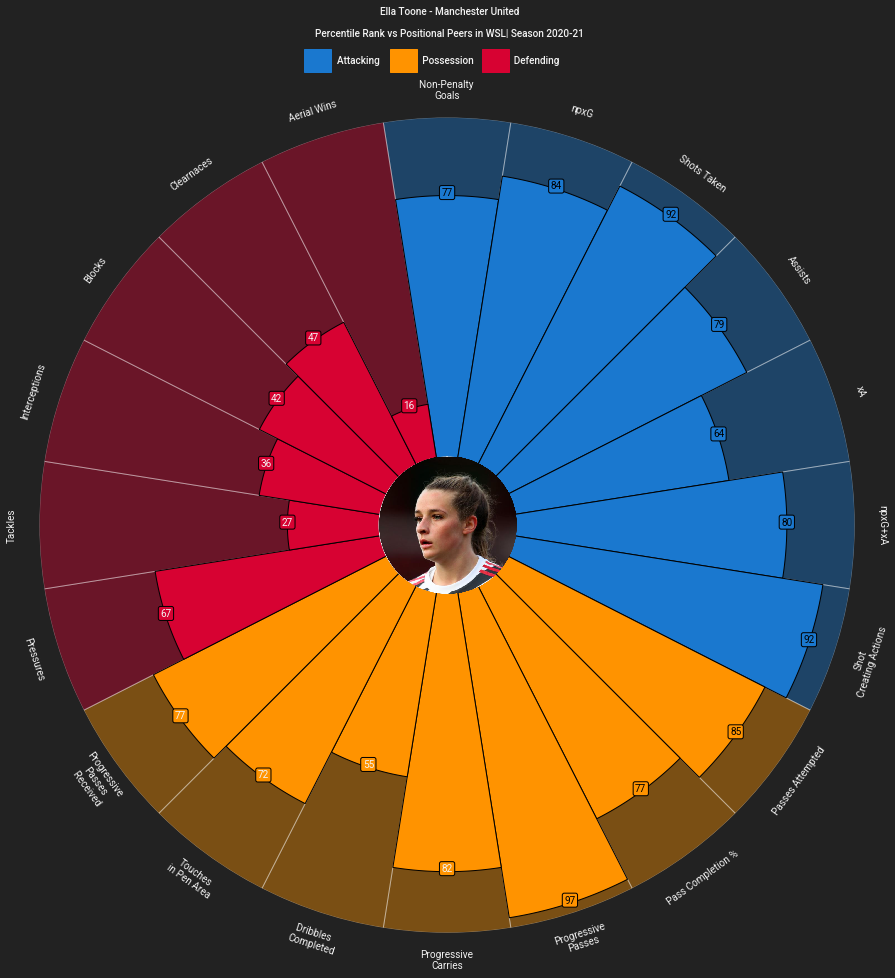

In [14]:
params = ["Non-Penalty \nGoals",
          "npxG",
          "Shots Taken",
          "Assists",
          "xA",
          "npxG+xA",
          "\nShot\n Creating Actions",
          "Passes Attempted",
          "Pass Completion %",
          "Progressive\nPasses",
          "Progressive\nCarries",
          "Dribbles \nCompleted",
          "Touches\nin Pen Area",
          "Progressive\nPasses\n Received",
          "Pressures",
          "Tackles",
          "Interceptions",
          "Blocks",
          "Clearnaces",
          "Aerial Wins"]

values = [77,84,92,79,64,80,92,85,77,97,82,55,72,77,67,27,36,42,47,16]

slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(15,15),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

fig.text(
    0.515, 0.975, "Ella Toone - Manchester United", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

fig.text(
    0.515, 0.955,
    "Percentile Rank vs Positional Peers in WSL| Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)


# add text
fig.text(
0.35, 0.93, "                          Attacking                 Possession                Defending", size=10,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.38, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.46, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.545, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.439, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [15]:
df=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\WSL per 90.csv',encoding="latin1")

In [16]:
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

In [17]:
params = ["Gls/90",
          "Ast/90",
          "G+A/90",
          "xG/90",
          "xA/90",
          "xG+xA/90",
          "npxG/90"]

# The lower and upper boundaries for the statistics
low =  [0,0,0,0,0,0,0]
high = [1.25,0.68,1.76,1.05,0.46,1.33,1.05] 

In [18]:
radar = Radar(params, low, high,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*7,
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [19]:
URL1 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-Regular.ttf?raw=true')
serif_regular = FontManager(URL1)
URL2 = ('https://github.com/googlefonts/SourceSerifProGFVersion/blob/main/'
        'fonts/SourceSerifPro-ExtraLight.ttf?raw=true')
serif_extra_light = FontManager(URL2)
URL3 = ('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf?raw=true')
rubik_regular = FontManager(URL3)
URL4 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Thin.ttf?raw=true'
robotto_thin = FontManager(URL4)
URL5 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true'
robotto_regular = FontManager(URL5)
URL6 = 'https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true'
robotto_bold = FontManager(URL6)

In [20]:
ella_values =  [0.46,0.25,0.71,0.45,0.17,0.62,0.37]

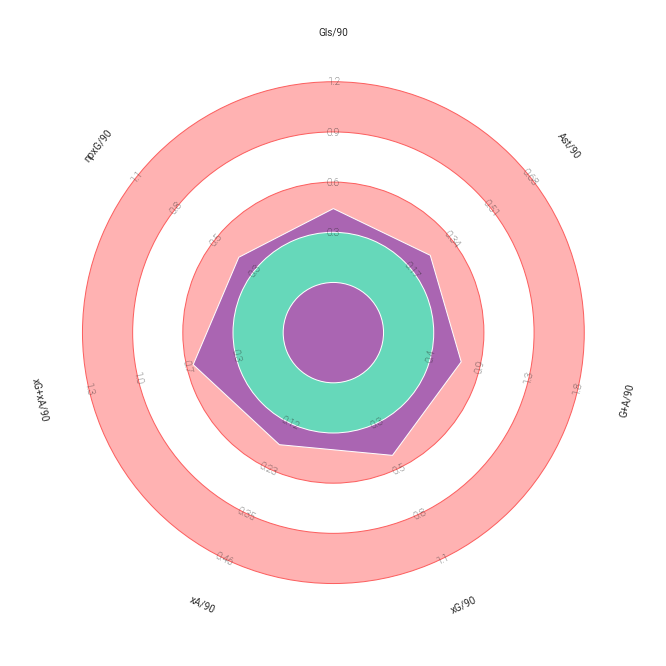

In [21]:
fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(ella_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_regular.prop)  # draw the param labels

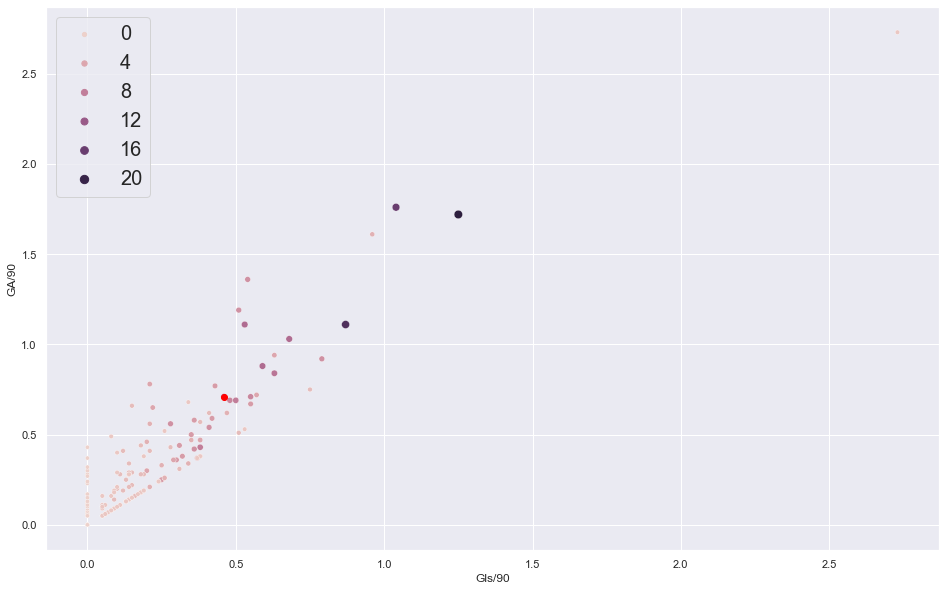

In [22]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="Gls/90", y="GA/90", hue="Gls", size="Gls",s=70)
g.legend(prop={'size': 20})

#g.ax_scatter.scatter(0.38,0.47, color = 'red')
plt.scatter(0.46, 0.71, color="red")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.Gls/90, row.GA/90, row.Player) # xloc of text, yloc of text, text

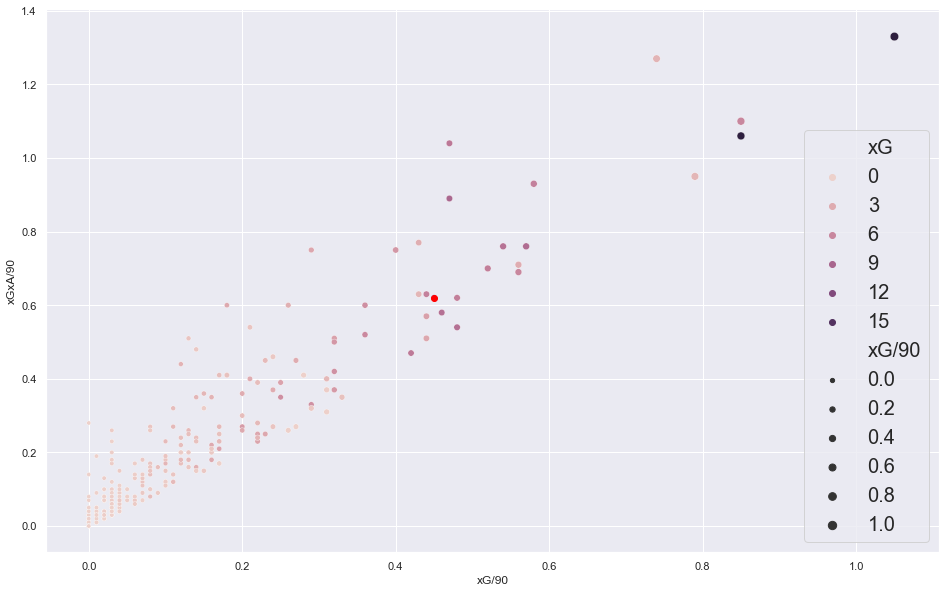

In [23]:

plt.figure(figsize=(16, 10))
g=sns.scatterplot(data=df, x="xG/90", y="xGxA/90", hue="xG", size="xG/90")
#for i,row in df.iterrows(): # loop through rows of the df
 #   plt.text(row.xG/90, row.xGxA/90, row.Player) # xloc of text, yloc of text, text
g.legend(prop={'size': 20})
plt.scatter(0.45, 0.62, color="red")


In [24]:
from mplsoccer.pitch import Pitch
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
text_color = 'w'

In [117]:
df1=pd.read_csv(r'C:\Users\Karthik Garimella\Desktop\Project\Man United Woman\Ella Shotmaps.csv',encoding="latin1")

In [118]:
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

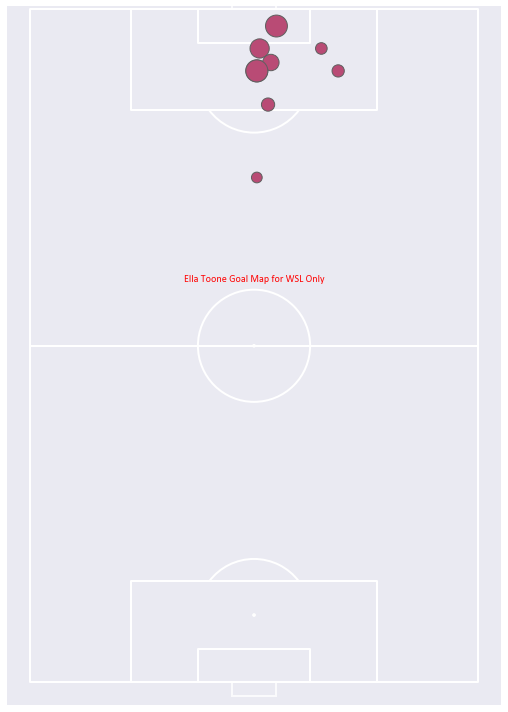

In [119]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Ella Toone Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')




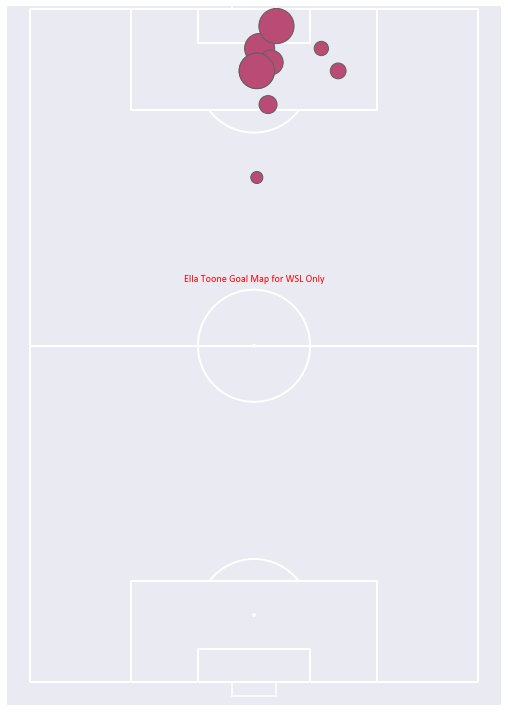

In [122]:
df_goals_barca =df1


pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8) 

fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()



sc2 = pitch.scatter(df_goals_barca.x, df_goals_barca.y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals_barca.xG* 1500) + 100,
                    edgecolors='#606060',  # give the markers a charcoal border
                    c='#b94b75',  # color for scatter in hex format
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

txt = ax.text(x=40, y=48, s='Ella Toone Goal Map for WSL Only',
              size=100,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties='Calibri', color='red',
              va='center', ha='center')


